# Import Libraries

In [ ]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
!pip install yfinance
!pip install PyPortfolioOpt
!poetry add PyPortfolioOpt
!apt-get install python3.11

In [ ]:
import yfinance as yf
from scipy.stats import *
import statsmodels.api as sm

# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import numpy.linalg
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imports for plotly:
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# To keep graph within the nobebook:
%matplotlib inline

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Import for datareading:
import pandas_datareader as web
from pandas_datareader import data, wb
import requests
import datetime as dt
import dateutil.relativedelta

# Efficient frontier
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import EfficientFrontier, objective_functions

# LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# Stocks Portfolio

In [ ]:
asset_stock = ['ADRO.JK', 'ASII.JK', 'BBRI.JK', 'BBTN.JK', 'BMRI.JK', 'BUMI.JK', 'EXCL.JK', 'MFIN.JK', 'PGAS.JK', 'TLKM.JK']

In [ ]:
data_stock6 = yf.download(asset_stock, start="2018-01-01", end="2023-05-10")
data_stock6.index = pd.to_datetime(data_stock6.index).date
data_asset6 = pd.concat([data_stock6],axis=1,sort=False).reset_index()
data_asset6.rename(columns={'index':'Date'}, inplace=True)
data_asset6.index = data_asset6['Date']
data_asset6 = data_asset6.dropna()
df6 = data_asset6['Close']

[*********************100%***********************]  10 of 10 completed


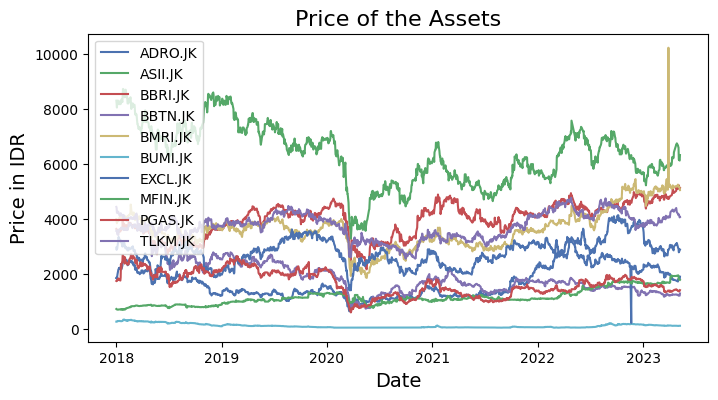

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df6.columns.values:
    plt.plot( df6[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df6.columns.values, loc='upper left')
plt.show()

## Data Preparation 0
1st of January 2018 - 9th of May 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_0 = yf.download("ADRO.JK", start="2021-11-10", end="2022-05-10")
ADRO_0.insert(4,"Return", ADRO_0['Close'].pct_change())
ADRO_0 = ADRO_0.dropna()
ADRO_0_test = yf.download("ADRO.JK", start="2022-05-09", end="2022-06-10")
ADRO_0_test.insert(4,"Return", ADRO_0_test['Close'].pct_change())
ADRO_0_test = ADRO_0_test.dropna()
training_ADRO_0 = ADRO_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_0_scaled = sc.fit_transform(training_ADRO_0)
X_ADRO_0_train = []
y_ADRO_0_train = []
for i in range(days_period, len(ADRO_0)-1):
    X_ADRO_0_train.append(training_ADRO_0_scaled[i-days_period:i, 0])
    y_ADRO_0_train.append(training_ADRO_0_scaled[i, 0])
X_ADRO_0_train, y_ADRO_0_train = np.array(X_ADRO_0_train), np.array(y_ADRO_0_train)
X_ADRO_0_train = np.reshape(X_ADRO_0_train, (X_ADRO_0_train.shape[0], X_ADRO_0_train.shape[1], 1))
model_ADRO_0 = Sequential()
model_ADRO_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_0_train.shape[1], 1)))
model_ADRO_0.add(Dropout(0.2))
model_ADRO_0.add(LSTM(units=50,return_sequences=True))
model_ADRO_0.add(Dropout(0.2))
model_ADRO_0.add(LSTM(units=50,return_sequences=True))
model_ADRO_0.add(Dropout(0.2))
model_ADRO_0.add(LSTM(units=50))
model_ADRO_0.add(Dropout(0.2))
model_ADRO_0.add(Dense(units=1))
model_ADRO_0.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_0.fit(X_ADRO_0_train,y_ADRO_0_train,epochs=10,batch_size=16)

# ASII
ASII_0 = yf.download("ASII.JK", start="2021-11-10", end="2022-05-10")
ASII_0.insert(4,"Return", ASII_0['Close'].pct_change())
ASII_0 = ASII_0.dropna()
ASII_0_test = yf.download("ASII.JK", start="2022-05-09", end="2022-06-10")
ASII_0_test.insert(4,"Return", ASII_0_test['Close'].pct_change())
ASII_0_test = ASII_0_test.dropna()
training_ASII_0 = ASII_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_0_scaled = sc.fit_transform(training_ASII_0)
X_ASII_0_train = []
y_ASII_0_train = []
for i in range(days_period, len(ASII_0)-1):
    X_ASII_0_train.append(training_ASII_0_scaled[i-days_period:i, 0])
    y_ASII_0_train.append(training_ASII_0_scaled[i, 0])
X_ASII_0_train, y_ASII_0_train = np.array(X_ASII_0_train), np.array(y_ASII_0_train)
X_ASII_0_train = np.reshape(X_ASII_0_train, (X_ASII_0_train.shape[0], X_ASII_0_train.shape[1], 1))
model_ASII_0 = Sequential()
model_ASII_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_0_train.shape[1], 1)))
model_ASII_0.add(Dropout(0.2))
model_ASII_0.add(LSTM(units=50,return_sequences=True))
model_ASII_0.add(Dropout(0.2))
model_ASII_0.add(LSTM(units=50,return_sequences=True))
model_ASII_0.add(Dropout(0.2))
model_ASII_0.add(LSTM(units=50))
model_ASII_0.add(Dropout(0.2))
model_ASII_0.add(Dense(units=1))
model_ASII_0.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_0.fit(X_ASII_0_train,y_ASII_0_train,epochs=10,batch_size=16)

# BMRI
BMRI_0 = yf.download("BMRI.JK", start="2021-11-10", end="2022-05-10")
BMRI_0.insert(4,"Return", BMRI_0['Close'].pct_change())
BMRI_0 = BMRI_0.dropna()
BMRI_0_test = yf.download("BMRI.JK", start="2022-05-09", end="2022-06-10")
BMRI_0_test.insert(4,"Return", BMRI_0_test['Close'].pct_change())
BMRI_0_test = BMRI_0_test.dropna()
training_BMRI_0 = BMRI_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_0_scaled = sc.fit_transform(training_BMRI_0)
X_BMRI_0_train = []
y_BMRI_0_train = []
for i in range(days_period, len(BMRI_0)-1):
    X_BMRI_0_train.append(training_BMRI_0_scaled[i-days_period:i, 0])
    y_BMRI_0_train.append(training_BMRI_0_scaled[i, 0])
X_BMRI_0_train, y_BMRI_0_train = np.array(X_BMRI_0_train), np.array(y_BMRI_0_train)
X_BMRI_0_train = np.reshape(X_BMRI_0_train, (X_BMRI_0_train.shape[0], X_BMRI_0_train.shape[1], 1))
model_BMRI_0 = Sequential()
model_BMRI_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_0_train.shape[1], 1)))
model_BMRI_0.add(Dropout(0.2))
model_BMRI_0.add(LSTM(units=50,return_sequences=True))
model_BMRI_0.add(Dropout(0.2))
model_BMRI_0.add(LSTM(units=50,return_sequences=True))
model_BMRI_0.add(Dropout(0.2))
model_BMRI_0.add(LSTM(units=50))
model_BMRI_0.add(Dropout(0.2))
model_BMRI_0.add(Dense(units=1))
model_BMRI_0.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_0.fit(X_BMRI_0_train,y_BMRI_0_train,epochs=10,batch_size=16)

# BBRI
BBRI_0 = yf.download("BBRI.JK", start="2021-11-10", end="2022-05-10")
BBRI_0.insert(4,"Return", BBRI_0['Close'].pct_change())
BBRI_0 = BBRI_0.dropna()
BBRI_0_test = yf.download("BBRI.JK", start="2022-05-09", end="2022-06-10")
BBRI_0_test.insert(4,"Return", BBRI_0_test['Close'].pct_change())
BBRI_0_test = BBRI_0_test.dropna()
training_BBRI_0 = BBRI_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_0_scaled = sc.fit_transform(training_BBRI_0)
X_BBRI_0_train = []
y_BBRI_0_train = []
for i in range(days_period, len(BBRI_0)-1):
    X_BBRI_0_train.append(training_BBRI_0_scaled[i-days_period:i, 0])
    y_BBRI_0_train.append(training_BBRI_0_scaled[i, 0])
X_BBRI_0_train, y_BBRI_0_train = np.array(X_BBRI_0_train), np.array(y_BBRI_0_train)
X_BBRI_0_train = np.reshape(X_BBRI_0_train, (X_BBRI_0_train.shape[0], X_BBRI_0_train.shape[1], 1))
model_BBRI_0 = Sequential()
model_BBRI_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_0_train.shape[1], 1)))
model_BBRI_0.add(Dropout(0.2))
model_BBRI_0.add(LSTM(units=50,return_sequences=True))
model_BBRI_0.add(Dropout(0.2))
model_BBRI_0.add(LSTM(units=50,return_sequences=True))
model_BBRI_0.add(Dropout(0.2))
model_BBRI_0.add(LSTM(units=50))
model_BBRI_0.add(Dropout(0.2))
model_BBRI_0.add(Dense(units=1))
model_BBRI_0.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_0.fit(X_BBRI_0_train,y_BBRI_0_train,epochs=10,batch_size=16)

# BBTN
BBTN_0 = yf.download("BBTN.JK", start="2021-11-10", end="2022-05-10")
BBTN_0.insert(4,"Return", BBTN_0['Close'].pct_change())
BBTN_0 = BBTN_0.dropna()
BBTN_0_test = yf.download("BBTN.JK", start="2022-05-09", end="2022-06-10")
BBTN_0_test.insert(4,"Return", BBTN_0_test['Close'].pct_change())
BBTN_0_test = BBTN_0_test.dropna()
training_BBTN_0 = BBTN_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_0_scaled = sc.fit_transform(training_BBTN_0)
X_BBTN_0_train = []
y_BBTN_0_train = []
for i in range(days_period, len(BBTN_0)-1):
    X_BBTN_0_train.append(training_BBTN_0_scaled[i-days_period:i, 0])
    y_BBTN_0_train.append(training_BBTN_0_scaled[i, 0])
X_BBTN_0_train, y_BBTN_0_train = np.array(X_BBTN_0_train), np.array(y_BBTN_0_train)
X_BBTN_0_train = np.reshape(X_BBTN_0_train, (X_BBTN_0_train.shape[0], X_BBTN_0_train.shape[1], 1))
model_BBTN_0 = Sequential()
model_BBTN_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_0_train.shape[1], 1)))
model_BBTN_0.add(Dropout(0.2))
model_BBTN_0.add(LSTM(units=50,return_sequences=True))
model_BBTN_0.add(Dropout(0.2))
model_BBTN_0.add(LSTM(units=50,return_sequences=True))
model_BBTN_0.add(Dropout(0.2))
model_BBTN_0.add(LSTM(units=50))
model_BBTN_0.add(Dropout(0.2))
model_BBTN_0.add(Dense(units=1))
model_BBTN_0.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_0.fit(X_BBTN_0_train,y_BBTN_0_train,epochs=10,batch_size=16)

# BUMI
BUMI_0 = yf.download("BUMI.JK", start="2021-11-10", end="2022-05-10")
BUMI_0.insert(4,"Return", BUMI_0['Close'].pct_change())
BUMI_0 = BUMI_0.dropna()
BUMI_0_test = yf.download("BUMI.JK", start="2022-05-09", end="2022-06-10")
BUMI_0_test.insert(4,"Return", BUMI_0_test['Close'].pct_change())
BUMI_0_test = BUMI_0_test.dropna()
training_BUMI_0 = BUMI_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_0_scaled = sc.fit_transform(training_BUMI_0)
X_BUMI_0_train = []
y_BUMI_0_train = []
for i in range(days_period, len(BUMI_0)-1):
    X_BUMI_0_train.append(training_BUMI_0_scaled[i-days_period:i, 0])
    y_BUMI_0_train.append(training_BUMI_0_scaled[i, 0])
X_BUMI_0_train, y_BUMI_0_train = np.array(X_BUMI_0_train), np.array(y_BUMI_0_train)
X_BUMI_0_train = np.reshape(X_BUMI_0_train, (X_BUMI_0_train.shape[0], X_BUMI_0_train.shape[1], 1))
model_BUMI_0 = Sequential()
model_BUMI_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_0_train.shape[1], 1)))
model_BUMI_0.add(Dropout(0.2))
model_BUMI_0.add(LSTM(units=50,return_sequences=True))
model_BUMI_0.add(Dropout(0.2))
model_BUMI_0.add(LSTM(units=50,return_sequences=True))
model_BUMI_0.add(Dropout(0.2))
model_BUMI_0.add(LSTM(units=50))
model_BUMI_0.add(Dropout(0.2))
model_BUMI_0.add(Dense(units=1))
model_BUMI_0.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_0.fit(X_BUMI_0_train,y_BUMI_0_train,epochs=10,batch_size=16)

# MFIN
MFIN_0 = yf.download("MFIN.JK", start="2021-11-10", end="2022-05-10")
MFIN_0.insert(4,"Return", MFIN_0['Close'].pct_change())
MFIN_0 = MFIN_0.dropna()
MFIN_0_test = yf.download("MFIN.JK", start="2022-05-09", end="2022-06-10")
MFIN_0_test.insert(4,"Return", MFIN_0_test['Close'].pct_change())
MFIN_0_test = MFIN_0_test.dropna()
training_MFIN_0 = MFIN_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_0_scaled = sc.fit_transform(training_MFIN_0)
X_MFIN_0_train = []
y_MFIN_0_train = []
for i in range(days_period, len(MFIN_0)-1):
    X_MFIN_0_train.append(training_MFIN_0_scaled[i-days_period:i, 0])
    y_MFIN_0_train.append(training_MFIN_0_scaled[i, 0])
X_MFIN_0_train, y_MFIN_0_train = np.array(X_MFIN_0_train), np.array(y_MFIN_0_train)
X_MFIN_0_train = np.reshape(X_MFIN_0_train, (X_MFIN_0_train.shape[0], X_MFIN_0_train.shape[1], 1))
model_MFIN_0 = Sequential()
model_MFIN_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_0_train.shape[1], 1)))
model_MFIN_0.add(Dropout(0.2))
model_MFIN_0.add(LSTM(units=50,return_sequences=True))
model_MFIN_0.add(Dropout(0.2))
model_MFIN_0.add(LSTM(units=50,return_sequences=True))
model_MFIN_0.add(Dropout(0.2))
model_MFIN_0.add(LSTM(units=50))
model_MFIN_0.add(Dropout(0.2))
model_MFIN_0.add(Dense(units=1))
model_MFIN_0.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_0.fit(X_MFIN_0_train,y_MFIN_0_train,epochs=10,batch_size=16)

# EXCL
EXCL_0 = yf.download("EXCL.JK", start="2021-11-10", end="2022-05-10")
EXCL_0.insert(4,"Return", EXCL_0['Close'].pct_change())
EXCL_0 = EXCL_0.dropna()
EXCL_0_test = yf.download("EXCL.JK", start="2022-05-09", end="2022-06-10")
EXCL_0_test.insert(4,"Return", EXCL_0_test['Close'].pct_change())
EXCL_0_test = EXCL_0_test.dropna()
training_EXCL_0 = EXCL_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_0_scaled = sc.fit_transform(training_EXCL_0)
X_EXCL_0_train = []
y_EXCL_0_train = []
for i in range(days_period, len(EXCL_0)-1):
    X_EXCL_0_train.append(training_EXCL_0_scaled[i-days_period:i, 0])
    y_EXCL_0_train.append(training_EXCL_0_scaled[i, 0])
X_EXCL_0_train, y_EXCL_0_train = np.array(X_EXCL_0_train), np.array(y_EXCL_0_train)
X_EXCL_0_train = np.reshape(X_EXCL_0_train, (X_EXCL_0_train.shape[0], X_EXCL_0_train.shape[1], 1))
model_EXCL_0 = Sequential()
model_EXCL_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_0_train.shape[1], 1)))
model_EXCL_0.add(Dropout(0.2))
model_EXCL_0.add(LSTM(units=50,return_sequences=True))
model_EXCL_0.add(Dropout(0.2))
model_EXCL_0.add(LSTM(units=50,return_sequences=True))
model_EXCL_0.add(Dropout(0.2))
model_EXCL_0.add(LSTM(units=50))
model_EXCL_0.add(Dropout(0.2))
model_EXCL_0.add(Dense(units=1))
model_EXCL_0.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_0.fit(X_EXCL_0_train,y_EXCL_0_train,epochs=10,batch_size=16)

# PGAS
PGAS_0 = yf.download("PGAS.JK", start="2021-11-10", end="2022-05-10")
PGAS_0.insert(4,"Return", PGAS_0['Close'].pct_change())
PGAS_0 = PGAS_0.dropna()
PGAS_0_test = yf.download("PGAS.JK", start="2022-05-09", end="2022-06-10")
PGAS_0_test.insert(4,"Return", PGAS_0_test['Close'].pct_change())
PGAS_0_test = PGAS_0_test.dropna()
training_PGAS_0 = PGAS_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_0_scaled = sc.fit_transform(training_PGAS_0)
X_PGAS_0_train = []
y_PGAS_0_train = []
for i in range(days_period, len(PGAS_0)-1):
    X_PGAS_0_train.append(training_PGAS_0_scaled[i-days_period:i, 0])
    y_PGAS_0_train.append(training_PGAS_0_scaled[i, 0])
X_PGAS_0_train, y_PGAS_0_train = np.array(X_PGAS_0_train), np.array(y_PGAS_0_train)
X_PGAS_0_train = np.reshape(X_PGAS_0_train, (X_PGAS_0_train.shape[0], X_PGAS_0_train.shape[1], 1))
model_PGAS_0 = Sequential()
model_PGAS_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_0_train.shape[1], 1)))
model_PGAS_0.add(Dropout(0.2))
model_PGAS_0.add(LSTM(units=50,return_sequences=True))
model_PGAS_0.add(Dropout(0.2))
model_PGAS_0.add(LSTM(units=50,return_sequences=True))
model_PGAS_0.add(Dropout(0.2))
model_PGAS_0.add(LSTM(units=50))
model_PGAS_0.add(Dropout(0.2))
model_PGAS_0.add(Dense(units=1))
model_PGAS_0.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_0.fit(X_PGAS_0_train,y_PGAS_0_train,epochs=10,batch_size=16)

# TLKM
TLKM_0 = yf.download("TLKM.JK", start="2021-11-10", end="2022-05-10")
TLKM_0.insert(4,"Return", TLKM_0['Close'].pct_change())
TLKM_0 = TLKM_0.dropna()
TLKM_0_test = yf.download("TLKM.JK", start="2022-05-09", end="2022-06-10")
TLKM_0_test.insert(4,"Return", TLKM_0_test['Close'].pct_change())
TLKM_0_test = TLKM_0_test.dropna()
training_TLKM_0 = TLKM_0.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_0_scaled = sc.fit_transform(training_TLKM_0)
X_TLKM_0_train = []
y_TLKM_0_train = []
for i in range(days_period, len(TLKM_0)-1):
    X_TLKM_0_train.append(training_TLKM_0_scaled[i-days_period:i, 0])
    y_TLKM_0_train.append(training_TLKM_0_scaled[i, 0])
X_TLKM_0_train, y_TLKM_0_train = np.array(X_TLKM_0_train), np.array(y_TLKM_0_train)
X_TLKM_0_train = np.reshape(X_TLKM_0_train, (X_TLKM_0_train.shape[0], X_TLKM_0_train.shape[1], 1))
model_TLKM_0 = Sequential()
model_TLKM_0.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_0_train.shape[1], 1)))
model_TLKM_0.add(Dropout(0.2))
model_TLKM_0.add(LSTM(units=50,return_sequences=True))
model_TLKM_0.add(Dropout(0.2))
model_TLKM_0.add(LSTM(units=50,return_sequences=True))
model_TLKM_0.add(Dropout(0.2))
model_TLKM_0.add(LSTM(units=50))
model_TLKM_0.add(Dropout(0.2))
model_TLKM_0.add(Dense(units=1))
model_TLKM_0.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_0.fit(X_TLKM_0_train,y_TLKM_0_train,epochs=10,batch_size=16)

In [ ]:
# ADRO
real_ADRO_0_return = ADRO_0_test.iloc[:, 4:5].values
real_ADRO_0_return = real_ADRO_0_return[:days_predict]
ADRO_0_total = ADRO_0['Close'].copy(deep=True)
inputs_ADRO_0 = ADRO_0_total[len(ADRO_0) - days_period: len(ADRO_0)].values
inputs_ADRO_0 = inputs_ADRO_0.reshape(-1,1)
inputs_ADRO_0 = sc.transform(inputs_ADRO_0)
predicted_ADRO_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_0_test = []
  for i in range(j, j+1):
      X_ADRO_0_test.append(inputs_ADRO_0[i:i+days_period, 0])
  X_ADRO_0_test = np.array(X_ADRO_0_test)
  X_ADRO_0_test = np.reshape(X_ADRO_0_test, (X_ADRO_0_test.shape[0], X_ADRO_0_test.shape[1], 1))
  predicted_ADRO_0_return[j] = model_ADRO_0.predict(X_ADRO_0_test)
  inputs_ADRO_0 += (predicted_ADRO_0_return[j])
  inputs_ADRO_0 = inputs_ADRO_0.reshape(-1,1)

# ASII
real_ASII_0_return = ASII_0_test.iloc[:, 4:5].values
real_ASII_0_return = real_ASII_0_return[:days_predict]
ASII_0_total = ASII_0['Close'].copy(deep=True)
inputs_ASII_0 = ASII_0_total[len(ASII_0) - days_period: len(ASII_0)].values
inputs_ASII_0 = inputs_ASII_0.reshape(-1,1)
inputs_ASII_0 = sc.transform(inputs_ASII_0)
predicted_ASII_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_0_test = []
  for i in range(j, j+1):
      X_ASII_0_test.append(inputs_ASII_0[i:i+days_period, 0])
  X_ASII_0_test = np.array(X_ASII_0_test)
  X_ASII_0_test = np.reshape(X_ASII_0_test, (X_ASII_0_test.shape[0], X_ASII_0_test.shape[1], 1))
  predicted_ASII_0_return[j] = model_ASII_0.predict(X_ASII_0_test)
  inputs_ASII_0 += (predicted_ASII_0_return[j])
  inputs_ASII_0 = inputs_ASII_0.reshape(-1,1)

# BMRI
real_BMRI_0_return = BMRI_0_test.iloc[:, 4:5].values
real_BMRI_0_return = real_BMRI_0_return[:days_predict]
BMRI_0_total = BMRI_0['Close'].copy(deep=True)
inputs_BMRI_0 = BMRI_0_total[len(BMRI_0) - days_period: len(BMRI_0)].values
inputs_BMRI_0 = inputs_BMRI_0.reshape(-1,1)
inputs_BMRI_0 = sc.transform(inputs_BMRI_0)
predicted_BMRI_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_0_test = []
  for i in range(j, j+1):
      X_BMRI_0_test.append(inputs_BMRI_0[i:i+days_period, 0])
  X_BMRI_0_test = np.array(X_BMRI_0_test)
  X_BMRI_0_test = np.reshape(X_BMRI_0_test, (X_BMRI_0_test.shape[0], X_BMRI_0_test.shape[1], 1))
  predicted_BMRI_0_return[j] = model_BMRI_0.predict(X_BMRI_0_test)
  inputs_BMRI_0 += (predicted_BMRI_0_return[j])
  inputs_BMRI_0 = inputs_BMRI_0.reshape(-1,1)

# BBRI
real_BBRI_0_return = BBRI_0_test.iloc[:, 4:5].values
real_BBRI_0_return = real_BBRI_0_return[:days_predict]
BBRI_0_total = BBRI_0['Close'].copy(deep=True)
inputs_BBRI_0 = BBRI_0_total[len(BBRI_0) - days_period: len(BBRI_0)].values
inputs_BBRI_0 = inputs_BBRI_0.reshape(-1,1)
inputs_BBRI_0 = sc.transform(inputs_BBRI_0)
predicted_BBRI_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_0_test = []
  for i in range(j, j+1):
      X_BBRI_0_test.append(inputs_BBRI_0[i:i+days_period, 0])
  X_BBRI_0_test = np.array(X_BBRI_0_test)
  X_BBRI_0_test = np.reshape(X_BBRI_0_test, (X_BBRI_0_test.shape[0], X_BBRI_0_test.shape[1], 1))
  predicted_BBRI_0_return[j] = model_BBRI_0.predict(X_BBRI_0_test)
  inputs_BBRI_0 += (predicted_BBRI_0_return[j])
  inputs_BBRI_0 = inputs_BBRI_0.reshape(-1,1)

# BBTN
real_BBTN_0_return = BBTN_0_test.iloc[:, 4:5].values
real_BBTN_0_return = real_BBTN_0_return[:days_predict]
BBTN_0_total = BBTN_0['Close'].copy(deep=True)
inputs_BBTN_0 = BBTN_0_total[len(BBTN_0) - days_period: len(BBTN_0)].values
inputs_BBTN_0 = inputs_BBTN_0.reshape(-1,1)
inputs_BBTN_0 = sc.transform(inputs_BBTN_0)
predicted_BBTN_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_0_test = []
  for i in range(j, j+1):
      X_BBTN_0_test.append(inputs_BBTN_0[i:i+days_period, 0])
  X_BBTN_0_test = np.array(X_BBTN_0_test)
  X_BBTN_0_test = np.reshape(X_BBTN_0_test, (X_BBTN_0_test.shape[0], X_BBTN_0_test.shape[1], 1))
  predicted_BBTN_0_return[j] = model_BBTN_0.predict(X_BBTN_0_test)
  inputs_BBTN_0 += (predicted_BBTN_0_return[j])
  inputs_BBTN_0 = inputs_BBTN_0.reshape(-1,1)

# BUMI
real_BUMI_0_return = BUMI_0_test.iloc[:, 4:5].values
real_BUMI_0_return = real_BUMI_0_return[:days_predict]
BUMI_0_total = BUMI_0['Close'].copy(deep=True)
inputs_BUMI_0 = BUMI_0_total[len(BUMI_0) - days_period: len(BUMI_0)].values
inputs_BUMI_0 = inputs_BUMI_0.reshape(-1,1)
inputs_BUMI_0 = sc.transform(inputs_BUMI_0)
predicted_BUMI_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_0_test = []
  for i in range(j, j+1):
      X_BUMI_0_test.append(inputs_BUMI_0[i:i+days_period, 0])
  X_BUMI_0_test = np.array(X_BUMI_0_test)
  X_BUMI_0_test = np.reshape(X_BUMI_0_test, (X_BUMI_0_test.shape[0], X_BUMI_0_test.shape[1], 1))
  predicted_BUMI_0_return[j] = model_BUMI_0.predict(X_BUMI_0_test)
  inputs_BUMI_0 += (predicted_BUMI_0_return[j])
  inputs_BUMI_0 = inputs_BUMI_0.reshape(-1,1)

# MFIN
real_MFIN_0_return = MFIN_0_test.iloc[:, 4:5].values
real_MFIN_0_return = real_MFIN_0_return[:days_predict]
MFIN_0_total = MFIN_0['Close'].copy(deep=True)
inputs_MFIN_0 = MFIN_0_total[len(MFIN_0) - days_period: len(MFIN_0)].values
inputs_MFIN_0 = inputs_MFIN_0.reshape(-1,1)
inputs_MFIN_0 = sc.transform(inputs_MFIN_0)
predicted_MFIN_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_0_test = []
  for i in range(j, j+1):
      X_MFIN_0_test.append(inputs_MFIN_0[i:i+days_period, 0])
  X_MFIN_0_test = np.array(X_MFIN_0_test)
  X_MFIN_0_test = np.reshape(X_MFIN_0_test, (X_MFIN_0_test.shape[0], X_MFIN_0_test.shape[1], 1))
  predicted_MFIN_0_return[j] = model_MFIN_0.predict(X_MFIN_0_test)
  inputs_MFIN_0 += (predicted_MFIN_0_return[j])
  inputs_MFIN_0 = inputs_MFIN_0.reshape(-1,1)

# EXCL
real_EXCL_0_return = EXCL_0_test.iloc[:, 4:5].values
real_EXCL_0_return = real_EXCL_0_return[:days_predict]
EXCL_0_total = EXCL_0['Close'].copy(deep=True)
inputs_EXCL_0 = EXCL_0_total[len(EXCL_0) - days_period: len(EXCL_0)].values
inputs_EXCL_0 = inputs_EXCL_0.reshape(-1,1)
inputs_EXCL_0 = sc.transform(inputs_EXCL_0)
predicted_EXCL_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_0_test = []
  for i in range(j, j+1):
      X_EXCL_0_test.append(inputs_EXCL_0[i:i+days_period, 0])
  X_EXCL_0_test = np.array(X_EXCL_0_test)
  X_EXCL_0_test = np.reshape(X_EXCL_0_test, (X_EXCL_0_test.shape[0], X_EXCL_0_test.shape[1], 1))
  predicted_EXCL_0_return[j] = model_EXCL_0.predict(X_EXCL_0_test)
  inputs_EXCL_0 += (predicted_EXCL_0_return[j])
  inputs_EXCL_0 = inputs_EXCL_0.reshape(-1,1)

# PGAS
real_PGAS_0_return = PGAS_0_test.iloc[:, 4:5].values
real_PGAS_0_return = real_PGAS_0_return[:days_predict]
PGAS_0_total = PGAS_0['Close'].copy(deep=True)
inputs_PGAS_0 = PGAS_0_total[len(PGAS_0) - days_period: len(PGAS_0)].values
inputs_PGAS_0 = inputs_PGAS_0.reshape(-1,1)
inputs_PGAS_0 = sc.transform(inputs_PGAS_0)
predicted_PGAS_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_0_test = []
  for i in range(j, j+1):
      X_PGAS_0_test.append(inputs_PGAS_0[i:i+days_period, 0])
  X_PGAS_0_test = np.array(X_PGAS_0_test)
  X_PGAS_0_test = np.reshape(X_PGAS_0_test, (X_PGAS_0_test.shape[0], X_PGAS_0_test.shape[1], 1))
  predicted_PGAS_0_return[j] = model_PGAS_0.predict(X_PGAS_0_test)
  inputs_PGAS_0 += (predicted_PGAS_0_return[j])
  inputs_PGAS_0 = inputs_PGAS_0.reshape(-1,1)

# TLKM
real_TLKM_0_return = TLKM_0_test.iloc[:, 4:5].values
real_TLKM_0_return = real_TLKM_0_return[:days_predict]
TLKM_0_total = TLKM_0['Close'].copy(deep=True)
inputs_TLKM_0 = TLKM_0_total[len(TLKM_0) - days_period: len(TLKM_0)].values
inputs_TLKM_0 = inputs_TLKM_0.reshape(-1,1)
inputs_TLKM_0 = sc.transform(inputs_TLKM_0)
predicted_TLKM_0_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_0_test = []
  for i in range(j, j+1):
      X_TLKM_0_test.append(inputs_TLKM_0[i:i+days_period, 0])
  X_TLKM_0_test = np.array(X_TLKM_0_test)
  X_TLKM_0_test = np.reshape(X_TLKM_0_test, (X_TLKM_0_test.shape[0], X_TLKM_0_test.shape[1], 1))
  predicted_TLKM_0_return[j] = model_TLKM_0.predict(X_TLKM_0_test)
  inputs_TLKM_0 += (predicted_TLKM_0_return[j])
  inputs_TLKM_0 = inputs_TLKM_0.reshape(-1,1)

In [ ]:
# ADRO
predicted_ADRO_0_return = np.squeeze(np.asarray(predicted_ADRO_0_return))
predicted_ADRO_0_return = predicted_ADRO_0_return.reshape(-1,1)
predicted_ADRO_0_return = sc.inverse_transform(predicted_ADRO_0_return)
# ASII
predicted_ASII_0_return = np.squeeze(np.asarray(predicted_ASII_0_return))
predicted_ASII_0_return = predicted_ASII_0_return.reshape(-1,1)
predicted_ASII_0_return = sc.inverse_transform(predicted_ASII_0_return)
# BMRI
predicted_BMRI_0_return = np.squeeze(np.asarray(predicted_BMRI_0_return))
predicted_BMRI_0_return = predicted_BMRI_0_return.reshape(-1,1)
predicted_BMRI_0_return = sc.inverse_transform(predicted_BMRI_0_return)
# BBRI
predicted_BBRI_0_return = np.squeeze(np.asarray(predicted_BBRI_0_return))
predicted_BBRI_0_return = predicted_BBRI_0_return.reshape(-1,1)
predicted_BBRI_0_return = sc.inverse_transform(predicted_BBRI_0_return)
# BBTN
predicted_BBTN_0_return = np.squeeze(np.asarray(predicted_BBTN_0_return))
predicted_BBTN_0_return = predicted_BBTN_0_return.reshape(-1,1)
predicted_BBTN_0_return = sc.inverse_transform(predicted_BBTN_0_return)
# BUMI
predicted_BUMI_0_return = np.squeeze(np.asarray(predicted_BUMI_0_return))
predicted_BUMI_0_return = predicted_BUMI_0_return.reshape(-1,1)
predicted_BUMI_0_return = sc.inverse_transform(predicted_BUMI_0_return)
# MFIN
predicted_MFIN_0_return = np.squeeze(np.asarray(predicted_MFIN_0_return))
predicted_MFIN_0_return = predicted_MFIN_0_return.reshape(-1,1)
predicted_MFIN_0_return = sc.inverse_transform(predicted_MFIN_0_return)
# EXCL
predicted_EXCL_0_return = np.squeeze(np.asarray(predicted_EXCL_0_return))
predicted_EXCL_0_return = predicted_EXCL_0_return.reshape(-1,1)
predicted_EXCL_0_return = sc.inverse_transform(predicted_EXCL_0_return)
# PGAS
predicted_PGAS_0_return = np.squeeze(np.asarray(predicted_PGAS_0_return))
predicted_PGAS_0_return = predicted_PGAS_0_return.reshape(-1,1)
predicted_PGAS_0_return = sc.inverse_transform(predicted_PGAS_0_return)
# TLKM
predicted_TLKM_0_return = np.squeeze(np.asarray(predicted_TLKM_0_return))
predicted_TLKM_0_return = predicted_TLKM_0_return.reshape(-1,1)
predicted_TLKM_0_return = sc.inverse_transform(predicted_TLKM_0_return)

In [ ]:
predicted0 = pd.DataFrame(predicted_ADRO_0_return)
predicted0.rename(columns={0:'ADRO'}, inplace=True)
predicted0.insert(1,"ASII", predicted_ASII_0_return)
predicted0.insert(2,"BBRI", predicted_BBRI_0_return)
predicted0.insert(3,"BBTN", predicted_BBTN_0_return)
predicted0.insert(4,"BMRI", predicted_BMRI_0_return)
predicted0.insert(5,"BUMI", predicted_BUMI_0_return)
predicted0.insert(6,"EXCL", predicted_EXCL_0_return)
predicted0.insert(7,"MFIN", predicted_MFIN_0_return)
predicted0.insert(8,"PGAS", predicted_PGAS_0_return)
predicted0.insert(9,"TLKM", predicted_TLKM_0_return)

In [ ]:
predicted0

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.029142,0.022499,0.046271,0.000729,0.046970,0.029754,0.024562,0.035846,0.059170,-0.006802
1,0.028687,0.021792,0.044928,0.000208,0.045098,0.028441,0.023744,0.034991,0.057184,-0.007959
2,0.028071,0.020895,0.043302,-0.000438,0.042886,0.026869,0.022679,0.033870,0.054855,-0.009240
3,0.027244,0.019763,0.041345,-0.001238,0.040283,0.025004,0.021321,0.032427,0.052134,-0.010659
4,0.026147,0.018346,0.038998,-0.002221,0.037234,0.022812,0.019617,0.030597,0.048968,-0.012226
5,0.024710,0.016584,0.036198,-0.003425,0.033682,0.020199,0.017513,0.028312,0.045302,-0.013960
6,0.022850,0.014410,0.032878,-0.004891,0.029572,0.017131,0.014952,0.025496,0.041081,-0.015876
7,0.020472,0.011756,0.028969,-0.006666,0.024851,0.013536,0.011878,0.022075,0.036249,-0.017993
8,0.017474,0.008549,0.024401,-0.008804,0.019476,0.009367,0.008238,0.017976,0.030758,-0.020329
9,0.013747,0.004718,0.019111,-0.011358,0.013425,0.004576,0.003989,0.013137,0.024570,-0.022902


## Data Preparation 1
1st of January 2018 - 9th of June 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_1 = yf.download("ADRO.JK", start="2021-12-10", end="2022-06-10")
ADRO_1.insert(4,"Return", ADRO_1['Close'].pct_change())
ADRO_1 = ADRO_1.dropna()
ADRO_1_test = yf.download("ADRO.JK", start="2022-06-09", end="2022-07-10")
ADRO_1_test.insert(4,"Return", ADRO_1_test['Close'].pct_change())
ADRO_1_test = ADRO_1_test.dropna()
training_ADRO_1 = ADRO_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_1_scaled = sc.fit_transform(training_ADRO_1)
X_ADRO_1_train = []
y_ADRO_1_train = []
for i in range(days_period, len(ADRO_1)-1):
    X_ADRO_1_train.append(training_ADRO_1_scaled[i-days_period:i, 0])
    y_ADRO_1_train.append(training_ADRO_1_scaled[i, 0])
X_ADRO_1_train, y_ADRO_1_train = np.array(X_ADRO_1_train), np.array(y_ADRO_1_train)
X_ADRO_1_train = np.reshape(X_ADRO_1_train, (X_ADRO_1_train.shape[0], X_ADRO_1_train.shape[1], 1))
model_ADRO_1 = Sequential()
model_ADRO_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_1_train.shape[1], 1)))
model_ADRO_1.add(Dropout(0.2))
model_ADRO_1.add(LSTM(units=50,return_sequences=True))
model_ADRO_1.add(Dropout(0.2))
model_ADRO_1.add(LSTM(units=50,return_sequences=True))
model_ADRO_1.add(Dropout(0.2))
model_ADRO_1.add(LSTM(units=50))
model_ADRO_1.add(Dropout(0.2))
model_ADRO_1.add(Dense(units=1))
model_ADRO_1.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_1.fit(X_ADRO_1_train,y_ADRO_1_train,epochs=10,batch_size=16)

# ASII
ASII_1 = yf.download("ASII.JK", start="2021-12-10", end="2022-06-10")
ASII_1.insert(4,"Return", ASII_1['Close'].pct_change())
ASII_1 = ASII_1.dropna()
ASII_1_test = yf.download("ASII.JK", start="2022-06-09", end="2022-07-10")
ASII_1_test.insert(4,"Return", ASII_1_test['Close'].pct_change())
ASII_1_test = ASII_1_test.dropna()
training_ASII_1 = ASII_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_1_scaled = sc.fit_transform(training_ASII_1)
X_ASII_1_train = []
y_ASII_1_train = []
for i in range(days_period, len(ASII_1)-1):
    X_ASII_1_train.append(training_ASII_1_scaled[i-days_period:i, 0])
    y_ASII_1_train.append(training_ASII_1_scaled[i, 0])
X_ASII_1_train, y_ASII_1_train = np.array(X_ASII_1_train), np.array(y_ASII_1_train)
X_ASII_1_train = np.reshape(X_ASII_1_train, (X_ASII_1_train.shape[0], X_ASII_1_train.shape[1], 1))
model_ASII_1 = Sequential()
model_ASII_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_1_train.shape[1], 1)))
model_ASII_1.add(Dropout(0.2))
model_ASII_1.add(LSTM(units=50,return_sequences=True))
model_ASII_1.add(Dropout(0.2))
model_ASII_1.add(LSTM(units=50,return_sequences=True))
model_ASII_1.add(Dropout(0.2))
model_ASII_1.add(LSTM(units=50))
model_ASII_1.add(Dropout(0.2))
model_ASII_1.add(Dense(units=1))
model_ASII_1.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_1.fit(X_ASII_1_train,y_ASII_1_train,epochs=10,batch_size=16)

# BMRI
BMRI_1 = yf.download("BMRI.JK", start="2021-12-10", end="2022-06-10")
BMRI_1.insert(4,"Return", BMRI_1['Close'].pct_change())
BMRI_1 = BMRI_1.dropna()
BMRI_1_test = yf.download("BMRI.JK", start="2022-06-09", end="2022-07-10")
BMRI_1_test.insert(4,"Return", BMRI_1_test['Close'].pct_change())
BMRI_1_test = BMRI_1_test.dropna()
training_BMRI_1 = BMRI_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_1_scaled = sc.fit_transform(training_BMRI_1)
X_BMRI_1_train = []
y_BMRI_1_train = []
for i in range(days_period, len(BMRI_1)-1):
    X_BMRI_1_train.append(training_BMRI_1_scaled[i-days_period:i, 0])
    y_BMRI_1_train.append(training_BMRI_1_scaled[i, 0])
X_BMRI_1_train, y_BMRI_1_train = np.array(X_BMRI_1_train), np.array(y_BMRI_1_train)
X_BMRI_1_train = np.reshape(X_BMRI_1_train, (X_BMRI_1_train.shape[0], X_BMRI_1_train.shape[1], 1))
model_BMRI_1 = Sequential()
model_BMRI_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_1_train.shape[1], 1)))
model_BMRI_1.add(Dropout(0.2))
model_BMRI_1.add(LSTM(units=50,return_sequences=True))
model_BMRI_1.add(Dropout(0.2))
model_BMRI_1.add(LSTM(units=50,return_sequences=True))
model_BMRI_1.add(Dropout(0.2))
model_BMRI_1.add(LSTM(units=50))
model_BMRI_1.add(Dropout(0.2))
model_BMRI_1.add(Dense(units=1))
model_BMRI_1.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_1.fit(X_BMRI_1_train,y_BMRI_1_train,epochs=10,batch_size=16)

# BBRI
BBRI_1 = yf.download("BBRI.JK", start="2021-12-10", end="2022-06-10")
BBRI_1.insert(4,"Return", BBRI_1['Close'].pct_change())
BBRI_1 = BBRI_1.dropna()
BBRI_1_test = yf.download("BBRI.JK", start="2022-06-09", end="2022-07-10")
BBRI_1_test.insert(4,"Return", BBRI_1_test['Close'].pct_change())
BBRI_1_test = BBRI_1_test.dropna()
training_BBRI_1 = BBRI_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_1_scaled = sc.fit_transform(training_BBRI_1)
X_BBRI_1_train = []
y_BBRI_1_train = []
for i in range(days_period, len(BBRI_1)-1):
    X_BBRI_1_train.append(training_BBRI_1_scaled[i-days_period:i, 0])
    y_BBRI_1_train.append(training_BBRI_1_scaled[i, 0])
X_BBRI_1_train, y_BBRI_1_train = np.array(X_BBRI_1_train), np.array(y_BBRI_1_train)
X_BBRI_1_train = np.reshape(X_BBRI_1_train, (X_BBRI_1_train.shape[0], X_BBRI_1_train.shape[1], 1))
model_BBRI_1 = Sequential()
model_BBRI_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_1_train.shape[1], 1)))
model_BBRI_1.add(Dropout(0.2))
model_BBRI_1.add(LSTM(units=50,return_sequences=True))
model_BBRI_1.add(Dropout(0.2))
model_BBRI_1.add(LSTM(units=50,return_sequences=True))
model_BBRI_1.add(Dropout(0.2))
model_BBRI_1.add(LSTM(units=50))
model_BBRI_1.add(Dropout(0.2))
model_BBRI_1.add(Dense(units=1))
model_BBRI_1.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_1.fit(X_BBRI_1_train,y_BBRI_1_train,epochs=10,batch_size=16)

# BBTN
BBTN_1 = yf.download("BBTN.JK", start="2021-12-10", end="2022-06-10")
BBTN_1.insert(4,"Return", BBTN_1['Close'].pct_change())
BBTN_1 = BBTN_1.dropna()
BBTN_1_test = yf.download("BBTN.JK", start="2022-06-09", end="2022-07-10")
BBTN_1_test.insert(4,"Return", BBTN_1_test['Close'].pct_change())
BBTN_1_test = BBTN_1_test.dropna()
training_BBTN_1 = BBTN_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_1_scaled = sc.fit_transform(training_BBTN_1)
X_BBTN_1_train = []
y_BBTN_1_train = []
for i in range(days_period, len(BBTN_1)-1):
    X_BBTN_1_train.append(training_BBTN_1_scaled[i-days_period:i, 0])
    y_BBTN_1_train.append(training_BBTN_1_scaled[i, 0])
X_BBTN_1_train, y_BBTN_1_train = np.array(X_BBTN_1_train), np.array(y_BBTN_1_train)
X_BBTN_1_train = np.reshape(X_BBTN_1_train, (X_BBTN_1_train.shape[0], X_BBTN_1_train.shape[1], 1))
model_BBTN_1 = Sequential()
model_BBTN_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_1_train.shape[1], 1)))
model_BBTN_1.add(Dropout(0.2))
model_BBTN_1.add(LSTM(units=50,return_sequences=True))
model_BBTN_1.add(Dropout(0.2))
model_BBTN_1.add(LSTM(units=50,return_sequences=True))
model_BBTN_1.add(Dropout(0.2))
model_BBTN_1.add(LSTM(units=50))
model_BBTN_1.add(Dropout(0.2))
model_BBTN_1.add(Dense(units=1))
model_BBTN_1.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_1.fit(X_BBTN_1_train,y_BBTN_1_train,epochs=10,batch_size=16)

# BUMI
BUMI_1 = yf.download("BUMI.JK", start="2021-12-10", end="2022-06-10")
BUMI_1.insert(4,"Return", BUMI_1['Close'].pct_change())
BUMI_1 = BUMI_1.dropna()
BUMI_1_test = yf.download("BUMI.JK", start="2022-06-09", end="2022-07-10")
BUMI_1_test.insert(4,"Return", BUMI_1_test['Close'].pct_change())
BUMI_1_test = BUMI_1_test.dropna()
training_BUMI_1 = BUMI_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_1_scaled = sc.fit_transform(training_BUMI_1)
X_BUMI_1_train = []
y_BUMI_1_train = []
for i in range(days_period, len(BUMI_1)-1):
    X_BUMI_1_train.append(training_BUMI_1_scaled[i-days_period:i, 0])
    y_BUMI_1_train.append(training_BUMI_1_scaled[i, 0])
X_BUMI_1_train, y_BUMI_1_train = np.array(X_BUMI_1_train), np.array(y_BUMI_1_train)
X_BUMI_1_train = np.reshape(X_BUMI_1_train, (X_BUMI_1_train.shape[0], X_BUMI_1_train.shape[1], 1))
model_BUMI_1 = Sequential()
model_BUMI_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_1_train.shape[1], 1)))
model_BUMI_1.add(Dropout(0.2))
model_BUMI_1.add(LSTM(units=50,return_sequences=True))
model_BUMI_1.add(Dropout(0.2))
model_BUMI_1.add(LSTM(units=50,return_sequences=True))
model_BUMI_1.add(Dropout(0.2))
model_BUMI_1.add(LSTM(units=50))
model_BUMI_1.add(Dropout(0.2))
model_BUMI_1.add(Dense(units=1))
model_BUMI_1.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_1.fit(X_BUMI_1_train,y_BUMI_1_train,epochs=10,batch_size=16)

# MFIN
MFIN_1 = yf.download("MFIN.JK", start="2021-12-10", end="2022-06-10")
MFIN_1.insert(4,"Return", MFIN_1['Close'].pct_change())
MFIN_1 = MFIN_1.dropna()
MFIN_1_test = yf.download("MFIN.JK", start="2022-06-09", end="2022-07-10")
MFIN_1_test.insert(4,"Return", MFIN_1_test['Close'].pct_change())
MFIN_1_test = MFIN_1_test.dropna()
training_MFIN_1 = MFIN_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_1_scaled = sc.fit_transform(training_MFIN_1)
X_MFIN_1_train = []
y_MFIN_1_train = []
for i in range(days_period, len(MFIN_1)-1):
    X_MFIN_1_train.append(training_MFIN_1_scaled[i-days_period:i, 0])
    y_MFIN_1_train.append(training_MFIN_1_scaled[i, 0])
X_MFIN_1_train, y_MFIN_1_train = np.array(X_MFIN_1_train), np.array(y_MFIN_1_train)
X_MFIN_1_train = np.reshape(X_MFIN_1_train, (X_MFIN_1_train.shape[0], X_MFIN_1_train.shape[1], 1))
model_MFIN_1 = Sequential()
model_MFIN_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_1_train.shape[1], 1)))
model_MFIN_1.add(Dropout(0.2))
model_MFIN_1.add(LSTM(units=50,return_sequences=True))
model_MFIN_1.add(Dropout(0.2))
model_MFIN_1.add(LSTM(units=50,return_sequences=True))
model_MFIN_1.add(Dropout(0.2))
model_MFIN_1.add(LSTM(units=50))
model_MFIN_1.add(Dropout(0.2))
model_MFIN_1.add(Dense(units=1))
model_MFIN_1.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_1.fit(X_MFIN_1_train,y_MFIN_1_train,epochs=10,batch_size=16)

# EXCL
EXCL_1 = yf.download("EXCL.JK", start="2021-12-10", end="2022-06-10")
EXCL_1.insert(4,"Return", EXCL_1['Close'].pct_change())
EXCL_1 = EXCL_1.dropna()
EXCL_1_test = yf.download("EXCL.JK", start="2022-06-09", end="2022-07-10")
EXCL_1_test.insert(4,"Return", EXCL_1_test['Close'].pct_change())
EXCL_1_test = EXCL_1_test.dropna()
training_EXCL_1 = EXCL_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_1_scaled = sc.fit_transform(training_EXCL_1)
X_EXCL_1_train = []
y_EXCL_1_train = []
for i in range(days_period, len(EXCL_1)-1):
    X_EXCL_1_train.append(training_EXCL_1_scaled[i-days_period:i, 0])
    y_EXCL_1_train.append(training_EXCL_1_scaled[i, 0])
X_EXCL_1_train, y_EXCL_1_train = np.array(X_EXCL_1_train), np.array(y_EXCL_1_train)
X_EXCL_1_train = np.reshape(X_EXCL_1_train, (X_EXCL_1_train.shape[0], X_EXCL_1_train.shape[1], 1))
model_EXCL_1 = Sequential()
model_EXCL_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_1_train.shape[1], 1)))
model_EXCL_1.add(Dropout(0.2))
model_EXCL_1.add(LSTM(units=50,return_sequences=True))
model_EXCL_1.add(Dropout(0.2))
model_EXCL_1.add(LSTM(units=50,return_sequences=True))
model_EXCL_1.add(Dropout(0.2))
model_EXCL_1.add(LSTM(units=50))
model_EXCL_1.add(Dropout(0.2))
model_EXCL_1.add(Dense(units=1))
model_EXCL_1.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_1.fit(X_EXCL_1_train,y_EXCL_1_train,epochs=10,batch_size=16)

# PGAS
PGAS_1 = yf.download("PGAS.JK", start="2021-12-10", end="2022-06-10")
PGAS_1.insert(4,"Return", PGAS_1['Close'].pct_change())
PGAS_1 = PGAS_1.dropna()
PGAS_1_test = yf.download("PGAS.JK", start="2022-06-09", end="2022-07-10")
PGAS_1_test.insert(4,"Return", PGAS_1_test['Close'].pct_change())
PGAS_1_test = PGAS_1_test.dropna()
training_PGAS_1 = PGAS_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_1_scaled = sc.fit_transform(training_PGAS_1)
X_PGAS_1_train = []
y_PGAS_1_train = []
for i in range(days_period, len(PGAS_1)-1):
    X_PGAS_1_train.append(training_PGAS_1_scaled[i-days_period:i, 0])
    y_PGAS_1_train.append(training_PGAS_1_scaled[i, 0])
X_PGAS_1_train, y_PGAS_1_train = np.array(X_PGAS_1_train), np.array(y_PGAS_1_train)
X_PGAS_1_train = np.reshape(X_PGAS_1_train, (X_PGAS_1_train.shape[0], X_PGAS_1_train.shape[1], 1))
model_PGAS_1 = Sequential()
model_PGAS_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_1_train.shape[1], 1)))
model_PGAS_1.add(Dropout(0.2))
model_PGAS_1.add(LSTM(units=50,return_sequences=True))
model_PGAS_1.add(Dropout(0.2))
model_PGAS_1.add(LSTM(units=50,return_sequences=True))
model_PGAS_1.add(Dropout(0.2))
model_PGAS_1.add(LSTM(units=50))
model_PGAS_1.add(Dropout(0.2))
model_PGAS_1.add(Dense(units=1))
model_PGAS_1.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_1.fit(X_PGAS_1_train,y_PGAS_1_train,epochs=10,batch_size=16)

# TLKM
TLKM_1 = yf.download("TLKM.JK", start="2021-12-10", end="2022-06-10")
TLKM_1.insert(4,"Return", TLKM_1['Close'].pct_change())
TLKM_1 = TLKM_1.dropna()
TLKM_1_test = yf.download("TLKM.JK", start="2022-06-09", end="2022-07-10")
TLKM_1_test.insert(4,"Return", TLKM_1_test['Close'].pct_change())
TLKM_1_test = TLKM_1_test.dropna()
training_TLKM_1 = TLKM_1.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_1_scaled = sc.fit_transform(training_TLKM_1)
X_TLKM_1_train = []
y_TLKM_1_train = []
for i in range(days_period, len(TLKM_1)-1):
    X_TLKM_1_train.append(training_TLKM_1_scaled[i-days_period:i, 0])
    y_TLKM_1_train.append(training_TLKM_1_scaled[i, 0])
X_TLKM_1_train, y_TLKM_1_train = np.array(X_TLKM_1_train), np.array(y_TLKM_1_train)
X_TLKM_1_train = np.reshape(X_TLKM_1_train, (X_TLKM_1_train.shape[0], X_TLKM_1_train.shape[1], 1))
model_TLKM_1 = Sequential()
model_TLKM_1.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_1_train.shape[1], 1)))
model_TLKM_1.add(Dropout(0.2))
model_TLKM_1.add(LSTM(units=50,return_sequences=True))
model_TLKM_1.add(Dropout(0.2))
model_TLKM_1.add(LSTM(units=50,return_sequences=True))
model_TLKM_1.add(Dropout(0.2))
model_TLKM_1.add(LSTM(units=50))
model_TLKM_1.add(Dropout(0.2))
model_TLKM_1.add(Dense(units=1))
model_TLKM_1.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_1.fit(X_TLKM_1_train,y_TLKM_1_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 9s 44ms/step - loss: 0.0746
Epoch 2/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0276
Epoch 3/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0253
Epoch 4/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0218
Epoch 5/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0248
Epoch 6/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0224
Epoch 7/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0231
Epoch 8/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0224
Epoch 9/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0229
Epoch 10/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0243
[*********************100%***********************]  1 of 1 completed
[***********

In [ ]:
# ADRO
real_ADRO_1_return = ADRO_1_test.iloc[:, 4:5].values
real_ADRO_1_return = real_ADRO_1_return[:days_predict]
ADRO_1_total = ADRO_1['Close'].copy(deep=True)
inputs_ADRO_1 = ADRO_1_total[len(ADRO_1) - days_period: len(ADRO_1)].values
inputs_ADRO_1 = inputs_ADRO_1.reshape(-1,1)
inputs_ADRO_1 = sc.transform(inputs_ADRO_1)
predicted_ADRO_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_1_test = []
  for i in range(j, j+1):
      X_ADRO_1_test.append(inputs_ADRO_1[i:i+days_period, 0])
  X_ADRO_1_test = np.array(X_ADRO_1_test)
  X_ADRO_1_test = np.reshape(X_ADRO_1_test, (X_ADRO_1_test.shape[0], X_ADRO_1_test.shape[1], 1))
  predicted_ADRO_1_return[j] = model_ADRO_1.predict(X_ADRO_1_test)
  inputs_ADRO_1 += (predicted_ADRO_1_return[j])
  inputs_ADRO_1 = inputs_ADRO_1.reshape(-1,1)

# ASII
real_ASII_1_return = ASII_1_test.iloc[:, 4:5].values
real_ASII_1_return = real_ASII_1_return[:days_predict]
ASII_1_total = ASII_1['Close'].copy(deep=True)
inputs_ASII_1 = ASII_1_total[len(ASII_1) - days_period: len(ASII_1)].values
inputs_ASII_1 = inputs_ASII_1.reshape(-1,1)
inputs_ASII_1 = sc.transform(inputs_ASII_1)
predicted_ASII_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_1_test = []
  for i in range(j, j+1):
      X_ASII_1_test.append(inputs_ASII_1[i:i+days_period, 0])
  X_ASII_1_test = np.array(X_ASII_1_test)
  X_ASII_1_test = np.reshape(X_ASII_1_test, (X_ASII_1_test.shape[0], X_ASII_1_test.shape[1], 1))
  predicted_ASII_1_return[j] = model_ASII_1.predict(X_ASII_1_test)
  inputs_ASII_1 += (predicted_ASII_1_return[j])
  inputs_ASII_1 = inputs_ASII_1.reshape(-1,1)

# BMRI
real_BMRI_1_return = BMRI_1_test.iloc[:, 4:5].values
real_BMRI_1_return = real_BMRI_1_return[:days_predict]
BMRI_1_total = BMRI_1['Close'].copy(deep=True)
inputs_BMRI_1 = BMRI_1_total[len(BMRI_1) - days_period: len(BMRI_1)].values
inputs_BMRI_1 = inputs_BMRI_1.reshape(-1,1)
inputs_BMRI_1 = sc.transform(inputs_BMRI_1)
predicted_BMRI_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_1_test = []
  for i in range(j, j+1):
      X_BMRI_1_test.append(inputs_BMRI_1[i:i+days_period, 0])
  X_BMRI_1_test = np.array(X_BMRI_1_test)
  X_BMRI_1_test = np.reshape(X_BMRI_1_test, (X_BMRI_1_test.shape[0], X_BMRI_1_test.shape[1], 1))
  predicted_BMRI_1_return[j] = model_BMRI_1.predict(X_BMRI_1_test)
  inputs_BMRI_1 += (predicted_BMRI_1_return[j])
  inputs_BMRI_1 = inputs_BMRI_1.reshape(-1,1)

# BBRI
real_BBRI_1_return = BBRI_1_test.iloc[:, 4:5].values
real_BBRI_1_return = real_BBRI_1_return[:days_predict]
BBRI_1_total = BBRI_1['Close'].copy(deep=True)
inputs_BBRI_1 = BBRI_1_total[len(BBRI_1) - days_period: len(BBRI_1)].values
inputs_BBRI_1 = inputs_BBRI_1.reshape(-1,1)
inputs_BBRI_1 = sc.transform(inputs_BBRI_1)
predicted_BBRI_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_1_test = []
  for i in range(j, j+1):
      X_BBRI_1_test.append(inputs_BBRI_1[i:i+days_period, 0])
  X_BBRI_1_test = np.array(X_BBRI_1_test)
  X_BBRI_1_test = np.reshape(X_BBRI_1_test, (X_BBRI_1_test.shape[0], X_BBRI_1_test.shape[1], 1))
  predicted_BBRI_1_return[j] = model_BBRI_1.predict(X_BBRI_1_test)
  inputs_BBRI_1 += (predicted_BBRI_1_return[j])
  inputs_BBRI_1 = inputs_BBRI_1.reshape(-1,1)

# BBTN
real_BBTN_1_return = BBTN_1_test.iloc[:, 4:5].values
real_BBTN_1_return = real_BBTN_1_return[:days_predict]
BBTN_1_total = BBTN_1['Close'].copy(deep=True)
inputs_BBTN_1 = BBTN_1_total[len(BBTN_1) - days_period: len(BBTN_1)].values
inputs_BBTN_1 = inputs_BBTN_1.reshape(-1,1)
inputs_BBTN_1 = sc.transform(inputs_BBTN_1)
predicted_BBTN_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_1_test = []
  for i in range(j, j+1):
      X_BBTN_1_test.append(inputs_BBTN_1[i:i+days_period, 0])
  X_BBTN_1_test = np.array(X_BBTN_1_test)
  X_BBTN_1_test = np.reshape(X_BBTN_1_test, (X_BBTN_1_test.shape[0], X_BBTN_1_test.shape[1], 1))
  predicted_BBTN_1_return[j] = model_BBTN_1.predict(X_BBTN_1_test)
  inputs_BBTN_1 += (predicted_BBTN_1_return[j])
  inputs_BBTN_1 = inputs_BBTN_1.reshape(-1,1)

# BUMI
real_BUMI_1_return = BUMI_1_test.iloc[:, 4:5].values
real_BUMI_1_return = real_BUMI_1_return[:days_predict]
BUMI_1_total = BUMI_1['Close'].copy(deep=True)
inputs_BUMI_1 = BUMI_1_total[len(BUMI_1) - days_period: len(BUMI_1)].values
inputs_BUMI_1 = inputs_BUMI_1.reshape(-1,1)
inputs_BUMI_1 = sc.transform(inputs_BUMI_1)
predicted_BUMI_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_1_test = []
  for i in range(j, j+1):
      X_BUMI_1_test.append(inputs_BUMI_1[i:i+days_period, 0])
  X_BUMI_1_test = np.array(X_BUMI_1_test)
  X_BUMI_1_test = np.reshape(X_BUMI_1_test, (X_BUMI_1_test.shape[0], X_BUMI_1_test.shape[1], 1))
  predicted_BUMI_1_return[j] = model_BUMI_1.predict(X_BUMI_1_test)
  inputs_BUMI_1 += (predicted_BUMI_1_return[j])
  inputs_BUMI_1 = inputs_BUMI_1.reshape(-1,1)

# MFIN
real_MFIN_1_return = MFIN_1_test.iloc[:, 4:5].values
real_MFIN_1_return = real_MFIN_1_return[:days_predict]
MFIN_1_total = MFIN_1['Close'].copy(deep=True)
inputs_MFIN_1 = MFIN_1_total[len(MFIN_1) - days_period: len(MFIN_1)].values
inputs_MFIN_1 = inputs_MFIN_1.reshape(-1,1)
inputs_MFIN_1 = sc.transform(inputs_MFIN_1)
predicted_MFIN_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_1_test = []
  for i in range(j, j+1):
      X_MFIN_1_test.append(inputs_MFIN_1[i:i+days_period, 0])
  X_MFIN_1_test = np.array(X_MFIN_1_test)
  X_MFIN_1_test = np.reshape(X_MFIN_1_test, (X_MFIN_1_test.shape[0], X_MFIN_1_test.shape[1], 1))
  predicted_MFIN_1_return[j] = model_MFIN_1.predict(X_MFIN_1_test)
  inputs_MFIN_1 += (predicted_MFIN_1_return[j])
  inputs_MFIN_1 = inputs_MFIN_1.reshape(-1,1)

# EXCL
real_EXCL_1_return = EXCL_1_test.iloc[:, 4:5].values
real_EXCL_1_return = real_EXCL_1_return[:days_predict]
EXCL_1_total = EXCL_1['Close'].copy(deep=True)
inputs_EXCL_1 = EXCL_1_total[len(EXCL_1) - days_period: len(EXCL_1)].values
inputs_EXCL_1 = inputs_EXCL_1.reshape(-1,1)
inputs_EXCL_1 = sc.transform(inputs_EXCL_1)
predicted_EXCL_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_1_test = []
  for i in range(j, j+1):
      X_EXCL_1_test.append(inputs_EXCL_1[i:i+days_period, 0])
  X_EXCL_1_test = np.array(X_EXCL_1_test)
  X_EXCL_1_test = np.reshape(X_EXCL_1_test, (X_EXCL_1_test.shape[0], X_EXCL_1_test.shape[1], 1))
  predicted_EXCL_1_return[j] = model_EXCL_1.predict(X_EXCL_1_test)
  inputs_EXCL_1 += (predicted_EXCL_1_return[j])
  inputs_EXCL_1 = inputs_EXCL_1.reshape(-1,1)

# PGAS
real_PGAS_1_return = PGAS_1_test.iloc[:, 4:5].values
real_PGAS_1_return = real_PGAS_1_return[:days_predict]
PGAS_1_total = PGAS_1['Close'].copy(deep=True)
inputs_PGAS_1 = PGAS_1_total[len(PGAS_1) - days_period: len(PGAS_1)].values
inputs_PGAS_1 = inputs_PGAS_1.reshape(-1,1)
inputs_PGAS_1 = sc.transform(inputs_PGAS_1)
predicted_PGAS_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_1_test = []
  for i in range(j, j+1):
      X_PGAS_1_test.append(inputs_PGAS_1[i:i+days_period, 0])
  X_PGAS_1_test = np.array(X_PGAS_1_test)
  X_PGAS_1_test = np.reshape(X_PGAS_1_test, (X_PGAS_1_test.shape[0], X_PGAS_1_test.shape[1], 1))
  predicted_PGAS_1_return[j] = model_PGAS_1.predict(X_PGAS_1_test)
  inputs_PGAS_1 += (predicted_PGAS_1_return[j])
  inputs_PGAS_1 = inputs_PGAS_1.reshape(-1,1)

# TLKM
real_TLKM_1_return = TLKM_1_test.iloc[:, 4:5].values
real_TLKM_1_return = real_TLKM_1_return[:days_predict]
TLKM_1_total = TLKM_1['Close'].copy(deep=True)
inputs_TLKM_1 = TLKM_1_total[len(TLKM_1) - days_period: len(TLKM_1)].values
inputs_TLKM_1 = inputs_TLKM_1.reshape(-1,1)
inputs_TLKM_1 = sc.transform(inputs_TLKM_1)
predicted_TLKM_1_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_1_test = []
  for i in range(j, j+1):
      X_TLKM_1_test.append(inputs_TLKM_1[i:i+days_period, 0])
  X_TLKM_1_test = np.array(X_TLKM_1_test)
  X_TLKM_1_test = np.reshape(X_TLKM_1_test, (X_TLKM_1_test.shape[0], X_TLKM_1_test.shape[1], 1))
  predicted_TLKM_1_return[j] = model_TLKM_1.predict(X_TLKM_1_test)
  inputs_TLKM_1 += (predicted_TLKM_1_return[j])
  inputs_TLKM_1 = inputs_TLKM_1.reshape(-1,1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
# ADRO
predicted_ADRO_1_return = np.squeeze(np.asarray(predicted_ADRO_1_return))
predicted_ADRO_1_return = predicted_ADRO_1_return.reshape(-1,1)
predicted_ADRO_1_return = sc.inverse_transform(predicted_ADRO_1_return)
# ASII
predicted_ASII_1_return = np.squeeze(np.asarray(predicted_ASII_1_return))
predicted_ASII_1_return = predicted_ASII_1_return.reshape(-1,1)
predicted_ASII_1_return = sc.inverse_transform(predicted_ASII_1_return)
# BMRI
predicted_BMRI_1_return = np.squeeze(np.asarray(predicted_BMRI_1_return))
predicted_BMRI_1_return = predicted_BMRI_1_return.reshape(-1,1)
predicted_BMRI_1_return = sc.inverse_transform(predicted_BMRI_1_return)
# BBRI
predicted_BBRI_1_return = np.squeeze(np.asarray(predicted_BBRI_1_return))
predicted_BBRI_1_return = predicted_BBRI_1_return.reshape(-1,1)
predicted_BBRI_1_return = sc.inverse_transform(predicted_BBRI_1_return)
# BBTN
predicted_BBTN_1_return = np.squeeze(np.asarray(predicted_BBTN_1_return))
predicted_BBTN_1_return = predicted_BBTN_1_return.reshape(-1,1)
predicted_BBTN_1_return = sc.inverse_transform(predicted_BBTN_1_return)
# BUMI
predicted_BUMI_1_return = np.squeeze(np.asarray(predicted_BUMI_1_return))
predicted_BUMI_1_return = predicted_BUMI_1_return.reshape(-1,1)
predicted_BUMI_1_return = sc.inverse_transform(predicted_BUMI_1_return)
# MFIN
predicted_MFIN_1_return = np.squeeze(np.asarray(predicted_MFIN_1_return))
predicted_MFIN_1_return = predicted_MFIN_1_return.reshape(-1,1)
predicted_MFIN_1_return = sc.inverse_transform(predicted_MFIN_1_return)
# EXCL
predicted_EXCL_1_return = np.squeeze(np.asarray(predicted_EXCL_1_return))
predicted_EXCL_1_return = predicted_EXCL_1_return.reshape(-1,1)
predicted_EXCL_1_return = sc.inverse_transform(predicted_EXCL_1_return)
# PGAS
predicted_PGAS_1_return = np.squeeze(np.asarray(predicted_PGAS_1_return))
predicted_PGAS_1_return = predicted_PGAS_1_return.reshape(-1,1)
predicted_PGAS_1_return = sc.inverse_transform(predicted_PGAS_1_return)
# TLKM
predicted_TLKM_1_return = np.squeeze(np.asarray(predicted_TLKM_1_return))
predicted_TLKM_1_return = predicted_TLKM_1_return.reshape(-1,1)
predicted_TLKM_1_return = sc.inverse_transform(predicted_TLKM_1_return)

In [ ]:
predicted1 = pd.DataFrame(predicted_ADRO_1_return)
predicted1.rename(columns={0:'ADRO'}, inplace=True)
predicted1.insert(1,"ASII", predicted_ASII_1_return)
predicted1.insert(2,"BBRI", predicted_BBRI_1_return)
predicted1.insert(3,"BBTN", predicted_BBTN_1_return)
predicted1.insert(4,"BMRI", predicted_BMRI_1_return)
predicted1.insert(5,"BUMI", predicted_BUMI_1_return)
predicted1.insert(6,"EXCL", predicted_EXCL_1_return)
predicted1.insert(7,"MFIN", predicted_MFIN_1_return)
predicted1.insert(8,"PGAS", predicted_PGAS_1_return)
predicted1.insert(9,"TLKM", predicted_TLKM_1_return)

In [ ]:
predicted1

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,-0.007398,0.017600,0.026404,0.003474,0.023060,0.002148,-0.000970,0.033367,0.018451,0.008050
1,-0.008169,0.016457,0.025395,0.002399,0.022303,0.001517,-0.001755,0.032150,0.017539,0.006765
2,-0.009090,0.015061,0.024159,0.001144,0.021348,0.000735,-0.002706,0.030655,0.016435,0.005249
3,-0.010183,0.013368,0.022652,-0.000317,0.020153,-0.000231,-0.003852,0.028826,0.015102,0.003468
4,-0.011477,0.011330,0.020822,-0.002013,0.018668,-0.001416,-0.005226,0.026601,0.013496,0.001385
5,-0.013000,0.008897,0.018609,-0.003978,0.016835,-0.002861,-0.006864,0.023911,0.011566,-0.001037
6,-0.014783,0.006019,0.015950,-0.006244,0.014590,-0.004616,-0.008801,0.020683,0.009258,-0.003832
7,-0.016854,0.002650,0.012774,-0.008845,0.011864,-0.006734,-0.011075,0.016841,0.006508,-0.007033
8,-0.019244,-0.001251,0.009013,-0.011814,0.008582,-0.009266,-0.013717,0.012316,0.003256,-0.010661
9,-0.021975,-0.005708,0.004603,-0.015179,0.004671,-0.012266,-0.016756,0.007052,-0.000563,-0.014727


## Data Preparation 2
1st of January 2018 - 9th of July 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_2 = yf.download("ADRO.JK", start="2022-01-10", end="2022-07-10")
ADRO_2.insert(4,"Return", ADRO_2['Close'].pct_change())
ADRO_2 = ADRO_2.dropna()
ADRO_2_test = yf.download("ADRO.JK", start="2022-07-09", end="2022-08-10")
ADRO_2_test.insert(4,"Return", ADRO_2_test['Close'].pct_change())
ADRO_2_test = ADRO_2_test.dropna()
training_ADRO_2 = ADRO_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_2_scaled = sc.fit_transform(training_ADRO_2)
X_ADRO_2_train = []
y_ADRO_2_train = []
for i in range(days_period, len(ADRO_2)-1):
    X_ADRO_2_train.append(training_ADRO_2_scaled[i-days_period:i, 0])
    y_ADRO_2_train.append(training_ADRO_2_scaled[i, 0])
X_ADRO_2_train, y_ADRO_2_train = np.array(X_ADRO_2_train), np.array(y_ADRO_2_train)
X_ADRO_2_train = np.reshape(X_ADRO_2_train, (X_ADRO_2_train.shape[0], X_ADRO_2_train.shape[1], 1))
model_ADRO_2 = Sequential()
model_ADRO_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_2_train.shape[1], 1)))
model_ADRO_2.add(Dropout(0.2))
model_ADRO_2.add(LSTM(units=50,return_sequences=True))
model_ADRO_2.add(Dropout(0.2))
model_ADRO_2.add(LSTM(units=50,return_sequences=True))
model_ADRO_2.add(Dropout(0.2))
model_ADRO_2.add(LSTM(units=50))
model_ADRO_2.add(Dropout(0.2))
model_ADRO_2.add(Dense(units=1))
model_ADRO_2.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_2.fit(X_ADRO_2_train,y_ADRO_2_train,epochs=10,batch_size=16)

# ASII
ASII_2 = yf.download("ASII.JK", start="2022-01-10", end="2022-07-10")
ASII_2.insert(4,"Return", ASII_2['Close'].pct_change())
ASII_2 = ASII_2.dropna()
ASII_2_test = yf.download("ASII.JK", start="2022-07-09", end="2022-08-10")
ASII_2_test.insert(4,"Return", ASII_2_test['Close'].pct_change())
ASII_2_test = ASII_2_test.dropna()
training_ASII_2 = ASII_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_2_scaled = sc.fit_transform(training_ASII_2)
X_ASII_2_train = []
y_ASII_2_train = []
for i in range(days_period, len(ASII_2)-1):
    X_ASII_2_train.append(training_ASII_2_scaled[i-days_period:i, 0])
    y_ASII_2_train.append(training_ASII_2_scaled[i, 0])
X_ASII_2_train, y_ASII_2_train = np.array(X_ASII_2_train), np.array(y_ASII_2_train)
X_ASII_2_train = np.reshape(X_ASII_2_train, (X_ASII_2_train.shape[0], X_ASII_2_train.shape[1], 1))
model_ASII_2 = Sequential()
model_ASII_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_2_train.shape[1], 1)))
model_ASII_2.add(Dropout(0.2))
model_ASII_2.add(LSTM(units=50,return_sequences=True))
model_ASII_2.add(Dropout(0.2))
model_ASII_2.add(LSTM(units=50,return_sequences=True))
model_ASII_2.add(Dropout(0.2))
model_ASII_2.add(LSTM(units=50))
model_ASII_2.add(Dropout(0.2))
model_ASII_2.add(Dense(units=1))
model_ASII_2.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_2.fit(X_ASII_2_train,y_ASII_2_train,epochs=10,batch_size=16)

# BMRI
BMRI_2 = yf.download("BMRI.JK", start="2022-01-10", end="2022-07-10")
BMRI_2.insert(4,"Return", BMRI_2['Close'].pct_change())
BMRI_2 = BMRI_2.dropna()
BMRI_2_test = yf.download("BMRI.JK", start="2022-07-09", end="2022-08-10")
BMRI_2_test.insert(4,"Return", BMRI_2_test['Close'].pct_change())
BMRI_2_test = BMRI_2_test.dropna()
training_BMRI_2 = BMRI_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_2_scaled = sc.fit_transform(training_BMRI_2)
X_BMRI_2_train = []
y_BMRI_2_train = []
for i in range(days_period, len(BMRI_2)-1):
    X_BMRI_2_train.append(training_BMRI_2_scaled[i-days_period:i, 0])
    y_BMRI_2_train.append(training_BMRI_2_scaled[i, 0])
X_BMRI_2_train, y_BMRI_2_train = np.array(X_BMRI_2_train), np.array(y_BMRI_2_train)
X_BMRI_2_train = np.reshape(X_BMRI_2_train, (X_BMRI_2_train.shape[0], X_BMRI_2_train.shape[1], 1))
model_BMRI_2 = Sequential()
model_BMRI_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_2_train.shape[1], 1)))
model_BMRI_2.add(Dropout(0.2))
model_BMRI_2.add(LSTM(units=50,return_sequences=True))
model_BMRI_2.add(Dropout(0.2))
model_BMRI_2.add(LSTM(units=50,return_sequences=True))
model_BMRI_2.add(Dropout(0.2))
model_BMRI_2.add(LSTM(units=50))
model_BMRI_2.add(Dropout(0.2))
model_BMRI_2.add(Dense(units=1))
model_BMRI_2.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_2.fit(X_BMRI_2_train,y_BMRI_2_train,epochs=10,batch_size=16)

# BBRI
BBRI_2 = yf.download("BBRI.JK", start="2022-01-10", end="2022-07-10")
BBRI_2.insert(4,"Return", BBRI_2['Close'].pct_change())
BBRI_2 = BBRI_2.dropna()
BBRI_2_test = yf.download("BBRI.JK", start="2022-07-09", end="2022-08-10")
BBRI_2_test.insert(4,"Return", BBRI_2_test['Close'].pct_change())
BBRI_2_test = BBRI_2_test.dropna()
training_BBRI_2 = BBRI_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_2_scaled = sc.fit_transform(training_BBRI_2)
X_BBRI_2_train = []
y_BBRI_2_train = []
for i in range(days_period, len(BBRI_2)-1):
    X_BBRI_2_train.append(training_BBRI_2_scaled[i-days_period:i, 0])
    y_BBRI_2_train.append(training_BBRI_2_scaled[i, 0])
X_BBRI_2_train, y_BBRI_2_train = np.array(X_BBRI_2_train), np.array(y_BBRI_2_train)
X_BBRI_2_train = np.reshape(X_BBRI_2_train, (X_BBRI_2_train.shape[0], X_BBRI_2_train.shape[1], 1))
model_BBRI_2 = Sequential()
model_BBRI_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_2_train.shape[1], 1)))
model_BBRI_2.add(Dropout(0.2))
model_BBRI_2.add(LSTM(units=50,return_sequences=True))
model_BBRI_2.add(Dropout(0.2))
model_BBRI_2.add(LSTM(units=50,return_sequences=True))
model_BBRI_2.add(Dropout(0.2))
model_BBRI_2.add(LSTM(units=50))
model_BBRI_2.add(Dropout(0.2))
model_BBRI_2.add(Dense(units=1))
model_BBRI_2.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_2.fit(X_BBRI_2_train,y_BBRI_2_train,epochs=10,batch_size=16)

# BBTN
BBTN_2 = yf.download("BBTN.JK", start="2022-01-10", end="2022-07-10")
BBTN_2.insert(4,"Return", BBTN_2['Close'].pct_change())
BBTN_2 = BBTN_2.dropna()
BBTN_2_test = yf.download("BBTN.JK", start="2022-07-09", end="2022-08-10")
BBTN_2_test.insert(4,"Return", BBTN_2_test['Close'].pct_change())
BBTN_2_test = BBTN_2_test.dropna()
training_BBTN_2 = BBTN_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_2_scaled = sc.fit_transform(training_BBTN_2)
X_BBTN_2_train = []
y_BBTN_2_train = []
for i in range(days_period, len(BBTN_2)-1):
    X_BBTN_2_train.append(training_BBTN_2_scaled[i-days_period:i, 0])
    y_BBTN_2_train.append(training_BBTN_2_scaled[i, 0])
X_BBTN_2_train, y_BBTN_2_train = np.array(X_BBTN_2_train), np.array(y_BBTN_2_train)
X_BBTN_2_train = np.reshape(X_BBTN_2_train, (X_BBTN_2_train.shape[0], X_BBTN_2_train.shape[1], 1))
model_BBTN_2 = Sequential()
model_BBTN_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_2_train.shape[1], 1)))
model_BBTN_2.add(Dropout(0.2))
model_BBTN_2.add(LSTM(units=50,return_sequences=True))
model_BBTN_2.add(Dropout(0.2))
model_BBTN_2.add(LSTM(units=50,return_sequences=True))
model_BBTN_2.add(Dropout(0.2))
model_BBTN_2.add(LSTM(units=50))
model_BBTN_2.add(Dropout(0.2))
model_BBTN_2.add(Dense(units=1))
model_BBTN_2.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_2.fit(X_BBTN_2_train,y_BBTN_2_train,epochs=10,batch_size=16)

# BUMI
BUMI_2 = yf.download("BUMI.JK", start="2022-01-10", end="2022-07-10")
BUMI_2.insert(4,"Return", BUMI_2['Close'].pct_change())
BUMI_2 = BUMI_2.dropna()
BUMI_2_test = yf.download("BUMI.JK", start="2022-07-09", end="2022-08-10")
BUMI_2_test.insert(4,"Return", BUMI_2_test['Close'].pct_change())
BUMI_2_test = BUMI_2_test.dropna()
training_BUMI_2 = BUMI_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_2_scaled = sc.fit_transform(training_BUMI_2)
X_BUMI_2_train = []
y_BUMI_2_train = []
for i in range(days_period, len(BUMI_2)-1):
    X_BUMI_2_train.append(training_BUMI_2_scaled[i-days_period:i, 0])
    y_BUMI_2_train.append(training_BUMI_2_scaled[i, 0])
X_BUMI_2_train, y_BUMI_2_train = np.array(X_BUMI_2_train), np.array(y_BUMI_2_train)
X_BUMI_2_train = np.reshape(X_BUMI_2_train, (X_BUMI_2_train.shape[0], X_BUMI_2_train.shape[1], 1))
model_BUMI_2 = Sequential()
model_BUMI_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_2_train.shape[1], 1)))
model_BUMI_2.add(Dropout(0.2))
model_BUMI_2.add(LSTM(units=50,return_sequences=True))
model_BUMI_2.add(Dropout(0.2))
model_BUMI_2.add(LSTM(units=50,return_sequences=True))
model_BUMI_2.add(Dropout(0.2))
model_BUMI_2.add(LSTM(units=50))
model_BUMI_2.add(Dropout(0.2))
model_BUMI_2.add(Dense(units=1))
model_BUMI_2.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_2.fit(X_BUMI_2_train,y_BUMI_2_train,epochs=10,batch_size=16)

# MFIN
MFIN_2 = yf.download("MFIN.JK", start="2022-01-10", end="2022-07-10")
MFIN_2.insert(4,"Return", MFIN_2['Close'].pct_change())
MFIN_2 = MFIN_2.dropna()
MFIN_2_test = yf.download("MFIN.JK", start="2022-07-09", end="2022-08-10")
MFIN_2_test.insert(4,"Return", MFIN_2_test['Close'].pct_change())
MFIN_2_test = MFIN_2_test.dropna()
training_MFIN_2 = MFIN_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_2_scaled = sc.fit_transform(training_MFIN_2)
X_MFIN_2_train = []
y_MFIN_2_train = []
for i in range(days_period, len(MFIN_2)-1):
    X_MFIN_2_train.append(training_MFIN_2_scaled[i-days_period:i, 0])
    y_MFIN_2_train.append(training_MFIN_2_scaled[i, 0])
X_MFIN_2_train, y_MFIN_2_train = np.array(X_MFIN_2_train), np.array(y_MFIN_2_train)
X_MFIN_2_train = np.reshape(X_MFIN_2_train, (X_MFIN_2_train.shape[0], X_MFIN_2_train.shape[1], 1))
model_MFIN_2 = Sequential()
model_MFIN_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_2_train.shape[1], 1)))
model_MFIN_2.add(Dropout(0.2))
model_MFIN_2.add(LSTM(units=50,return_sequences=True))
model_MFIN_2.add(Dropout(0.2))
model_MFIN_2.add(LSTM(units=50,return_sequences=True))
model_MFIN_2.add(Dropout(0.2))
model_MFIN_2.add(LSTM(units=50))
model_MFIN_2.add(Dropout(0.2))
model_MFIN_2.add(Dense(units=1))
model_MFIN_2.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_2.fit(X_MFIN_2_train,y_MFIN_2_train,epochs=10,batch_size=16)

# EXCL
EXCL_2 = yf.download("EXCL.JK", start="2022-01-10", end="2022-07-10")
EXCL_2.insert(4,"Return", EXCL_2['Close'].pct_change())
EXCL_2 = EXCL_2.dropna()
EXCL_2_test = yf.download("EXCL.JK", start="2022-07-09", end="2022-08-10")
EXCL_2_test.insert(4,"Return", EXCL_2_test['Close'].pct_change())
EXCL_2_test = EXCL_2_test.dropna()
training_EXCL_2 = EXCL_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_2_scaled = sc.fit_transform(training_EXCL_2)
X_EXCL_2_train = []
y_EXCL_2_train = []
for i in range(days_period, len(EXCL_2)-1):
    X_EXCL_2_train.append(training_EXCL_2_scaled[i-days_period:i, 0])
    y_EXCL_2_train.append(training_EXCL_2_scaled[i, 0])
X_EXCL_2_train, y_EXCL_2_train = np.array(X_EXCL_2_train), np.array(y_EXCL_2_train)
X_EXCL_2_train = np.reshape(X_EXCL_2_train, (X_EXCL_2_train.shape[0], X_EXCL_2_train.shape[1], 1))
model_EXCL_2 = Sequential()
model_EXCL_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_2_train.shape[1], 1)))
model_EXCL_2.add(Dropout(0.2))
model_EXCL_2.add(LSTM(units=50,return_sequences=True))
model_EXCL_2.add(Dropout(0.2))
model_EXCL_2.add(LSTM(units=50,return_sequences=True))
model_EXCL_2.add(Dropout(0.2))
model_EXCL_2.add(LSTM(units=50))
model_EXCL_2.add(Dropout(0.2))
model_EXCL_2.add(Dense(units=1))
model_EXCL_2.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_2.fit(X_EXCL_2_train,y_EXCL_2_train,epochs=10,batch_size=16)

# PGAS
PGAS_2 = yf.download("PGAS.JK", start="2022-01-10", end="2022-07-10")
PGAS_2.insert(4,"Return", PGAS_2['Close'].pct_change())
PGAS_2 = PGAS_2.dropna()
PGAS_2_test = yf.download("PGAS.JK", start="2022-07-09", end="2022-08-10")
PGAS_2_test.insert(4,"Return", PGAS_2_test['Close'].pct_change())
PGAS_2_test = PGAS_2_test.dropna()
training_PGAS_2 = PGAS_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_2_scaled = sc.fit_transform(training_PGAS_2)
X_PGAS_2_train = []
y_PGAS_2_train = []
for i in range(days_period, len(PGAS_2)-1):
    X_PGAS_2_train.append(training_PGAS_2_scaled[i-days_period:i, 0])
    y_PGAS_2_train.append(training_PGAS_2_scaled[i, 0])
X_PGAS_2_train, y_PGAS_2_train = np.array(X_PGAS_2_train), np.array(y_PGAS_2_train)
X_PGAS_2_train = np.reshape(X_PGAS_2_train, (X_PGAS_2_train.shape[0], X_PGAS_2_train.shape[1], 1))
model_PGAS_2 = Sequential()
model_PGAS_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_2_train.shape[1], 1)))
model_PGAS_2.add(Dropout(0.2))
model_PGAS_2.add(LSTM(units=50,return_sequences=True))
model_PGAS_2.add(Dropout(0.2))
model_PGAS_2.add(LSTM(units=50,return_sequences=True))
model_PGAS_2.add(Dropout(0.2))
model_PGAS_2.add(LSTM(units=50))
model_PGAS_2.add(Dropout(0.2))
model_PGAS_2.add(Dense(units=1))
model_PGAS_2.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_2.fit(X_PGAS_2_train,y_PGAS_2_train,epochs=10,batch_size=16)

# TLKM
TLKM_2 = yf.download("TLKM.JK", start="2022-01-10", end="2022-07-10")
TLKM_2.insert(4,"Return", TLKM_2['Close'].pct_change())
TLKM_2 = TLKM_2.dropna()
TLKM_2_test = yf.download("TLKM.JK", start="2022-07-09", end="2022-08-10")
TLKM_2_test.insert(4,"Return", TLKM_2_test['Close'].pct_change())
TLKM_2_test = TLKM_2_test.dropna()
training_TLKM_2 = TLKM_2.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_2_scaled = sc.fit_transform(training_TLKM_2)
X_TLKM_2_train = []
y_TLKM_2_train = []
for i in range(days_period, len(TLKM_2)-1):
    X_TLKM_2_train.append(training_TLKM_2_scaled[i-days_period:i, 0])
    y_TLKM_2_train.append(training_TLKM_2_scaled[i, 0])
X_TLKM_2_train, y_TLKM_2_train = np.array(X_TLKM_2_train), np.array(y_TLKM_2_train)
X_TLKM_2_train = np.reshape(X_TLKM_2_train, (X_TLKM_2_train.shape[0], X_TLKM_2_train.shape[1], 1))
model_TLKM_2 = Sequential()
model_TLKM_2.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_2_train.shape[1], 1)))
model_TLKM_2.add(Dropout(0.2))
model_TLKM_2.add(LSTM(units=50,return_sequences=True))
model_TLKM_2.add(Dropout(0.2))
model_TLKM_2.add(LSTM(units=50,return_sequences=True))
model_TLKM_2.add(Dropout(0.2))
model_TLKM_2.add(LSTM(units=50))
model_TLKM_2.add(Dropout(0.2))
model_TLKM_2.add(Dense(units=1))
model_TLKM_2.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_2.fit(X_TLKM_2_train,y_TLKM_2_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 9s 43ms/step - loss: 0.0663
Epoch 2/10
6/6 [==============================] - 0s 47ms/step - loss: 0.0324
Epoch 3/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0300
Epoch 4/10
6/6 [==============================] - 0s 47ms/step - loss: 0.0277
Epoch 5/10
6/6 [==============================] - 0s 50ms/step - loss: 0.0262
Epoch 6/10
6/6 [==============================] - 0s 50ms/step - loss: 0.0279
Epoch 7/10
6/6 [==============================] - 0s 46ms/step - loss: 0.0240
Epoch 8/10
6/6 [==============================] - 0s 48ms/step - loss: 0.0263
Epoch 9/10
6/6 [==============================] - 0s 47ms/step - loss: 0.0258
Epoch 10/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0242
[*********************100%***********************]  1 of 1 completed
[***********

In [ ]:
# ADRO
real_ADRO_2_return = ADRO_2_test.iloc[:, 4:5].values
real_ADRO_2_return = real_ADRO_2_return[:days_predict]
ADRO_2_total = ADRO_2['Close'].copy(deep=True)
inputs_ADRO_2 = ADRO_2_total[len(ADRO_2) - days_period: len(ADRO_2)].values
inputs_ADRO_2 = inputs_ADRO_2.reshape(-1,1)
inputs_ADRO_2 = sc.transform(inputs_ADRO_2)
predicted_ADRO_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_2_test = []
  for i in range(j, j+1):
      X_ADRO_2_test.append(inputs_ADRO_2[i:i+days_period, 0])
  X_ADRO_2_test = np.array(X_ADRO_2_test)
  X_ADRO_2_test = np.reshape(X_ADRO_2_test, (X_ADRO_2_test.shape[0], X_ADRO_2_test.shape[1], 1))
  predicted_ADRO_2_return[j] = model_ADRO_2.predict(X_ADRO_2_test)
  inputs_ADRO_2 += (predicted_ADRO_2_return[j])
  inputs_ADRO_2 = inputs_ADRO_2.reshape(-1,1)

# ASII
real_ASII_2_return = ASII_2_test.iloc[:, 4:5].values
real_ASII_2_return = real_ASII_2_return[:days_predict]
ASII_2_total = ASII_2['Close'].copy(deep=True)
inputs_ASII_2 = ASII_2_total[len(ASII_2) - days_period: len(ASII_2)].values
inputs_ASII_2 = inputs_ASII_2.reshape(-1,1)
inputs_ASII_2 = sc.transform(inputs_ASII_2)
predicted_ASII_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_2_test = []
  for i in range(j, j+1):
      X_ASII_2_test.append(inputs_ASII_2[i:i+days_period, 0])
  X_ASII_2_test = np.array(X_ASII_2_test)
  X_ASII_2_test = np.reshape(X_ASII_2_test, (X_ASII_2_test.shape[0], X_ASII_2_test.shape[1], 1))
  predicted_ASII_2_return[j] = model_ASII_2.predict(X_ASII_2_test)
  inputs_ASII_2 += (predicted_ASII_2_return[j])
  inputs_ASII_2 = inputs_ASII_2.reshape(-1,1)

# BMRI
real_BMRI_2_return = BMRI_2_test.iloc[:, 4:5].values
real_BMRI_2_return = real_BMRI_2_return[:days_predict]
BMRI_2_total = BMRI_2['Close'].copy(deep=True)
inputs_BMRI_2 = BMRI_2_total[len(BMRI_2) - days_period: len(BMRI_2)].values
inputs_BMRI_2 = inputs_BMRI_2.reshape(-1,1)
inputs_BMRI_2 = sc.transform(inputs_BMRI_2)
predicted_BMRI_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_2_test = []
  for i in range(j, j+1):
      X_BMRI_2_test.append(inputs_BMRI_2[i:i+days_period, 0])
  X_BMRI_2_test = np.array(X_BMRI_2_test)
  X_BMRI_2_test = np.reshape(X_BMRI_2_test, (X_BMRI_2_test.shape[0], X_BMRI_2_test.shape[1], 1))
  predicted_BMRI_2_return[j] = model_BMRI_2.predict(X_BMRI_2_test)
  inputs_BMRI_2 += (predicted_BMRI_2_return[j])
  inputs_BMRI_2 = inputs_BMRI_2.reshape(-1,1)

# BBRI
real_BBRI_2_return = BBRI_2_test.iloc[:, 4:5].values
real_BBRI_2_return = real_BBRI_2_return[:days_predict]
BBRI_2_total = BBRI_2['Close'].copy(deep=True)
inputs_BBRI_2 = BBRI_2_total[len(BBRI_2) - days_period: len(BBRI_2)].values
inputs_BBRI_2 = inputs_BBRI_2.reshape(-1,1)
inputs_BBRI_2 = sc.transform(inputs_BBRI_2)
predicted_BBRI_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_2_test = []
  for i in range(j, j+1):
      X_BBRI_2_test.append(inputs_BBRI_2[i:i+days_period, 0])
  X_BBRI_2_test = np.array(X_BBRI_2_test)
  X_BBRI_2_test = np.reshape(X_BBRI_2_test, (X_BBRI_2_test.shape[0], X_BBRI_2_test.shape[1], 1))
  predicted_BBRI_2_return[j] = model_BBRI_2.predict(X_BBRI_2_test)
  inputs_BBRI_2 += (predicted_BBRI_2_return[j])
  inputs_BBRI_2 = inputs_BBRI_2.reshape(-1,1)

# BBTN
real_BBTN_2_return = BBTN_2_test.iloc[:, 4:5].values
real_BBTN_2_return = real_BBTN_2_return[:days_predict]
BBTN_2_total = BBTN_2['Close'].copy(deep=True)
inputs_BBTN_2 = BBTN_2_total[len(BBTN_2) - days_period: len(BBTN_2)].values
inputs_BBTN_2 = inputs_BBTN_2.reshape(-1,1)
inputs_BBTN_2 = sc.transform(inputs_BBTN_2)
predicted_BBTN_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_2_test = []
  for i in range(j, j+1):
      X_BBTN_2_test.append(inputs_BBTN_2[i:i+days_period, 0])
  X_BBTN_2_test = np.array(X_BBTN_2_test)
  X_BBTN_2_test = np.reshape(X_BBTN_2_test, (X_BBTN_2_test.shape[0], X_BBTN_2_test.shape[1], 1))
  predicted_BBTN_2_return[j] = model_BBTN_2.predict(X_BBTN_2_test)
  inputs_BBTN_2 += (predicted_BBTN_2_return[j])
  inputs_BBTN_2 = inputs_BBTN_2.reshape(-1,1)

# BUMI
real_BUMI_2_return = BUMI_2_test.iloc[:, 4:5].values
real_BUMI_2_return = real_BUMI_2_return[:days_predict]
BUMI_2_total = BUMI_2['Close'].copy(deep=True)
inputs_BUMI_2 = BUMI_2_total[len(BUMI_2) - days_period: len(BUMI_2)].values
inputs_BUMI_2 = inputs_BUMI_2.reshape(-1,1)
inputs_BUMI_2 = sc.transform(inputs_BUMI_2)
predicted_BUMI_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_2_test = []
  for i in range(j, j+1):
      X_BUMI_2_test.append(inputs_BUMI_2[i:i+days_period, 0])
  X_BUMI_2_test = np.array(X_BUMI_2_test)
  X_BUMI_2_test = np.reshape(X_BUMI_2_test, (X_BUMI_2_test.shape[0], X_BUMI_2_test.shape[1], 1))
  predicted_BUMI_2_return[j] = model_BUMI_2.predict(X_BUMI_2_test)
  inputs_BUMI_2 += (predicted_BUMI_2_return[j])
  inputs_BUMI_2 = inputs_BUMI_2.reshape(-1,1)

# MFIN
real_MFIN_2_return = MFIN_2_test.iloc[:, 4:5].values
real_MFIN_2_return = real_MFIN_2_return[:days_predict]
MFIN_2_total = MFIN_2['Close'].copy(deep=True)
inputs_MFIN_2 = MFIN_2_total[len(MFIN_2) - days_period: len(MFIN_2)].values
inputs_MFIN_2 = inputs_MFIN_2.reshape(-1,1)
inputs_MFIN_2 = sc.transform(inputs_MFIN_2)
predicted_MFIN_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_2_test = []
  for i in range(j, j+1):
      X_MFIN_2_test.append(inputs_MFIN_2[i:i+days_period, 0])
  X_MFIN_2_test = np.array(X_MFIN_2_test)
  X_MFIN_2_test = np.reshape(X_MFIN_2_test, (X_MFIN_2_test.shape[0], X_MFIN_2_test.shape[1], 1))
  predicted_MFIN_2_return[j] = model_MFIN_2.predict(X_MFIN_2_test)
  inputs_MFIN_2 += (predicted_MFIN_2_return[j])
  inputs_MFIN_2 = inputs_MFIN_2.reshape(-1,1)

# EXCL
real_EXCL_2_return = EXCL_2_test.iloc[:, 4:5].values
real_EXCL_2_return = real_EXCL_2_return[:days_predict]
EXCL_2_total = EXCL_2['Close'].copy(deep=True)
inputs_EXCL_2 = EXCL_2_total[len(EXCL_2) - days_period: len(EXCL_2)].values
inputs_EXCL_2 = inputs_EXCL_2.reshape(-1,1)
inputs_EXCL_2 = sc.transform(inputs_EXCL_2)
predicted_EXCL_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_2_test = []
  for i in range(j, j+1):
      X_EXCL_2_test.append(inputs_EXCL_2[i:i+days_period, 0])
  X_EXCL_2_test = np.array(X_EXCL_2_test)
  X_EXCL_2_test = np.reshape(X_EXCL_2_test, (X_EXCL_2_test.shape[0], X_EXCL_2_test.shape[1], 1))
  predicted_EXCL_2_return[j] = model_EXCL_2.predict(X_EXCL_2_test)
  inputs_EXCL_2 += (predicted_EXCL_2_return[j])
  inputs_EXCL_2 = inputs_EXCL_2.reshape(-1,1)

# PGAS
real_PGAS_2_return = PGAS_2_test.iloc[:, 4:5].values
real_PGAS_2_return = real_PGAS_2_return[:days_predict]
PGAS_2_total = PGAS_2['Close'].copy(deep=True)
inputs_PGAS_2 = PGAS_2_total[len(PGAS_2) - days_period: len(PGAS_2)].values
inputs_PGAS_2 = inputs_PGAS_2.reshape(-1,1)
inputs_PGAS_2 = sc.transform(inputs_PGAS_2)
predicted_PGAS_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_2_test = []
  for i in range(j, j+1):
      X_PGAS_2_test.append(inputs_PGAS_2[i:i+days_period, 0])
  X_PGAS_2_test = np.array(X_PGAS_2_test)
  X_PGAS_2_test = np.reshape(X_PGAS_2_test, (X_PGAS_2_test.shape[0], X_PGAS_2_test.shape[1], 1))
  predicted_PGAS_2_return[j] = model_PGAS_2.predict(X_PGAS_2_test)
  inputs_PGAS_2 += (predicted_PGAS_2_return[j])
  inputs_PGAS_2 = inputs_PGAS_2.reshape(-1,1)

# TLKM
real_TLKM_2_return = TLKM_2_test.iloc[:, 4:5].values
real_TLKM_2_return = real_TLKM_2_return[:days_predict]
TLKM_2_total = TLKM_2['Close'].copy(deep=True)
inputs_TLKM_2 = TLKM_2_total[len(TLKM_2) - days_period: len(TLKM_2)].values
inputs_TLKM_2 = inputs_TLKM_2.reshape(-1,1)
inputs_TLKM_2 = sc.transform(inputs_TLKM_2)
predicted_TLKM_2_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_2_test = []
  for i in range(j, j+1):
      X_TLKM_2_test.append(inputs_TLKM_2[i:i+days_period, 0])
  X_TLKM_2_test = np.array(X_TLKM_2_test)
  X_TLKM_2_test = np.reshape(X_TLKM_2_test, (X_TLKM_2_test.shape[0], X_TLKM_2_test.shape[1], 1))
  predicted_TLKM_2_return[j] = model_TLKM_2.predict(X_TLKM_2_test)
  inputs_TLKM_2 += (predicted_TLKM_2_return[j])
  inputs_TLKM_2 = inputs_TLKM_2.reshape(-1,1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
# ADRO
predicted_ADRO_2_return = np.squeeze(np.asarray(predicted_ADRO_2_return))
predicted_ADRO_2_return = predicted_ADRO_2_return.reshape(-1,1)
predicted_ADRO_2_return = sc.inverse_transform(predicted_ADRO_2_return)
# ASII
predicted_ASII_2_return = np.squeeze(np.asarray(predicted_ASII_2_return))
predicted_ASII_2_return = predicted_ASII_2_return.reshape(-1,1)
predicted_ASII_2_return = sc.inverse_transform(predicted_ASII_2_return)
# BMRI
predicted_BMRI_2_return = np.squeeze(np.asarray(predicted_BMRI_2_return))
predicted_BMRI_2_return = predicted_BMRI_2_return.reshape(-1,1)
predicted_BMRI_2_return = sc.inverse_transform(predicted_BMRI_2_return)
# BBRI
predicted_BBRI_2_return = np.squeeze(np.asarray(predicted_BBRI_2_return))
predicted_BBRI_2_return = predicted_BBRI_2_return.reshape(-1,1)
predicted_BBRI_2_return = sc.inverse_transform(predicted_BBRI_2_return)
# BBTN
predicted_BBTN_2_return = np.squeeze(np.asarray(predicted_BBTN_2_return))
predicted_BBTN_2_return = predicted_BBTN_2_return.reshape(-1,1)
predicted_BBTN_2_return = sc.inverse_transform(predicted_BBTN_2_return)
# BUMI
predicted_BUMI_2_return = np.squeeze(np.asarray(predicted_BUMI_2_return))
predicted_BUMI_2_return = predicted_BUMI_2_return.reshape(-1,1)
predicted_BUMI_2_return = sc.inverse_transform(predicted_BUMI_2_return)
# MFIN
predicted_MFIN_2_return = np.squeeze(np.asarray(predicted_MFIN_2_return))
predicted_MFIN_2_return = predicted_MFIN_2_return.reshape(-1,1)
predicted_MFIN_2_return = sc.inverse_transform(predicted_MFIN_2_return)
# EXCL
predicted_EXCL_2_return = np.squeeze(np.asarray(predicted_EXCL_2_return))
predicted_EXCL_2_return = predicted_EXCL_2_return.reshape(-1,1)
predicted_EXCL_2_return = sc.inverse_transform(predicted_EXCL_2_return)
# PGAS
predicted_PGAS_2_return = np.squeeze(np.asarray(predicted_PGAS_2_return))
predicted_PGAS_2_return = predicted_PGAS_2_return.reshape(-1,1)
predicted_PGAS_2_return = sc.inverse_transform(predicted_PGAS_2_return)
# TLKM
predicted_TLKM_2_return = np.squeeze(np.asarray(predicted_TLKM_2_return))
predicted_TLKM_2_return = predicted_TLKM_2_return.reshape(-1,1)
predicted_TLKM_2_return = sc.inverse_transform(predicted_TLKM_2_return)

In [ ]:
predicted2 = pd.DataFrame(predicted_ADRO_2_return)
predicted2.rename(columns={0:'ADRO'}, inplace=True)
predicted2.insert(1,"ASII", predicted_ASII_2_return)
predicted2.insert(2,"BBRI", predicted_BBRI_2_return)
predicted2.insert(3,"BBTN", predicted_BBTN_2_return)
predicted2.insert(4,"BMRI", predicted_BMRI_2_return)
predicted2.insert(5,"BUMI", predicted_BUMI_2_return)
predicted2.insert(6,"EXCL", predicted_EXCL_2_return)
predicted2.insert(7,"MFIN", predicted_MFIN_2_return)
predicted2.insert(8,"PGAS", predicted_PGAS_2_return)
predicted2.insert(9,"TLKM", predicted_TLKM_2_return)

In [ ]:
predicted2

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.001384,0.041502,0.025122,0.006968,0.029373,0.002459,0.009882,-0.019207,-0.010258,0.004508
1,0.000760,0.040494,0.024004,0.006276,0.028203,0.001734,0.008866,-0.019662,-0.010886,0.003931
2,-0.000012,0.039246,0.022652,0.005419,0.026790,0.000842,0.007655,-0.020227,-0.011643,0.003176
3,-0.000960,0.037707,0.021019,0.004363,0.025088,-0.000250,0.006216,-0.020922,-0.012552,0.002204
4,-0.002119,0.035818,0.019056,0.003066,0.023049,-0.001573,0.004513,-0.021768,-0.013635,0.000972
5,-0.003526,0.033510,0.016706,0.001484,0.020615,-0.003168,0.002506,-0.022789,-0.014919,-0.000568
6,-0.005225,0.030705,0.013909,-0.000438,0.017728,-0.005085,0.000151,-0.024011,-0.016429,-0.002469
7,-0.007262,0.027318,0.010601,-0.002754,0.014326,-0.007368,-0.002594,-0.025458,-0.018195,-0.004785
8,-0.009684,0.023259,0.006721,-0.005526,0.010346,-0.010060,-0.005772,-0.027155,-0.020245,-0.007567
9,-0.012542,0.018435,0.002218,-0.008811,0.005734,-0.013193,-0.009420,-0.029123,-0.022604,-0.010863


## Data Preparation 3
1st of January 2018 - 9th of August 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_3 = yf.download("ADRO.JK", start="2022-02-10", end="2022-08-10")
ADRO_3.insert(4,"Return", ADRO_3['Close'].pct_change())
ADRO_3 = ADRO_3.dropna()
ADRO_3_test = yf.download("ADRO.JK", start="2022-08-09", end="2022-09-10")
ADRO_3_test.insert(4,"Return", ADRO_3_test['Close'].pct_change())
ADRO_3_test = ADRO_3_test.dropna()
training_ADRO_3 = ADRO_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_3_scaled = sc.fit_transform(training_ADRO_3)
X_ADRO_3_train = []
y_ADRO_3_train = []
for i in range(days_period, len(ADRO_3)-1):
    X_ADRO_3_train.append(training_ADRO_3_scaled[i-days_period:i, 0])
    y_ADRO_3_train.append(training_ADRO_3_scaled[i, 0])
X_ADRO_3_train, y_ADRO_3_train = np.array(X_ADRO_3_train), np.array(y_ADRO_3_train)
X_ADRO_3_train = np.reshape(X_ADRO_3_train, (X_ADRO_3_train.shape[0], X_ADRO_3_train.shape[1], 1))
model_ADRO_3 = Sequential()
model_ADRO_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_3_train.shape[1], 1)))
model_ADRO_3.add(Dropout(0.2))
model_ADRO_3.add(LSTM(units=50,return_sequences=True))
model_ADRO_3.add(Dropout(0.2))
model_ADRO_3.add(LSTM(units=50,return_sequences=True))
model_ADRO_3.add(Dropout(0.2))
model_ADRO_3.add(LSTM(units=50))
model_ADRO_3.add(Dropout(0.2))
model_ADRO_3.add(Dense(units=1))
model_ADRO_3.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_3.fit(X_ADRO_3_train,y_ADRO_3_train,epochs=10,batch_size=16)

# ASII
ASII_3 = yf.download("ASII.JK", start="2022-02-10", end="2022-08-10")
ASII_3.insert(4,"Return", ASII_3['Close'].pct_change())
ASII_3 = ASII_3.dropna()
ASII_3_test = yf.download("ASII.JK", start="2022-08-09", end="2022-09-10")
ASII_3_test.insert(4,"Return", ASII_3_test['Close'].pct_change())
ASII_3_test = ASII_3_test.dropna()
training_ASII_3 = ASII_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_3_scaled = sc.fit_transform(training_ASII_3)
X_ASII_3_train = []
y_ASII_3_train = []
for i in range(days_period, len(ASII_3)-1):
    X_ASII_3_train.append(training_ASII_3_scaled[i-days_period:i, 0])
    y_ASII_3_train.append(training_ASII_3_scaled[i, 0])
X_ASII_3_train, y_ASII_3_train = np.array(X_ASII_3_train), np.array(y_ASII_3_train)
X_ASII_3_train = np.reshape(X_ASII_3_train, (X_ASII_3_train.shape[0], X_ASII_3_train.shape[1], 1))
model_ASII_3 = Sequential()
model_ASII_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_3_train.shape[1], 1)))
model_ASII_3.add(Dropout(0.2))
model_ASII_3.add(LSTM(units=50,return_sequences=True))
model_ASII_3.add(Dropout(0.2))
model_ASII_3.add(LSTM(units=50,return_sequences=True))
model_ASII_3.add(Dropout(0.2))
model_ASII_3.add(LSTM(units=50))
model_ASII_3.add(Dropout(0.2))
model_ASII_3.add(Dense(units=1))
model_ASII_3.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_3.fit(X_ASII_3_train,y_ASII_3_train,epochs=10,batch_size=16)

# BMRI
BMRI_3 = yf.download("BMRI.JK", start="2022-02-10", end="2022-08-10")
BMRI_3.insert(4,"Return", BMRI_3['Close'].pct_change())
BMRI_3 = BMRI_3.dropna()
BMRI_3_test = yf.download("BMRI.JK", start="2022-08-09", end="2022-09-10")
BMRI_3_test.insert(4,"Return", BMRI_3_test['Close'].pct_change())
BMRI_3_test = BMRI_3_test.dropna()
training_BMRI_3 = BMRI_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_3_scaled = sc.fit_transform(training_BMRI_3)
X_BMRI_3_train = []
y_BMRI_3_train = []
for i in range(days_period, len(BMRI_3)-1):
    X_BMRI_3_train.append(training_BMRI_3_scaled[i-days_period:i, 0])
    y_BMRI_3_train.append(training_BMRI_3_scaled[i, 0])
X_BMRI_3_train, y_BMRI_3_train = np.array(X_BMRI_3_train), np.array(y_BMRI_3_train)
X_BMRI_3_train = np.reshape(X_BMRI_3_train, (X_BMRI_3_train.shape[0], X_BMRI_3_train.shape[1], 1))
model_BMRI_3 = Sequential()
model_BMRI_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_3_train.shape[1], 1)))
model_BMRI_3.add(Dropout(0.2))
model_BMRI_3.add(LSTM(units=50,return_sequences=True))
model_BMRI_3.add(Dropout(0.2))
model_BMRI_3.add(LSTM(units=50,return_sequences=True))
model_BMRI_3.add(Dropout(0.2))
model_BMRI_3.add(LSTM(units=50))
model_BMRI_3.add(Dropout(0.2))
model_BMRI_3.add(Dense(units=1))
model_BMRI_3.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_3.fit(X_BMRI_3_train,y_BMRI_3_train,epochs=10,batch_size=16)

# BBRI
BBRI_3 = yf.download("BBRI.JK", start="2022-02-10", end="2022-08-10")
BBRI_3.insert(4,"Return", BBRI_3['Close'].pct_change())
BBRI_3 = BBRI_3.dropna()
BBRI_3_test = yf.download("BBRI.JK", start="2022-08-09", end="2022-09-10")
BBRI_3_test.insert(4,"Return", BBRI_3_test['Close'].pct_change())
BBRI_3_test = BBRI_3_test.dropna()
training_BBRI_3 = BBRI_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_3_scaled = sc.fit_transform(training_BBRI_3)
X_BBRI_3_train = []
y_BBRI_3_train = []
for i in range(days_period, len(BBRI_3)-1):
    X_BBRI_3_train.append(training_BBRI_3_scaled[i-days_period:i, 0])
    y_BBRI_3_train.append(training_BBRI_3_scaled[i, 0])
X_BBRI_3_train, y_BBRI_3_train = np.array(X_BBRI_3_train), np.array(y_BBRI_3_train)
X_BBRI_3_train = np.reshape(X_BBRI_3_train, (X_BBRI_3_train.shape[0], X_BBRI_3_train.shape[1], 1))
model_BBRI_3 = Sequential()
model_BBRI_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_3_train.shape[1], 1)))
model_BBRI_3.add(Dropout(0.2))
model_BBRI_3.add(LSTM(units=50,return_sequences=True))
model_BBRI_3.add(Dropout(0.2))
model_BBRI_3.add(LSTM(units=50,return_sequences=True))
model_BBRI_3.add(Dropout(0.2))
model_BBRI_3.add(LSTM(units=50))
model_BBRI_3.add(Dropout(0.2))
model_BBRI_3.add(Dense(units=1))
model_BBRI_3.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_3.fit(X_BBRI_3_train,y_BBRI_3_train,epochs=10,batch_size=16)

# BBTN
BBTN_3 = yf.download("BBTN.JK", start="2022-02-10", end="2022-08-10")
BBTN_3.insert(4,"Return", BBTN_3['Close'].pct_change())
BBTN_3 = BBTN_3.dropna()
BBTN_3_test = yf.download("BBTN.JK", start="2022-08-09", end="2022-09-10")
BBTN_3_test.insert(4,"Return", BBTN_3_test['Close'].pct_change())
BBTN_3_test = BBTN_3_test.dropna()
training_BBTN_3 = BBTN_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_3_scaled = sc.fit_transform(training_BBTN_3)
X_BBTN_3_train = []
y_BBTN_3_train = []
for i in range(days_period, len(BBTN_3)-1):
    X_BBTN_3_train.append(training_BBTN_3_scaled[i-days_period:i, 0])
    y_BBTN_3_train.append(training_BBTN_3_scaled[i, 0])
X_BBTN_3_train, y_BBTN_3_train = np.array(X_BBTN_3_train), np.array(y_BBTN_3_train)
X_BBTN_3_train = np.reshape(X_BBTN_3_train, (X_BBTN_3_train.shape[0], X_BBTN_3_train.shape[1], 1))
model_BBTN_3 = Sequential()
model_BBTN_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_3_train.shape[1], 1)))
model_BBTN_3.add(Dropout(0.2))
model_BBTN_3.add(LSTM(units=50,return_sequences=True))
model_BBTN_3.add(Dropout(0.2))
model_BBTN_3.add(LSTM(units=50,return_sequences=True))
model_BBTN_3.add(Dropout(0.2))
model_BBTN_3.add(LSTM(units=50))
model_BBTN_3.add(Dropout(0.2))
model_BBTN_3.add(Dense(units=1))
model_BBTN_3.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_3.fit(X_BBTN_3_train,y_BBTN_3_train,epochs=10,batch_size=16)

# BUMI
BUMI_3 = yf.download("BUMI.JK", start="2022-02-10", end="2022-08-10")
BUMI_3.insert(4,"Return", BUMI_3['Close'].pct_change())
BUMI_3 = BUMI_3.dropna()
BUMI_3_test = yf.download("BUMI.JK", start="2022-08-09", end="2022-09-10")
BUMI_3_test.insert(4,"Return", BUMI_3_test['Close'].pct_change())
BUMI_3_test = BUMI_3_test.dropna()
training_BUMI_3 = BUMI_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_3_scaled = sc.fit_transform(training_BUMI_3)
X_BUMI_3_train = []
y_BUMI_3_train = []
for i in range(days_period, len(BUMI_3)-1):
    X_BUMI_3_train.append(training_BUMI_3_scaled[i-days_period:i, 0])
    y_BUMI_3_train.append(training_BUMI_3_scaled[i, 0])
X_BUMI_3_train, y_BUMI_3_train = np.array(X_BUMI_3_train), np.array(y_BUMI_3_train)
X_BUMI_3_train = np.reshape(X_BUMI_3_train, (X_BUMI_3_train.shape[0], X_BUMI_3_train.shape[1], 1))
model_BUMI_3 = Sequential()
model_BUMI_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_3_train.shape[1], 1)))
model_BUMI_3.add(Dropout(0.2))
model_BUMI_3.add(LSTM(units=50,return_sequences=True))
model_BUMI_3.add(Dropout(0.2))
model_BUMI_3.add(LSTM(units=50,return_sequences=True))
model_BUMI_3.add(Dropout(0.2))
model_BUMI_3.add(LSTM(units=50))
model_BUMI_3.add(Dropout(0.2))
model_BUMI_3.add(Dense(units=1))
model_BUMI_3.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_3.fit(X_BUMI_3_train,y_BUMI_3_train,epochs=10,batch_size=16)

# MFIN
MFIN_3 = yf.download("MFIN.JK", start="2022-02-10", end="2022-08-10")
MFIN_3.insert(4,"Return", MFIN_3['Close'].pct_change())
MFIN_3 = MFIN_3.dropna()
MFIN_3_test = yf.download("MFIN.JK", start="2022-08-09", end="2022-09-10")
MFIN_3_test.insert(4,"Return", MFIN_3_test['Close'].pct_change())
MFIN_3_test = MFIN_3_test.dropna()
training_MFIN_3 = MFIN_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_3_scaled = sc.fit_transform(training_MFIN_3)
X_MFIN_3_train = []
y_MFIN_3_train = []
for i in range(days_period, len(MFIN_3)-1):
    X_MFIN_3_train.append(training_MFIN_3_scaled[i-days_period:i, 0])
    y_MFIN_3_train.append(training_MFIN_3_scaled[i, 0])
X_MFIN_3_train, y_MFIN_3_train = np.array(X_MFIN_3_train), np.array(y_MFIN_3_train)
X_MFIN_3_train = np.reshape(X_MFIN_3_train, (X_MFIN_3_train.shape[0], X_MFIN_3_train.shape[1], 1))
model_MFIN_3 = Sequential()
model_MFIN_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_3_train.shape[1], 1)))
model_MFIN_3.add(Dropout(0.2))
model_MFIN_3.add(LSTM(units=50,return_sequences=True))
model_MFIN_3.add(Dropout(0.2))
model_MFIN_3.add(LSTM(units=50,return_sequences=True))
model_MFIN_3.add(Dropout(0.2))
model_MFIN_3.add(LSTM(units=50))
model_MFIN_3.add(Dropout(0.2))
model_MFIN_3.add(Dense(units=1))
model_MFIN_3.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_3.fit(X_MFIN_3_train,y_MFIN_3_train,epochs=10,batch_size=16)

# EXCL
EXCL_3 = yf.download("EXCL.JK", start="2022-02-10", end="2022-08-10")
EXCL_3.insert(4,"Return", EXCL_3['Close'].pct_change())
EXCL_3 = EXCL_3.dropna()
EXCL_3_test = yf.download("EXCL.JK", start="2022-08-09", end="2022-09-10")
EXCL_3_test.insert(4,"Return", EXCL_3_test['Close'].pct_change())
EXCL_3_test = EXCL_3_test.dropna()
training_EXCL_3 = EXCL_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_3_scaled = sc.fit_transform(training_EXCL_3)
X_EXCL_3_train = []
y_EXCL_3_train = []
for i in range(days_period, len(EXCL_3)-1):
    X_EXCL_3_train.append(training_EXCL_3_scaled[i-days_period:i, 0])
    y_EXCL_3_train.append(training_EXCL_3_scaled[i, 0])
X_EXCL_3_train, y_EXCL_3_train = np.array(X_EXCL_3_train), np.array(y_EXCL_3_train)
X_EXCL_3_train = np.reshape(X_EXCL_3_train, (X_EXCL_3_train.shape[0], X_EXCL_3_train.shape[1], 1))
model_EXCL_3 = Sequential()
model_EXCL_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_3_train.shape[1], 1)))
model_EXCL_3.add(Dropout(0.2))
model_EXCL_3.add(LSTM(units=50,return_sequences=True))
model_EXCL_3.add(Dropout(0.2))
model_EXCL_3.add(LSTM(units=50,return_sequences=True))
model_EXCL_3.add(Dropout(0.2))
model_EXCL_3.add(LSTM(units=50))
model_EXCL_3.add(Dropout(0.2))
model_EXCL_3.add(Dense(units=1))
model_EXCL_3.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_3.fit(X_EXCL_3_train,y_EXCL_3_train,epochs=10,batch_size=16)

# PGAS
PGAS_3 = yf.download("PGAS.JK", start="2022-02-10", end="2022-08-10")
PGAS_3.insert(4,"Return", PGAS_3['Close'].pct_change())
PGAS_3 = PGAS_3.dropna()
PGAS_3_test = yf.download("PGAS.JK", start="2022-08-09", end="2022-09-10")
PGAS_3_test.insert(4,"Return", PGAS_3_test['Close'].pct_change())
PGAS_3_test = PGAS_3_test.dropna()
training_PGAS_3 = PGAS_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_3_scaled = sc.fit_transform(training_PGAS_3)
X_PGAS_3_train = []
y_PGAS_3_train = []
for i in range(days_period, len(PGAS_3)-1):
    X_PGAS_3_train.append(training_PGAS_3_scaled[i-days_period:i, 0])
    y_PGAS_3_train.append(training_PGAS_3_scaled[i, 0])
X_PGAS_3_train, y_PGAS_3_train = np.array(X_PGAS_3_train), np.array(y_PGAS_3_train)
X_PGAS_3_train = np.reshape(X_PGAS_3_train, (X_PGAS_3_train.shape[0], X_PGAS_3_train.shape[1], 1))
model_PGAS_3 = Sequential()
model_PGAS_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_3_train.shape[1], 1)))
model_PGAS_3.add(Dropout(0.2))
model_PGAS_3.add(LSTM(units=50,return_sequences=True))
model_PGAS_3.add(Dropout(0.2))
model_PGAS_3.add(LSTM(units=50,return_sequences=True))
model_PGAS_3.add(Dropout(0.2))
model_PGAS_3.add(LSTM(units=50))
model_PGAS_3.add(Dropout(0.2))
model_PGAS_3.add(Dense(units=1))
model_PGAS_3.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_3.fit(X_PGAS_3_train,y_PGAS_3_train,epochs=10,batch_size=16)

# TLKM
TLKM_3 = yf.download("TLKM.JK", start="2022-02-10", end="2022-08-10")
TLKM_3.insert(4,"Return", TLKM_3['Close'].pct_change())
TLKM_3 = TLKM_3.dropna()
TLKM_3_test = yf.download("TLKM.JK", start="2022-08-09", end="2022-09-10")
TLKM_3_test.insert(4,"Return", TLKM_3_test['Close'].pct_change())
TLKM_3_test = TLKM_3_test.dropna()
training_TLKM_3 = TLKM_3.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_3_scaled = sc.fit_transform(training_TLKM_3)
X_TLKM_3_train = []
y_TLKM_3_train = []
for i in range(days_period, len(TLKM_3)-1):
    X_TLKM_3_train.append(training_TLKM_3_scaled[i-days_period:i, 0])
    y_TLKM_3_train.append(training_TLKM_3_scaled[i, 0])
X_TLKM_3_train, y_TLKM_3_train = np.array(X_TLKM_3_train), np.array(y_TLKM_3_train)
X_TLKM_3_train = np.reshape(X_TLKM_3_train, (X_TLKM_3_train.shape[0], X_TLKM_3_train.shape[1], 1))
model_TLKM_3 = Sequential()
model_TLKM_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_3_train.shape[1], 1)))
model_TLKM_3.add(Dropout(0.2))
model_TLKM_3.add(LSTM(units=50,return_sequences=True))
model_TLKM_3.add(Dropout(0.2))
model_TLKM_3.add(LSTM(units=50,return_sequences=True))
model_TLKM_3.add(Dropout(0.2))
model_TLKM_3.add(LSTM(units=50))
model_TLKM_3.add(Dropout(0.2))
model_TLKM_3.add(Dense(units=1))
model_TLKM_3.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_3.fit(X_TLKM_3_train,y_TLKM_3_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 8s 41ms/step - loss: 0.0571
Epoch 2/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0256
Epoch 3/10
6/6 [==============================] - 0s 46ms/step - loss: 0.0224
Epoch 4/10
6/6 [==============================] - 0s 45ms/step - loss: 0.0194
Epoch 5/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0189
Epoch 6/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0205
Epoch 7/10
6/6 [==============================] - 0s 46ms/step - loss: 0.0184
Epoch 8/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0199
Epoch 9/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0188
Epoch 10/10
6/6 [==============================] - 0s 46ms/step - loss: 0.0186
[*********************100%***********************]  1 of 1 completed
[***********

In [ ]:
# ADRO
real_ADRO_3_return = ADRO_3_test.iloc[:, 4:5].values
real_ADRO_3_return = real_ADRO_3_return[:days_predict]
ADRO_3_total = ADRO_3['Close'].copy(deep=True)
inputs_ADRO_3 = ADRO_3_total[len(ADRO_3) - days_period: len(ADRO_3)].values
inputs_ADRO_3 = inputs_ADRO_3.reshape(-1,1)
inputs_ADRO_3 = sc.transform(inputs_ADRO_3)
predicted_ADRO_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_3_test = []
  for i in range(j, j+1):
      X_ADRO_3_test.append(inputs_ADRO_3[i:i+days_period, 0])
  X_ADRO_3_test = np.array(X_ADRO_3_test)
  X_ADRO_3_test = np.reshape(X_ADRO_3_test, (X_ADRO_3_test.shape[0], X_ADRO_3_test.shape[1], 1))
  predicted_ADRO_3_return[j] = model_ADRO_3.predict(X_ADRO_3_test)
  inputs_ADRO_3 += (predicted_ADRO_3_return[j])
  inputs_ADRO_3 = inputs_ADRO_3.reshape(-1,1)

# ASII
real_ASII_3_return = ASII_3_test.iloc[:, 4:5].values
real_ASII_3_return = real_ASII_3_return[:days_predict]
ASII_3_total = ASII_3['Close'].copy(deep=True)
inputs_ASII_3 = ASII_3_total[len(ASII_3) - days_period: len(ASII_3)].values
inputs_ASII_3 = inputs_ASII_3.reshape(-1,1)
inputs_ASII_3 = sc.transform(inputs_ASII_3)
predicted_ASII_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_3_test = []
  for i in range(j, j+1):
      X_ASII_3_test.append(inputs_ASII_3[i:i+days_period, 0])
  X_ASII_3_test = np.array(X_ASII_3_test)
  X_ASII_3_test = np.reshape(X_ASII_3_test, (X_ASII_3_test.shape[0], X_ASII_3_test.shape[1], 1))
  predicted_ASII_3_return[j] = model_ASII_3.predict(X_ASII_3_test)
  inputs_ASII_3 += (predicted_ASII_3_return[j])
  inputs_ASII_3 = inputs_ASII_3.reshape(-1,1)

# BMRI
real_BMRI_3_return = BMRI_3_test.iloc[:, 4:5].values
real_BMRI_3_return = real_BMRI_3_return[:days_predict]
BMRI_3_total = BMRI_3['Close'].copy(deep=True)
inputs_BMRI_3 = BMRI_3_total[len(BMRI_3) - days_period: len(BMRI_3)].values
inputs_BMRI_3 = inputs_BMRI_3.reshape(-1,1)
inputs_BMRI_3 = sc.transform(inputs_BMRI_3)
predicted_BMRI_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_3_test = []
  for i in range(j, j+1):
      X_BMRI_3_test.append(inputs_BMRI_3[i:i+days_period, 0])
  X_BMRI_3_test = np.array(X_BMRI_3_test)
  X_BMRI_3_test = np.reshape(X_BMRI_3_test, (X_BMRI_3_test.shape[0], X_BMRI_3_test.shape[1], 1))
  predicted_BMRI_3_return[j] = model_BMRI_3.predict(X_BMRI_3_test)
  inputs_BMRI_3 += (predicted_BMRI_3_return[j])
  inputs_BMRI_3 = inputs_BMRI_3.reshape(-1,1)

# BBRI
real_BBRI_3_return = BBRI_3_test.iloc[:, 4:5].values
real_BBRI_3_return = real_BBRI_3_return[:days_predict]
BBRI_3_total = BBRI_3['Close'].copy(deep=True)
inputs_BBRI_3 = BBRI_3_total[len(BBRI_3) - days_period: len(BBRI_3)].values
inputs_BBRI_3 = inputs_BBRI_3.reshape(-1,1)
inputs_BBRI_3 = sc.transform(inputs_BBRI_3)
predicted_BBRI_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_3_test = []
  for i in range(j, j+1):
      X_BBRI_3_test.append(inputs_BBRI_3[i:i+days_period, 0])
  X_BBRI_3_test = np.array(X_BBRI_3_test)
  X_BBRI_3_test = np.reshape(X_BBRI_3_test, (X_BBRI_3_test.shape[0], X_BBRI_3_test.shape[1], 1))
  predicted_BBRI_3_return[j] = model_BBRI_3.predict(X_BBRI_3_test)
  inputs_BBRI_3 += (predicted_BBRI_3_return[j])
  inputs_BBRI_3 = inputs_BBRI_3.reshape(-1,1)

# BBTN
real_BBTN_3_return = BBTN_3_test.iloc[:, 4:5].values
real_BBTN_3_return = real_BBTN_3_return[:days_predict]
BBTN_3_total = BBTN_3['Close'].copy(deep=True)
inputs_BBTN_3 = BBTN_3_total[len(BBTN_3) - days_period: len(BBTN_3)].values
inputs_BBTN_3 = inputs_BBTN_3.reshape(-1,1)
inputs_BBTN_3 = sc.transform(inputs_BBTN_3)
predicted_BBTN_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_3_test = []
  for i in range(j, j+1):
      X_BBTN_3_test.append(inputs_BBTN_3[i:i+days_period, 0])
  X_BBTN_3_test = np.array(X_BBTN_3_test)
  X_BBTN_3_test = np.reshape(X_BBTN_3_test, (X_BBTN_3_test.shape[0], X_BBTN_3_test.shape[1], 1))
  predicted_BBTN_3_return[j] = model_BBTN_3.predict(X_BBTN_3_test)
  inputs_BBTN_3 += (predicted_BBTN_3_return[j])
  inputs_BBTN_3 = inputs_BBTN_3.reshape(-1,1)

# BUMI
real_BUMI_3_return = BUMI_3_test.iloc[:, 4:5].values
real_BUMI_3_return = real_BUMI_3_return[:days_predict]
BUMI_3_total = BUMI_3['Close'].copy(deep=True)
inputs_BUMI_3 = BUMI_3_total[len(BUMI_3) - days_period: len(BUMI_3)].values
inputs_BUMI_3 = inputs_BUMI_3.reshape(-1,1)
inputs_BUMI_3 = sc.transform(inputs_BUMI_3)
predicted_BUMI_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_3_test = []
  for i in range(j, j+1):
      X_BUMI_3_test.append(inputs_BUMI_3[i:i+days_period, 0])
  X_BUMI_3_test = np.array(X_BUMI_3_test)
  X_BUMI_3_test = np.reshape(X_BUMI_3_test, (X_BUMI_3_test.shape[0], X_BUMI_3_test.shape[1], 1))
  predicted_BUMI_3_return[j] = model_BUMI_3.predict(X_BUMI_3_test)
  inputs_BUMI_3 += (predicted_BUMI_3_return[j])
  inputs_BUMI_3 = inputs_BUMI_3.reshape(-1,1)

# MFIN
real_MFIN_3_return = MFIN_3_test.iloc[:, 4:5].values
real_MFIN_3_return = real_MFIN_3_return[:days_predict]
MFIN_3_total = MFIN_3['Close'].copy(deep=True)
inputs_MFIN_3 = MFIN_3_total[len(MFIN_3) - days_period: len(MFIN_3)].values
inputs_MFIN_3 = inputs_MFIN_3.reshape(-1,1)
inputs_MFIN_3 = sc.transform(inputs_MFIN_3)
predicted_MFIN_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_3_test = []
  for i in range(j, j+1):
      X_MFIN_3_test.append(inputs_MFIN_3[i:i+days_period, 0])
  X_MFIN_3_test = np.array(X_MFIN_3_test)
  X_MFIN_3_test = np.reshape(X_MFIN_3_test, (X_MFIN_3_test.shape[0], X_MFIN_3_test.shape[1], 1))
  predicted_MFIN_3_return[j] = model_MFIN_3.predict(X_MFIN_3_test)
  inputs_MFIN_3 += (predicted_MFIN_3_return[j])
  inputs_MFIN_3 = inputs_MFIN_3.reshape(-1,1)

# EXCL
real_EXCL_3_return = EXCL_3_test.iloc[:, 4:5].values
real_EXCL_3_return = real_EXCL_3_return[:days_predict]
EXCL_3_total = EXCL_3['Close'].copy(deep=True)
inputs_EXCL_3 = EXCL_3_total[len(EXCL_3) - days_period: len(EXCL_3)].values
inputs_EXCL_3 = inputs_EXCL_3.reshape(-1,1)
inputs_EXCL_3 = sc.transform(inputs_EXCL_3)
predicted_EXCL_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_3_test = []
  for i in range(j, j+1):
      X_EXCL_3_test.append(inputs_EXCL_3[i:i+days_period, 0])
  X_EXCL_3_test = np.array(X_EXCL_3_test)
  X_EXCL_3_test = np.reshape(X_EXCL_3_test, (X_EXCL_3_test.shape[0], X_EXCL_3_test.shape[1], 1))
  predicted_EXCL_3_return[j] = model_EXCL_3.predict(X_EXCL_3_test)
  inputs_EXCL_3 += (predicted_EXCL_3_return[j])
  inputs_EXCL_3 = inputs_EXCL_3.reshape(-1,1)

# PGAS
real_PGAS_3_return = PGAS_3_test.iloc[:, 4:5].values
real_PGAS_3_return = real_PGAS_3_return[:days_predict]
PGAS_3_total = PGAS_3['Close'].copy(deep=True)
inputs_PGAS_3 = PGAS_3_total[len(PGAS_3) - days_period: len(PGAS_3)].values
inputs_PGAS_3 = inputs_PGAS_3.reshape(-1,1)
inputs_PGAS_3 = sc.transform(inputs_PGAS_3)
predicted_PGAS_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_3_test = []
  for i in range(j, j+1):
      X_PGAS_3_test.append(inputs_PGAS_3[i:i+days_period, 0])
  X_PGAS_3_test = np.array(X_PGAS_3_test)
  X_PGAS_3_test = np.reshape(X_PGAS_3_test, (X_PGAS_3_test.shape[0], X_PGAS_3_test.shape[1], 1))
  predicted_PGAS_3_return[j] = model_PGAS_3.predict(X_PGAS_3_test)
  inputs_PGAS_3 += (predicted_PGAS_3_return[j])
  inputs_PGAS_3 = inputs_PGAS_3.reshape(-1,1)

# TLKM
real_TLKM_3_return = TLKM_3_test.iloc[:, 4:5].values
real_TLKM_3_return = real_TLKM_3_return[:days_predict]
TLKM_3_total = TLKM_3['Close'].copy(deep=True)
inputs_TLKM_3 = TLKM_3_total[len(TLKM_3) - days_period: len(TLKM_3)].values
inputs_TLKM_3 = inputs_TLKM_3.reshape(-1,1)
inputs_TLKM_3 = sc.transform(inputs_TLKM_3)
predicted_TLKM_3_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_3_test = []
  for i in range(j, j+1):
      X_TLKM_3_test.append(inputs_TLKM_3[i:i+days_period, 0])
  X_TLKM_3_test = np.array(X_TLKM_3_test)
  X_TLKM_3_test = np.reshape(X_TLKM_3_test, (X_TLKM_3_test.shape[0], X_TLKM_3_test.shape[1], 1))
  predicted_TLKM_3_return[j] = model_TLKM_3.predict(X_TLKM_3_test)
  inputs_TLKM_3 += (predicted_TLKM_3_return[j])
  inputs_TLKM_3 = inputs_TLKM_3.reshape(-1,1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
# ADRO
predicted_ADRO_3_return = np.squeeze(np.asarray(predicted_ADRO_3_return))
predicted_ADRO_3_return = predicted_ADRO_3_return.reshape(-1,1)
predicted_ADRO_3_return = sc.inverse_transform(predicted_ADRO_3_return)
# ASII
predicted_ASII_3_return = np.squeeze(np.asarray(predicted_ASII_3_return))
predicted_ASII_3_return = predicted_ASII_3_return.reshape(-1,1)
predicted_ASII_3_return = sc.inverse_transform(predicted_ASII_3_return)
# BMRI
predicted_BMRI_3_return = np.squeeze(np.asarray(predicted_BMRI_3_return))
predicted_BMRI_3_return = predicted_BMRI_3_return.reshape(-1,1)
predicted_BMRI_3_return = sc.inverse_transform(predicted_BMRI_3_return)
# BBRI
predicted_BBRI_3_return = np.squeeze(np.asarray(predicted_BBRI_3_return))
predicted_BBRI_3_return = predicted_BBRI_3_return.reshape(-1,1)
predicted_BBRI_3_return = sc.inverse_transform(predicted_BBRI_3_return)
# BBTN
predicted_BBTN_3_return = np.squeeze(np.asarray(predicted_BBTN_3_return))
predicted_BBTN_3_return = predicted_BBTN_3_return.reshape(-1,1)
predicted_BBTN_3_return = sc.inverse_transform(predicted_BBTN_3_return)
# BUMI
predicted_BUMI_3_return = np.squeeze(np.asarray(predicted_BUMI_3_return))
predicted_BUMI_3_return = predicted_BUMI_3_return.reshape(-1,1)
predicted_BUMI_3_return = sc.inverse_transform(predicted_BUMI_3_return)
# MFIN
predicted_MFIN_3_return = np.squeeze(np.asarray(predicted_MFIN_3_return))
predicted_MFIN_3_return = predicted_MFIN_3_return.reshape(-1,1)
predicted_MFIN_3_return = sc.inverse_transform(predicted_MFIN_3_return)
# EXCL
predicted_EXCL_3_return = np.squeeze(np.asarray(predicted_EXCL_3_return))
predicted_EXCL_3_return = predicted_EXCL_3_return.reshape(-1,1)
predicted_EXCL_3_return = sc.inverse_transform(predicted_EXCL_3_return)
# PGAS
predicted_PGAS_3_return = np.squeeze(np.asarray(predicted_PGAS_3_return))
predicted_PGAS_3_return = predicted_PGAS_3_return.reshape(-1,1)
predicted_PGAS_3_return = sc.inverse_transform(predicted_PGAS_3_return)
# TLKM
predicted_TLKM_3_return = np.squeeze(np.asarray(predicted_TLKM_3_return))
predicted_TLKM_3_return = predicted_TLKM_3_return.reshape(-1,1)
predicted_TLKM_3_return = sc.inverse_transform(predicted_TLKM_3_return)

In [ ]:
predicted3 = pd.DataFrame(predicted_ADRO_3_return)
predicted3.rename(columns={0:'ADRO'}, inplace=True)
predicted3.insert(1,"ASII", predicted_ASII_3_return)
predicted3.insert(2,"BBRI", predicted_BBRI_3_return)
predicted3.insert(3,"BBTN", predicted_BBTN_3_return)
predicted3.insert(4,"BMRI", predicted_BMRI_3_return)
predicted3.insert(5,"BUMI", predicted_BUMI_3_return)
predicted3.insert(6,"EXCL", predicted_EXCL_3_return)
predicted3.insert(7,"MFIN", predicted_MFIN_3_return)
predicted3.insert(8,"PGAS", predicted_PGAS_3_return)
predicted3.insert(9,"TLKM", predicted_TLKM_3_return)

In [ ]:
predicted3

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,-0.006840,0.020208,0.013649,0.010727,0.034410,-0.006550,0.009730,0.018622,0.021110,0.024384
1,-0.007560,0.019131,0.012630,0.009816,0.033356,-0.007014,0.009076,0.017656,0.019959,0.023135
2,-0.008440,0.017822,0.011377,0.008733,0.032066,-0.007614,0.008274,0.016484,0.018576,0.021615
3,-0.009508,0.016240,0.009849,0.007443,0.030492,-0.008380,0.007286,0.015067,0.016918,0.019779
4,-0.010796,0.014336,0.008003,0.005907,0.028577,-0.009345,0.006070,0.013358,0.014940,0.017576
5,-0.012334,0.012057,0.005794,0.004082,0.026255,-0.010546,0.004575,0.011306,0.012588,0.014955
6,-0.014156,0.009345,0.003177,0.001917,0.023453,-0.012019,0.002742,0.008853,0.009809,0.011862
7,-0.016294,0.006143,0.000108,-0.000641,0.020090,-0.013823,0.000506,0.005940,0.006544,0.008247
8,-0.018776,0.002397,-0.003446,-0.003645,0.016081,-0.015991,-0.002205,0.002506,0.002738,0.004065
9,-0.021624,-0.001940,-0.007509,-0.007149,0.011345,-0.018536,-0.005461,-0.001503,-0.001656,-0.000712


## Data Preparation 4
1st of January 2018 - 9th of September 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_4 = yf.download("ADRO.JK", start="2022-03-10", end="2022-09-10")
ADRO_4.insert(4,"Return", ADRO_4['Close'].pct_change())
ADRO_4 = ADRO_4.dropna()
ADRO_4_test = yf.download("ADRO.JK", start="2022-09-09", end="2022-10-10")
ADRO_4_test.insert(4,"Return", ADRO_4_test['Close'].pct_change())
ADRO_4_test = ADRO_4_test.dropna()
training_ADRO_4 = ADRO_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_4_scaled = sc.fit_transform(training_ADRO_4)
X_ADRO_4_train = []
y_ADRO_4_train = []
for i in range(days_period, len(ADRO_4)-1):
    X_ADRO_4_train.append(training_ADRO_4_scaled[i-days_period:i, 0])
    y_ADRO_4_train.append(training_ADRO_4_scaled[i, 0])
X_ADRO_4_train, y_ADRO_4_train = np.array(X_ADRO_4_train), np.array(y_ADRO_4_train)
X_ADRO_4_train = np.reshape(X_ADRO_4_train, (X_ADRO_4_train.shape[0], X_ADRO_4_train.shape[1], 1))
model_ADRO_4 = Sequential()
model_ADRO_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_4_train.shape[1], 1)))
model_ADRO_4.add(Dropout(0.2))
model_ADRO_4.add(LSTM(units=50,return_sequences=True))
model_ADRO_4.add(Dropout(0.2))
model_ADRO_4.add(LSTM(units=50,return_sequences=True))
model_ADRO_4.add(Dropout(0.2))
model_ADRO_4.add(LSTM(units=50))
model_ADRO_4.add(Dropout(0.2))
model_ADRO_4.add(Dense(units=1))
model_ADRO_4.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_4.fit(X_ADRO_4_train,y_ADRO_4_train,epochs=10,batch_size=16)

# ASII
ASII_4 = yf.download("ASII.JK", start="2022-03-10", end="2022-09-10")
ASII_4.insert(4,"Return", ASII_4['Close'].pct_change())
ASII_4 = ASII_4.dropna()
ASII_4_test = yf.download("ASII.JK", start="2022-09-09", end="2022-10-10")
ASII_4_test.insert(4,"Return", ASII_4_test['Close'].pct_change())
ASII_4_test = ASII_4_test.dropna()
training_ASII_4 = ASII_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_4_scaled = sc.fit_transform(training_ASII_4)
X_ASII_4_train = []
y_ASII_4_train = []
for i in range(days_period, len(ASII_4)-1):
    X_ASII_4_train.append(training_ASII_4_scaled[i-days_period:i, 0])
    y_ASII_4_train.append(training_ASII_4_scaled[i, 0])
X_ASII_4_train, y_ASII_4_train = np.array(X_ASII_4_train), np.array(y_ASII_4_train)
X_ASII_4_train = np.reshape(X_ASII_4_train, (X_ASII_4_train.shape[0], X_ASII_4_train.shape[1], 1))
model_ASII_4 = Sequential()
model_ASII_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_4_train.shape[1], 1)))
model_ASII_4.add(Dropout(0.2))
model_ASII_4.add(LSTM(units=50,return_sequences=True))
model_ASII_4.add(Dropout(0.2))
model_ASII_4.add(LSTM(units=50,return_sequences=True))
model_ASII_4.add(Dropout(0.2))
model_ASII_4.add(LSTM(units=50))
model_ASII_4.add(Dropout(0.2))
model_ASII_4.add(Dense(units=1))
model_ASII_4.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_4.fit(X_ASII_4_train,y_ASII_4_train,epochs=10,batch_size=16)

# BMRI
BMRI_4 = yf.download("BMRI.JK", start="2022-03-10", end="2022-09-10")
BMRI_4.insert(4,"Return", BMRI_4['Close'].pct_change())
BMRI_4 = BMRI_4.dropna()
BMRI_4_test = yf.download("BMRI.JK", start="2022-09-09", end="2022-10-10")
BMRI_4_test.insert(4,"Return", BMRI_4_test['Close'].pct_change())
BMRI_4_test = BMRI_4_test.dropna()
training_BMRI_4 = BMRI_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_4_scaled = sc.fit_transform(training_BMRI_4)
X_BMRI_4_train = []
y_BMRI_4_train = []
for i in range(days_period, len(BMRI_4)-1):
    X_BMRI_4_train.append(training_BMRI_4_scaled[i-days_period:i, 0])
    y_BMRI_4_train.append(training_BMRI_4_scaled[i, 0])
X_BMRI_4_train, y_BMRI_4_train = np.array(X_BMRI_4_train), np.array(y_BMRI_4_train)
X_BMRI_4_train = np.reshape(X_BMRI_4_train, (X_BMRI_4_train.shape[0], X_BMRI_4_train.shape[1], 1))
model_BMRI_4 = Sequential()
model_BMRI_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_4_train.shape[1], 1)))
model_BMRI_4.add(Dropout(0.2))
model_BMRI_4.add(LSTM(units=50,return_sequences=True))
model_BMRI_4.add(Dropout(0.2))
model_BMRI_4.add(LSTM(units=50,return_sequences=True))
model_BMRI_4.add(Dropout(0.2))
model_BMRI_4.add(LSTM(units=50))
model_BMRI_4.add(Dropout(0.2))
model_BMRI_4.add(Dense(units=1))
model_BMRI_4.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_4.fit(X_BMRI_4_train,y_BMRI_4_train,epochs=10,batch_size=16)

# BBRI
BBRI_4 = yf.download("BBRI.JK", start="2022-03-10", end="2022-09-10")
BBRI_4.insert(4,"Return", BBRI_4['Close'].pct_change())
BBRI_4 = BBRI_4.dropna()
BBRI_4_test = yf.download("BBRI.JK", start="2022-09-09", end="2022-10-10")
BBRI_4_test.insert(4,"Return", BBRI_4_test['Close'].pct_change())
BBRI_4_test = BBRI_4_test.dropna()
training_BBRI_4 = BBRI_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_4_scaled = sc.fit_transform(training_BBRI_4)
X_BBRI_4_train = []
y_BBRI_4_train = []
for i in range(days_period, len(BBRI_4)-1):
    X_BBRI_4_train.append(training_BBRI_4_scaled[i-days_period:i, 0])
    y_BBRI_4_train.append(training_BBRI_4_scaled[i, 0])
X_BBRI_4_train, y_BBRI_4_train = np.array(X_BBRI_4_train), np.array(y_BBRI_4_train)
X_BBRI_4_train = np.reshape(X_BBRI_4_train, (X_BBRI_4_train.shape[0], X_BBRI_4_train.shape[1], 1))
model_BBRI_4 = Sequential()
model_BBRI_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_4_train.shape[1], 1)))
model_BBRI_4.add(Dropout(0.2))
model_BBRI_4.add(LSTM(units=50,return_sequences=True))
model_BBRI_4.add(Dropout(0.2))
model_BBRI_4.add(LSTM(units=50,return_sequences=True))
model_BBRI_4.add(Dropout(0.2))
model_BBRI_4.add(LSTM(units=50))
model_BBRI_4.add(Dropout(0.2))
model_BBRI_4.add(Dense(units=1))
model_BBRI_4.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_4.fit(X_BBRI_4_train,y_BBRI_4_train,epochs=10,batch_size=16)

# BBTN
BBTN_4 = yf.download("BBTN.JK", start="2022-03-10", end="2022-09-10")
BBTN_4.insert(4,"Return", BBTN_4['Close'].pct_change())
BBTN_4 = BBTN_4.dropna()
BBTN_4_test = yf.download("BBTN.JK", start="2022-09-09", end="2022-10-10")
BBTN_4_test.insert(4,"Return", BBTN_4_test['Close'].pct_change())
BBTN_4_test = BBTN_4_test.dropna()
training_BBTN_4 = BBTN_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_4_scaled = sc.fit_transform(training_BBTN_4)
X_BBTN_4_train = []
y_BBTN_4_train = []
for i in range(days_period, len(BBTN_4)-1):
    X_BBTN_4_train.append(training_BBTN_4_scaled[i-days_period:i, 0])
    y_BBTN_4_train.append(training_BBTN_4_scaled[i, 0])
X_BBTN_4_train, y_BBTN_4_train = np.array(X_BBTN_4_train), np.array(y_BBTN_4_train)
X_BBTN_4_train = np.reshape(X_BBTN_4_train, (X_BBTN_4_train.shape[0], X_BBTN_4_train.shape[1], 1))
model_BBTN_4 = Sequential()
model_BBTN_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_4_train.shape[1], 1)))
model_BBTN_4.add(Dropout(0.2))
model_BBTN_4.add(LSTM(units=50,return_sequences=True))
model_BBTN_4.add(Dropout(0.2))
model_BBTN_4.add(LSTM(units=50,return_sequences=True))
model_BBTN_4.add(Dropout(0.2))
model_BBTN_4.add(LSTM(units=50))
model_BBTN_4.add(Dropout(0.2))
model_BBTN_4.add(Dense(units=1))
model_BBTN_4.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_4.fit(X_BBTN_4_train,y_BBTN_4_train,epochs=10,batch_size=16)

# BUMI
BUMI_4 = yf.download("BUMI.JK", start="2022-03-10", end="2022-09-10")
BUMI_4.insert(4,"Return", BUMI_4['Close'].pct_change())
BUMI_4 = BUMI_4.dropna()
BUMI_4_test = yf.download("BUMI.JK", start="2022-09-09", end="2022-10-10")
BUMI_4_test.insert(4,"Return", BUMI_4_test['Close'].pct_change())
BUMI_4_test = BUMI_4_test.dropna()
training_BUMI_4 = BUMI_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_4_scaled = sc.fit_transform(training_BUMI_4)
X_BUMI_4_train = []
y_BUMI_4_train = []
for i in range(days_period, len(BUMI_4)-1):
    X_BUMI_4_train.append(training_BUMI_4_scaled[i-days_period:i, 0])
    y_BUMI_4_train.append(training_BUMI_4_scaled[i, 0])
X_BUMI_4_train, y_BUMI_4_train = np.array(X_BUMI_4_train), np.array(y_BUMI_4_train)
X_BUMI_4_train = np.reshape(X_BUMI_4_train, (X_BUMI_4_train.shape[0], X_BUMI_4_train.shape[1], 1))
model_BUMI_4 = Sequential()
model_BUMI_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_4_train.shape[1], 1)))
model_BUMI_4.add(Dropout(0.2))
model_BUMI_4.add(LSTM(units=50,return_sequences=True))
model_BUMI_4.add(Dropout(0.2))
model_BUMI_4.add(LSTM(units=50,return_sequences=True))
model_BUMI_4.add(Dropout(0.2))
model_BUMI_4.add(LSTM(units=50))
model_BUMI_4.add(Dropout(0.2))
model_BUMI_4.add(Dense(units=1))
model_BUMI_4.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_4.fit(X_BUMI_4_train,y_BUMI_4_train,epochs=10,batch_size=16)

# MFIN
MFIN_4 = yf.download("MFIN.JK", start="2022-03-10", end="2022-09-10")
MFIN_4.insert(4,"Return", MFIN_4['Close'].pct_change())
MFIN_4 = MFIN_4.dropna()
MFIN_4_test = yf.download("MFIN.JK", start="2022-09-09", end="2022-10-10")
MFIN_4_test.insert(4,"Return", MFIN_4_test['Close'].pct_change())
MFIN_4_test = MFIN_4_test.dropna()
training_MFIN_4 = MFIN_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_4_scaled = sc.fit_transform(training_MFIN_4)
X_MFIN_4_train = []
y_MFIN_4_train = []
for i in range(days_period, len(MFIN_4)-1):
    X_MFIN_4_train.append(training_MFIN_4_scaled[i-days_period:i, 0])
    y_MFIN_4_train.append(training_MFIN_4_scaled[i, 0])
X_MFIN_4_train, y_MFIN_4_train = np.array(X_MFIN_4_train), np.array(y_MFIN_4_train)
X_MFIN_4_train = np.reshape(X_MFIN_4_train, (X_MFIN_4_train.shape[0], X_MFIN_4_train.shape[1], 1))
model_MFIN_4 = Sequential()
model_MFIN_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_4_train.shape[1], 1)))
model_MFIN_4.add(Dropout(0.2))
model_MFIN_4.add(LSTM(units=50,return_sequences=True))
model_MFIN_4.add(Dropout(0.2))
model_MFIN_4.add(LSTM(units=50,return_sequences=True))
model_MFIN_4.add(Dropout(0.2))
model_MFIN_4.add(LSTM(units=50))
model_MFIN_4.add(Dropout(0.2))
model_MFIN_4.add(Dense(units=1))
model_MFIN_4.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_4.fit(X_MFIN_4_train,y_MFIN_4_train,epochs=10,batch_size=16)

# EXCL
EXCL_4 = yf.download("EXCL.JK", start="2022-03-10", end="2022-09-10")
EXCL_4.insert(4,"Return", EXCL_4['Close'].pct_change())
EXCL_4 = EXCL_4.dropna()
EXCL_4_test = yf.download("EXCL.JK", start="2022-09-09", end="2022-10-10")
EXCL_4_test.insert(4,"Return", EXCL_4_test['Close'].pct_change())
EXCL_4_test = EXCL_4_test.dropna()
training_EXCL_4 = EXCL_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_4_scaled = sc.fit_transform(training_EXCL_4)
X_EXCL_4_train = []
y_EXCL_4_train = []
for i in range(days_period, len(EXCL_4)-1):
    X_EXCL_4_train.append(training_EXCL_4_scaled[i-days_period:i, 0])
    y_EXCL_4_train.append(training_EXCL_4_scaled[i, 0])
X_EXCL_4_train, y_EXCL_4_train = np.array(X_EXCL_4_train), np.array(y_EXCL_4_train)
X_EXCL_4_train = np.reshape(X_EXCL_4_train, (X_EXCL_4_train.shape[0], X_EXCL_4_train.shape[1], 1))
model_EXCL_4 = Sequential()
model_EXCL_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_4_train.shape[1], 1)))
model_EXCL_4.add(Dropout(0.2))
model_EXCL_4.add(LSTM(units=50,return_sequences=True))
model_EXCL_4.add(Dropout(0.2))
model_EXCL_4.add(LSTM(units=50,return_sequences=True))
model_EXCL_4.add(Dropout(0.2))
model_EXCL_4.add(LSTM(units=50))
model_EXCL_4.add(Dropout(0.2))
model_EXCL_4.add(Dense(units=1))
model_EXCL_4.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_4.fit(X_EXCL_4_train,y_EXCL_4_train,epochs=10,batch_size=16)

# PGAS
PGAS_4 = yf.download("PGAS.JK", start="2022-03-10", end="2022-09-10")
PGAS_4.insert(4,"Return", PGAS_4['Close'].pct_change())
PGAS_4 = PGAS_4.dropna()
PGAS_4_test = yf.download("PGAS.JK", start="2022-09-09", end="2022-10-10")
PGAS_4_test.insert(4,"Return", PGAS_4_test['Close'].pct_change())
PGAS_4_test = PGAS_4_test.dropna()
training_PGAS_4 = PGAS_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_4_scaled = sc.fit_transform(training_PGAS_4)
X_PGAS_4_train = []
y_PGAS_4_train = []
for i in range(days_period, len(PGAS_4)-1):
    X_PGAS_4_train.append(training_PGAS_4_scaled[i-days_period:i, 0])
    y_PGAS_4_train.append(training_PGAS_4_scaled[i, 0])
X_PGAS_4_train, y_PGAS_4_train = np.array(X_PGAS_4_train), np.array(y_PGAS_4_train)
X_PGAS_4_train = np.reshape(X_PGAS_4_train, (X_PGAS_4_train.shape[0], X_PGAS_4_train.shape[1], 1))
model_PGAS_4 = Sequential()
model_PGAS_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_4_train.shape[1], 1)))
model_PGAS_4.add(Dropout(0.2))
model_PGAS_4.add(LSTM(units=50,return_sequences=True))
model_PGAS_4.add(Dropout(0.2))
model_PGAS_4.add(LSTM(units=50,return_sequences=True))
model_PGAS_4.add(Dropout(0.2))
model_PGAS_4.add(LSTM(units=50))
model_PGAS_4.add(Dropout(0.2))
model_PGAS_4.add(Dense(units=1))
model_PGAS_4.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_4.fit(X_PGAS_4_train,y_PGAS_4_train,epochs=10,batch_size=16)

# TLKM
TLKM_4 = yf.download("TLKM.JK", start="2022-03-10", end="2022-09-10")
TLKM_4.insert(4,"Return", TLKM_4['Close'].pct_change())
TLKM_4 = TLKM_4.dropna()
TLKM_4_test = yf.download("TLKM.JK", start="2022-09-09", end="2022-10-10")
TLKM_4_test.insert(4,"Return", TLKM_4_test['Close'].pct_change())
TLKM_4_test = TLKM_4_test.dropna()
training_TLKM_4 = TLKM_4.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_4_scaled = sc.fit_transform(training_TLKM_4)
X_TLKM_4_train = []
y_TLKM_4_train = []
for i in range(days_period, len(TLKM_4)-1):
    X_TLKM_4_train.append(training_TLKM_4_scaled[i-days_period:i, 0])
    y_TLKM_4_train.append(training_TLKM_4_scaled[i, 0])
X_TLKM_4_train, y_TLKM_4_train = np.array(X_TLKM_4_train), np.array(y_TLKM_4_train)
X_TLKM_4_train = np.reshape(X_TLKM_4_train, (X_TLKM_4_train.shape[0], X_TLKM_4_train.shape[1], 1))
model_TLKM_4 = Sequential()
model_TLKM_4.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_4_train.shape[1], 1)))
model_TLKM_4.add(Dropout(0.2))
model_TLKM_4.add(LSTM(units=50,return_sequences=True))
model_TLKM_4.add(Dropout(0.2))
model_TLKM_4.add(LSTM(units=50,return_sequences=True))
model_TLKM_4.add(Dropout(0.2))
model_TLKM_4.add(LSTM(units=50))
model_TLKM_4.add(Dropout(0.2))
model_TLKM_4.add(Dense(units=1))
model_TLKM_4.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_4.fit(X_TLKM_4_train,y_TLKM_4_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 10s 43ms/step - loss: 0.1942
Epoch 2/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0799
Epoch 3/10
7/7 [==============================] - 0s 45ms/step - loss: 0.0744
Epoch 4/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0510
Epoch 5/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0592
Epoch 6/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0540
Epoch 7/10
7/7 [==============================] - 0s 44ms/step - loss: 0.0550
Epoch 8/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0561
Epoch 9/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0482
Epoch 10/10
7/7 [==============================] - 0s 45ms/step - loss: 0.0504
[*********************100%***********************]  1 of 1 completed
[**********

In [ ]:
# ADRO
real_ADRO_4_return = ADRO_4_test.iloc[:, 4:5].values
real_ADRO_4_return = real_ADRO_4_return[:days_predict]
ADRO_4_total = ADRO_4['Close'].copy(deep=True)
inputs_ADRO_4 = ADRO_4_total[len(ADRO_4) - days_period: len(ADRO_4)].values
inputs_ADRO_4 = inputs_ADRO_4.reshape(-1,1)
inputs_ADRO_4 = sc.transform(inputs_ADRO_4)
predicted_ADRO_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_4_test = []
  for i in range(j, j+1):
      X_ADRO_4_test.append(inputs_ADRO_4[i:i+days_period, 0])
  X_ADRO_4_test = np.array(X_ADRO_4_test)
  X_ADRO_4_test = np.reshape(X_ADRO_4_test, (X_ADRO_4_test.shape[0], X_ADRO_4_test.shape[1], 1))
  predicted_ADRO_4_return[j] = model_ADRO_4.predict(X_ADRO_4_test)
  inputs_ADRO_4 += (predicted_ADRO_4_return[j])
  inputs_ADRO_4 = inputs_ADRO_4.reshape(-1,1)

# ASII
real_ASII_4_return = ASII_4_test.iloc[:, 4:5].values
real_ASII_4_return = real_ASII_4_return[:days_predict]
ASII_4_total = ASII_4['Close'].copy(deep=True)
inputs_ASII_4 = ASII_4_total[len(ASII_4) - days_period: len(ASII_4)].values
inputs_ASII_4 = inputs_ASII_4.reshape(-1,1)
inputs_ASII_4 = sc.transform(inputs_ASII_4)
predicted_ASII_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_4_test = []
  for i in range(j, j+1):
      X_ASII_4_test.append(inputs_ASII_4[i:i+days_period, 0])
  X_ASII_4_test = np.array(X_ASII_4_test)
  X_ASII_4_test = np.reshape(X_ASII_4_test, (X_ASII_4_test.shape[0], X_ASII_4_test.shape[1], 1))
  predicted_ASII_4_return[j] = model_ASII_4.predict(X_ASII_4_test)
  inputs_ASII_4 += (predicted_ASII_4_return[j])
  inputs_ASII_4 = inputs_ASII_4.reshape(-1,1)

# BMRI
real_BMRI_4_return = BMRI_4_test.iloc[:, 4:5].values
real_BMRI_4_return = real_BMRI_4_return[:days_predict]
BMRI_4_total = BMRI_4['Close'].copy(deep=True)
inputs_BMRI_4 = BMRI_4_total[len(BMRI_4) - days_period: len(BMRI_4)].values
inputs_BMRI_4 = inputs_BMRI_4.reshape(-1,1)
inputs_BMRI_4 = sc.transform(inputs_BMRI_4)
predicted_BMRI_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_4_test = []
  for i in range(j, j+1):
      X_BMRI_4_test.append(inputs_BMRI_4[i:i+days_period, 0])
  X_BMRI_4_test = np.array(X_BMRI_4_test)
  X_BMRI_4_test = np.reshape(X_BMRI_4_test, (X_BMRI_4_test.shape[0], X_BMRI_4_test.shape[1], 1))
  predicted_BMRI_4_return[j] = model_BMRI_4.predict(X_BMRI_4_test)
  inputs_BMRI_4 += (predicted_BMRI_4_return[j])
  inputs_BMRI_4 = inputs_BMRI_4.reshape(-1,1)

# BBRI
real_BBRI_4_return = BBRI_4_test.iloc[:, 4:5].values
real_BBRI_4_return = real_BBRI_4_return[:days_predict]
BBRI_4_total = BBRI_4['Close'].copy(deep=True)
inputs_BBRI_4 = BBRI_4_total[len(BBRI_4) - days_period: len(BBRI_4)].values
inputs_BBRI_4 = inputs_BBRI_4.reshape(-1,1)
inputs_BBRI_4 = sc.transform(inputs_BBRI_4)
predicted_BBRI_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_4_test = []
  for i in range(j, j+1):
      X_BBRI_4_test.append(inputs_BBRI_4[i:i+days_period, 0])
  X_BBRI_4_test = np.array(X_BBRI_4_test)
  X_BBRI_4_test = np.reshape(X_BBRI_4_test, (X_BBRI_4_test.shape[0], X_BBRI_4_test.shape[1], 1))
  predicted_BBRI_4_return[j] = model_BBRI_4.predict(X_BBRI_4_test)
  inputs_BBRI_4 += (predicted_BBRI_4_return[j])
  inputs_BBRI_4 = inputs_BBRI_4.reshape(-1,1)

# BBTN
real_BBTN_4_return = BBTN_4_test.iloc[:, 4:5].values
real_BBTN_4_return = real_BBTN_4_return[:days_predict]
BBTN_4_total = BBTN_4['Close'].copy(deep=True)
inputs_BBTN_4 = BBTN_4_total[len(BBTN_4) - days_period: len(BBTN_4)].values
inputs_BBTN_4 = inputs_BBTN_4.reshape(-1,1)
inputs_BBTN_4 = sc.transform(inputs_BBTN_4)
predicted_BBTN_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_4_test = []
  for i in range(j, j+1):
      X_BBTN_4_test.append(inputs_BBTN_4[i:i+days_period, 0])
  X_BBTN_4_test = np.array(X_BBTN_4_test)
  X_BBTN_4_test = np.reshape(X_BBTN_4_test, (X_BBTN_4_test.shape[0], X_BBTN_4_test.shape[1], 1))
  predicted_BBTN_4_return[j] = model_BBTN_4.predict(X_BBTN_4_test)
  inputs_BBTN_4 += (predicted_BBTN_4_return[j])
  inputs_BBTN_4 = inputs_BBTN_4.reshape(-1,1)

# BUMI
real_BUMI_4_return = BUMI_4_test.iloc[:, 4:5].values
real_BUMI_4_return = real_BUMI_4_return[:days_predict]
BUMI_4_total = BUMI_4['Close'].copy(deep=True)
inputs_BUMI_4 = BUMI_4_total[len(BUMI_4) - days_period: len(BUMI_4)].values
inputs_BUMI_4 = inputs_BUMI_4.reshape(-1,1)
inputs_BUMI_4 = sc.transform(inputs_BUMI_4)
predicted_BUMI_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_4_test = []
  for i in range(j, j+1):
      X_BUMI_4_test.append(inputs_BUMI_4[i:i+days_period, 0])
  X_BUMI_4_test = np.array(X_BUMI_4_test)
  X_BUMI_4_test = np.reshape(X_BUMI_4_test, (X_BUMI_4_test.shape[0], X_BUMI_4_test.shape[1], 1))
  predicted_BUMI_4_return[j] = model_BUMI_4.predict(X_BUMI_4_test)
  inputs_BUMI_4 += (predicted_BUMI_4_return[j])
  inputs_BUMI_4 = inputs_BUMI_4.reshape(-1,1)

# MFIN
real_MFIN_4_return = MFIN_4_test.iloc[:, 4:5].values
real_MFIN_4_return = real_MFIN_4_return[:days_predict]
MFIN_4_total = MFIN_4['Close'].copy(deep=True)
inputs_MFIN_4 = MFIN_4_total[len(MFIN_4) - days_period: len(MFIN_4)].values
inputs_MFIN_4 = inputs_MFIN_4.reshape(-1,1)
inputs_MFIN_4 = sc.transform(inputs_MFIN_4)
predicted_MFIN_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_4_test = []
  for i in range(j, j+1):
      X_MFIN_4_test.append(inputs_MFIN_4[i:i+days_period, 0])
  X_MFIN_4_test = np.array(X_MFIN_4_test)
  X_MFIN_4_test = np.reshape(X_MFIN_4_test, (X_MFIN_4_test.shape[0], X_MFIN_4_test.shape[1], 1))
  predicted_MFIN_4_return[j] = model_MFIN_4.predict(X_MFIN_4_test)
  inputs_MFIN_4 += (predicted_MFIN_4_return[j])
  inputs_MFIN_4 = inputs_MFIN_4.reshape(-1,1)

# EXCL
real_EXCL_4_return = EXCL_4_test.iloc[:, 4:5].values
real_EXCL_4_return = real_EXCL_4_return[:days_predict]
EXCL_4_total = EXCL_4['Close'].copy(deep=True)
inputs_EXCL_4 = EXCL_4_total[len(EXCL_4) - days_period: len(EXCL_4)].values
inputs_EXCL_4 = inputs_EXCL_4.reshape(-1,1)
inputs_EXCL_4 = sc.transform(inputs_EXCL_4)
predicted_EXCL_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_4_test = []
  for i in range(j, j+1):
      X_EXCL_4_test.append(inputs_EXCL_4[i:i+days_period, 0])
  X_EXCL_4_test = np.array(X_EXCL_4_test)
  X_EXCL_4_test = np.reshape(X_EXCL_4_test, (X_EXCL_4_test.shape[0], X_EXCL_4_test.shape[1], 1))
  predicted_EXCL_4_return[j] = model_EXCL_4.predict(X_EXCL_4_test)
  inputs_EXCL_4 += (predicted_EXCL_4_return[j])
  inputs_EXCL_4 = inputs_EXCL_4.reshape(-1,1)

# PGAS
real_PGAS_4_return = PGAS_4_test.iloc[:, 4:5].values
real_PGAS_4_return = real_PGAS_4_return[:days_predict]
PGAS_4_total = PGAS_4['Close'].copy(deep=True)
inputs_PGAS_4 = PGAS_4_total[len(PGAS_4) - days_period: len(PGAS_4)].values
inputs_PGAS_4 = inputs_PGAS_4.reshape(-1,1)
inputs_PGAS_4 = sc.transform(inputs_PGAS_4)
predicted_PGAS_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_4_test = []
  for i in range(j, j+1):
      X_PGAS_4_test.append(inputs_PGAS_4[i:i+days_period, 0])
  X_PGAS_4_test = np.array(X_PGAS_4_test)
  X_PGAS_4_test = np.reshape(X_PGAS_4_test, (X_PGAS_4_test.shape[0], X_PGAS_4_test.shape[1], 1))
  predicted_PGAS_4_return[j] = model_PGAS_4.predict(X_PGAS_4_test)
  inputs_PGAS_4 += (predicted_PGAS_4_return[j])
  inputs_PGAS_4 = inputs_PGAS_4.reshape(-1,1)

# TLKM
real_TLKM_4_return = TLKM_4_test.iloc[:, 4:5].values
real_TLKM_4_return = real_TLKM_4_return[:days_predict]
TLKM_4_total = TLKM_4['Close'].copy(deep=True)
inputs_TLKM_4 = TLKM_4_total[len(TLKM_4) - days_period: len(TLKM_4)].values
inputs_TLKM_4 = inputs_TLKM_4.reshape(-1,1)
inputs_TLKM_4 = sc.transform(inputs_TLKM_4)
predicted_TLKM_4_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_4_test = []
  for i in range(j, j+1):
      X_TLKM_4_test.append(inputs_TLKM_4[i:i+days_period, 0])
  X_TLKM_4_test = np.array(X_TLKM_4_test)
  X_TLKM_4_test = np.reshape(X_TLKM_4_test, (X_TLKM_4_test.shape[0], X_TLKM_4_test.shape[1], 1))
  predicted_TLKM_4_return[j] = model_TLKM_4.predict(X_TLKM_4_test)
  inputs_TLKM_4 += (predicted_TLKM_4_return[j])
  inputs_TLKM_4 = inputs_TLKM_4.reshape(-1,1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
# ADRO
predicted_ADRO_4_return = np.squeeze(np.asarray(predicted_ADRO_4_return))
predicted_ADRO_4_return = predicted_ADRO_4_return.reshape(-1,1)
predicted_ADRO_4_return = sc.inverse_transform(predicted_ADRO_4_return)
# ASII
predicted_ASII_4_return = np.squeeze(np.asarray(predicted_ASII_4_return))
predicted_ASII_4_return = predicted_ASII_4_return.reshape(-1,1)
predicted_ASII_4_return = sc.inverse_transform(predicted_ASII_4_return)
# BMRI
predicted_BMRI_4_return = np.squeeze(np.asarray(predicted_BMRI_4_return))
predicted_BMRI_4_return = predicted_BMRI_4_return.reshape(-1,1)
predicted_BMRI_4_return = sc.inverse_transform(predicted_BMRI_4_return)
# BBRI
predicted_BBRI_4_return = np.squeeze(np.asarray(predicted_BBRI_4_return))
predicted_BBRI_4_return = predicted_BBRI_4_return.reshape(-1,1)
predicted_BBRI_4_return = sc.inverse_transform(predicted_BBRI_4_return)
# BBTN
predicted_BBTN_4_return = np.squeeze(np.asarray(predicted_BBTN_4_return))
predicted_BBTN_4_return = predicted_BBTN_4_return.reshape(-1,1)
predicted_BBTN_4_return = sc.inverse_transform(predicted_BBTN_4_return)
# BUMI
predicted_BUMI_4_return = np.squeeze(np.asarray(predicted_BUMI_4_return))
predicted_BUMI_4_return = predicted_BUMI_4_return.reshape(-1,1)
predicted_BUMI_4_return = sc.inverse_transform(predicted_BUMI_4_return)
# MFIN
predicted_MFIN_4_return = np.squeeze(np.asarray(predicted_MFIN_4_return))
predicted_MFIN_4_return = predicted_MFIN_4_return.reshape(-1,1)
predicted_MFIN_4_return = sc.inverse_transform(predicted_MFIN_4_return)
# EXCL
predicted_EXCL_4_return = np.squeeze(np.asarray(predicted_EXCL_4_return))
predicted_EXCL_4_return = predicted_EXCL_4_return.reshape(-1,1)
predicted_EXCL_4_return = sc.inverse_transform(predicted_EXCL_4_return)
# PGAS
predicted_PGAS_4_return = np.squeeze(np.asarray(predicted_PGAS_4_return))
predicted_PGAS_4_return = predicted_PGAS_4_return.reshape(-1,1)
predicted_PGAS_4_return = sc.inverse_transform(predicted_PGAS_4_return)
# TLKM
predicted_TLKM_4_return = np.squeeze(np.asarray(predicted_TLKM_4_return))
predicted_TLKM_4_return = predicted_TLKM_4_return.reshape(-1,1)
predicted_TLKM_4_return = sc.inverse_transform(predicted_TLKM_4_return)

In [ ]:
predicted4 = pd.DataFrame(predicted_ADRO_4_return)
predicted4.rename(columns={0:'ADRO'}, inplace=True)
predicted4.insert(1,"ASII", predicted_ASII_4_return)
predicted4.insert(2,"BBRI", predicted_BBRI_4_return)
predicted4.insert(3,"BBTN", predicted_BBTN_4_return)
predicted4.insert(4,"BMRI", predicted_BMRI_4_return)
predicted4.insert(5,"BUMI", predicted_BUMI_4_return)
predicted4.insert(6,"EXCL", predicted_EXCL_4_return)
predicted4.insert(7,"MFIN", predicted_MFIN_4_return)
predicted4.insert(8,"PGAS", predicted_PGAS_4_return)
predicted4.insert(9,"TLKM", predicted_TLKM_4_return)

In [ ]:
predicted4

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.004435,0.034459,0.032008,0.016485,0.038098,0.013251,0.015135,-0.017194,-0.006528,0.062978
1,0.003262,0.033558,0.030952,0.015177,0.037058,0.012349,0.013801,-0.017694,-0.006998,0.061941
2,0.001894,0.032428,0.029663,0.013631,0.035791,0.011229,0.012235,-0.018297,-0.007596,0.060643
3,0.000305,0.031021,0.028094,0.011817,0.034251,0.009846,0.010405,-0.019023,-0.008348,0.059022
4,-0.001533,0.029276,0.026192,0.009696,0.032383,0.008150,0.008277,-0.019892,-0.009288,0.057006
5,-0.003647,0.027124,0.023896,0.007222,0.030123,0.006078,0.005815,-0.020933,-0.010452,0.054509
6,-0.006066,0.024486,0.021140,0.004362,0.027398,0.003572,0.002986,-0.022174,-0.011880,0.051432
7,-0.008815,0.021277,0.017850,0.001089,0.024126,0.000571,-0.000244,-0.023647,-0.013615,0.047663
8,-0.011915,0.017406,0.013955,-0.002645,0.020221,-0.002981,-0.003902,-0.025385,-0.015701,0.043081
9,-0.015381,0.012781,0.009384,-0.006858,0.015593,-0.007129,-0.008008,-0.027419,-0.018181,0.037560


## Data Preparation 5
1st of January 2018 - 9th of October 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_5 = yf.download("ADRO.JK", start="2022-04-10", end="2022-10-10")
ADRO_5.insert(4,"Return", ADRO_5['Close'].pct_change())
ADRO_5 = ADRO_5.dropna()
ADRO_5_test = yf.download("ADRO.JK", start="2022-10-09", end="2022-11-10")
ADRO_5_test.insert(4,"Return", ADRO_5_test['Close'].pct_change())
ADRO_5_test = ADRO_5_test.dropna()
training_ADRO_5 = ADRO_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_5_scaled = sc.fit_transform(training_ADRO_5)
X_ADRO_5_train = []
y_ADRO_5_train = []
for i in range(days_period, len(ADRO_5)-1):
    X_ADRO_5_train.append(training_ADRO_5_scaled[i-days_period:i, 0])
    y_ADRO_5_train.append(training_ADRO_5_scaled[i, 0])
X_ADRO_5_train, y_ADRO_5_train = np.array(X_ADRO_5_train), np.array(y_ADRO_5_train)
X_ADRO_5_train = np.reshape(X_ADRO_5_train, (X_ADRO_5_train.shape[0], X_ADRO_5_train.shape[1], 1))
model_ADRO_5 = Sequential()
model_ADRO_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_5_train.shape[1], 1)))
model_ADRO_5.add(Dropout(0.2))
model_ADRO_5.add(LSTM(units=50,return_sequences=True))
model_ADRO_5.add(Dropout(0.2))
model_ADRO_5.add(LSTM(units=50,return_sequences=True))
model_ADRO_5.add(Dropout(0.2))
model_ADRO_5.add(LSTM(units=50))
model_ADRO_5.add(Dropout(0.2))
model_ADRO_5.add(Dense(units=1))
model_ADRO_5.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_5.fit(X_ADRO_5_train,y_ADRO_5_train,epochs=10,batch_size=16)

# ASII
ASII_5 = yf.download("ASII.JK", start="2022-04-10", end="2022-10-10")
ASII_5.insert(4,"Return", ASII_5['Close'].pct_change())
ASII_5 = ASII_5.dropna()
ASII_5_test = yf.download("ASII.JK", start="2022-10-09", end="2022-11-10")
ASII_5_test.insert(4,"Return", ASII_5_test['Close'].pct_change())
ASII_5_test = ASII_5_test.dropna()
training_ASII_5 = ASII_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_5_scaled = sc.fit_transform(training_ASII_5)
X_ASII_5_train = []
y_ASII_5_train = []
for i in range(days_period, len(ASII_5)-1):
    X_ASII_5_train.append(training_ASII_5_scaled[i-days_period:i, 0])
    y_ASII_5_train.append(training_ASII_5_scaled[i, 0])
X_ASII_5_train, y_ASII_5_train = np.array(X_ASII_5_train), np.array(y_ASII_5_train)
X_ASII_5_train = np.reshape(X_ASII_5_train, (X_ASII_5_train.shape[0], X_ASII_5_train.shape[1], 1))
model_ASII_5 = Sequential()
model_ASII_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_5_train.shape[1], 1)))
model_ASII_5.add(Dropout(0.2))
model_ASII_5.add(LSTM(units=50,return_sequences=True))
model_ASII_5.add(Dropout(0.2))
model_ASII_5.add(LSTM(units=50,return_sequences=True))
model_ASII_5.add(Dropout(0.2))
model_ASII_5.add(LSTM(units=50))
model_ASII_5.add(Dropout(0.2))
model_ASII_5.add(Dense(units=1))
model_ASII_5.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_5.fit(X_ASII_5_train,y_ASII_5_train,epochs=10,batch_size=16)

# BMRI
BMRI_5 = yf.download("BMRI.JK", start="2022-04-10", end="2022-10-10")
BMRI_5.insert(4,"Return", BMRI_5['Close'].pct_change())
BMRI_5 = BMRI_5.dropna()
BMRI_5_test = yf.download("BMRI.JK", start="2022-10-09", end="2022-11-10")
BMRI_5_test.insert(4,"Return", BMRI_5_test['Close'].pct_change())
BMRI_5_test = BMRI_5_test.dropna()
training_BMRI_5 = BMRI_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_5_scaled = sc.fit_transform(training_BMRI_5)
X_BMRI_5_train = []
y_BMRI_5_train = []
for i in range(days_period, len(BMRI_5)-1):
    X_BMRI_5_train.append(training_BMRI_5_scaled[i-days_period:i, 0])
    y_BMRI_5_train.append(training_BMRI_5_scaled[i, 0])
X_BMRI_5_train, y_BMRI_5_train = np.array(X_BMRI_5_train), np.array(y_BMRI_5_train)
X_BMRI_5_train = np.reshape(X_BMRI_5_train, (X_BMRI_5_train.shape[0], X_BMRI_5_train.shape[1], 1))
model_BMRI_5 = Sequential()
model_BMRI_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_5_train.shape[1], 1)))
model_BMRI_5.add(Dropout(0.2))
model_BMRI_5.add(LSTM(units=50,return_sequences=True))
model_BMRI_5.add(Dropout(0.2))
model_BMRI_5.add(LSTM(units=50,return_sequences=True))
model_BMRI_5.add(Dropout(0.2))
model_BMRI_5.add(LSTM(units=50))
model_BMRI_5.add(Dropout(0.2))
model_BMRI_5.add(Dense(units=1))
model_BMRI_5.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_5.fit(X_BMRI_5_train,y_BMRI_5_train,epochs=10,batch_size=16)

# BBRI
BBRI_5 = yf.download("BBRI.JK", start="2022-04-10", end="2022-10-10")
BBRI_5.insert(4,"Return", BBRI_5['Close'].pct_change())
BBRI_5 = BBRI_5.dropna()
BBRI_5_test = yf.download("BBRI.JK", start="2022-10-09", end="2022-11-10")
BBRI_5_test.insert(4,"Return", BBRI_5_test['Close'].pct_change())
BBRI_5_test = BBRI_5_test.dropna()
training_BBRI_5 = BBRI_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_5_scaled = sc.fit_transform(training_BBRI_5)
X_BBRI_5_train = []
y_BBRI_5_train = []
for i in range(days_period, len(BBRI_5)-1):
    X_BBRI_5_train.append(training_BBRI_5_scaled[i-days_period:i, 0])
    y_BBRI_5_train.append(training_BBRI_5_scaled[i, 0])
X_BBRI_5_train, y_BBRI_5_train = np.array(X_BBRI_5_train), np.array(y_BBRI_5_train)
X_BBRI_5_train = np.reshape(X_BBRI_5_train, (X_BBRI_5_train.shape[0], X_BBRI_5_train.shape[1], 1))
model_BBRI_5 = Sequential()
model_BBRI_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_5_train.shape[1], 1)))
model_BBRI_5.add(Dropout(0.2))
model_BBRI_5.add(LSTM(units=50,return_sequences=True))
model_BBRI_5.add(Dropout(0.2))
model_BBRI_5.add(LSTM(units=50,return_sequences=True))
model_BBRI_5.add(Dropout(0.2))
model_BBRI_5.add(LSTM(units=50))
model_BBRI_5.add(Dropout(0.2))
model_BBRI_5.add(Dense(units=1))
model_BBRI_5.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_5.fit(X_BBRI_5_train,y_BBRI_5_train,epochs=10,batch_size=16)

# BBTN
BBTN_5 = yf.download("BBTN.JK", start="2022-04-10", end="2022-10-10")
BBTN_5.insert(4,"Return", BBTN_5['Close'].pct_change())
BBTN_5 = BBTN_5.dropna()
BBTN_5_test = yf.download("BBTN.JK", start="2022-10-09", end="2022-11-10")
BBTN_5_test.insert(4,"Return", BBTN_5_test['Close'].pct_change())
BBTN_5_test = BBTN_5_test.dropna()
training_BBTN_5 = BBTN_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_5_scaled = sc.fit_transform(training_BBTN_5)
X_BBTN_5_train = []
y_BBTN_5_train = []
for i in range(days_period, len(BBTN_5)-1):
    X_BBTN_5_train.append(training_BBTN_5_scaled[i-days_period:i, 0])
    y_BBTN_5_train.append(training_BBTN_5_scaled[i, 0])
X_BBTN_5_train, y_BBTN_5_train = np.array(X_BBTN_5_train), np.array(y_BBTN_5_train)
X_BBTN_5_train = np.reshape(X_BBTN_5_train, (X_BBTN_5_train.shape[0], X_BBTN_5_train.shape[1], 1))
model_BBTN_5 = Sequential()
model_BBTN_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_5_train.shape[1], 1)))
model_BBTN_5.add(Dropout(0.2))
model_BBTN_5.add(LSTM(units=50,return_sequences=True))
model_BBTN_5.add(Dropout(0.2))
model_BBTN_5.add(LSTM(units=50,return_sequences=True))
model_BBTN_5.add(Dropout(0.2))
model_BBTN_5.add(LSTM(units=50))
model_BBTN_5.add(Dropout(0.2))
model_BBTN_5.add(Dense(units=1))
model_BBTN_5.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_5.fit(X_BBTN_5_train,y_BBTN_5_train,epochs=10,batch_size=16)

# BUMI
BUMI_5 = yf.download("BUMI.JK", start="2022-04-10", end="2022-10-10")
BUMI_5.insert(4,"Return", BUMI_5['Close'].pct_change())
BUMI_5 = BUMI_5.dropna()
BUMI_5_test = yf.download("BUMI.JK", start="2022-10-09", end="2022-11-10")
BUMI_5_test.insert(4,"Return", BUMI_5_test['Close'].pct_change())
BUMI_5_test = BUMI_5_test.dropna()
training_BUMI_5 = BUMI_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_5_scaled = sc.fit_transform(training_BUMI_5)
X_BUMI_5_train = []
y_BUMI_5_train = []
for i in range(days_period, len(BUMI_5)-1):
    X_BUMI_5_train.append(training_BUMI_5_scaled[i-days_period:i, 0])
    y_BUMI_5_train.append(training_BUMI_5_scaled[i, 0])
X_BUMI_5_train, y_BUMI_5_train = np.array(X_BUMI_5_train), np.array(y_BUMI_5_train)
X_BUMI_5_train = np.reshape(X_BUMI_5_train, (X_BUMI_5_train.shape[0], X_BUMI_5_train.shape[1], 1))
model_BUMI_5 = Sequential()
model_BUMI_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_5_train.shape[1], 1)))
model_BUMI_5.add(Dropout(0.2))
model_BUMI_5.add(LSTM(units=50,return_sequences=True))
model_BUMI_5.add(Dropout(0.2))
model_BUMI_5.add(LSTM(units=50,return_sequences=True))
model_BUMI_5.add(Dropout(0.2))
model_BUMI_5.add(LSTM(units=50))
model_BUMI_5.add(Dropout(0.2))
model_BUMI_5.add(Dense(units=1))
model_BUMI_5.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_5.fit(X_BUMI_5_train,y_BUMI_5_train,epochs=10,batch_size=16)

# MFIN
MFIN_5 = yf.download("MFIN.JK", start="2022-04-10", end="2022-10-10")
MFIN_5.insert(4,"Return", MFIN_5['Close'].pct_change())
MFIN_5 = MFIN_5.dropna()
MFIN_5_test = yf.download("MFIN.JK", start="2022-10-09", end="2022-11-10")
MFIN_5_test.insert(4,"Return", MFIN_5_test['Close'].pct_change())
MFIN_5_test = MFIN_5_test.dropna()
training_MFIN_5 = MFIN_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_5_scaled = sc.fit_transform(training_MFIN_5)
X_MFIN_5_train = []
y_MFIN_5_train = []
for i in range(days_period, len(MFIN_5)-1):
    X_MFIN_5_train.append(training_MFIN_5_scaled[i-days_period:i, 0])
    y_MFIN_5_train.append(training_MFIN_5_scaled[i, 0])
X_MFIN_5_train, y_MFIN_5_train = np.array(X_MFIN_5_train), np.array(y_MFIN_5_train)
X_MFIN_5_train = np.reshape(X_MFIN_5_train, (X_MFIN_5_train.shape[0], X_MFIN_5_train.shape[1], 1))
model_MFIN_5 = Sequential()
model_MFIN_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_5_train.shape[1], 1)))
model_MFIN_5.add(Dropout(0.2))
model_MFIN_5.add(LSTM(units=50,return_sequences=True))
model_MFIN_5.add(Dropout(0.2))
model_MFIN_5.add(LSTM(units=50,return_sequences=True))
model_MFIN_5.add(Dropout(0.2))
model_MFIN_5.add(LSTM(units=50))
model_MFIN_5.add(Dropout(0.2))
model_MFIN_5.add(Dense(units=1))
model_MFIN_5.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_5.fit(X_MFIN_5_train,y_MFIN_5_train,epochs=10,batch_size=16)

# EXCL
EXCL_5 = yf.download("EXCL.JK", start="2022-04-10", end="2022-10-10")
EXCL_5.insert(4,"Return", EXCL_5['Close'].pct_change())
EXCL_5 = EXCL_5.dropna()
EXCL_5_test = yf.download("EXCL.JK", start="2022-10-09", end="2022-11-10")
EXCL_5_test.insert(4,"Return", EXCL_5_test['Close'].pct_change())
EXCL_5_test = EXCL_5_test.dropna()
training_EXCL_5 = EXCL_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_5_scaled = sc.fit_transform(training_EXCL_5)
X_EXCL_5_train = []
y_EXCL_5_train = []
for i in range(days_period, len(EXCL_5)-1):
    X_EXCL_5_train.append(training_EXCL_5_scaled[i-days_period:i, 0])
    y_EXCL_5_train.append(training_EXCL_5_scaled[i, 0])
X_EXCL_5_train, y_EXCL_5_train = np.array(X_EXCL_5_train), np.array(y_EXCL_5_train)
X_EXCL_5_train = np.reshape(X_EXCL_5_train, (X_EXCL_5_train.shape[0], X_EXCL_5_train.shape[1], 1))
model_EXCL_5 = Sequential()
model_EXCL_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_5_train.shape[1], 1)))
model_EXCL_5.add(Dropout(0.2))
model_EXCL_5.add(LSTM(units=50,return_sequences=True))
model_EXCL_5.add(Dropout(0.2))
model_EXCL_5.add(LSTM(units=50,return_sequences=True))
model_EXCL_5.add(Dropout(0.2))
model_EXCL_5.add(LSTM(units=50))
model_EXCL_5.add(Dropout(0.2))
model_EXCL_5.add(Dense(units=1))
model_EXCL_5.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_5.fit(X_EXCL_5_train,y_EXCL_5_train,epochs=10,batch_size=16)

# PGAS
PGAS_5 = yf.download("PGAS.JK", start="2022-04-10", end="2022-10-10")
PGAS_5.insert(4,"Return", PGAS_5['Close'].pct_change())
PGAS_5 = PGAS_5.dropna()
PGAS_5_test = yf.download("PGAS.JK", start="2022-10-09", end="2022-11-10")
PGAS_5_test.insert(4,"Return", PGAS_5_test['Close'].pct_change())
PGAS_5_test = PGAS_5_test.dropna()
training_PGAS_5 = PGAS_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_5_scaled = sc.fit_transform(training_PGAS_5)
X_PGAS_5_train = []
y_PGAS_5_train = []
for i in range(days_period, len(PGAS_5)-1):
    X_PGAS_5_train.append(training_PGAS_5_scaled[i-days_period:i, 0])
    y_PGAS_5_train.append(training_PGAS_5_scaled[i, 0])
X_PGAS_5_train, y_PGAS_5_train = np.array(X_PGAS_5_train), np.array(y_PGAS_5_train)
X_PGAS_5_train = np.reshape(X_PGAS_5_train, (X_PGAS_5_train.shape[0], X_PGAS_5_train.shape[1], 1))
model_PGAS_5 = Sequential()
model_PGAS_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_5_train.shape[1], 1)))
model_PGAS_5.add(Dropout(0.2))
model_PGAS_5.add(LSTM(units=50,return_sequences=True))
model_PGAS_5.add(Dropout(0.2))
model_PGAS_5.add(LSTM(units=50,return_sequences=True))
model_PGAS_5.add(Dropout(0.2))
model_PGAS_5.add(LSTM(units=50))
model_PGAS_5.add(Dropout(0.2))
model_PGAS_5.add(Dense(units=1))
model_PGAS_5.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_5.fit(X_PGAS_5_train,y_PGAS_5_train,epochs=10,batch_size=16)

# TLKM
TLKM_5 = yf.download("TLKM.JK", start="2022-04-10", end="2022-10-10")
TLKM_5.insert(4,"Return", TLKM_5['Close'].pct_change())
TLKM_5 = TLKM_5.dropna()
TLKM_5_test = yf.download("TLKM.JK", start="2022-10-09", end="2022-11-10")
TLKM_5_test.insert(4,"Return", TLKM_5_test['Close'].pct_change())
TLKM_5_test = TLKM_5_test.dropna()
training_TLKM_5 = TLKM_5.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_5_scaled = sc.fit_transform(training_TLKM_5)
X_TLKM_5_train = []
y_TLKM_5_train = []
for i in range(days_period, len(TLKM_5)-1):
    X_TLKM_5_train.append(training_TLKM_5_scaled[i-days_period:i, 0])
    y_TLKM_5_train.append(training_TLKM_5_scaled[i, 0])
X_TLKM_5_train, y_TLKM_5_train = np.array(X_TLKM_5_train), np.array(y_TLKM_5_train)
X_TLKM_5_train = np.reshape(X_TLKM_5_train, (X_TLKM_5_train.shape[0], X_TLKM_5_train.shape[1], 1))
model_TLKM_5 = Sequential()
model_TLKM_5.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_5_train.shape[1], 1)))
model_TLKM_5.add(Dropout(0.2))
model_TLKM_5.add(LSTM(units=50,return_sequences=True))
model_TLKM_5.add(Dropout(0.2))
model_TLKM_5.add(LSTM(units=50,return_sequences=True))
model_TLKM_5.add(Dropout(0.2))
model_TLKM_5.add(LSTM(units=50))
model_TLKM_5.add(Dropout(0.2))
model_TLKM_5.add(Dense(units=1))
model_TLKM_5.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_5.fit(X_TLKM_5_train,y_TLKM_5_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 9s 43ms/step - loss: 0.1922
Epoch 2/10
7/7 [==============================] - 0s 50ms/step - loss: 0.0587
Epoch 3/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0518
Epoch 4/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0497
Epoch 5/10
7/7 [==============================] - 0s 52ms/step - loss: 0.0509
Epoch 6/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0530
Epoch 7/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0526
Epoch 8/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0520
Epoch 9/10
7/7 [==============================] - 0s 57ms/step - loss: 0.0544
Epoch 10/10
7/7 [==============================] - 1s 72ms/step - loss: 0.0521
[*********************100%***********************]  1 of 1 completed
[***********

In [ ]:
# ADRO
real_ADRO_5_return = ADRO_5_test.iloc[:, 4:5].values
real_ADRO_5_return = real_ADRO_5_return[:days_predict]
ADRO_5_total = ADRO_5['Close'].copy(deep=True)
inputs_ADRO_5 = ADRO_5_total[len(ADRO_5) - days_period: len(ADRO_5)].values
inputs_ADRO_5 = inputs_ADRO_5.reshape(-1,1)
inputs_ADRO_5 = sc.transform(inputs_ADRO_5)
predicted_ADRO_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_5_test = []
  for i in range(j, j+1):
      X_ADRO_5_test.append(inputs_ADRO_5[i:i+days_period, 0])
  X_ADRO_5_test = np.array(X_ADRO_5_test)
  X_ADRO_5_test = np.reshape(X_ADRO_5_test, (X_ADRO_5_test.shape[0], X_ADRO_5_test.shape[1], 1))
  predicted_ADRO_5_return[j] = model_ADRO_5.predict(X_ADRO_5_test)
  inputs_ADRO_5 += (predicted_ADRO_5_return[j])
  inputs_ADRO_5 = inputs_ADRO_5.reshape(-1,1)

# ASII
real_ASII_5_return = ASII_5_test.iloc[:, 4:5].values
real_ASII_5_return = real_ASII_5_return[:days_predict]
ASII_5_total = ASII_5['Close'].copy(deep=True)
inputs_ASII_5 = ASII_5_total[len(ASII_5) - days_period: len(ASII_5)].values
inputs_ASII_5 = inputs_ASII_5.reshape(-1,1)
inputs_ASII_5 = sc.transform(inputs_ASII_5)
predicted_ASII_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_5_test = []
  for i in range(j, j+1):
      X_ASII_5_test.append(inputs_ASII_5[i:i+days_period, 0])
  X_ASII_5_test = np.array(X_ASII_5_test)
  X_ASII_5_test = np.reshape(X_ASII_5_test, (X_ASII_5_test.shape[0], X_ASII_5_test.shape[1], 1))
  predicted_ASII_5_return[j] = model_ASII_5.predict(X_ASII_5_test)
  inputs_ASII_5 += (predicted_ASII_5_return[j])
  inputs_ASII_5 = inputs_ASII_5.reshape(-1,1)

# BMRI
real_BMRI_5_return = BMRI_5_test.iloc[:, 4:5].values
real_BMRI_5_return = real_BMRI_5_return[:days_predict]
BMRI_5_total = BMRI_5['Close'].copy(deep=True)
inputs_BMRI_5 = BMRI_5_total[len(BMRI_5) - days_period: len(BMRI_5)].values
inputs_BMRI_5 = inputs_BMRI_5.reshape(-1,1)
inputs_BMRI_5 = sc.transform(inputs_BMRI_5)
predicted_BMRI_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_5_test = []
  for i in range(j, j+1):
      X_BMRI_5_test.append(inputs_BMRI_5[i:i+days_period, 0])
  X_BMRI_5_test = np.array(X_BMRI_5_test)
  X_BMRI_5_test = np.reshape(X_BMRI_5_test, (X_BMRI_5_test.shape[0], X_BMRI_5_test.shape[1], 1))
  predicted_BMRI_5_return[j] = model_BMRI_5.predict(X_BMRI_5_test)
  inputs_BMRI_5 += (predicted_BMRI_5_return[j])
  inputs_BMRI_5 = inputs_BMRI_5.reshape(-1,1)

# BBRI
real_BBRI_5_return = BBRI_5_test.iloc[:, 4:5].values
real_BBRI_5_return = real_BBRI_5_return[:days_predict]
BBRI_5_total = BBRI_5['Close'].copy(deep=True)
inputs_BBRI_5 = BBRI_5_total[len(BBRI_5) - days_period: len(BBRI_5)].values
inputs_BBRI_5 = inputs_BBRI_5.reshape(-1,1)
inputs_BBRI_5 = sc.transform(inputs_BBRI_5)
predicted_BBRI_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_5_test = []
  for i in range(j, j+1):
      X_BBRI_5_test.append(inputs_BBRI_5[i:i+days_period, 0])
  X_BBRI_5_test = np.array(X_BBRI_5_test)
  X_BBRI_5_test = np.reshape(X_BBRI_5_test, (X_BBRI_5_test.shape[0], X_BBRI_5_test.shape[1], 1))
  predicted_BBRI_5_return[j] = model_BBRI_5.predict(X_BBRI_5_test)
  inputs_BBRI_5 += (predicted_BBRI_5_return[j])
  inputs_BBRI_5 = inputs_BBRI_5.reshape(-1,1)

# BBTN
real_BBTN_5_return = BBTN_5_test.iloc[:, 4:5].values
real_BBTN_5_return = real_BBTN_5_return[:days_predict]
BBTN_5_total = BBTN_5['Close'].copy(deep=True)
inputs_BBTN_5 = BBTN_5_total[len(BBTN_5) - days_period: len(BBTN_5)].values
inputs_BBTN_5 = inputs_BBTN_5.reshape(-1,1)
inputs_BBTN_5 = sc.transform(inputs_BBTN_5)
predicted_BBTN_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_5_test = []
  for i in range(j, j+1):
      X_BBTN_5_test.append(inputs_BBTN_5[i:i+days_period, 0])
  X_BBTN_5_test = np.array(X_BBTN_5_test)
  X_BBTN_5_test = np.reshape(X_BBTN_5_test, (X_BBTN_5_test.shape[0], X_BBTN_5_test.shape[1], 1))
  predicted_BBTN_5_return[j] = model_BBTN_5.predict(X_BBTN_5_test)
  inputs_BBTN_5 += (predicted_BBTN_5_return[j])
  inputs_BBTN_5 = inputs_BBTN_5.reshape(-1,1)

# BUMI
real_BUMI_5_return = BUMI_5_test.iloc[:, 4:5].values
real_BUMI_5_return = real_BUMI_5_return[:days_predict]
BUMI_5_total = BUMI_5['Close'].copy(deep=True)
inputs_BUMI_5 = BUMI_5_total[len(BUMI_5) - days_period: len(BUMI_5)].values
inputs_BUMI_5 = inputs_BUMI_5.reshape(-1,1)
inputs_BUMI_5 = sc.transform(inputs_BUMI_5)
predicted_BUMI_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_5_test = []
  for i in range(j, j+1):
      X_BUMI_5_test.append(inputs_BUMI_5[i:i+days_period, 0])
  X_BUMI_5_test = np.array(X_BUMI_5_test)
  X_BUMI_5_test = np.reshape(X_BUMI_5_test, (X_BUMI_5_test.shape[0], X_BUMI_5_test.shape[1], 1))
  predicted_BUMI_5_return[j] = model_BUMI_5.predict(X_BUMI_5_test)
  inputs_BUMI_5 += (predicted_BUMI_5_return[j])
  inputs_BUMI_5 = inputs_BUMI_5.reshape(-1,1)

# MFIN
real_MFIN_5_return = MFIN_5_test.iloc[:, 4:5].values
real_MFIN_5_return = real_MFIN_5_return[:days_predict]
MFIN_5_total = MFIN_5['Close'].copy(deep=True)
inputs_MFIN_5 = MFIN_5_total[len(MFIN_5) - days_period: len(MFIN_5)].values
inputs_MFIN_5 = inputs_MFIN_5.reshape(-1,1)
inputs_MFIN_5 = sc.transform(inputs_MFIN_5)
predicted_MFIN_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_5_test = []
  for i in range(j, j+1):
      X_MFIN_5_test.append(inputs_MFIN_5[i:i+days_period, 0])
  X_MFIN_5_test = np.array(X_MFIN_5_test)
  X_MFIN_5_test = np.reshape(X_MFIN_5_test, (X_MFIN_5_test.shape[0], X_MFIN_5_test.shape[1], 1))
  predicted_MFIN_5_return[j] = model_MFIN_5.predict(X_MFIN_5_test)
  inputs_MFIN_5 += (predicted_MFIN_5_return[j])
  inputs_MFIN_5 = inputs_MFIN_5.reshape(-1,1)

# EXCL
real_EXCL_5_return = EXCL_5_test.iloc[:, 4:5].values
real_EXCL_5_return = real_EXCL_5_return[:days_predict]
EXCL_5_total = EXCL_5['Close'].copy(deep=True)
inputs_EXCL_5 = EXCL_5_total[len(EXCL_5) - days_period: len(EXCL_5)].values
inputs_EXCL_5 = inputs_EXCL_5.reshape(-1,1)
inputs_EXCL_5 = sc.transform(inputs_EXCL_5)
predicted_EXCL_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_5_test = []
  for i in range(j, j+1):
      X_EXCL_5_test.append(inputs_EXCL_5[i:i+days_period, 0])
  X_EXCL_5_test = np.array(X_EXCL_5_test)
  X_EXCL_5_test = np.reshape(X_EXCL_5_test, (X_EXCL_5_test.shape[0], X_EXCL_5_test.shape[1], 1))
  predicted_EXCL_5_return[j] = model_EXCL_5.predict(X_EXCL_5_test)
  inputs_EXCL_5 += (predicted_EXCL_5_return[j])
  inputs_EXCL_5 = inputs_EXCL_5.reshape(-1,1)

# PGAS
real_PGAS_5_return = PGAS_5_test.iloc[:, 4:5].values
real_PGAS_5_return = real_PGAS_5_return[:days_predict]
PGAS_5_total = PGAS_5['Close'].copy(deep=True)
inputs_PGAS_5 = PGAS_5_total[len(PGAS_5) - days_period: len(PGAS_5)].values
inputs_PGAS_5 = inputs_PGAS_5.reshape(-1,1)
inputs_PGAS_5 = sc.transform(inputs_PGAS_5)
predicted_PGAS_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_5_test = []
  for i in range(j, j+1):
      X_PGAS_5_test.append(inputs_PGAS_5[i:i+days_period, 0])
  X_PGAS_5_test = np.array(X_PGAS_5_test)
  X_PGAS_5_test = np.reshape(X_PGAS_5_test, (X_PGAS_5_test.shape[0], X_PGAS_5_test.shape[1], 1))
  predicted_PGAS_5_return[j] = model_PGAS_5.predict(X_PGAS_5_test)
  inputs_PGAS_5 += (predicted_PGAS_5_return[j])
  inputs_PGAS_5 = inputs_PGAS_5.reshape(-1,1)

# TLKM
real_TLKM_5_return = TLKM_5_test.iloc[:, 4:5].values
real_TLKM_5_return = real_TLKM_5_return[:days_predict]
TLKM_5_total = TLKM_5['Close'].copy(deep=True)
inputs_TLKM_5 = TLKM_5_total[len(TLKM_5) - days_period: len(TLKM_5)].values
inputs_TLKM_5 = inputs_TLKM_5.reshape(-1,1)
inputs_TLKM_5 = sc.transform(inputs_TLKM_5)
predicted_TLKM_5_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_5_test = []
  for i in range(j, j+1):
      X_TLKM_5_test.append(inputs_TLKM_5[i:i+days_period, 0])
  X_TLKM_5_test = np.array(X_TLKM_5_test)
  X_TLKM_5_test = np.reshape(X_TLKM_5_test, (X_TLKM_5_test.shape[0], X_TLKM_5_test.shape[1], 1))
  predicted_TLKM_5_return[j] = model_TLKM_5.predict(X_TLKM_5_test)
  inputs_TLKM_5 += (predicted_TLKM_5_return[j])
  inputs_TLKM_5 = inputs_TLKM_5.reshape(-1,1)

1/1 [==============================] - 0s 54ms/step


In [ ]:
# ADRO
predicted_ADRO_5_return = np.squeeze(np.asarray(predicted_ADRO_5_return))
predicted_ADRO_5_return = predicted_ADRO_5_return.reshape(-1,1)
predicted_ADRO_5_return = sc.inverse_transform(predicted_ADRO_5_return)
# ASII
predicted_ASII_5_return = np.squeeze(np.asarray(predicted_ASII_5_return))
predicted_ASII_5_return = predicted_ASII_5_return.reshape(-1,1)
predicted_ASII_5_return = sc.inverse_transform(predicted_ASII_5_return)
# BMRI
predicted_BMRI_5_return = np.squeeze(np.asarray(predicted_BMRI_5_return))
predicted_BMRI_5_return = predicted_BMRI_5_return.reshape(-1,1)
predicted_BMRI_5_return = sc.inverse_transform(predicted_BMRI_5_return)
# BBRI
predicted_BBRI_5_return = np.squeeze(np.asarray(predicted_BBRI_5_return))
predicted_BBRI_5_return = predicted_BBRI_5_return.reshape(-1,1)
predicted_BBRI_5_return = sc.inverse_transform(predicted_BBRI_5_return)
# BBTN
predicted_BBTN_5_return = np.squeeze(np.asarray(predicted_BBTN_5_return))
predicted_BBTN_5_return = predicted_BBTN_5_return.reshape(-1,1)
predicted_BBTN_5_return = sc.inverse_transform(predicted_BBTN_5_return)
# BUMI
predicted_BUMI_5_return = np.squeeze(np.asarray(predicted_BUMI_5_return))
predicted_BUMI_5_return = predicted_BUMI_5_return.reshape(-1,1)
predicted_BUMI_5_return = sc.inverse_transform(predicted_BUMI_5_return)
# MFIN
predicted_MFIN_5_return = np.squeeze(np.asarray(predicted_MFIN_5_return))
predicted_MFIN_5_return = predicted_MFIN_5_return.reshape(-1,1)
predicted_MFIN_5_return = sc.inverse_transform(predicted_MFIN_5_return)
# EXCL
predicted_EXCL_5_return = np.squeeze(np.asarray(predicted_EXCL_5_return))
predicted_EXCL_5_return = predicted_EXCL_5_return.reshape(-1,1)
predicted_EXCL_5_return = sc.inverse_transform(predicted_EXCL_5_return)
# PGAS
predicted_PGAS_5_return = np.squeeze(np.asarray(predicted_PGAS_5_return))
predicted_PGAS_5_return = predicted_PGAS_5_return.reshape(-1,1)
predicted_PGAS_5_return = sc.inverse_transform(predicted_PGAS_5_return)
# TLKM
predicted_TLKM_5_return = np.squeeze(np.asarray(predicted_TLKM_5_return))
predicted_TLKM_5_return = predicted_TLKM_5_return.reshape(-1,1)
predicted_TLKM_5_return = sc.inverse_transform(predicted_TLKM_5_return)

In [ ]:
predicted5 = pd.DataFrame(predicted_ADRO_5_return)
predicted5.rename(columns={0:'ADRO'}, inplace=True)
predicted5.insert(1,"ASII", predicted_ASII_5_return)
predicted5.insert(2,"BBRI", predicted_BBRI_5_return)
predicted5.insert(3,"BBTN", predicted_BBTN_5_return)
predicted5.insert(4,"BMRI", predicted_BMRI_5_return)
predicted5.insert(5,"BUMI", predicted_BUMI_5_return)
predicted5.insert(6,"EXCL", predicted_EXCL_5_return)
predicted5.insert(7,"MFIN", predicted_MFIN_5_return)
predicted5.insert(8,"PGAS", predicted_PGAS_5_return)
predicted5.insert(9,"TLKM", predicted_TLKM_5_return)

In [ ]:
predicted5

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.027664,0.026990,0.033100,0.018129,0.024689,-0.007650,-0.005846,0.016606,0.006788,0.073100
1,0.026647,0.026114,0.031979,0.017590,0.023589,-0.008391,-0.006676,0.015339,0.005713,0.071419
2,0.025388,0.025004,0.030639,0.016894,0.022249,-0.009313,-0.007656,0.013836,0.004438,0.069380
3,0.023836,0.023610,0.029041,0.016003,0.020624,-0.010446,-0.008811,0.012062,0.002925,0.066914
4,0.021935,0.021877,0.027139,0.014867,0.018662,-0.011823,-0.010169,0.009981,0.001145,0.063943
5,0.019620,0.019744,0.024880,0.013431,0.016309,-0.013478,-0.011763,0.007556,-0.000944,0.060377
6,0.016822,0.017142,0.022206,0.011628,0.013507,-0.015444,-0.013624,0.004750,-0.003380,0.056120
7,0.013470,0.014001,0.019052,0.009386,0.010197,-0.017750,-0.015789,0.001530,-0.006213,0.051069
8,0.009493,0.010247,0.015350,0.006625,0.006325,-0.020422,-0.018288,-0.002132,-0.009453,0.045121
9,0.004831,0.005813,0.011032,0.003260,0.001845,-0.023473,-0.021151,-0.006257,-0.013123,0.038180


## Data Preparation 6
1st of January 2018 - 9th of November 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_6 = yf.download("ADRO.JK", start="2022-05-10", end="2022-11-10")
ADRO_6.insert(4,"Return", ADRO_6['Close'].pct_change())
ADRO_6 = ADRO_6.dropna()
ADRO_6_test = yf.download("ADRO.JK", start="2022-11-09", end="2022-12-10")
ADRO_6_test.insert(4,"Return", ADRO_6_test['Close'].pct_change())
ADRO_6_test = ADRO_6_test.dropna()
training_ADRO_6 = ADRO_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_6_scaled = sc.fit_transform(training_ADRO_6)
X_ADRO_6_train = []
y_ADRO_6_train = []
for i in range(days_period, len(ADRO_6)-1):
    X_ADRO_6_train.append(training_ADRO_6_scaled[i-days_period:i, 0])
    y_ADRO_6_train.append(training_ADRO_6_scaled[i, 0])
X_ADRO_6_train, y_ADRO_6_train = np.array(X_ADRO_6_train), np.array(y_ADRO_6_train)
X_ADRO_6_train = np.reshape(X_ADRO_6_train, (X_ADRO_6_train.shape[0], X_ADRO_6_train.shape[1], 1))
model_ADRO_6 = Sequential()
model_ADRO_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_6_train.shape[1], 1)))
model_ADRO_6.add(Dropout(0.2))
model_ADRO_6.add(LSTM(units=50,return_sequences=True))
model_ADRO_6.add(Dropout(0.2))
model_ADRO_6.add(LSTM(units=50,return_sequences=True))
model_ADRO_6.add(Dropout(0.2))
model_ADRO_6.add(LSTM(units=50))
model_ADRO_6.add(Dropout(0.2))
model_ADRO_6.add(Dense(units=1))
model_ADRO_6.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_6.fit(X_ADRO_6_train,y_ADRO_6_train,epochs=10,batch_size=16)

# ASII
ASII_6 = yf.download("ASII.JK", start="2022-05-10", end="2022-11-10")
ASII_6.insert(4,"Return", ASII_6['Close'].pct_change())
ASII_6 = ASII_6.dropna()
ASII_6_test = yf.download("ASII.JK", start="2022-11-09", end="2022-12-10")
ASII_6_test.insert(4,"Return", ASII_6_test['Close'].pct_change())
ASII_6_test = ASII_6_test.dropna()
training_ASII_6 = ASII_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_6_scaled = sc.fit_transform(training_ASII_6)
X_ASII_6_train = []
y_ASII_6_train = []
for i in range(days_period, len(ASII_6)-1):
    X_ASII_6_train.append(training_ASII_6_scaled[i-days_period:i, 0])
    y_ASII_6_train.append(training_ASII_6_scaled[i, 0])
X_ASII_6_train, y_ASII_6_train = np.array(X_ASII_6_train), np.array(y_ASII_6_train)
X_ASII_6_train = np.reshape(X_ASII_6_train, (X_ASII_6_train.shape[0], X_ASII_6_train.shape[1], 1))
model_ASII_6 = Sequential()
model_ASII_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_6_train.shape[1], 1)))
model_ASII_6.add(Dropout(0.2))
model_ASII_6.add(LSTM(units=50,return_sequences=True))
model_ASII_6.add(Dropout(0.2))
model_ASII_6.add(LSTM(units=50,return_sequences=True))
model_ASII_6.add(Dropout(0.2))
model_ASII_6.add(LSTM(units=50))
model_ASII_6.add(Dropout(0.2))
model_ASII_6.add(Dense(units=1))
model_ASII_6.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_6.fit(X_ASII_6_train,y_ASII_6_train,epochs=10,batch_size=16)

# BMRI
BMRI_6 = yf.download("BMRI.JK", start="2022-05-10", end="2022-11-10")
BMRI_6.insert(4,"Return", BMRI_6['Close'].pct_change())
BMRI_6 = BMRI_6.dropna()
BMRI_6_test = yf.download("BMRI.JK", start="2022-11-09", end="2022-12-10")
BMRI_6_test.insert(4,"Return", BMRI_6_test['Close'].pct_change())
BMRI_6_test = BMRI_6_test.dropna()
training_BMRI_6 = BMRI_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_6_scaled = sc.fit_transform(training_BMRI_6)
X_BMRI_6_train = []
y_BMRI_6_train = []
for i in range(days_period, len(BMRI_6)-1):
    X_BMRI_6_train.append(training_BMRI_6_scaled[i-days_period:i, 0])
    y_BMRI_6_train.append(training_BMRI_6_scaled[i, 0])
X_BMRI_6_train, y_BMRI_6_train = np.array(X_BMRI_6_train), np.array(y_BMRI_6_train)
X_BMRI_6_train = np.reshape(X_BMRI_6_train, (X_BMRI_6_train.shape[0], X_BMRI_6_train.shape[1], 1))
model_BMRI_6 = Sequential()
model_BMRI_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_6_train.shape[1], 1)))
model_BMRI_6.add(Dropout(0.2))
model_BMRI_6.add(LSTM(units=50,return_sequences=True))
model_BMRI_6.add(Dropout(0.2))
model_BMRI_6.add(LSTM(units=50,return_sequences=True))
model_BMRI_6.add(Dropout(0.2))
model_BMRI_6.add(LSTM(units=50))
model_BMRI_6.add(Dropout(0.2))
model_BMRI_6.add(Dense(units=1))
model_BMRI_6.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_6.fit(X_BMRI_6_train,y_BMRI_6_train,epochs=10,batch_size=16)

# BBRI
BBRI_6 = yf.download("BBRI.JK", start="2022-05-10", end="2022-11-10")
BBRI_6.insert(4,"Return", BBRI_6['Close'].pct_change())
BBRI_6 = BBRI_6.dropna()
BBRI_6_test = yf.download("BBRI.JK", start="2022-11-09", end="2022-12-10")
BBRI_6_test.insert(4,"Return", BBRI_6_test['Close'].pct_change())
BBRI_6_test = BBRI_6_test.dropna()
training_BBRI_6 = BBRI_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_6_scaled = sc.fit_transform(training_BBRI_6)
X_BBRI_6_train = []
y_BBRI_6_train = []
for i in range(days_period, len(BBRI_6)-1):
    X_BBRI_6_train.append(training_BBRI_6_scaled[i-days_period:i, 0])
    y_BBRI_6_train.append(training_BBRI_6_scaled[i, 0])
X_BBRI_6_train, y_BBRI_6_train = np.array(X_BBRI_6_train), np.array(y_BBRI_6_train)
X_BBRI_6_train = np.reshape(X_BBRI_6_train, (X_BBRI_6_train.shape[0], X_BBRI_6_train.shape[1], 1))
model_BBRI_6 = Sequential()
model_BBRI_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_6_train.shape[1], 1)))
model_BBRI_6.add(Dropout(0.2))
model_BBRI_6.add(LSTM(units=50,return_sequences=True))
model_BBRI_6.add(Dropout(0.2))
model_BBRI_6.add(LSTM(units=50,return_sequences=True))
model_BBRI_6.add(Dropout(0.2))
model_BBRI_6.add(LSTM(units=50))
model_BBRI_6.add(Dropout(0.2))
model_BBRI_6.add(Dense(units=1))
model_BBRI_6.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_6.fit(X_BBRI_6_train,y_BBRI_6_train,epochs=10,batch_size=16)

# BBTN
BBTN_6 = yf.download("BBTN.JK", start="2022-05-10", end="2022-11-10")
BBTN_6.insert(4,"Return", BBTN_6['Close'].pct_change())
BBTN_6 = BBTN_6.dropna()
BBTN_6_test = yf.download("BBTN.JK", start="2022-11-09", end="2022-12-10")
BBTN_6_test.insert(4,"Return", BBTN_6_test['Close'].pct_change())
BBTN_6_test = BBTN_6_test.dropna()
training_BBTN_6 = BBTN_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_6_scaled = sc.fit_transform(training_BBTN_6)
X_BBTN_6_train = []
y_BBTN_6_train = []
for i in range(days_period, len(BBTN_6)-1):
    X_BBTN_6_train.append(training_BBTN_6_scaled[i-days_period:i, 0])
    y_BBTN_6_train.append(training_BBTN_6_scaled[i, 0])
X_BBTN_6_train, y_BBTN_6_train = np.array(X_BBTN_6_train), np.array(y_BBTN_6_train)
X_BBTN_6_train = np.reshape(X_BBTN_6_train, (X_BBTN_6_train.shape[0], X_BBTN_6_train.shape[1], 1))
model_BBTN_6 = Sequential()
model_BBTN_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_6_train.shape[1], 1)))
model_BBTN_6.add(Dropout(0.2))
model_BBTN_6.add(LSTM(units=50,return_sequences=True))
model_BBTN_6.add(Dropout(0.2))
model_BBTN_6.add(LSTM(units=50,return_sequences=True))
model_BBTN_6.add(Dropout(0.2))
model_BBTN_6.add(LSTM(units=50))
model_BBTN_6.add(Dropout(0.2))
model_BBTN_6.add(Dense(units=1))
model_BBTN_6.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_6.fit(X_BBTN_6_train,y_BBTN_6_train,epochs=10,batch_size=16)

# BUMI
BUMI_6 = yf.download("BUMI.JK", start="2022-05-10", end="2022-11-10")
BUMI_6.insert(4,"Return", BUMI_6['Close'].pct_change())
BUMI_6 = BUMI_6.dropna()
BUMI_6_test = yf.download("BUMI.JK", start="2022-11-09", end="2022-12-10")
BUMI_6_test.insert(4,"Return", BUMI_6_test['Close'].pct_change())
BUMI_6_test = BUMI_6_test.dropna()
training_BUMI_6 = BUMI_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_6_scaled = sc.fit_transform(training_BUMI_6)
X_BUMI_6_train = []
y_BUMI_6_train = []
for i in range(days_period, len(BUMI_6)-1):
    X_BUMI_6_train.append(training_BUMI_6_scaled[i-days_period:i, 0])
    y_BUMI_6_train.append(training_BUMI_6_scaled[i, 0])
X_BUMI_6_train, y_BUMI_6_train = np.array(X_BUMI_6_train), np.array(y_BUMI_6_train)
X_BUMI_6_train = np.reshape(X_BUMI_6_train, (X_BUMI_6_train.shape[0], X_BUMI_6_train.shape[1], 1))
model_BUMI_6 = Sequential()
model_BUMI_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_6_train.shape[1], 1)))
model_BUMI_6.add(Dropout(0.2))
model_BUMI_6.add(LSTM(units=50,return_sequences=True))
model_BUMI_6.add(Dropout(0.2))
model_BUMI_6.add(LSTM(units=50,return_sequences=True))
model_BUMI_6.add(Dropout(0.2))
model_BUMI_6.add(LSTM(units=50))
model_BUMI_6.add(Dropout(0.2))
model_BUMI_6.add(Dense(units=1))
model_BUMI_6.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_6.fit(X_BUMI_6_train,y_BUMI_6_train,epochs=10,batch_size=16)

# MFIN
MFIN_6 = yf.download("MFIN.JK", start="2022-05-10", end="2022-11-10")
MFIN_6.insert(4,"Return", MFIN_6['Close'].pct_change())
MFIN_6 = MFIN_6.dropna()
MFIN_6_test = yf.download("MFIN.JK", start="2022-11-09", end="2022-12-10")
MFIN_6_test.insert(4,"Return", MFIN_6_test['Close'].pct_change())
MFIN_6_test = MFIN_6_test.dropna()
training_MFIN_6 = MFIN_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_6_scaled = sc.fit_transform(training_MFIN_6)
X_MFIN_6_train = []
y_MFIN_6_train = []
for i in range(days_period, len(MFIN_6)-1):
    X_MFIN_6_train.append(training_MFIN_6_scaled[i-days_period:i, 0])
    y_MFIN_6_train.append(training_MFIN_6_scaled[i, 0])
X_MFIN_6_train, y_MFIN_6_train = np.array(X_MFIN_6_train), np.array(y_MFIN_6_train)
X_MFIN_6_train = np.reshape(X_MFIN_6_train, (X_MFIN_6_train.shape[0], X_MFIN_6_train.shape[1], 1))
model_MFIN_6 = Sequential()
model_MFIN_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_6_train.shape[1], 1)))
model_MFIN_6.add(Dropout(0.2))
model_MFIN_6.add(LSTM(units=50,return_sequences=True))
model_MFIN_6.add(Dropout(0.2))
model_MFIN_6.add(LSTM(units=50,return_sequences=True))
model_MFIN_6.add(Dropout(0.2))
model_MFIN_6.add(LSTM(units=50))
model_MFIN_6.add(Dropout(0.2))
model_MFIN_6.add(Dense(units=1))
model_MFIN_6.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_6.fit(X_MFIN_6_train,y_MFIN_6_train,epochs=10,batch_size=16)

# EXCL
EXCL_6 = yf.download("EXCL.JK", start="2022-05-10", end="2022-11-10")
EXCL_6.insert(4,"Return", EXCL_6['Close'].pct_change())
EXCL_6 = EXCL_6.dropna()
EXCL_6_test = yf.download("EXCL.JK", start="2022-11-09", end="2022-12-10")
EXCL_6_test.insert(4,"Return", EXCL_6_test['Close'].pct_change())
EXCL_6_test = EXCL_6_test.dropna()
training_EXCL_6 = EXCL_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_6_scaled = sc.fit_transform(training_EXCL_6)
X_EXCL_6_train = []
y_EXCL_6_train = []
for i in range(days_period, len(EXCL_6)-1):
    X_EXCL_6_train.append(training_EXCL_6_scaled[i-days_period:i, 0])
    y_EXCL_6_train.append(training_EXCL_6_scaled[i, 0])
X_EXCL_6_train, y_EXCL_6_train = np.array(X_EXCL_6_train), np.array(y_EXCL_6_train)
X_EXCL_6_train = np.reshape(X_EXCL_6_train, (X_EXCL_6_train.shape[0], X_EXCL_6_train.shape[1], 1))
model_EXCL_6 = Sequential()
model_EXCL_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_6_train.shape[1], 1)))
model_EXCL_6.add(Dropout(0.2))
model_EXCL_6.add(LSTM(units=50,return_sequences=True))
model_EXCL_6.add(Dropout(0.2))
model_EXCL_6.add(LSTM(units=50,return_sequences=True))
model_EXCL_6.add(Dropout(0.2))
model_EXCL_6.add(LSTM(units=50))
model_EXCL_6.add(Dropout(0.2))
model_EXCL_6.add(Dense(units=1))
model_EXCL_6.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_6.fit(X_EXCL_6_train,y_EXCL_6_train,epochs=10,batch_size=16)

# PGAS
PGAS_6 = yf.download("PGAS.JK", start="2022-05-10", end="2022-11-10")
PGAS_6.insert(4,"Return", PGAS_6['Close'].pct_change())
PGAS_6 = PGAS_6.dropna()
PGAS_6_test = yf.download("PGAS.JK", start="2022-11-09", end="2022-12-10")
PGAS_6_test.insert(4,"Return", PGAS_6_test['Close'].pct_change())
PGAS_6_test = PGAS_6_test.dropna()
training_PGAS_6 = PGAS_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_6_scaled = sc.fit_transform(training_PGAS_6)
X_PGAS_6_train = []
y_PGAS_6_train = []
for i in range(days_period, len(PGAS_6)-1):
    X_PGAS_6_train.append(training_PGAS_6_scaled[i-days_period:i, 0])
    y_PGAS_6_train.append(training_PGAS_6_scaled[i, 0])
X_PGAS_6_train, y_PGAS_6_train = np.array(X_PGAS_6_train), np.array(y_PGAS_6_train)
X_PGAS_6_train = np.reshape(X_PGAS_6_train, (X_PGAS_6_train.shape[0], X_PGAS_6_train.shape[1], 1))
model_PGAS_6 = Sequential()
model_PGAS_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_6_train.shape[1], 1)))
model_PGAS_6.add(Dropout(0.2))
model_PGAS_6.add(LSTM(units=50,return_sequences=True))
model_PGAS_6.add(Dropout(0.2))
model_PGAS_6.add(LSTM(units=50,return_sequences=True))
model_PGAS_6.add(Dropout(0.2))
model_PGAS_6.add(LSTM(units=50))
model_PGAS_6.add(Dropout(0.2))
model_PGAS_6.add(Dense(units=1))
model_PGAS_6.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_6.fit(X_PGAS_6_train,y_PGAS_6_train,epochs=10,batch_size=16)

# TLKM
TLKM_6 = yf.download("TLKM.JK", start="2022-05-10", end="2022-11-10")
TLKM_6.insert(4,"Return", TLKM_6['Close'].pct_change())
TLKM_6 = TLKM_6.dropna()
TLKM_6_test = yf.download("TLKM.JK", start="2022-11-09", end="2022-12-10")
TLKM_6_test.insert(4,"Return", TLKM_6_test['Close'].pct_change())
TLKM_6_test = TLKM_6_test.dropna()
training_TLKM_6 = TLKM_6.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_6_scaled = sc.fit_transform(training_TLKM_6)
X_TLKM_6_train = []
y_TLKM_6_train = []
for i in range(days_period, len(TLKM_6)-1):
    X_TLKM_6_train.append(training_TLKM_6_scaled[i-days_period:i, 0])
    y_TLKM_6_train.append(training_TLKM_6_scaled[i, 0])
X_TLKM_6_train, y_TLKM_6_train = np.array(X_TLKM_6_train), np.array(y_TLKM_6_train)
X_TLKM_6_train = np.reshape(X_TLKM_6_train, (X_TLKM_6_train.shape[0], X_TLKM_6_train.shape[1], 1))
model_TLKM_6 = Sequential()
model_TLKM_6.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_6_train.shape[1], 1)))
model_TLKM_6.add(Dropout(0.2))
model_TLKM_6.add(LSTM(units=50,return_sequences=True))
model_TLKM_6.add(Dropout(0.2))
model_TLKM_6.add(LSTM(units=50,return_sequences=True))
model_TLKM_6.add(Dropout(0.2))
model_TLKM_6.add(LSTM(units=50))
model_TLKM_6.add(Dropout(0.2))
model_TLKM_6.add(Dense(units=1))
model_TLKM_6.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_6.fit(X_TLKM_6_train,y_TLKM_6_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 18s 84ms/step - loss: 0.1693
Epoch 2/10
7/7 [==============================] - 1s 82ms/step - loss: 0.0551
Epoch 3/10
7/7 [==============================] - 1s 74ms/step - loss: 0.0486
Epoch 4/10
7/7 [==============================] - 1s 73ms/step - loss: 0.0413
Epoch 5/10
7/7 [==============================] - 0s 69ms/step - loss: 0.0409
Epoch 6/10
7/7 [==============================] - 1s 76ms/step - loss: 0.0413
Epoch 7/10
7/7 [==============================] - 1s 82ms/step - loss: 0.0412
Epoch 8/10
7/7 [==============================] - 1s 92ms/step - loss: 0.0413
Epoch 9/10
7/7 [==============================] - 1s 97ms/step - loss: 0.0394
Epoch 10/10
7/7 [==============================] - 1s 106ms/step - loss: 0.0385
[*********************100%***********************]  1 of 1 completed
[*********

In [ ]:
# ADRO
real_ADRO_6_return = ADRO_6_test.iloc[:, 4:5].values
real_ADRO_6_return = real_ADRO_6_return[:days_predict]
ADRO_6_total = ADRO_6['Close'].copy(deep=True)
inputs_ADRO_6 = ADRO_6_total[len(ADRO_6) - days_period: len(ADRO_6)].values
inputs_ADRO_6 = inputs_ADRO_6.reshape(-1,1)
inputs_ADRO_6 = sc.transform(inputs_ADRO_6)
predicted_ADRO_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_6_test = []
  for i in range(j, j+1):
      X_ADRO_6_test.append(inputs_ADRO_6[i:i+days_period, 0])
  X_ADRO_6_test = np.array(X_ADRO_6_test)
  X_ADRO_6_test = np.reshape(X_ADRO_6_test, (X_ADRO_6_test.shape[0], X_ADRO_6_test.shape[1], 1))
  predicted_ADRO_6_return[j] = model_ADRO_6.predict(X_ADRO_6_test)
  inputs_ADRO_6 += (predicted_ADRO_6_return[j])
  inputs_ADRO_6 = inputs_ADRO_6.reshape(-1,1)

# ASII
real_ASII_6_return = ASII_6_test.iloc[:, 4:5].values
real_ASII_6_return = real_ASII_6_return[:days_predict]
ASII_6_total = ASII_6['Close'].copy(deep=True)
inputs_ASII_6 = ASII_6_total[len(ASII_6) - days_period: len(ASII_6)].values
inputs_ASII_6 = inputs_ASII_6.reshape(-1,1)
inputs_ASII_6 = sc.transform(inputs_ASII_6)
predicted_ASII_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_6_test = []
  for i in range(j, j+1):
      X_ASII_6_test.append(inputs_ASII_6[i:i+days_period, 0])
  X_ASII_6_test = np.array(X_ASII_6_test)
  X_ASII_6_test = np.reshape(X_ASII_6_test, (X_ASII_6_test.shape[0], X_ASII_6_test.shape[1], 1))
  predicted_ASII_6_return[j] = model_ASII_6.predict(X_ASII_6_test)
  inputs_ASII_6 += (predicted_ASII_6_return[j])
  inputs_ASII_6 = inputs_ASII_6.reshape(-1,1)

# BMRI
real_BMRI_6_return = BMRI_6_test.iloc[:, 4:5].values
real_BMRI_6_return = real_BMRI_6_return[:days_predict]
BMRI_6_total = BMRI_6['Close'].copy(deep=True)
inputs_BMRI_6 = BMRI_6_total[len(BMRI_6) - days_period: len(BMRI_6)].values
inputs_BMRI_6 = inputs_BMRI_6.reshape(-1,1)
inputs_BMRI_6 = sc.transform(inputs_BMRI_6)
predicted_BMRI_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_6_test = []
  for i in range(j, j+1):
      X_BMRI_6_test.append(inputs_BMRI_6[i:i+days_period, 0])
  X_BMRI_6_test = np.array(X_BMRI_6_test)
  X_BMRI_6_test = np.reshape(X_BMRI_6_test, (X_BMRI_6_test.shape[0], X_BMRI_6_test.shape[1], 1))
  predicted_BMRI_6_return[j] = model_BMRI_6.predict(X_BMRI_6_test)
  inputs_BMRI_6 += (predicted_BMRI_6_return[j])
  inputs_BMRI_6 = inputs_BMRI_6.reshape(-1,1)

# BBRI
real_BBRI_6_return = BBRI_6_test.iloc[:, 4:5].values
real_BBRI_6_return = real_BBRI_6_return[:days_predict]
BBRI_6_total = BBRI_6['Close'].copy(deep=True)
inputs_BBRI_6 = BBRI_6_total[len(BBRI_6) - days_period: len(BBRI_6)].values
inputs_BBRI_6 = inputs_BBRI_6.reshape(-1,1)
inputs_BBRI_6 = sc.transform(inputs_BBRI_6)
predicted_BBRI_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_6_test = []
  for i in range(j, j+1):
      X_BBRI_6_test.append(inputs_BBRI_6[i:i+days_period, 0])
  X_BBRI_6_test = np.array(X_BBRI_6_test)
  X_BBRI_6_test = np.reshape(X_BBRI_6_test, (X_BBRI_6_test.shape[0], X_BBRI_6_test.shape[1], 1))
  predicted_BBRI_6_return[j] = model_BBRI_6.predict(X_BBRI_6_test)
  inputs_BBRI_6 += (predicted_BBRI_6_return[j])
  inputs_BBRI_6 = inputs_BBRI_6.reshape(-1,1)

# BBTN
real_BBTN_6_return = BBTN_6_test.iloc[:, 4:5].values
real_BBTN_6_return = real_BBTN_6_return[:days_predict]
BBTN_6_total = BBTN_6['Close'].copy(deep=True)
inputs_BBTN_6 = BBTN_6_total[len(BBTN_6) - days_period: len(BBTN_6)].values
inputs_BBTN_6 = inputs_BBTN_6.reshape(-1,1)
inputs_BBTN_6 = sc.transform(inputs_BBTN_6)
predicted_BBTN_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_6_test = []
  for i in range(j, j+1):
      X_BBTN_6_test.append(inputs_BBTN_6[i:i+days_period, 0])
  X_BBTN_6_test = np.array(X_BBTN_6_test)
  X_BBTN_6_test = np.reshape(X_BBTN_6_test, (X_BBTN_6_test.shape[0], X_BBTN_6_test.shape[1], 1))
  predicted_BBTN_6_return[j] = model_BBTN_6.predict(X_BBTN_6_test)
  inputs_BBTN_6 += (predicted_BBTN_6_return[j])
  inputs_BBTN_6 = inputs_BBTN_6.reshape(-1,1)

# BUMI
real_BUMI_6_return = BUMI_6_test.iloc[:, 4:5].values
real_BUMI_6_return = real_BUMI_6_return[:days_predict]
BUMI_6_total = BUMI_6['Close'].copy(deep=True)
inputs_BUMI_6 = BUMI_6_total[len(BUMI_6) - days_period: len(BUMI_6)].values
inputs_BUMI_6 = inputs_BUMI_6.reshape(-1,1)
inputs_BUMI_6 = sc.transform(inputs_BUMI_6)
predicted_BUMI_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_6_test = []
  for i in range(j, j+1):
      X_BUMI_6_test.append(inputs_BUMI_6[i:i+days_period, 0])
  X_BUMI_6_test = np.array(X_BUMI_6_test)
  X_BUMI_6_test = np.reshape(X_BUMI_6_test, (X_BUMI_6_test.shape[0], X_BUMI_6_test.shape[1], 1))
  predicted_BUMI_6_return[j] = model_BUMI_6.predict(X_BUMI_6_test)
  inputs_BUMI_6 += (predicted_BUMI_6_return[j])
  inputs_BUMI_6 = inputs_BUMI_6.reshape(-1,1)

# MFIN
real_MFIN_6_return = MFIN_6_test.iloc[:, 4:5].values
real_MFIN_6_return = real_MFIN_6_return[:days_predict]
MFIN_6_total = MFIN_6['Close'].copy(deep=True)
inputs_MFIN_6 = MFIN_6_total[len(MFIN_6) - days_period: len(MFIN_6)].values
inputs_MFIN_6 = inputs_MFIN_6.reshape(-1,1)
inputs_MFIN_6 = sc.transform(inputs_MFIN_6)
predicted_MFIN_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_6_test = []
  for i in range(j, j+1):
      X_MFIN_6_test.append(inputs_MFIN_6[i:i+days_period, 0])
  X_MFIN_6_test = np.array(X_MFIN_6_test)
  X_MFIN_6_test = np.reshape(X_MFIN_6_test, (X_MFIN_6_test.shape[0], X_MFIN_6_test.shape[1], 1))
  predicted_MFIN_6_return[j] = model_MFIN_6.predict(X_MFIN_6_test)
  inputs_MFIN_6 += (predicted_MFIN_6_return[j])
  inputs_MFIN_6 = inputs_MFIN_6.reshape(-1,1)

# EXCL
real_EXCL_6_return = EXCL_6_test.iloc[:, 4:5].values
real_EXCL_6_return = real_EXCL_6_return[:days_predict]
EXCL_6_total = EXCL_6['Close'].copy(deep=True)
inputs_EXCL_6 = EXCL_6_total[len(EXCL_6) - days_period: len(EXCL_6)].values
inputs_EXCL_6 = inputs_EXCL_6.reshape(-1,1)
inputs_EXCL_6 = sc.transform(inputs_EXCL_6)
predicted_EXCL_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_6_test = []
  for i in range(j, j+1):
      X_EXCL_6_test.append(inputs_EXCL_6[i:i+days_period, 0])
  X_EXCL_6_test = np.array(X_EXCL_6_test)
  X_EXCL_6_test = np.reshape(X_EXCL_6_test, (X_EXCL_6_test.shape[0], X_EXCL_6_test.shape[1], 1))
  predicted_EXCL_6_return[j] = model_EXCL_6.predict(X_EXCL_6_test)
  inputs_EXCL_6 += (predicted_EXCL_6_return[j])
  inputs_EXCL_6 = inputs_EXCL_6.reshape(-1,1)

# PGAS
real_PGAS_6_return = PGAS_6_test.iloc[:, 4:5].values
real_PGAS_6_return = real_PGAS_6_return[:days_predict]
PGAS_6_total = PGAS_6['Close'].copy(deep=True)
inputs_PGAS_6 = PGAS_6_total[len(PGAS_6) - days_period: len(PGAS_6)].values
inputs_PGAS_6 = inputs_PGAS_6.reshape(-1,1)
inputs_PGAS_6 = sc.transform(inputs_PGAS_6)
predicted_PGAS_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_6_test = []
  for i in range(j, j+1):
      X_PGAS_6_test.append(inputs_PGAS_6[i:i+days_period, 0])
  X_PGAS_6_test = np.array(X_PGAS_6_test)
  X_PGAS_6_test = np.reshape(X_PGAS_6_test, (X_PGAS_6_test.shape[0], X_PGAS_6_test.shape[1], 1))
  predicted_PGAS_6_return[j] = model_PGAS_6.predict(X_PGAS_6_test)
  inputs_PGAS_6 += (predicted_PGAS_6_return[j])
  inputs_PGAS_6 = inputs_PGAS_6.reshape(-1,1)

# TLKM
real_TLKM_6_return = TLKM_6_test.iloc[:, 4:5].values
real_TLKM_6_return = real_TLKM_6_return[:days_predict]
TLKM_6_total = TLKM_6['Close'].copy(deep=True)
inputs_TLKM_6 = TLKM_6_total[len(TLKM_6) - days_period: len(TLKM_6)].values
inputs_TLKM_6 = inputs_TLKM_6.reshape(-1,1)
inputs_TLKM_6 = sc.transform(inputs_TLKM_6)
predicted_TLKM_6_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_6_test = []
  for i in range(j, j+1):
      X_TLKM_6_test.append(inputs_TLKM_6[i:i+days_period, 0])
  X_TLKM_6_test = np.array(X_TLKM_6_test)
  X_TLKM_6_test = np.reshape(X_TLKM_6_test, (X_TLKM_6_test.shape[0], X_TLKM_6_test.shape[1], 1))
  predicted_TLKM_6_return[j] = model_TLKM_6.predict(X_TLKM_6_test)
  inputs_TLKM_6 += (predicted_TLKM_6_return[j])
  inputs_TLKM_6 = inputs_TLKM_6.reshape(-1,1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
# ADRO
predicted_ADRO_6_return = np.squeeze(np.asarray(predicted_ADRO_6_return))
predicted_ADRO_6_return = predicted_ADRO_6_return.reshape(-1,1)
predicted_ADRO_6_return = sc.inverse_transform(predicted_ADRO_6_return)
# ASII
predicted_ASII_6_return = np.squeeze(np.asarray(predicted_ASII_6_return))
predicted_ASII_6_return = predicted_ASII_6_return.reshape(-1,1)
predicted_ASII_6_return = sc.inverse_transform(predicted_ASII_6_return)
# BMRI
predicted_BMRI_6_return = np.squeeze(np.asarray(predicted_BMRI_6_return))
predicted_BMRI_6_return = predicted_BMRI_6_return.reshape(-1,1)
predicted_BMRI_6_return = sc.inverse_transform(predicted_BMRI_6_return)
# BBRI
predicted_BBRI_6_return = np.squeeze(np.asarray(predicted_BBRI_6_return))
predicted_BBRI_6_return = predicted_BBRI_6_return.reshape(-1,1)
predicted_BBRI_6_return = sc.inverse_transform(predicted_BBRI_6_return)
# BBTN
predicted_BBTN_6_return = np.squeeze(np.asarray(predicted_BBTN_6_return))
predicted_BBTN_6_return = predicted_BBTN_6_return.reshape(-1,1)
predicted_BBTN_6_return = sc.inverse_transform(predicted_BBTN_6_return)
# BUMI
predicted_BUMI_6_return = np.squeeze(np.asarray(predicted_BUMI_6_return))
predicted_BUMI_6_return = predicted_BUMI_6_return.reshape(-1,1)
predicted_BUMI_6_return = sc.inverse_transform(predicted_BUMI_6_return)
# MFIN
predicted_MFIN_6_return = np.squeeze(np.asarray(predicted_MFIN_6_return))
predicted_MFIN_6_return = predicted_MFIN_6_return.reshape(-1,1)
predicted_MFIN_6_return = sc.inverse_transform(predicted_MFIN_6_return)
# EXCL
predicted_EXCL_6_return = np.squeeze(np.asarray(predicted_EXCL_6_return))
predicted_EXCL_6_return = predicted_EXCL_6_return.reshape(-1,1)
predicted_EXCL_6_return = sc.inverse_transform(predicted_EXCL_6_return)
# PGAS
predicted_PGAS_6_return = np.squeeze(np.asarray(predicted_PGAS_6_return))
predicted_PGAS_6_return = predicted_PGAS_6_return.reshape(-1,1)
predicted_PGAS_6_return = sc.inverse_transform(predicted_PGAS_6_return)
# TLKM
predicted_TLKM_6_return = np.squeeze(np.asarray(predicted_TLKM_6_return))
predicted_TLKM_6_return = predicted_TLKM_6_return.reshape(-1,1)
predicted_TLKM_6_return = sc.inverse_transform(predicted_TLKM_6_return)

In [ ]:
predicted6 = pd.DataFrame(predicted_ADRO_6_return)
predicted6.rename(columns={0:'ADRO'}, inplace=True)
predicted6.insert(1,"ASII", predicted_ASII_6_return)
predicted6.insert(2,"BBRI", predicted_BBRI_6_return)
predicted6.insert(3,"BBTN", predicted_BBTN_6_return)
predicted6.insert(4,"BMRI", predicted_BMRI_6_return)
predicted6.insert(5,"BUMI", predicted_BUMI_6_return)
predicted6.insert(6,"EXCL", predicted_EXCL_6_return)
predicted6.insert(7,"MFIN", predicted_MFIN_6_return)
predicted6.insert(8,"PGAS", predicted_PGAS_6_return)
predicted6.insert(9,"TLKM", predicted_TLKM_6_return)

In [ ]:
predicted6

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.024882,0.019698,0.016598,0.034896,0.017270,-0.021096,0.014516,0.010913,0.014389,-0.005046
1,0.024138,0.019210,0.015812,0.034094,0.016427,-0.021248,0.013747,0.010318,0.013599,-0.005821
2,0.023212,0.018587,0.014853,0.033111,0.015414,-0.021437,0.012806,0.009594,0.012645,-0.006702
3,0.022067,0.017798,0.013691,0.031907,0.014200,-0.021671,0.011663,0.008716,0.011510,-0.007702
4,0.020662,0.016804,0.012291,0.030442,0.012754,-0.021961,0.010286,0.007654,0.010159,-0.008832
5,0.018951,0.015564,0.010618,0.028665,0.011042,-0.022322,0.008639,0.006377,0.008558,-0.010104
6,0.016887,0.014028,0.008635,0.026522,0.009028,-0.022767,0.006689,0.004848,0.006679,-0.011532
7,0.014417,0.012142,0.006306,0.023952,0.006679,-0.023314,0.004399,0.003027,0.004492,-0.013126
8,0.011492,0.009850,0.003599,0.020890,0.003962,-0.023979,0.001741,0.000877,0.001970,-0.014895
9,0.008069,0.007095,0.000488,0.017272,0.000853,-0.024783,-0.001307,-0.001642,-0.000924,-0.016847


## Data Preparation 7
1st of January 2018 - 9th of December 2022

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_7 = yf.download("ADRO.JK", start="2022-06-10", end="2022-12-10")
ADRO_7.insert(4,"Return", ADRO_7['Close'].pct_change())
ADRO_7 = ADRO_7.dropna()
ADRO_7_test = yf.download("ADRO.JK", start="2022-12-09", end="2023-01-10")
ADRO_7_test.insert(4,"Return", ADRO_7_test['Close'].pct_change())
ADRO_7_test = ADRO_7_test.dropna()
training_ADRO_7 = ADRO_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_7_scaled = sc.fit_transform(training_ADRO_7)
X_ADRO_7_train = []
y_ADRO_7_train = []
for i in range(days_period, len(ADRO_7)-1):
    X_ADRO_7_train.append(training_ADRO_7_scaled[i-days_period:i, 0])
    y_ADRO_7_train.append(training_ADRO_7_scaled[i, 0])
X_ADRO_7_train, y_ADRO_7_train = np.array(X_ADRO_7_train), np.array(y_ADRO_7_train)
X_ADRO_7_train = np.reshape(X_ADRO_7_train, (X_ADRO_7_train.shape[0], X_ADRO_7_train.shape[1], 1))
model_ADRO_7 = Sequential()
model_ADRO_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_7_train.shape[1], 1)))
model_ADRO_7.add(Dropout(0.2))
model_ADRO_7.add(LSTM(units=50,return_sequences=True))
model_ADRO_7.add(Dropout(0.2))
model_ADRO_7.add(LSTM(units=50,return_sequences=True))
model_ADRO_7.add(Dropout(0.2))
model_ADRO_7.add(LSTM(units=50))
model_ADRO_7.add(Dropout(0.2))
model_ADRO_7.add(Dense(units=1))
model_ADRO_7.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_7.fit(X_ADRO_7_train,y_ADRO_7_train,epochs=10,batch_size=16)

# ASII
ASII_7 = yf.download("ASII.JK", start="2022-06-10", end="2022-12-10")
ASII_7.insert(4,"Return", ASII_7['Close'].pct_change())
ASII_7 = ASII_7.dropna()
ASII_7_test = yf.download("ASII.JK", start="2022-12-09", end="2023-01-10")
ASII_7_test.insert(4,"Return", ASII_7_test['Close'].pct_change())
ASII_7_test = ASII_7_test.dropna()
training_ASII_7 = ASII_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_7_scaled = sc.fit_transform(training_ASII_7)
X_ASII_7_train = []
y_ASII_7_train = []
for i in range(days_period, len(ASII_7)-1):
    X_ASII_7_train.append(training_ASII_7_scaled[i-days_period:i, 0])
    y_ASII_7_train.append(training_ASII_7_scaled[i, 0])
X_ASII_7_train, y_ASII_7_train = np.array(X_ASII_7_train), np.array(y_ASII_7_train)
X_ASII_7_train = np.reshape(X_ASII_7_train, (X_ASII_7_train.shape[0], X_ASII_7_train.shape[1], 1))
model_ASII_7 = Sequential()
model_ASII_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_7_train.shape[1], 1)))
model_ASII_7.add(Dropout(0.2))
model_ASII_7.add(LSTM(units=50,return_sequences=True))
model_ASII_7.add(Dropout(0.2))
model_ASII_7.add(LSTM(units=50,return_sequences=True))
model_ASII_7.add(Dropout(0.2))
model_ASII_7.add(LSTM(units=50))
model_ASII_7.add(Dropout(0.2))
model_ASII_7.add(Dense(units=1))
model_ASII_7.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_7.fit(X_ASII_7_train,y_ASII_7_train,epochs=10,batch_size=16)

# BMRI
BMRI_7 = yf.download("BMRI.JK", start="2022-06-10", end="2022-12-10")
BMRI_7.insert(4,"Return", BMRI_7['Close'].pct_change())
BMRI_7 = BMRI_7.dropna()
BMRI_7_test = yf.download("BMRI.JK", start="2022-12-09", end="2023-01-10")
BMRI_7_test.insert(4,"Return", BMRI_7_test['Close'].pct_change())
BMRI_7_test = BMRI_7_test.dropna()
training_BMRI_7 = BMRI_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_7_scaled = sc.fit_transform(training_BMRI_7)
X_BMRI_7_train = []
y_BMRI_7_train = []
for i in range(days_period, len(BMRI_7)-1):
    X_BMRI_7_train.append(training_BMRI_7_scaled[i-days_period:i, 0])
    y_BMRI_7_train.append(training_BMRI_7_scaled[i, 0])
X_BMRI_7_train, y_BMRI_7_train = np.array(X_BMRI_7_train), np.array(y_BMRI_7_train)
X_BMRI_7_train = np.reshape(X_BMRI_7_train, (X_BMRI_7_train.shape[0], X_BMRI_7_train.shape[1], 1))
model_BMRI_7 = Sequential()
model_BMRI_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_7_train.shape[1], 1)))
model_BMRI_7.add(Dropout(0.2))
model_BMRI_7.add(LSTM(units=50,return_sequences=True))
model_BMRI_7.add(Dropout(0.2))
model_BMRI_7.add(LSTM(units=50,return_sequences=True))
model_BMRI_7.add(Dropout(0.2))
model_BMRI_7.add(LSTM(units=50))
model_BMRI_7.add(Dropout(0.2))
model_BMRI_7.add(Dense(units=1))
model_BMRI_7.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_7.fit(X_BMRI_7_train,y_BMRI_7_train,epochs=10,batch_size=16)

# BBRI
BBRI_7 = yf.download("BBRI.JK", start="2022-06-10", end="2022-12-10")
BBRI_7.insert(4,"Return", BBRI_7['Close'].pct_change())
BBRI_7 = BBRI_7.dropna()
BBRI_7_test = yf.download("BBRI.JK", start="2022-12-09", end="2023-01-10")
BBRI_7_test.insert(4,"Return", BBRI_7_test['Close'].pct_change())
BBRI_7_test = BBRI_7_test.dropna()
training_BBRI_7 = BBRI_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_7_scaled = sc.fit_transform(training_BBRI_7)
X_BBRI_7_train = []
y_BBRI_7_train = []
for i in range(days_period, len(BBRI_7)-1):
    X_BBRI_7_train.append(training_BBRI_7_scaled[i-days_period:i, 0])
    y_BBRI_7_train.append(training_BBRI_7_scaled[i, 0])
X_BBRI_7_train, y_BBRI_7_train = np.array(X_BBRI_7_train), np.array(y_BBRI_7_train)
X_BBRI_7_train = np.reshape(X_BBRI_7_train, (X_BBRI_7_train.shape[0], X_BBRI_7_train.shape[1], 1))
model_BBRI_7 = Sequential()
model_BBRI_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_7_train.shape[1], 1)))
model_BBRI_7.add(Dropout(0.2))
model_BBRI_7.add(LSTM(units=50,return_sequences=True))
model_BBRI_7.add(Dropout(0.2))
model_BBRI_7.add(LSTM(units=50,return_sequences=True))
model_BBRI_7.add(Dropout(0.2))
model_BBRI_7.add(LSTM(units=50))
model_BBRI_7.add(Dropout(0.2))
model_BBRI_7.add(Dense(units=1))
model_BBRI_7.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_7.fit(X_BBRI_7_train,y_BBRI_7_train,epochs=10,batch_size=16)

# BBTN
BBTN_7 = yf.download("BBTN.JK", start="2022-06-10", end="2022-12-10")
BBTN_7.insert(4,"Return", BBTN_7['Close'].pct_change())
BBTN_7 = BBTN_7.dropna()
BBTN_7_test = yf.download("BBTN.JK", start="2022-12-09", end="2023-01-10")
BBTN_7_test.insert(4,"Return", BBTN_7_test['Close'].pct_change())
BBTN_7_test = BBTN_7_test.dropna()
training_BBTN_7 = BBTN_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_7_scaled = sc.fit_transform(training_BBTN_7)
X_BBTN_7_train = []
y_BBTN_7_train = []
for i in range(days_period, len(BBTN_7)-1):
    X_BBTN_7_train.append(training_BBTN_7_scaled[i-days_period:i, 0])
    y_BBTN_7_train.append(training_BBTN_7_scaled[i, 0])
X_BBTN_7_train, y_BBTN_7_train = np.array(X_BBTN_7_train), np.array(y_BBTN_7_train)
X_BBTN_7_train = np.reshape(X_BBTN_7_train, (X_BBTN_7_train.shape[0], X_BBTN_7_train.shape[1], 1))
model_BBTN_7 = Sequential()
model_BBTN_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_7_train.shape[1], 1)))
model_BBTN_7.add(Dropout(0.2))
model_BBTN_7.add(LSTM(units=50,return_sequences=True))
model_BBTN_7.add(Dropout(0.2))
model_BBTN_7.add(LSTM(units=50,return_sequences=True))
model_BBTN_7.add(Dropout(0.2))
model_BBTN_7.add(LSTM(units=50))
model_BBTN_7.add(Dropout(0.2))
model_BBTN_7.add(Dense(units=1))
model_BBTN_7.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_7.fit(X_BBTN_7_train,y_BBTN_7_train,epochs=10,batch_size=16)

# BUMI
BUMI_7 = yf.download("BUMI.JK", start="2022-06-10", end="2022-12-10")
BUMI_7.insert(4,"Return", BUMI_7['Close'].pct_change())
BUMI_7 = BUMI_7.dropna()
BUMI_7_test = yf.download("BUMI.JK", start="2022-12-09", end="2023-01-10")
BUMI_7_test.insert(4,"Return", BUMI_7_test['Close'].pct_change())
BUMI_7_test = BUMI_7_test.dropna()
training_BUMI_7 = BUMI_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_7_scaled = sc.fit_transform(training_BUMI_7)
X_BUMI_7_train = []
y_BUMI_7_train = []
for i in range(days_period, len(BUMI_7)-1):
    X_BUMI_7_train.append(training_BUMI_7_scaled[i-days_period:i, 0])
    y_BUMI_7_train.append(training_BUMI_7_scaled[i, 0])
X_BUMI_7_train, y_BUMI_7_train = np.array(X_BUMI_7_train), np.array(y_BUMI_7_train)
X_BUMI_7_train = np.reshape(X_BUMI_7_train, (X_BUMI_7_train.shape[0], X_BUMI_7_train.shape[1], 1))
model_BUMI_7 = Sequential()
model_BUMI_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_7_train.shape[1], 1)))
model_BUMI_7.add(Dropout(0.2))
model_BUMI_7.add(LSTM(units=50,return_sequences=True))
model_BUMI_7.add(Dropout(0.2))
model_BUMI_7.add(LSTM(units=50,return_sequences=True))
model_BUMI_7.add(Dropout(0.2))
model_BUMI_7.add(LSTM(units=50))
model_BUMI_7.add(Dropout(0.2))
model_BUMI_7.add(Dense(units=1))
model_BUMI_7.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_7.fit(X_BUMI_7_train,y_BUMI_7_train,epochs=10,batch_size=16)

# MFIN
MFIN_7 = yf.download("MFIN.JK", start="2022-06-10", end="2022-12-10")
MFIN_7.insert(4,"Return", MFIN_7['Close'].pct_change())
MFIN_7 = MFIN_7.dropna()
MFIN_7_test = yf.download("MFIN.JK", start="2022-12-09", end="2023-01-10")
MFIN_7_test.insert(4,"Return", MFIN_7_test['Close'].pct_change())
MFIN_7_test = MFIN_7_test.dropna()
training_MFIN_7 = MFIN_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_7_scaled = sc.fit_transform(training_MFIN_7)
X_MFIN_7_train = []
y_MFIN_7_train = []
for i in range(days_period, len(MFIN_7)-1):
    X_MFIN_7_train.append(training_MFIN_7_scaled[i-days_period:i, 0])
    y_MFIN_7_train.append(training_MFIN_7_scaled[i, 0])
X_MFIN_7_train, y_MFIN_7_train = np.array(X_MFIN_7_train), np.array(y_MFIN_7_train)
X_MFIN_7_train = np.reshape(X_MFIN_7_train, (X_MFIN_7_train.shape[0], X_MFIN_7_train.shape[1], 1))
model_MFIN_7 = Sequential()
model_MFIN_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_7_train.shape[1], 1)))
model_MFIN_7.add(Dropout(0.2))
model_MFIN_7.add(LSTM(units=50,return_sequences=True))
model_MFIN_7.add(Dropout(0.2))
model_MFIN_7.add(LSTM(units=50,return_sequences=True))
model_MFIN_7.add(Dropout(0.2))
model_MFIN_7.add(LSTM(units=50))
model_MFIN_7.add(Dropout(0.2))
model_MFIN_7.add(Dense(units=1))
model_MFIN_7.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_7.fit(X_MFIN_7_train,y_MFIN_7_train,epochs=10,batch_size=16)

# EXCL
EXCL_7 = yf.download("EXCL.JK", start="2022-06-10", end="2022-12-10")
EXCL_7.insert(4,"Return", EXCL_7['Close'].pct_change())
EXCL_7 = EXCL_7.dropna()
EXCL_7_test = yf.download("EXCL.JK", start="2022-12-09", end="2023-01-10")
EXCL_7_test.insert(4,"Return", EXCL_7_test['Close'].pct_change())
EXCL_7_test = EXCL_7_test.dropna()
training_EXCL_7 = EXCL_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_7_scaled = sc.fit_transform(training_EXCL_7)
X_EXCL_7_train = []
y_EXCL_7_train = []
for i in range(days_period, len(EXCL_7)-1):
    X_EXCL_7_train.append(training_EXCL_7_scaled[i-days_period:i, 0])
    y_EXCL_7_train.append(training_EXCL_7_scaled[i, 0])
X_EXCL_7_train, y_EXCL_7_train = np.array(X_EXCL_7_train), np.array(y_EXCL_7_train)
X_EXCL_7_train = np.reshape(X_EXCL_7_train, (X_EXCL_7_train.shape[0], X_EXCL_7_train.shape[1], 1))
model_EXCL_7 = Sequential()
model_EXCL_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_7_train.shape[1], 1)))
model_EXCL_7.add(Dropout(0.2))
model_EXCL_7.add(LSTM(units=50,return_sequences=True))
model_EXCL_7.add(Dropout(0.2))
model_EXCL_7.add(LSTM(units=50,return_sequences=True))
model_EXCL_7.add(Dropout(0.2))
model_EXCL_7.add(LSTM(units=50))
model_EXCL_7.add(Dropout(0.2))
model_EXCL_7.add(Dense(units=1))
model_EXCL_7.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_7.fit(X_EXCL_7_train,y_EXCL_7_train,epochs=10,batch_size=16)

# PGAS
PGAS_7 = yf.download("PGAS.JK", start="2022-06-10", end="2022-12-10")
PGAS_7.insert(4,"Return", PGAS_7['Close'].pct_change())
PGAS_7 = PGAS_7.dropna()
PGAS_7_test = yf.download("PGAS.JK", start="2022-12-09", end="2023-01-10")
PGAS_7_test.insert(4,"Return", PGAS_7_test['Close'].pct_change())
PGAS_7_test = PGAS_7_test.dropna()
training_PGAS_7 = PGAS_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_7_scaled = sc.fit_transform(training_PGAS_7)
X_PGAS_7_train = []
y_PGAS_7_train = []
for i in range(days_period, len(PGAS_7)-1):
    X_PGAS_7_train.append(training_PGAS_7_scaled[i-days_period:i, 0])
    y_PGAS_7_train.append(training_PGAS_7_scaled[i, 0])
X_PGAS_7_train, y_PGAS_7_train = np.array(X_PGAS_7_train), np.array(y_PGAS_7_train)
X_PGAS_7_train = np.reshape(X_PGAS_7_train, (X_PGAS_7_train.shape[0], X_PGAS_7_train.shape[1], 1))
model_PGAS_7 = Sequential()
model_PGAS_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_7_train.shape[1], 1)))
model_PGAS_7.add(Dropout(0.2))
model_PGAS_7.add(LSTM(units=50,return_sequences=True))
model_PGAS_7.add(Dropout(0.2))
model_PGAS_7.add(LSTM(units=50,return_sequences=True))
model_PGAS_7.add(Dropout(0.2))
model_PGAS_7.add(LSTM(units=50))
model_PGAS_7.add(Dropout(0.2))
model_PGAS_7.add(Dense(units=1))
model_PGAS_7.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_7.fit(X_PGAS_7_train,y_PGAS_7_train,epochs=10,batch_size=16)

# TLKM
TLKM_7 = yf.download("TLKM.JK", start="2022-06-10", end="2022-12-10")
TLKM_7.insert(4,"Return", TLKM_7['Close'].pct_change())
TLKM_7 = TLKM_7.dropna()
TLKM_7_test = yf.download("TLKM.JK", start="2022-12-09", end="2023-01-10")
TLKM_7_test.insert(4,"Return", TLKM_7_test['Close'].pct_change())
TLKM_7_test = TLKM_7_test.dropna()
training_TLKM_7 = TLKM_7.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_7_scaled = sc.fit_transform(training_TLKM_7)
X_TLKM_7_train = []
y_TLKM_7_train = []
for i in range(days_period, len(TLKM_7)-1):
    X_TLKM_7_train.append(training_TLKM_7_scaled[i-days_period:i, 0])
    y_TLKM_7_train.append(training_TLKM_7_scaled[i, 0])
X_TLKM_7_train, y_TLKM_7_train = np.array(X_TLKM_7_train), np.array(y_TLKM_7_train)
X_TLKM_7_train = np.reshape(X_TLKM_7_train, (X_TLKM_7_train.shape[0], X_TLKM_7_train.shape[1], 1))
model_TLKM_7 = Sequential()
model_TLKM_7.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_7_train.shape[1], 1)))
model_TLKM_7.add(Dropout(0.2))
model_TLKM_7.add(LSTM(units=50,return_sequences=True))
model_TLKM_7.add(Dropout(0.2))
model_TLKM_7.add(LSTM(units=50,return_sequences=True))
model_TLKM_7.add(Dropout(0.2))
model_TLKM_7.add(LSTM(units=50))
model_TLKM_7.add(Dropout(0.2))
model_TLKM_7.add(Dense(units=1))
model_TLKM_7.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_7.fit(X_TLKM_7_train,y_TLKM_7_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 30s 87ms/step - loss: 0.1817
Epoch 2/10
7/7 [==============================] - 1s 87ms/step - loss: 0.0580
Epoch 3/10
7/7 [==============================] - 1s 83ms/step - loss: 0.0431
Epoch 4/10
7/7 [==============================] - 1s 78ms/step - loss: 0.0365
Epoch 5/10
7/7 [==============================] - 1s 83ms/step - loss: 0.0362
Epoch 6/10
7/7 [==============================] - 1s 76ms/step - loss: 0.0332
Epoch 7/10
7/7 [==============================] - 1s 83ms/step - loss: 0.0330
Epoch 8/10
7/7 [==============================] - 1s 82ms/step - loss: 0.0355
Epoch 9/10
7/7 [==============================] - 1s 139ms/step - loss: 0.0346
Epoch 10/10
7/7 [==============================] - 1s 133ms/step - loss: 0.0344
[*********************100%***********************]  1 of 1 completed
[********

In [ ]:
# ADRO
real_ADRO_7_return = ADRO_7_test.iloc[:, 4:5].values
real_ADRO_7_return = real_ADRO_7_return[:days_predict]
ADRO_7_total = ADRO_7['Close'].copy(deep=True)
inputs_ADRO_7 = ADRO_7_total[len(ADRO_7) - days_period: len(ADRO_7)].values
inputs_ADRO_7 = inputs_ADRO_7.reshape(-1,1)
inputs_ADRO_7 = sc.transform(inputs_ADRO_7)
predicted_ADRO_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_7_test = []
  for i in range(j, j+1):
      X_ADRO_7_test.append(inputs_ADRO_7[i:i+days_period, 0])
  X_ADRO_7_test = np.array(X_ADRO_7_test)
  X_ADRO_7_test = np.reshape(X_ADRO_7_test, (X_ADRO_7_test.shape[0], X_ADRO_7_test.shape[1], 1))
  predicted_ADRO_7_return[j] = model_ADRO_7.predict(X_ADRO_7_test)
  inputs_ADRO_7 += (predicted_ADRO_7_return[j])
  inputs_ADRO_7 = inputs_ADRO_7.reshape(-1,1)

# ASII
real_ASII_7_return = ASII_7_test.iloc[:, 4:5].values
real_ASII_7_return = real_ASII_7_return[:days_predict]
ASII_7_total = ASII_7['Close'].copy(deep=True)
inputs_ASII_7 = ASII_7_total[len(ASII_7) - days_period: len(ASII_7)].values
inputs_ASII_7 = inputs_ASII_7.reshape(-1,1)
inputs_ASII_7 = sc.transform(inputs_ASII_7)
predicted_ASII_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_7_test = []
  for i in range(j, j+1):
      X_ASII_7_test.append(inputs_ASII_7[i:i+days_period, 0])
  X_ASII_7_test = np.array(X_ASII_7_test)
  X_ASII_7_test = np.reshape(X_ASII_7_test, (X_ASII_7_test.shape[0], X_ASII_7_test.shape[1], 1))
  predicted_ASII_7_return[j] = model_ASII_7.predict(X_ASII_7_test)
  inputs_ASII_7 += (predicted_ASII_7_return[j])
  inputs_ASII_7 = inputs_ASII_7.reshape(-1,1)

# BMRI
real_BMRI_7_return = BMRI_7_test.iloc[:, 4:5].values
real_BMRI_7_return = real_BMRI_7_return[:days_predict]
BMRI_7_total = BMRI_7['Close'].copy(deep=True)
inputs_BMRI_7 = BMRI_7_total[len(BMRI_7) - days_period: len(BMRI_7)].values
inputs_BMRI_7 = inputs_BMRI_7.reshape(-1,1)
inputs_BMRI_7 = sc.transform(inputs_BMRI_7)
predicted_BMRI_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_7_test = []
  for i in range(j, j+1):
      X_BMRI_7_test.append(inputs_BMRI_7[i:i+days_period, 0])
  X_BMRI_7_test = np.array(X_BMRI_7_test)
  X_BMRI_7_test = np.reshape(X_BMRI_7_test, (X_BMRI_7_test.shape[0], X_BMRI_7_test.shape[1], 1))
  predicted_BMRI_7_return[j] = model_BMRI_7.predict(X_BMRI_7_test)
  inputs_BMRI_7 += (predicted_BMRI_7_return[j])
  inputs_BMRI_7 = inputs_BMRI_7.reshape(-1,1)

# BBRI
real_BBRI_7_return = BBRI_7_test.iloc[:, 4:5].values
real_BBRI_7_return = real_BBRI_7_return[:days_predict]
BBRI_7_total = BBRI_7['Close'].copy(deep=True)
inputs_BBRI_7 = BBRI_7_total[len(BBRI_7) - days_period: len(BBRI_7)].values
inputs_BBRI_7 = inputs_BBRI_7.reshape(-1,1)
inputs_BBRI_7 = sc.transform(inputs_BBRI_7)
predicted_BBRI_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_7_test = []
  for i in range(j, j+1):
      X_BBRI_7_test.append(inputs_BBRI_7[i:i+days_period, 0])
  X_BBRI_7_test = np.array(X_BBRI_7_test)
  X_BBRI_7_test = np.reshape(X_BBRI_7_test, (X_BBRI_7_test.shape[0], X_BBRI_7_test.shape[1], 1))
  predicted_BBRI_7_return[j] = model_BBRI_7.predict(X_BBRI_7_test)
  inputs_BBRI_7 += (predicted_BBRI_7_return[j])
  inputs_BBRI_7 = inputs_BBRI_7.reshape(-1,1)

# BBTN
real_BBTN_7_return = BBTN_7_test.iloc[:, 4:5].values
real_BBTN_7_return = real_BBTN_7_return[:days_predict]
BBTN_7_total = BBTN_7['Close'].copy(deep=True)
inputs_BBTN_7 = BBTN_7_total[len(BBTN_7) - days_period: len(BBTN_7)].values
inputs_BBTN_7 = inputs_BBTN_7.reshape(-1,1)
inputs_BBTN_7 = sc.transform(inputs_BBTN_7)
predicted_BBTN_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_7_test = []
  for i in range(j, j+1):
      X_BBTN_7_test.append(inputs_BBTN_7[i:i+days_period, 0])
  X_BBTN_7_test = np.array(X_BBTN_7_test)
  X_BBTN_7_test = np.reshape(X_BBTN_7_test, (X_BBTN_7_test.shape[0], X_BBTN_7_test.shape[1], 1))
  predicted_BBTN_7_return[j] = model_BBTN_7.predict(X_BBTN_7_test)
  inputs_BBTN_7 += (predicted_BBTN_7_return[j])
  inputs_BBTN_7 = inputs_BBTN_7.reshape(-1,1)

# BUMI
real_BUMI_7_return = BUMI_7_test.iloc[:, 4:5].values
real_BUMI_7_return = real_BUMI_7_return[:days_predict]
BUMI_7_total = BUMI_7['Close'].copy(deep=True)
inputs_BUMI_7 = BUMI_7_total[len(BUMI_7) - days_period: len(BUMI_7)].values
inputs_BUMI_7 = inputs_BUMI_7.reshape(-1,1)
inputs_BUMI_7 = sc.transform(inputs_BUMI_7)
predicted_BUMI_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_7_test = []
  for i in range(j, j+1):
      X_BUMI_7_test.append(inputs_BUMI_7[i:i+days_period, 0])
  X_BUMI_7_test = np.array(X_BUMI_7_test)
  X_BUMI_7_test = np.reshape(X_BUMI_7_test, (X_BUMI_7_test.shape[0], X_BUMI_7_test.shape[1], 1))
  predicted_BUMI_7_return[j] = model_BUMI_7.predict(X_BUMI_7_test)
  inputs_BUMI_7 += (predicted_BUMI_7_return[j])
  inputs_BUMI_7 = inputs_BUMI_7.reshape(-1,1)

# MFIN
real_MFIN_7_return = MFIN_7_test.iloc[:, 4:5].values
real_MFIN_7_return = real_MFIN_7_return[:days_predict]
MFIN_7_total = MFIN_7['Close'].copy(deep=True)
inputs_MFIN_7 = MFIN_7_total[len(MFIN_7) - days_period: len(MFIN_7)].values
inputs_MFIN_7 = inputs_MFIN_7.reshape(-1,1)
inputs_MFIN_7 = sc.transform(inputs_MFIN_7)
predicted_MFIN_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_7_test = []
  for i in range(j, j+1):
      X_MFIN_7_test.append(inputs_MFIN_7[i:i+days_period, 0])
  X_MFIN_7_test = np.array(X_MFIN_7_test)
  X_MFIN_7_test = np.reshape(X_MFIN_7_test, (X_MFIN_7_test.shape[0], X_MFIN_7_test.shape[1], 1))
  predicted_MFIN_7_return[j] = model_MFIN_7.predict(X_MFIN_7_test)
  inputs_MFIN_7 += (predicted_MFIN_7_return[j])
  inputs_MFIN_7 = inputs_MFIN_7.reshape(-1,1)

# EXCL
real_EXCL_7_return = EXCL_7_test.iloc[:, 4:5].values
real_EXCL_7_return = real_EXCL_7_return[:days_predict]
EXCL_7_total = EXCL_7['Close'].copy(deep=True)
inputs_EXCL_7 = EXCL_7_total[len(EXCL_7) - days_period: len(EXCL_7)].values
inputs_EXCL_7 = inputs_EXCL_7.reshape(-1,1)
inputs_EXCL_7 = sc.transform(inputs_EXCL_7)
predicted_EXCL_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_7_test = []
  for i in range(j, j+1):
      X_EXCL_7_test.append(inputs_EXCL_7[i:i+days_period, 0])
  X_EXCL_7_test = np.array(X_EXCL_7_test)
  X_EXCL_7_test = np.reshape(X_EXCL_7_test, (X_EXCL_7_test.shape[0], X_EXCL_7_test.shape[1], 1))
  predicted_EXCL_7_return[j] = model_EXCL_7.predict(X_EXCL_7_test)
  inputs_EXCL_7 += (predicted_EXCL_7_return[j])
  inputs_EXCL_7 = inputs_EXCL_7.reshape(-1,1)

# PGAS
real_PGAS_7_return = PGAS_7_test.iloc[:, 4:5].values
real_PGAS_7_return = real_PGAS_7_return[:days_predict]
PGAS_7_total = PGAS_7['Close'].copy(deep=True)
inputs_PGAS_7 = PGAS_7_total[len(PGAS_7) - days_period: len(PGAS_7)].values
inputs_PGAS_7 = inputs_PGAS_7.reshape(-1,1)
inputs_PGAS_7 = sc.transform(inputs_PGAS_7)
predicted_PGAS_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_7_test = []
  for i in range(j, j+1):
      X_PGAS_7_test.append(inputs_PGAS_7[i:i+days_period, 0])
  X_PGAS_7_test = np.array(X_PGAS_7_test)
  X_PGAS_7_test = np.reshape(X_PGAS_7_test, (X_PGAS_7_test.shape[0], X_PGAS_7_test.shape[1], 1))
  predicted_PGAS_7_return[j] = model_PGAS_7.predict(X_PGAS_7_test)
  inputs_PGAS_7 += (predicted_PGAS_7_return[j])
  inputs_PGAS_7 = inputs_PGAS_7.reshape(-1,1)

# TLKM
real_TLKM_7_return = TLKM_7_test.iloc[:, 4:5].values
real_TLKM_7_return = real_TLKM_7_return[:days_predict]
TLKM_7_total = TLKM_7['Close'].copy(deep=True)
inputs_TLKM_7 = TLKM_7_total[len(TLKM_7) - days_period: len(TLKM_7)].values
inputs_TLKM_7 = inputs_TLKM_7.reshape(-1,1)
inputs_TLKM_7 = sc.transform(inputs_TLKM_7)
predicted_TLKM_7_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_7_test = []
  for i in range(j, j+1):
      X_TLKM_7_test.append(inputs_TLKM_7[i:i+days_period, 0])
  X_TLKM_7_test = np.array(X_TLKM_7_test)
  X_TLKM_7_test = np.reshape(X_TLKM_7_test, (X_TLKM_7_test.shape[0], X_TLKM_7_test.shape[1], 1))
  predicted_TLKM_7_return[j] = model_TLKM_7.predict(X_TLKM_7_test)
  inputs_TLKM_7 += (predicted_TLKM_7_return[j])
  inputs_TLKM_7 = inputs_TLKM_7.reshape(-1,1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
# ADRO
predicted_ADRO_7_return = np.squeeze(np.asarray(predicted_ADRO_7_return))
predicted_ADRO_7_return = predicted_ADRO_7_return.reshape(-1,1)
predicted_ADRO_7_return = sc.inverse_transform(predicted_ADRO_7_return)
# ASII
predicted_ASII_7_return = np.squeeze(np.asarray(predicted_ASII_7_return))
predicted_ASII_7_return = predicted_ASII_7_return.reshape(-1,1)
predicted_ASII_7_return = sc.inverse_transform(predicted_ASII_7_return)
# BMRI
predicted_BMRI_7_return = np.squeeze(np.asarray(predicted_BMRI_7_return))
predicted_BMRI_7_return = predicted_BMRI_7_return.reshape(-1,1)
predicted_BMRI_7_return = sc.inverse_transform(predicted_BMRI_7_return)
# BBRI
predicted_BBRI_7_return = np.squeeze(np.asarray(predicted_BBRI_7_return))
predicted_BBRI_7_return = predicted_BBRI_7_return.reshape(-1,1)
predicted_BBRI_7_return = sc.inverse_transform(predicted_BBRI_7_return)
# BBTN
predicted_BBTN_7_return = np.squeeze(np.asarray(predicted_BBTN_7_return))
predicted_BBTN_7_return = predicted_BBTN_7_return.reshape(-1,1)
predicted_BBTN_7_return = sc.inverse_transform(predicted_BBTN_7_return)
# BUMI
predicted_BUMI_7_return = np.squeeze(np.asarray(predicted_BUMI_7_return))
predicted_BUMI_7_return = predicted_BUMI_7_return.reshape(-1,1)
predicted_BUMI_7_return = sc.inverse_transform(predicted_BUMI_7_return)
# MFIN
predicted_MFIN_7_return = np.squeeze(np.asarray(predicted_MFIN_7_return))
predicted_MFIN_7_return = predicted_MFIN_7_return.reshape(-1,1)
predicted_MFIN_7_return = sc.inverse_transform(predicted_MFIN_7_return)
# EXCL
predicted_EXCL_7_return = np.squeeze(np.asarray(predicted_EXCL_7_return))
predicted_EXCL_7_return = predicted_EXCL_7_return.reshape(-1,1)
predicted_EXCL_7_return = sc.inverse_transform(predicted_EXCL_7_return)
# PGAS
predicted_PGAS_7_return = np.squeeze(np.asarray(predicted_PGAS_7_return))
predicted_PGAS_7_return = predicted_PGAS_7_return.reshape(-1,1)
predicted_PGAS_7_return = sc.inverse_transform(predicted_PGAS_7_return)
# TLKM
predicted_TLKM_7_return = np.squeeze(np.asarray(predicted_TLKM_7_return))
predicted_TLKM_7_return = predicted_TLKM_7_return.reshape(-1,1)
predicted_TLKM_7_return = sc.inverse_transform(predicted_TLKM_7_return)

In [ ]:
predicted7 = pd.DataFrame(predicted_ADRO_7_return)
predicted7.rename(columns={0:'ADRO'}, inplace=True)
predicted7.insert(1,"ASII", predicted_ASII_7_return)
predicted7.insert(2,"BBRI", predicted_BBRI_7_return)
predicted7.insert(3,"BBTN", predicted_BBTN_7_return)
predicted7.insert(4,"BMRI", predicted_BMRI_7_return)
predicted7.insert(5,"BUMI", predicted_BUMI_7_return)
predicted7.insert(6,"EXCL", predicted_EXCL_7_return)
predicted7.insert(7,"MFIN", predicted_MFIN_7_return)
predicted7.insert(8,"PGAS", predicted_PGAS_7_return)
predicted7.insert(9,"TLKM", predicted_TLKM_7_return)

In [ ]:
predicted7

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.026190,0.019829,0.003208,0.016620,0.024427,-0.009756,-0.045117,0.015547,0.037161,-0.001416
1,0.025379,0.019062,0.002386,0.015665,0.023522,-0.010400,-0.045129,0.014670,0.036261,-0.002734
2,0.024368,0.018103,0.001419,0.014503,0.022416,-0.011172,-0.045161,0.013601,0.035162,-0.004229
3,0.023112,0.016913,0.000281,0.013096,0.021072,-0.012094,-0.045219,0.012302,0.033822,-0.005920
4,0.021561,0.015445,-0.001057,0.011403,0.019444,-0.013191,-0.045313,0.010734,0.032189,-0.007827
5,0.019653,0.013646,-0.002628,0.009383,0.017484,-0.014490,-0.045456,0.008848,0.030204,-0.009970
6,0.017323,0.011461,-0.004468,0.006988,0.015137,-0.016019,-0.045663,0.006596,0.027798,-0.012364
7,0.014497,0.008826,-0.006618,0.004174,0.012345,-0.017806,-0.045949,0.003922,0.024893,-0.015025
8,0.011100,0.005682,-0.009119,0.000897,0.009048,-0.019881,-0.046335,0.000774,0.021403,-0.017960
9,0.007061,0.001969,-0.012011,-0.002880,0.005189,-0.022265,-0.046840,-0.002899,0.017240,-0.021169


## Data Preparation 8
1st of January 2018 - 9th of January 2023

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_8 = yf.download("ADRO.JK", start="2022-07-10", end="2023-01-10")
ADRO_8.insert(4,"Return", ADRO_8['Close'].pct_change())
ADRO_8 = ADRO_8.dropna()
ADRO_8_test = yf.download("ADRO.JK", start="2023-01-09", end="2023-02-10")
ADRO_8_test.insert(4,"Return", ADRO_8_test['Close'].pct_change())
ADRO_8_test = ADRO_8_test.dropna()
training_ADRO_8 = ADRO_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_8_scaled = sc.fit_transform(training_ADRO_8)
X_ADRO_8_train = []
y_ADRO_8_train = []
for i in range(days_period, len(ADRO_8)-1):
    X_ADRO_8_train.append(training_ADRO_8_scaled[i-days_period:i, 0])
    y_ADRO_8_train.append(training_ADRO_8_scaled[i, 0])
X_ADRO_8_train, y_ADRO_8_train = np.array(X_ADRO_8_train), np.array(y_ADRO_8_train)
X_ADRO_8_train = np.reshape(X_ADRO_8_train, (X_ADRO_8_train.shape[0], X_ADRO_8_train.shape[1], 1))
model_ADRO_8 = Sequential()
model_ADRO_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_8_train.shape[1], 1)))
model_ADRO_8.add(Dropout(0.2))
model_ADRO_8.add(LSTM(units=50,return_sequences=True))
model_ADRO_8.add(Dropout(0.2))
model_ADRO_8.add(LSTM(units=50,return_sequences=True))
model_ADRO_8.add(Dropout(0.2))
model_ADRO_8.add(LSTM(units=50))
model_ADRO_8.add(Dropout(0.2))
model_ADRO_8.add(Dense(units=1))
model_ADRO_8.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_8.fit(X_ADRO_8_train,y_ADRO_8_train,epochs=10,batch_size=16)

# ASII
ASII_8 = yf.download("ASII.JK", start="2022-07-10", end="2023-01-10")
ASII_8.insert(4,"Return", ASII_8['Close'].pct_change())
ASII_8 = ASII_8.dropna()
ASII_8_test = yf.download("ASII.JK", start="2023-01-09", end="2023-02-10")
ASII_8_test.insert(4,"Return", ASII_8_test['Close'].pct_change())
ASII_8_test = ASII_8_test.dropna()
training_ASII_8 = ASII_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_8_scaled = sc.fit_transform(training_ASII_8)
X_ASII_8_train = []
y_ASII_8_train = []
for i in range(days_period, len(ASII_8)-1):
    X_ASII_8_train.append(training_ASII_8_scaled[i-days_period:i, 0])
    y_ASII_8_train.append(training_ASII_8_scaled[i, 0])
X_ASII_8_train, y_ASII_8_train = np.array(X_ASII_8_train), np.array(y_ASII_8_train)
X_ASII_8_train = np.reshape(X_ASII_8_train, (X_ASII_8_train.shape[0], X_ASII_8_train.shape[1], 1))
model_ASII_8 = Sequential()
model_ASII_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_8_train.shape[1], 1)))
model_ASII_8.add(Dropout(0.2))
model_ASII_8.add(LSTM(units=50,return_sequences=True))
model_ASII_8.add(Dropout(0.2))
model_ASII_8.add(LSTM(units=50,return_sequences=True))
model_ASII_8.add(Dropout(0.2))
model_ASII_8.add(LSTM(units=50))
model_ASII_8.add(Dropout(0.2))
model_ASII_8.add(Dense(units=1))
model_ASII_8.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_8.fit(X_ASII_8_train,y_ASII_8_train,epochs=10,batch_size=16)

# BMRI
BMRI_8 = yf.download("BMRI.JK", start="2022-07-10", end="2023-01-10")
BMRI_8.insert(4,"Return", BMRI_8['Close'].pct_change())
BMRI_8 = BMRI_8.dropna()
BMRI_8_test = yf.download("BMRI.JK", start="2023-01-09", end="2023-02-10")
BMRI_8_test.insert(4,"Return", BMRI_8_test['Close'].pct_change())
BMRI_8_test = BMRI_8_test.dropna()
training_BMRI_8 = BMRI_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_8_scaled = sc.fit_transform(training_BMRI_8)
X_BMRI_8_train = []
y_BMRI_8_train = []
for i in range(days_period, len(BMRI_8)-1):
    X_BMRI_8_train.append(training_BMRI_8_scaled[i-days_period:i, 0])
    y_BMRI_8_train.append(training_BMRI_8_scaled[i, 0])
X_BMRI_8_train, y_BMRI_8_train = np.array(X_BMRI_8_train), np.array(y_BMRI_8_train)
X_BMRI_8_train = np.reshape(X_BMRI_8_train, (X_BMRI_8_train.shape[0], X_BMRI_8_train.shape[1], 1))
model_BMRI_8 = Sequential()
model_BMRI_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_8_train.shape[1], 1)))
model_BMRI_8.add(Dropout(0.2))
model_BMRI_8.add(LSTM(units=50,return_sequences=True))
model_BMRI_8.add(Dropout(0.2))
model_BMRI_8.add(LSTM(units=50,return_sequences=True))
model_BMRI_8.add(Dropout(0.2))
model_BMRI_8.add(LSTM(units=50))
model_BMRI_8.add(Dropout(0.2))
model_BMRI_8.add(Dense(units=1))
model_BMRI_8.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_8.fit(X_BMRI_8_train,y_BMRI_8_train,epochs=10,batch_size=16)

# BBRI
BBRI_8 = yf.download("BBRI.JK", start="2022-07-10", end="2023-01-10")
BBRI_8.insert(4,"Return", BBRI_8['Close'].pct_change())
BBRI_8 = BBRI_8.dropna()
BBRI_8_test = yf.download("BBRI.JK", start="2023-01-09", end="2023-02-10")
BBRI_8_test.insert(4,"Return", BBRI_8_test['Close'].pct_change())
BBRI_8_test = BBRI_8_test.dropna()
training_BBRI_8 = BBRI_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_8_scaled = sc.fit_transform(training_BBRI_8)
X_BBRI_8_train = []
y_BBRI_8_train = []
for i in range(days_period, len(BBRI_8)-1):
    X_BBRI_8_train.append(training_BBRI_8_scaled[i-days_period:i, 0])
    y_BBRI_8_train.append(training_BBRI_8_scaled[i, 0])
X_BBRI_8_train, y_BBRI_8_train = np.array(X_BBRI_8_train), np.array(y_BBRI_8_train)
X_BBRI_8_train = np.reshape(X_BBRI_8_train, (X_BBRI_8_train.shape[0], X_BBRI_8_train.shape[1], 1))
model_BBRI_8 = Sequential()
model_BBRI_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_8_train.shape[1], 1)))
model_BBRI_8.add(Dropout(0.2))
model_BBRI_8.add(LSTM(units=50,return_sequences=True))
model_BBRI_8.add(Dropout(0.2))
model_BBRI_8.add(LSTM(units=50,return_sequences=True))
model_BBRI_8.add(Dropout(0.2))
model_BBRI_8.add(LSTM(units=50))
model_BBRI_8.add(Dropout(0.2))
model_BBRI_8.add(Dense(units=1))
model_BBRI_8.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_8.fit(X_BBRI_8_train,y_BBRI_8_train,epochs=10,batch_size=16)

# BBTN
BBTN_8 = yf.download("BBTN.JK", start="2022-07-10", end="2023-01-10")
BBTN_8.insert(4,"Return", BBTN_8['Close'].pct_change())
BBTN_8 = BBTN_8.dropna()
BBTN_8_test = yf.download("BBTN.JK", start="2023-01-09", end="2023-02-10")
BBTN_8_test.insert(4,"Return", BBTN_8_test['Close'].pct_change())
BBTN_8_test = BBTN_8_test.dropna()
training_BBTN_8 = BBTN_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_8_scaled = sc.fit_transform(training_BBTN_8)
X_BBTN_8_train = []
y_BBTN_8_train = []
for i in range(days_period, len(BBTN_8)-1):
    X_BBTN_8_train.append(training_BBTN_8_scaled[i-days_period:i, 0])
    y_BBTN_8_train.append(training_BBTN_8_scaled[i, 0])
X_BBTN_8_train, y_BBTN_8_train = np.array(X_BBTN_8_train), np.array(y_BBTN_8_train)
X_BBTN_8_train = np.reshape(X_BBTN_8_train, (X_BBTN_8_train.shape[0], X_BBTN_8_train.shape[1], 1))
model_BBTN_8 = Sequential()
model_BBTN_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_8_train.shape[1], 1)))
model_BBTN_8.add(Dropout(0.2))
model_BBTN_8.add(LSTM(units=50,return_sequences=True))
model_BBTN_8.add(Dropout(0.2))
model_BBTN_8.add(LSTM(units=50,return_sequences=True))
model_BBTN_8.add(Dropout(0.2))
model_BBTN_8.add(LSTM(units=50))
model_BBTN_8.add(Dropout(0.2))
model_BBTN_8.add(Dense(units=1))
model_BBTN_8.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_8.fit(X_BBTN_8_train,y_BBTN_8_train,epochs=10,batch_size=16)

# BUMI
BUMI_8 = yf.download("BUMI.JK", start="2022-07-10", end="2023-01-10")
BUMI_8.insert(4,"Return", BUMI_8['Close'].pct_change())
BUMI_8 = BUMI_8.dropna()
BUMI_8_test = yf.download("BUMI.JK", start="2023-01-09", end="2023-02-10")
BUMI_8_test.insert(4,"Return", BUMI_8_test['Close'].pct_change())
BUMI_8_test = BUMI_8_test.dropna()
training_BUMI_8 = BUMI_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_8_scaled = sc.fit_transform(training_BUMI_8)
X_BUMI_8_train = []
y_BUMI_8_train = []
for i in range(days_period, len(BUMI_8)-1):
    X_BUMI_8_train.append(training_BUMI_8_scaled[i-days_period:i, 0])
    y_BUMI_8_train.append(training_BUMI_8_scaled[i, 0])
X_BUMI_8_train, y_BUMI_8_train = np.array(X_BUMI_8_train), np.array(y_BUMI_8_train)
X_BUMI_8_train = np.reshape(X_BUMI_8_train, (X_BUMI_8_train.shape[0], X_BUMI_8_train.shape[1], 1))
model_BUMI_8 = Sequential()
model_BUMI_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_8_train.shape[1], 1)))
model_BUMI_8.add(Dropout(0.2))
model_BUMI_8.add(LSTM(units=50,return_sequences=True))
model_BUMI_8.add(Dropout(0.2))
model_BUMI_8.add(LSTM(units=50,return_sequences=True))
model_BUMI_8.add(Dropout(0.2))
model_BUMI_8.add(LSTM(units=50))
model_BUMI_8.add(Dropout(0.2))
model_BUMI_8.add(Dense(units=1))
model_BUMI_8.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_8.fit(X_BUMI_8_train,y_BUMI_8_train,epochs=10,batch_size=16)

# MFIN
MFIN_8 = yf.download("MFIN.JK", start="2022-07-10", end="2023-01-10")
MFIN_8.insert(4,"Return", MFIN_8['Close'].pct_change())
MFIN_8 = MFIN_8.dropna()
MFIN_8_test = yf.download("MFIN.JK", start="2023-01-09", end="2023-02-10")
MFIN_8_test.insert(4,"Return", MFIN_8_test['Close'].pct_change())
MFIN_8_test = MFIN_8_test.dropna()
training_MFIN_8 = MFIN_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_8_scaled = sc.fit_transform(training_MFIN_8)
X_MFIN_8_train = []
y_MFIN_8_train = []
for i in range(days_period, len(MFIN_8)-1):
    X_MFIN_8_train.append(training_MFIN_8_scaled[i-days_period:i, 0])
    y_MFIN_8_train.append(training_MFIN_8_scaled[i, 0])
X_MFIN_8_train, y_MFIN_8_train = np.array(X_MFIN_8_train), np.array(y_MFIN_8_train)
X_MFIN_8_train = np.reshape(X_MFIN_8_train, (X_MFIN_8_train.shape[0], X_MFIN_8_train.shape[1], 1))
model_MFIN_8 = Sequential()
model_MFIN_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_8_train.shape[1], 1)))
model_MFIN_8.add(Dropout(0.2))
model_MFIN_8.add(LSTM(units=50,return_sequences=True))
model_MFIN_8.add(Dropout(0.2))
model_MFIN_8.add(LSTM(units=50,return_sequences=True))
model_MFIN_8.add(Dropout(0.2))
model_MFIN_8.add(LSTM(units=50))
model_MFIN_8.add(Dropout(0.2))
model_MFIN_8.add(Dense(units=1))
model_MFIN_8.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_8.fit(X_MFIN_8_train,y_MFIN_8_train,epochs=10,batch_size=16)

# EXCL
EXCL_8 = yf.download("EXCL.JK", start="2022-07-10", end="2023-01-10")
EXCL_8.insert(4,"Return", EXCL_8['Close'].pct_change())
EXCL_8 = EXCL_8.dropna()
EXCL_8_test = yf.download("EXCL.JK", start="2023-01-09", end="2023-02-10")
EXCL_8_test.insert(4,"Return", EXCL_8_test['Close'].pct_change())
EXCL_8_test = EXCL_8_test.dropna()
training_EXCL_8 = EXCL_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_8_scaled = sc.fit_transform(training_EXCL_8)
X_EXCL_8_train = []
y_EXCL_8_train = []
for i in range(days_period, len(EXCL_8)-1):
    X_EXCL_8_train.append(training_EXCL_8_scaled[i-days_period:i, 0])
    y_EXCL_8_train.append(training_EXCL_8_scaled[i, 0])
X_EXCL_8_train, y_EXCL_8_train = np.array(X_EXCL_8_train), np.array(y_EXCL_8_train)
X_EXCL_8_train = np.reshape(X_EXCL_8_train, (X_EXCL_8_train.shape[0], X_EXCL_8_train.shape[1], 1))
model_EXCL_8 = Sequential()
model_EXCL_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_8_train.shape[1], 1)))
model_EXCL_8.add(Dropout(0.2))
model_EXCL_8.add(LSTM(units=50,return_sequences=True))
model_EXCL_8.add(Dropout(0.2))
model_EXCL_8.add(LSTM(units=50,return_sequences=True))
model_EXCL_8.add(Dropout(0.2))
model_EXCL_8.add(LSTM(units=50))
model_EXCL_8.add(Dropout(0.2))
model_EXCL_8.add(Dense(units=1))
model_EXCL_8.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_8.fit(X_EXCL_8_train,y_EXCL_8_train,epochs=10,batch_size=16)

# PGAS
PGAS_8 = yf.download("PGAS.JK", start="2022-07-10", end="2023-01-10")
PGAS_8.insert(4,"Return", PGAS_8['Close'].pct_change())
PGAS_8 = PGAS_8.dropna()
PGAS_8_test = yf.download("PGAS.JK", start="2023-01-09", end="2023-02-10")
PGAS_8_test.insert(4,"Return", PGAS_8_test['Close'].pct_change())
PGAS_8_test = PGAS_8_test.dropna()
training_PGAS_8 = PGAS_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_8_scaled = sc.fit_transform(training_PGAS_8)
X_PGAS_8_train = []
y_PGAS_8_train = []
for i in range(days_period, len(PGAS_8)-1):
    X_PGAS_8_train.append(training_PGAS_8_scaled[i-days_period:i, 0])
    y_PGAS_8_train.append(training_PGAS_8_scaled[i, 0])
X_PGAS_8_train, y_PGAS_8_train = np.array(X_PGAS_8_train), np.array(y_PGAS_8_train)
X_PGAS_8_train = np.reshape(X_PGAS_8_train, (X_PGAS_8_train.shape[0], X_PGAS_8_train.shape[1], 1))
model_PGAS_8 = Sequential()
model_PGAS_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_8_train.shape[1], 1)))
model_PGAS_8.add(Dropout(0.2))
model_PGAS_8.add(LSTM(units=50,return_sequences=True))
model_PGAS_8.add(Dropout(0.2))
model_PGAS_8.add(LSTM(units=50,return_sequences=True))
model_PGAS_8.add(Dropout(0.2))
model_PGAS_8.add(LSTM(units=50))
model_PGAS_8.add(Dropout(0.2))
model_PGAS_8.add(Dense(units=1))
model_PGAS_8.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_8.fit(X_PGAS_8_train,y_PGAS_8_train,epochs=10,batch_size=16)

# TLKM
TLKM_8 = yf.download("TLKM.JK", start="2022-07-10", end="2023-01-10")
TLKM_8.insert(4,"Return", TLKM_8['Close'].pct_change())
TLKM_8 = TLKM_8.dropna()
TLKM_8_test = yf.download("TLKM.JK", start="2023-01-09", end="2023-02-10")
TLKM_8_test.insert(4,"Return", TLKM_8_test['Close'].pct_change())
TLKM_8_test = TLKM_8_test.dropna()
training_TLKM_8 = TLKM_8.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_8_scaled = sc.fit_transform(training_TLKM_8)
X_TLKM_8_train = []
y_TLKM_8_train = []
for i in range(days_period, len(TLKM_8)-1):
    X_TLKM_8_train.append(training_TLKM_8_scaled[i-days_period:i, 0])
    y_TLKM_8_train.append(training_TLKM_8_scaled[i, 0])
X_TLKM_8_train, y_TLKM_8_train = np.array(X_TLKM_8_train), np.array(y_TLKM_8_train)
X_TLKM_8_train = np.reshape(X_TLKM_8_train, (X_TLKM_8_train.shape[0], X_TLKM_8_train.shape[1], 1))
model_TLKM_8 = Sequential()
model_TLKM_8.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_8_train.shape[1], 1)))
model_TLKM_8.add(Dropout(0.2))
model_TLKM_8.add(LSTM(units=50,return_sequences=True))
model_TLKM_8.add(Dropout(0.2))
model_TLKM_8.add(LSTM(units=50,return_sequences=True))
model_TLKM_8.add(Dropout(0.2))
model_TLKM_8.add(LSTM(units=50))
model_TLKM_8.add(Dropout(0.2))
model_TLKM_8.add(Dense(units=1))
model_TLKM_8.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_8.fit(X_TLKM_8_train,y_TLKM_8_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 9s 46ms/step - loss: 0.1910
Epoch 2/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0547
Epoch 3/10
7/7 [==============================] - 0s 49ms/step - loss: 0.0423
Epoch 4/10
7/7 [==============================] - 0s 50ms/step - loss: 0.0386
Epoch 5/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0395
Epoch 6/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0403
Epoch 7/10
7/7 [==============================] - 0s 49ms/step - loss: 0.0403
Epoch 8/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0376
Epoch 9/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0344
Epoch 10/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0370
[*********************100%***********************]  1 of 1 completed
[***********

In [ ]:
# ADRO
real_ADRO_8_return = ADRO_8_test.iloc[:, 4:5].values
real_ADRO_8_return = real_ADRO_8_return[:days_predict]
ADRO_8_total = ADRO_8['Close'].copy(deep=True)
inputs_ADRO_8 = ADRO_8_total[len(ADRO_8) - days_period: len(ADRO_8)].values
inputs_ADRO_8 = inputs_ADRO_8.reshape(-1,1)
inputs_ADRO_8 = sc.transform(inputs_ADRO_8)
predicted_ADRO_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_8_test = []
  for i in range(j, j+1):
      X_ADRO_8_test.append(inputs_ADRO_8[i:i+days_period, 0])
  X_ADRO_8_test = np.array(X_ADRO_8_test)
  X_ADRO_8_test = np.reshape(X_ADRO_8_test, (X_ADRO_8_test.shape[0], X_ADRO_8_test.shape[1], 1))
  predicted_ADRO_8_return[j] = model_ADRO_8.predict(X_ADRO_8_test)
  inputs_ADRO_8 += (predicted_ADRO_8_return[j])
  inputs_ADRO_8 = inputs_ADRO_8.reshape(-1,1)

# ASII
real_ASII_8_return = ASII_8_test.iloc[:, 4:5].values
real_ASII_8_return = real_ASII_8_return[:days_predict]
ASII_8_total = ASII_8['Close'].copy(deep=True)
inputs_ASII_8 = ASII_8_total[len(ASII_8) - days_period: len(ASII_8)].values
inputs_ASII_8 = inputs_ASII_8.reshape(-1,1)
inputs_ASII_8 = sc.transform(inputs_ASII_8)
predicted_ASII_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_8_test = []
  for i in range(j, j+1):
      X_ASII_8_test.append(inputs_ASII_8[i:i+days_period, 0])
  X_ASII_8_test = np.array(X_ASII_8_test)
  X_ASII_8_test = np.reshape(X_ASII_8_test, (X_ASII_8_test.shape[0], X_ASII_8_test.shape[1], 1))
  predicted_ASII_8_return[j] = model_ASII_8.predict(X_ASII_8_test)
  inputs_ASII_8 += (predicted_ASII_8_return[j])
  inputs_ASII_8 = inputs_ASII_8.reshape(-1,1)

# BMRI
real_BMRI_8_return = BMRI_8_test.iloc[:, 4:5].values
real_BMRI_8_return = real_BMRI_8_return[:days_predict]
BMRI_8_total = BMRI_8['Close'].copy(deep=True)
inputs_BMRI_8 = BMRI_8_total[len(BMRI_8) - days_period: len(BMRI_8)].values
inputs_BMRI_8 = inputs_BMRI_8.reshape(-1,1)
inputs_BMRI_8 = sc.transform(inputs_BMRI_8)
predicted_BMRI_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_8_test = []
  for i in range(j, j+1):
      X_BMRI_8_test.append(inputs_BMRI_8[i:i+days_period, 0])
  X_BMRI_8_test = np.array(X_BMRI_8_test)
  X_BMRI_8_test = np.reshape(X_BMRI_8_test, (X_BMRI_8_test.shape[0], X_BMRI_8_test.shape[1], 1))
  predicted_BMRI_8_return[j] = model_BMRI_8.predict(X_BMRI_8_test)
  inputs_BMRI_8 += (predicted_BMRI_8_return[j])
  inputs_BMRI_8 = inputs_BMRI_8.reshape(-1,1)

# BBRI
real_BBRI_8_return = BBRI_8_test.iloc[:, 4:5].values
real_BBRI_8_return = real_BBRI_8_return[:days_predict]
BBRI_8_total = BBRI_8['Close'].copy(deep=True)
inputs_BBRI_8 = BBRI_8_total[len(BBRI_8) - days_period: len(BBRI_8)].values
inputs_BBRI_8 = inputs_BBRI_8.reshape(-1,1)
inputs_BBRI_8 = sc.transform(inputs_BBRI_8)
predicted_BBRI_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_8_test = []
  for i in range(j, j+1):
      X_BBRI_8_test.append(inputs_BBRI_8[i:i+days_period, 0])
  X_BBRI_8_test = np.array(X_BBRI_8_test)
  X_BBRI_8_test = np.reshape(X_BBRI_8_test, (X_BBRI_8_test.shape[0], X_BBRI_8_test.shape[1], 1))
  predicted_BBRI_8_return[j] = model_BBRI_8.predict(X_BBRI_8_test)
  inputs_BBRI_8 += (predicted_BBRI_8_return[j])
  inputs_BBRI_8 = inputs_BBRI_8.reshape(-1,1)

# BBTN
real_BBTN_8_return = BBTN_8_test.iloc[:, 4:5].values
real_BBTN_8_return = real_BBTN_8_return[:days_predict]
BBTN_8_total = BBTN_8['Close'].copy(deep=True)
inputs_BBTN_8 = BBTN_8_total[len(BBTN_8) - days_period: len(BBTN_8)].values
inputs_BBTN_8 = inputs_BBTN_8.reshape(-1,1)
inputs_BBTN_8 = sc.transform(inputs_BBTN_8)
predicted_BBTN_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_8_test = []
  for i in range(j, j+1):
      X_BBTN_8_test.append(inputs_BBTN_8[i:i+days_period, 0])
  X_BBTN_8_test = np.array(X_BBTN_8_test)
  X_BBTN_8_test = np.reshape(X_BBTN_8_test, (X_BBTN_8_test.shape[0], X_BBTN_8_test.shape[1], 1))
  predicted_BBTN_8_return[j] = model_BBTN_8.predict(X_BBTN_8_test)
  inputs_BBTN_8 += (predicted_BBTN_8_return[j])
  inputs_BBTN_8 = inputs_BBTN_8.reshape(-1,1)

# BUMI
real_BUMI_8_return = BUMI_8_test.iloc[:, 4:5].values
real_BUMI_8_return = real_BUMI_8_return[:days_predict]
BUMI_8_total = BUMI_8['Close'].copy(deep=True)
inputs_BUMI_8 = BUMI_8_total[len(BUMI_8) - days_period: len(BUMI_8)].values
inputs_BUMI_8 = inputs_BUMI_8.reshape(-1,1)
inputs_BUMI_8 = sc.transform(inputs_BUMI_8)
predicted_BUMI_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_8_test = []
  for i in range(j, j+1):
      X_BUMI_8_test.append(inputs_BUMI_8[i:i+days_period, 0])
  X_BUMI_8_test = np.array(X_BUMI_8_test)
  X_BUMI_8_test = np.reshape(X_BUMI_8_test, (X_BUMI_8_test.shape[0], X_BUMI_8_test.shape[1], 1))
  predicted_BUMI_8_return[j] = model_BUMI_8.predict(X_BUMI_8_test)
  inputs_BUMI_8 += (predicted_BUMI_8_return[j])
  inputs_BUMI_8 = inputs_BUMI_8.reshape(-1,1)

# MFIN
real_MFIN_8_return = MFIN_8_test.iloc[:, 4:5].values
real_MFIN_8_return = real_MFIN_8_return[:days_predict]
MFIN_8_total = MFIN_8['Close'].copy(deep=True)
inputs_MFIN_8 = MFIN_8_total[len(MFIN_8) - days_period: len(MFIN_8)].values
inputs_MFIN_8 = inputs_MFIN_8.reshape(-1,1)
inputs_MFIN_8 = sc.transform(inputs_MFIN_8)
predicted_MFIN_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_8_test = []
  for i in range(j, j+1):
      X_MFIN_8_test.append(inputs_MFIN_8[i:i+days_period, 0])
  X_MFIN_8_test = np.array(X_MFIN_8_test)
  X_MFIN_8_test = np.reshape(X_MFIN_8_test, (X_MFIN_8_test.shape[0], X_MFIN_8_test.shape[1], 1))
  predicted_MFIN_8_return[j] = model_MFIN_8.predict(X_MFIN_8_test)
  inputs_MFIN_8 += (predicted_MFIN_8_return[j])
  inputs_MFIN_8 = inputs_MFIN_8.reshape(-1,1)

# EXCL
real_EXCL_8_return = EXCL_8_test.iloc[:, 4:5].values
real_EXCL_8_return = real_EXCL_8_return[:days_predict]
EXCL_8_total = EXCL_8['Close'].copy(deep=True)
inputs_EXCL_8 = EXCL_8_total[len(EXCL_8) - days_period: len(EXCL_8)].values
inputs_EXCL_8 = inputs_EXCL_8.reshape(-1,1)
inputs_EXCL_8 = sc.transform(inputs_EXCL_8)
predicted_EXCL_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_8_test = []
  for i in range(j, j+1):
      X_EXCL_8_test.append(inputs_EXCL_8[i:i+days_period, 0])
  X_EXCL_8_test = np.array(X_EXCL_8_test)
  X_EXCL_8_test = np.reshape(X_EXCL_8_test, (X_EXCL_8_test.shape[0], X_EXCL_8_test.shape[1], 1))
  predicted_EXCL_8_return[j] = model_EXCL_8.predict(X_EXCL_8_test)
  inputs_EXCL_8 += (predicted_EXCL_8_return[j])
  inputs_EXCL_8 = inputs_EXCL_8.reshape(-1,1)

# PGAS
real_PGAS_8_return = PGAS_8_test.iloc[:, 4:5].values
real_PGAS_8_return = real_PGAS_8_return[:days_predict]
PGAS_8_total = PGAS_8['Close'].copy(deep=True)
inputs_PGAS_8 = PGAS_8_total[len(PGAS_8) - days_period: len(PGAS_8)].values
inputs_PGAS_8 = inputs_PGAS_8.reshape(-1,1)
inputs_PGAS_8 = sc.transform(inputs_PGAS_8)
predicted_PGAS_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_8_test = []
  for i in range(j, j+1):
      X_PGAS_8_test.append(inputs_PGAS_8[i:i+days_period, 0])
  X_PGAS_8_test = np.array(X_PGAS_8_test)
  X_PGAS_8_test = np.reshape(X_PGAS_8_test, (X_PGAS_8_test.shape[0], X_PGAS_8_test.shape[1], 1))
  predicted_PGAS_8_return[j] = model_PGAS_8.predict(X_PGAS_8_test)
  inputs_PGAS_8 += (predicted_PGAS_8_return[j])
  inputs_PGAS_8 = inputs_PGAS_8.reshape(-1,1)

# TLKM
real_TLKM_8_return = TLKM_8_test.iloc[:, 4:5].values
real_TLKM_8_return = real_TLKM_8_return[:days_predict]
TLKM_8_total = TLKM_8['Close'].copy(deep=True)
inputs_TLKM_8 = TLKM_8_total[len(TLKM_8) - days_period: len(TLKM_8)].values
inputs_TLKM_8 = inputs_TLKM_8.reshape(-1,1)
inputs_TLKM_8 = sc.transform(inputs_TLKM_8)
predicted_TLKM_8_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_8_test = []
  for i in range(j, j+1):
      X_TLKM_8_test.append(inputs_TLKM_8[i:i+days_period, 0])
  X_TLKM_8_test = np.array(X_TLKM_8_test)
  X_TLKM_8_test = np.reshape(X_TLKM_8_test, (X_TLKM_8_test.shape[0], X_TLKM_8_test.shape[1], 1))
  predicted_TLKM_8_return[j] = model_TLKM_8.predict(X_TLKM_8_test)
  inputs_TLKM_8 += (predicted_TLKM_8_return[j])
  inputs_TLKM_8 = inputs_TLKM_8.reshape(-1,1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
# ADRO
predicted_ADRO_8_return = np.squeeze(np.asarray(predicted_ADRO_8_return))
predicted_ADRO_8_return = predicted_ADRO_8_return.reshape(-1,1)
predicted_ADRO_8_return = sc.inverse_transform(predicted_ADRO_8_return)
# ASII
predicted_ASII_8_return = np.squeeze(np.asarray(predicted_ASII_8_return))
predicted_ASII_8_return = predicted_ASII_8_return.reshape(-1,1)
predicted_ASII_8_return = sc.inverse_transform(predicted_ASII_8_return)
# BMRI
predicted_BMRI_8_return = np.squeeze(np.asarray(predicted_BMRI_8_return))
predicted_BMRI_8_return = predicted_BMRI_8_return.reshape(-1,1)
predicted_BMRI_8_return = sc.inverse_transform(predicted_BMRI_8_return)
# BBRI
predicted_BBRI_8_return = np.squeeze(np.asarray(predicted_BBRI_8_return))
predicted_BBRI_8_return = predicted_BBRI_8_return.reshape(-1,1)
predicted_BBRI_8_return = sc.inverse_transform(predicted_BBRI_8_return)
# BBTN
predicted_BBTN_8_return = np.squeeze(np.asarray(predicted_BBTN_8_return))
predicted_BBTN_8_return = predicted_BBTN_8_return.reshape(-1,1)
predicted_BBTN_8_return = sc.inverse_transform(predicted_BBTN_8_return)
# BUMI
predicted_BUMI_8_return = np.squeeze(np.asarray(predicted_BUMI_8_return))
predicted_BUMI_8_return = predicted_BUMI_8_return.reshape(-1,1)
predicted_BUMI_8_return = sc.inverse_transform(predicted_BUMI_8_return)
# MFIN
predicted_MFIN_8_return = np.squeeze(np.asarray(predicted_MFIN_8_return))
predicted_MFIN_8_return = predicted_MFIN_8_return.reshape(-1,1)
predicted_MFIN_8_return = sc.inverse_transform(predicted_MFIN_8_return)
# EXCL
predicted_EXCL_8_return = np.squeeze(np.asarray(predicted_EXCL_8_return))
predicted_EXCL_8_return = predicted_EXCL_8_return.reshape(-1,1)
predicted_EXCL_8_return = sc.inverse_transform(predicted_EXCL_8_return)
# PGAS
predicted_PGAS_8_return = np.squeeze(np.asarray(predicted_PGAS_8_return))
predicted_PGAS_8_return = predicted_PGAS_8_return.reshape(-1,1)
predicted_PGAS_8_return = sc.inverse_transform(predicted_PGAS_8_return)
# TLKM
predicted_TLKM_8_return = np.squeeze(np.asarray(predicted_TLKM_8_return))
predicted_TLKM_8_return = predicted_TLKM_8_return.reshape(-1,1)
predicted_TLKM_8_return = sc.inverse_transform(predicted_TLKM_8_return)

In [ ]:
predicted8 = pd.DataFrame(predicted_ADRO_8_return)
predicted8.rename(columns={0:'ADRO'}, inplace=True)
predicted8.insert(1,"ASII", predicted_ASII_8_return)
predicted8.insert(2,"BBRI", predicted_BBRI_8_return)
predicted8.insert(3,"BBTN", predicted_BBTN_8_return)
predicted8.insert(4,"BMRI", predicted_BMRI_8_return)
predicted8.insert(5,"BUMI", predicted_BUMI_8_return)
predicted8.insert(6,"EXCL", predicted_EXCL_8_return)
predicted8.insert(7,"MFIN", predicted_MFIN_8_return)
predicted8.insert(8,"PGAS", predicted_PGAS_8_return)
predicted8.insert(9,"TLKM", predicted_TLKM_8_return)

In [ ]:
predicted8

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.016507,-0.005660,-0.006197,0.024816,-0.018712,-0.029348,-0.046260,0.004399,0.003834,0.025538
1,0.015618,-0.006324,-0.006883,0.023891,-0.018932,-0.029603,-0.046155,0.003463,0.003588,0.024547
2,0.014539,-0.007130,-0.007706,0.022775,-0.019248,-0.029911,-0.046062,0.002345,0.003221,0.023345
3,0.013235,-0.008103,-0.008690,0.021431,-0.019684,-0.030284,-0.045992,0.001013,0.002699,0.021890
4,0.011665,-0.009270,-0.009860,0.019815,-0.020267,-0.030735,-0.045954,-0.000565,0.001980,0.020137
5,0.009784,-0.010660,-0.011243,0.017877,-0.021029,-0.031282,-0.045959,-0.002424,0.001017,0.018035
6,0.007543,-0.012304,-0.012868,0.015562,-0.022003,-0.031942,-0.046024,-0.004599,-0.000244,0.015529
7,0.004889,-0.014232,-0.014765,0.012806,-0.023227,-0.032738,-0.046166,-0.007124,-0.001866,0.012558
8,0.001770,-0.016473,-0.016961,0.009546,-0.024737,-0.033696,-0.046404,-0.010028,-0.003915,0.009063
9,-0.001862,-0.019051,-0.019480,0.005713,-0.026564,-0.034842,-0.046763,-0.013333,-0.006458,0.004988


## Data Preparation 9
1st of January 2018 - 9th of February 2023

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_9 = yf.download("ADRO.JK", start="2022-08-10", end="2023-02-10")
ADRO_9.insert(4,"Return", ADRO_9['Close'].pct_change())
ADRO_9 = ADRO_9.dropna()
ADRO_9_test = yf.download("ADRO.JK", start="2023-02-09", end="2023-03-10")
ADRO_9_test.insert(4,"Return", ADRO_9_test['Close'].pct_change())
ADRO_9_test = ADRO_9_test.dropna()
training_ADRO_9 = ADRO_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_9_scaled = sc.fit_transform(training_ADRO_9)
X_ADRO_9_train = []
y_ADRO_9_train = []
for i in range(days_period, len(ADRO_9)-1):
    X_ADRO_9_train.append(training_ADRO_9_scaled[i-days_period:i, 0])
    y_ADRO_9_train.append(training_ADRO_9_scaled[i, 0])
X_ADRO_9_train, y_ADRO_9_train = np.array(X_ADRO_9_train), np.array(y_ADRO_9_train)
X_ADRO_9_train = np.reshape(X_ADRO_9_train, (X_ADRO_9_train.shape[0], X_ADRO_9_train.shape[1], 1))
model_ADRO_9 = Sequential()
model_ADRO_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_9_train.shape[1], 1)))
model_ADRO_9.add(Dropout(0.2))
model_ADRO_9.add(LSTM(units=50,return_sequences=True))
model_ADRO_9.add(Dropout(0.2))
model_ADRO_9.add(LSTM(units=50,return_sequences=True))
model_ADRO_9.add(Dropout(0.2))
model_ADRO_9.add(LSTM(units=50))
model_ADRO_9.add(Dropout(0.2))
model_ADRO_9.add(Dense(units=1))
model_ADRO_9.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_9.fit(X_ADRO_9_train,y_ADRO_9_train,epochs=10,batch_size=16)

# ASII
ASII_9 = yf.download("ASII.JK", start="2022-08-10", end="2023-02-10")
ASII_9.insert(4,"Return", ASII_9['Close'].pct_change())
ASII_9 = ASII_9.dropna()
ASII_9_test = yf.download("ASII.JK", start="2023-02-09", end="2023-03-10")
ASII_9_test.insert(4,"Return", ASII_9_test['Close'].pct_change())
ASII_9_test = ASII_9_test.dropna()
training_ASII_9 = ASII_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_9_scaled = sc.fit_transform(training_ASII_9)
X_ASII_9_train = []
y_ASII_9_train = []
for i in range(days_period, len(ASII_9)-1):
    X_ASII_9_train.append(training_ASII_9_scaled[i-days_period:i, 0])
    y_ASII_9_train.append(training_ASII_9_scaled[i, 0])
X_ASII_9_train, y_ASII_9_train = np.array(X_ASII_9_train), np.array(y_ASII_9_train)
X_ASII_9_train = np.reshape(X_ASII_9_train, (X_ASII_9_train.shape[0], X_ASII_9_train.shape[1], 1))
model_ASII_9 = Sequential()
model_ASII_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_9_train.shape[1], 1)))
model_ASII_9.add(Dropout(0.2))
model_ASII_9.add(LSTM(units=50,return_sequences=True))
model_ASII_9.add(Dropout(0.2))
model_ASII_9.add(LSTM(units=50,return_sequences=True))
model_ASII_9.add(Dropout(0.2))
model_ASII_9.add(LSTM(units=50))
model_ASII_9.add(Dropout(0.2))
model_ASII_9.add(Dense(units=1))
model_ASII_9.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_9.fit(X_ASII_9_train,y_ASII_9_train,epochs=10,batch_size=16)

# BMRI
BMRI_9 = yf.download("BMRI.JK", start="2022-08-10", end="2023-02-10")
BMRI_9.insert(4,"Return", BMRI_9['Close'].pct_change())
BMRI_9 = BMRI_9.dropna()
BMRI_9_test = yf.download("BMRI.JK", start="2023-02-09", end="2023-03-10")
BMRI_9_test.insert(4,"Return", BMRI_9_test['Close'].pct_change())
BMRI_9_test = BMRI_9_test.dropna()
training_BMRI_9 = BMRI_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_9_scaled = sc.fit_transform(training_BMRI_9)
X_BMRI_9_train = []
y_BMRI_9_train = []
for i in range(days_period, len(BMRI_9)-1):
    X_BMRI_9_train.append(training_BMRI_9_scaled[i-days_period:i, 0])
    y_BMRI_9_train.append(training_BMRI_9_scaled[i, 0])
X_BMRI_9_train, y_BMRI_9_train = np.array(X_BMRI_9_train), np.array(y_BMRI_9_train)
X_BMRI_9_train = np.reshape(X_BMRI_9_train, (X_BMRI_9_train.shape[0], X_BMRI_9_train.shape[1], 1))
model_BMRI_9 = Sequential()
model_BMRI_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_9_train.shape[1], 1)))
model_BMRI_9.add(Dropout(0.2))
model_BMRI_9.add(LSTM(units=50,return_sequences=True))
model_BMRI_9.add(Dropout(0.2))
model_BMRI_9.add(LSTM(units=50,return_sequences=True))
model_BMRI_9.add(Dropout(0.2))
model_BMRI_9.add(LSTM(units=50))
model_BMRI_9.add(Dropout(0.2))
model_BMRI_9.add(Dense(units=1))
model_BMRI_9.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_9.fit(X_BMRI_9_train,y_BMRI_9_train,epochs=10,batch_size=16)

# BBRI
BBRI_9 = yf.download("BBRI.JK", start="2022-08-10", end="2023-02-10")
BBRI_9.insert(4,"Return", BBRI_9['Close'].pct_change())
BBRI_9 = BBRI_9.dropna()
BBRI_9_test = yf.download("BBRI.JK", start="2023-02-09", end="2023-03-10")
BBRI_9_test.insert(4,"Return", BBRI_9_test['Close'].pct_change())
BBRI_9_test = BBRI_9_test.dropna()
training_BBRI_9 = BBRI_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_9_scaled = sc.fit_transform(training_BBRI_9)
X_BBRI_9_train = []
y_BBRI_9_train = []
for i in range(days_period, len(BBRI_9)-1):
    X_BBRI_9_train.append(training_BBRI_9_scaled[i-days_period:i, 0])
    y_BBRI_9_train.append(training_BBRI_9_scaled[i, 0])
X_BBRI_9_train, y_BBRI_9_train = np.array(X_BBRI_9_train), np.array(y_BBRI_9_train)
X_BBRI_9_train = np.reshape(X_BBRI_9_train, (X_BBRI_9_train.shape[0], X_BBRI_9_train.shape[1], 1))
model_BBRI_9 = Sequential()
model_BBRI_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_9_train.shape[1], 1)))
model_BBRI_9.add(Dropout(0.2))
model_BBRI_9.add(LSTM(units=50,return_sequences=True))
model_BBRI_9.add(Dropout(0.2))
model_BBRI_9.add(LSTM(units=50,return_sequences=True))
model_BBRI_9.add(Dropout(0.2))
model_BBRI_9.add(LSTM(units=50))
model_BBRI_9.add(Dropout(0.2))
model_BBRI_9.add(Dense(units=1))
model_BBRI_9.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_9.fit(X_BBRI_9_train,y_BBRI_9_train,epochs=10,batch_size=16)

# BBTN
BBTN_9 = yf.download("BBTN.JK", start="2022-08-10", end="2023-02-10")
BBTN_9.insert(4,"Return", BBTN_9['Close'].pct_change())
BBTN_9 = BBTN_9.dropna()
BBTN_9_test = yf.download("BBTN.JK", start="2023-02-09", end="2023-03-10")
BBTN_9_test.insert(4,"Return", BBTN_9_test['Close'].pct_change())
BBTN_9_test = BBTN_9_test.dropna()
training_BBTN_9 = BBTN_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_9_scaled = sc.fit_transform(training_BBTN_9)
X_BBTN_9_train = []
y_BBTN_9_train = []
for i in range(days_period, len(BBTN_9)-1):
    X_BBTN_9_train.append(training_BBTN_9_scaled[i-days_period:i, 0])
    y_BBTN_9_train.append(training_BBTN_9_scaled[i, 0])
X_BBTN_9_train, y_BBTN_9_train = np.array(X_BBTN_9_train), np.array(y_BBTN_9_train)
X_BBTN_9_train = np.reshape(X_BBTN_9_train, (X_BBTN_9_train.shape[0], X_BBTN_9_train.shape[1], 1))
model_BBTN_9 = Sequential()
model_BBTN_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_9_train.shape[1], 1)))
model_BBTN_9.add(Dropout(0.2))
model_BBTN_9.add(LSTM(units=50,return_sequences=True))
model_BBTN_9.add(Dropout(0.2))
model_BBTN_9.add(LSTM(units=50,return_sequences=True))
model_BBTN_9.add(Dropout(0.2))
model_BBTN_9.add(LSTM(units=50))
model_BBTN_9.add(Dropout(0.2))
model_BBTN_9.add(Dense(units=1))
model_BBTN_9.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_9.fit(X_BBTN_9_train,y_BBTN_9_train,epochs=10,batch_size=16)

# BUMI
BUMI_9 = yf.download("BUMI.JK", start="2022-08-10", end="2023-02-10")
BUMI_9.insert(4,"Return", BUMI_9['Close'].pct_change())
BUMI_9 = BUMI_9.dropna()
BUMI_9_test = yf.download("BUMI.JK", start="2023-02-09", end="2023-03-10")
BUMI_9_test.insert(4,"Return", BUMI_9_test['Close'].pct_change())
BUMI_9_test = BUMI_9_test.dropna()
training_BUMI_9 = BUMI_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_9_scaled = sc.fit_transform(training_BUMI_9)
X_BUMI_9_train = []
y_BUMI_9_train = []
for i in range(days_period, len(BUMI_9)-1):
    X_BUMI_9_train.append(training_BUMI_9_scaled[i-days_period:i, 0])
    y_BUMI_9_train.append(training_BUMI_9_scaled[i, 0])
X_BUMI_9_train, y_BUMI_9_train = np.array(X_BUMI_9_train), np.array(y_BUMI_9_train)
X_BUMI_9_train = np.reshape(X_BUMI_9_train, (X_BUMI_9_train.shape[0], X_BUMI_9_train.shape[1], 1))
model_BUMI_9 = Sequential()
model_BUMI_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_9_train.shape[1], 1)))
model_BUMI_9.add(Dropout(0.2))
model_BUMI_9.add(LSTM(units=50,return_sequences=True))
model_BUMI_9.add(Dropout(0.2))
model_BUMI_9.add(LSTM(units=50,return_sequences=True))
model_BUMI_9.add(Dropout(0.2))
model_BUMI_9.add(LSTM(units=50))
model_BUMI_9.add(Dropout(0.2))
model_BUMI_9.add(Dense(units=1))
model_BUMI_9.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_9.fit(X_BUMI_9_train,y_BUMI_9_train,epochs=10,batch_size=16)

# MFIN
MFIN_9 = yf.download("MFIN.JK", start="2022-08-10", end="2023-02-10")
MFIN_9.insert(4,"Return", MFIN_9['Close'].pct_change())
MFIN_9 = MFIN_9.dropna()
MFIN_9_test = yf.download("MFIN.JK", start="2023-02-09", end="2023-03-10")
MFIN_9_test.insert(4,"Return", MFIN_9_test['Close'].pct_change())
MFIN_9_test = MFIN_9_test.dropna()
training_MFIN_9 = MFIN_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_9_scaled = sc.fit_transform(training_MFIN_9)
X_MFIN_9_train = []
y_MFIN_9_train = []
for i in range(days_period, len(MFIN_9)-1):
    X_MFIN_9_train.append(training_MFIN_9_scaled[i-days_period:i, 0])
    y_MFIN_9_train.append(training_MFIN_9_scaled[i, 0])
X_MFIN_9_train, y_MFIN_9_train = np.array(X_MFIN_9_train), np.array(y_MFIN_9_train)
X_MFIN_9_train = np.reshape(X_MFIN_9_train, (X_MFIN_9_train.shape[0], X_MFIN_9_train.shape[1], 1))
model_MFIN_9 = Sequential()
model_MFIN_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_9_train.shape[1], 1)))
model_MFIN_9.add(Dropout(0.2))
model_MFIN_9.add(LSTM(units=50,return_sequences=True))
model_MFIN_9.add(Dropout(0.2))
model_MFIN_9.add(LSTM(units=50,return_sequences=True))
model_MFIN_9.add(Dropout(0.2))
model_MFIN_9.add(LSTM(units=50))
model_MFIN_9.add(Dropout(0.2))
model_MFIN_9.add(Dense(units=1))
model_MFIN_9.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_9.fit(X_MFIN_9_train,y_MFIN_9_train,epochs=10,batch_size=16)

# EXCL
EXCL_9 = yf.download("EXCL.JK", start="2022-08-10", end="2023-02-10")
EXCL_9.insert(4,"Return", EXCL_9['Close'].pct_change())
EXCL_9 = EXCL_9.dropna()
EXCL_9_test = yf.download("EXCL.JK", start="2023-02-09", end="2023-03-10")
EXCL_9_test.insert(4,"Return", EXCL_9_test['Close'].pct_change())
EXCL_9_test = EXCL_9_test.dropna()
training_EXCL_9 = EXCL_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_9_scaled = sc.fit_transform(training_EXCL_9)
X_EXCL_9_train = []
y_EXCL_9_train = []
for i in range(days_period, len(EXCL_9)-1):
    X_EXCL_9_train.append(training_EXCL_9_scaled[i-days_period:i, 0])
    y_EXCL_9_train.append(training_EXCL_9_scaled[i, 0])
X_EXCL_9_train, y_EXCL_9_train = np.array(X_EXCL_9_train), np.array(y_EXCL_9_train)
X_EXCL_9_train = np.reshape(X_EXCL_9_train, (X_EXCL_9_train.shape[0], X_EXCL_9_train.shape[1], 1))
model_EXCL_9 = Sequential()
model_EXCL_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_9_train.shape[1], 1)))
model_EXCL_9.add(Dropout(0.2))
model_EXCL_9.add(LSTM(units=50,return_sequences=True))
model_EXCL_9.add(Dropout(0.2))
model_EXCL_9.add(LSTM(units=50,return_sequences=True))
model_EXCL_9.add(Dropout(0.2))
model_EXCL_9.add(LSTM(units=50))
model_EXCL_9.add(Dropout(0.2))
model_EXCL_9.add(Dense(units=1))
model_EXCL_9.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_9.fit(X_EXCL_9_train,y_EXCL_9_train,epochs=10,batch_size=16)

# PGAS
PGAS_9 = yf.download("PGAS.JK", start="2022-08-10", end="2023-02-10")
PGAS_9.insert(4,"Return", PGAS_9['Close'].pct_change())
PGAS_9 = PGAS_9.dropna()
PGAS_9_test = yf.download("PGAS.JK", start="2023-02-09", end="2023-03-10")
PGAS_9_test.insert(4,"Return", PGAS_9_test['Close'].pct_change())
PGAS_9_test = PGAS_9_test.dropna()
training_PGAS_9 = PGAS_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_9_scaled = sc.fit_transform(training_PGAS_9)
X_PGAS_9_train = []
y_PGAS_9_train = []
for i in range(days_period, len(PGAS_9)-1):
    X_PGAS_9_train.append(training_PGAS_9_scaled[i-days_period:i, 0])
    y_PGAS_9_train.append(training_PGAS_9_scaled[i, 0])
X_PGAS_9_train, y_PGAS_9_train = np.array(X_PGAS_9_train), np.array(y_PGAS_9_train)
X_PGAS_9_train = np.reshape(X_PGAS_9_train, (X_PGAS_9_train.shape[0], X_PGAS_9_train.shape[1], 1))
model_PGAS_9 = Sequential()
model_PGAS_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_9_train.shape[1], 1)))
model_PGAS_9.add(Dropout(0.2))
model_PGAS_9.add(LSTM(units=50,return_sequences=True))
model_PGAS_9.add(Dropout(0.2))
model_PGAS_9.add(LSTM(units=50,return_sequences=True))
model_PGAS_9.add(Dropout(0.2))
model_PGAS_9.add(LSTM(units=50))
model_PGAS_9.add(Dropout(0.2))
model_PGAS_9.add(Dense(units=1))
model_PGAS_9.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_9.fit(X_PGAS_9_train,y_PGAS_9_train,epochs=10,batch_size=16)

# TLKM
TLKM_9 = yf.download("TLKM.JK", start="2022-08-10", end="2023-02-10")
TLKM_9.insert(4,"Return", TLKM_9['Close'].pct_change())
TLKM_9 = TLKM_9.dropna()
TLKM_9_test = yf.download("TLKM.JK", start="2023-02-09", end="2023-03-10")
TLKM_9_test.insert(4,"Return", TLKM_9_test['Close'].pct_change())
TLKM_9_test = TLKM_9_test.dropna()
training_TLKM_9 = TLKM_9.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_9_scaled = sc.fit_transform(training_TLKM_9)
X_TLKM_9_train = []
y_TLKM_9_train = []
for i in range(days_period, len(TLKM_9)-1):
    X_TLKM_9_train.append(training_TLKM_9_scaled[i-days_period:i, 0])
    y_TLKM_9_train.append(training_TLKM_9_scaled[i, 0])
X_TLKM_9_train, y_TLKM_9_train = np.array(X_TLKM_9_train), np.array(y_TLKM_9_train)
X_TLKM_9_train = np.reshape(X_TLKM_9_train, (X_TLKM_9_train.shape[0], X_TLKM_9_train.shape[1], 1))
model_TLKM_9 = Sequential()
model_TLKM_9.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_9_train.shape[1], 1)))
model_TLKM_9.add(Dropout(0.2))
model_TLKM_9.add(LSTM(units=50,return_sequences=True))
model_TLKM_9.add(Dropout(0.2))
model_TLKM_9.add(LSTM(units=50,return_sequences=True))
model_TLKM_9.add(Dropout(0.2))
model_TLKM_9.add(LSTM(units=50))
model_TLKM_9.add(Dropout(0.2))
model_TLKM_9.add(Dense(units=1))
model_TLKM_9.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_9.fit(X_TLKM_9_train,y_TLKM_9_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 11s 77ms/step - loss: 0.1591
Epoch 2/10
7/7 [==============================] - 0s 69ms/step - loss: 0.0473
Epoch 3/10
7/7 [==============================] - 1s 74ms/step - loss: 0.0400
Epoch 4/10
7/7 [==============================] - 0s 63ms/step - loss: 0.0385
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: 0.0357
Epoch 6/10
7/7 [==============================] - 0s 50ms/step - loss: 0.0293
Epoch 7/10
7/7 [==============================] - 0s 44ms/step - loss: 0.0350
Epoch 8/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0366
Epoch 9/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0321
Epoch 10/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0343
[*********************100%***********************]  1 of 1 completed
[**********

In [ ]:
# ADRO
real_ADRO_9_return = ADRO_9_test.iloc[:, 4:5].values
real_ADRO_9_return = real_ADRO_9_return[:days_predict]
ADRO_9_total = ADRO_9['Close'].copy(deep=True)
inputs_ADRO_9 = ADRO_9_total[len(ADRO_9) - days_period: len(ADRO_9)].values
inputs_ADRO_9 = inputs_ADRO_9.reshape(-1,1)
inputs_ADRO_9 = sc.transform(inputs_ADRO_9)
predicted_ADRO_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_9_test = []
  for i in range(j, j+1):
      X_ADRO_9_test.append(inputs_ADRO_9[i:i+days_period, 0])
  X_ADRO_9_test = np.array(X_ADRO_9_test)
  X_ADRO_9_test = np.reshape(X_ADRO_9_test, (X_ADRO_9_test.shape[0], X_ADRO_9_test.shape[1], 1))
  predicted_ADRO_9_return[j] = model_ADRO_9.predict(X_ADRO_9_test)
  inputs_ADRO_9 += (predicted_ADRO_9_return[j])
  inputs_ADRO_9 = inputs_ADRO_9.reshape(-1,1)

# ASII
real_ASII_9_return = ASII_9_test.iloc[:, 4:5].values
real_ASII_9_return = real_ASII_9_return[:days_predict]
ASII_9_total = ASII_9['Close'].copy(deep=True)
inputs_ASII_9 = ASII_9_total[len(ASII_9) - days_period: len(ASII_9)].values
inputs_ASII_9 = inputs_ASII_9.reshape(-1,1)
inputs_ASII_9 = sc.transform(inputs_ASII_9)
predicted_ASII_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_9_test = []
  for i in range(j, j+1):
      X_ASII_9_test.append(inputs_ASII_9[i:i+days_period, 0])
  X_ASII_9_test = np.array(X_ASII_9_test)
  X_ASII_9_test = np.reshape(X_ASII_9_test, (X_ASII_9_test.shape[0], X_ASII_9_test.shape[1], 1))
  predicted_ASII_9_return[j] = model_ASII_9.predict(X_ASII_9_test)
  inputs_ASII_9 += (predicted_ASII_9_return[j])
  inputs_ASII_9 = inputs_ASII_9.reshape(-1,1)

# BMRI
real_BMRI_9_return = BMRI_9_test.iloc[:, 4:5].values
real_BMRI_9_return = real_BMRI_9_return[:days_predict]
BMRI_9_total = BMRI_9['Close'].copy(deep=True)
inputs_BMRI_9 = BMRI_9_total[len(BMRI_9) - days_period: len(BMRI_9)].values
inputs_BMRI_9 = inputs_BMRI_9.reshape(-1,1)
inputs_BMRI_9 = sc.transform(inputs_BMRI_9)
predicted_BMRI_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_9_test = []
  for i in range(j, j+1):
      X_BMRI_9_test.append(inputs_BMRI_9[i:i+days_period, 0])
  X_BMRI_9_test = np.array(X_BMRI_9_test)
  X_BMRI_9_test = np.reshape(X_BMRI_9_test, (X_BMRI_9_test.shape[0], X_BMRI_9_test.shape[1], 1))
  predicted_BMRI_9_return[j] = model_BMRI_9.predict(X_BMRI_9_test)
  inputs_BMRI_9 += (predicted_BMRI_9_return[j])
  inputs_BMRI_9 = inputs_BMRI_9.reshape(-1,1)

# BBRI
real_BBRI_9_return = BBRI_9_test.iloc[:, 4:5].values
real_BBRI_9_return = real_BBRI_9_return[:days_predict]
BBRI_9_total = BBRI_9['Close'].copy(deep=True)
inputs_BBRI_9 = BBRI_9_total[len(BBRI_9) - days_period: len(BBRI_9)].values
inputs_BBRI_9 = inputs_BBRI_9.reshape(-1,1)
inputs_BBRI_9 = sc.transform(inputs_BBRI_9)
predicted_BBRI_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_9_test = []
  for i in range(j, j+1):
      X_BBRI_9_test.append(inputs_BBRI_9[i:i+days_period, 0])
  X_BBRI_9_test = np.array(X_BBRI_9_test)
  X_BBRI_9_test = np.reshape(X_BBRI_9_test, (X_BBRI_9_test.shape[0], X_BBRI_9_test.shape[1], 1))
  predicted_BBRI_9_return[j] = model_BBRI_9.predict(X_BBRI_9_test)
  inputs_BBRI_9 += (predicted_BBRI_9_return[j])
  inputs_BBRI_9 = inputs_BBRI_9.reshape(-1,1)

# BBTN
real_BBTN_9_return = BBTN_9_test.iloc[:, 4:5].values
real_BBTN_9_return = real_BBTN_9_return[:days_predict]
BBTN_9_total = BBTN_9['Close'].copy(deep=True)
inputs_BBTN_9 = BBTN_9_total[len(BBTN_9) - days_period: len(BBTN_9)].values
inputs_BBTN_9 = inputs_BBTN_9.reshape(-1,1)
inputs_BBTN_9 = sc.transform(inputs_BBTN_9)
predicted_BBTN_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_9_test = []
  for i in range(j, j+1):
      X_BBTN_9_test.append(inputs_BBTN_9[i:i+days_period, 0])
  X_BBTN_9_test = np.array(X_BBTN_9_test)
  X_BBTN_9_test = np.reshape(X_BBTN_9_test, (X_BBTN_9_test.shape[0], X_BBTN_9_test.shape[1], 1))
  predicted_BBTN_9_return[j] = model_BBTN_9.predict(X_BBTN_9_test)
  inputs_BBTN_9 += (predicted_BBTN_9_return[j])
  inputs_BBTN_9 = inputs_BBTN_9.reshape(-1,1)

# BUMI
real_BUMI_9_return = BUMI_9_test.iloc[:, 4:5].values
real_BUMI_9_return = real_BUMI_9_return[:days_predict]
BUMI_9_total = BUMI_9['Close'].copy(deep=True)
inputs_BUMI_9 = BUMI_9_total[len(BUMI_9) - days_period: len(BUMI_9)].values
inputs_BUMI_9 = inputs_BUMI_9.reshape(-1,1)
inputs_BUMI_9 = sc.transform(inputs_BUMI_9)
predicted_BUMI_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_9_test = []
  for i in range(j, j+1):
      X_BUMI_9_test.append(inputs_BUMI_9[i:i+days_period, 0])
  X_BUMI_9_test = np.array(X_BUMI_9_test)
  X_BUMI_9_test = np.reshape(X_BUMI_9_test, (X_BUMI_9_test.shape[0], X_BUMI_9_test.shape[1], 1))
  predicted_BUMI_9_return[j] = model_BUMI_9.predict(X_BUMI_9_test)
  inputs_BUMI_9 += (predicted_BUMI_9_return[j])
  inputs_BUMI_9 = inputs_BUMI_9.reshape(-1,1)

# MFIN
real_MFIN_9_return = MFIN_9_test.iloc[:, 4:5].values
real_MFIN_9_return = real_MFIN_9_return[:days_predict]
MFIN_9_total = MFIN_9['Close'].copy(deep=True)
inputs_MFIN_9 = MFIN_9_total[len(MFIN_9) - days_period: len(MFIN_9)].values
inputs_MFIN_9 = inputs_MFIN_9.reshape(-1,1)
inputs_MFIN_9 = sc.transform(inputs_MFIN_9)
predicted_MFIN_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_9_test = []
  for i in range(j, j+1):
      X_MFIN_9_test.append(inputs_MFIN_9[i:i+days_period, 0])
  X_MFIN_9_test = np.array(X_MFIN_9_test)
  X_MFIN_9_test = np.reshape(X_MFIN_9_test, (X_MFIN_9_test.shape[0], X_MFIN_9_test.shape[1], 1))
  predicted_MFIN_9_return[j] = model_MFIN_9.predict(X_MFIN_9_test)
  inputs_MFIN_9 += (predicted_MFIN_9_return[j])
  inputs_MFIN_9 = inputs_MFIN_9.reshape(-1,1)

# EXCL
real_EXCL_9_return = EXCL_9_test.iloc[:, 4:5].values
real_EXCL_9_return = real_EXCL_9_return[:days_predict]
EXCL_9_total = EXCL_9['Close'].copy(deep=True)
inputs_EXCL_9 = EXCL_9_total[len(EXCL_9) - days_period: len(EXCL_9)].values
inputs_EXCL_9 = inputs_EXCL_9.reshape(-1,1)
inputs_EXCL_9 = sc.transform(inputs_EXCL_9)
predicted_EXCL_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_9_test = []
  for i in range(j, j+1):
      X_EXCL_9_test.append(inputs_EXCL_9[i:i+days_period, 0])
  X_EXCL_9_test = np.array(X_EXCL_9_test)
  X_EXCL_9_test = np.reshape(X_EXCL_9_test, (X_EXCL_9_test.shape[0], X_EXCL_9_test.shape[1], 1))
  predicted_EXCL_9_return[j] = model_EXCL_9.predict(X_EXCL_9_test)
  inputs_EXCL_9 += (predicted_EXCL_9_return[j])
  inputs_EXCL_9 = inputs_EXCL_9.reshape(-1,1)

# PGAS
real_PGAS_9_return = PGAS_9_test.iloc[:, 4:5].values
real_PGAS_9_return = real_PGAS_9_return[:days_predict]
PGAS_9_total = PGAS_9['Close'].copy(deep=True)
inputs_PGAS_9 = PGAS_9_total[len(PGAS_9) - days_period: len(PGAS_9)].values
inputs_PGAS_9 = inputs_PGAS_9.reshape(-1,1)
inputs_PGAS_9 = sc.transform(inputs_PGAS_9)
predicted_PGAS_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_9_test = []
  for i in range(j, j+1):
      X_PGAS_9_test.append(inputs_PGAS_9[i:i+days_period, 0])
  X_PGAS_9_test = np.array(X_PGAS_9_test)
  X_PGAS_9_test = np.reshape(X_PGAS_9_test, (X_PGAS_9_test.shape[0], X_PGAS_9_test.shape[1], 1))
  predicted_PGAS_9_return[j] = model_PGAS_9.predict(X_PGAS_9_test)
  inputs_PGAS_9 += (predicted_PGAS_9_return[j])
  inputs_PGAS_9 = inputs_PGAS_9.reshape(-1,1)

# TLKM
real_TLKM_9_return = TLKM_9_test.iloc[:, 4:5].values
real_TLKM_9_return = real_TLKM_9_return[:days_predict]
TLKM_9_total = TLKM_9['Close'].copy(deep=True)
inputs_TLKM_9 = TLKM_9_total[len(TLKM_9) - days_period: len(TLKM_9)].values
inputs_TLKM_9 = inputs_TLKM_9.reshape(-1,1)
inputs_TLKM_9 = sc.transform(inputs_TLKM_9)
predicted_TLKM_9_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_9_test = []
  for i in range(j, j+1):
      X_TLKM_9_test.append(inputs_TLKM_9[i:i+days_period, 0])
  X_TLKM_9_test = np.array(X_TLKM_9_test)
  X_TLKM_9_test = np.reshape(X_TLKM_9_test, (X_TLKM_9_test.shape[0], X_TLKM_9_test.shape[1], 1))
  predicted_TLKM_9_return[j] = model_TLKM_9.predict(X_TLKM_9_test)
  inputs_TLKM_9 += (predicted_TLKM_9_return[j])
  inputs_TLKM_9 = inputs_TLKM_9.reshape(-1,1)

1/1 [==============================] - 0s 30ms/step


In [ ]:
# ADRO
predicted_ADRO_9_return = np.squeeze(np.asarray(predicted_ADRO_9_return))
predicted_ADRO_9_return = predicted_ADRO_9_return.reshape(-1,1)
predicted_ADRO_9_return = sc.inverse_transform(predicted_ADRO_9_return)
# ASII
predicted_ASII_9_return = np.squeeze(np.asarray(predicted_ASII_9_return))
predicted_ASII_9_return = predicted_ASII_9_return.reshape(-1,1)
predicted_ASII_9_return = sc.inverse_transform(predicted_ASII_9_return)
# BMRI
predicted_BMRI_9_return = np.squeeze(np.asarray(predicted_BMRI_9_return))
predicted_BMRI_9_return = predicted_BMRI_9_return.reshape(-1,1)
predicted_BMRI_9_return = sc.inverse_transform(predicted_BMRI_9_return)
# BBRI
predicted_BBRI_9_return = np.squeeze(np.asarray(predicted_BBRI_9_return))
predicted_BBRI_9_return = predicted_BBRI_9_return.reshape(-1,1)
predicted_BBRI_9_return = sc.inverse_transform(predicted_BBRI_9_return)
# BBTN
predicted_BBTN_9_return = np.squeeze(np.asarray(predicted_BBTN_9_return))
predicted_BBTN_9_return = predicted_BBTN_9_return.reshape(-1,1)
predicted_BBTN_9_return = sc.inverse_transform(predicted_BBTN_9_return)
# BUMI
predicted_BUMI_9_return = np.squeeze(np.asarray(predicted_BUMI_9_return))
predicted_BUMI_9_return = predicted_BUMI_9_return.reshape(-1,1)
predicted_BUMI_9_return = sc.inverse_transform(predicted_BUMI_9_return)
# MFIN
predicted_MFIN_9_return = np.squeeze(np.asarray(predicted_MFIN_9_return))
predicted_MFIN_9_return = predicted_MFIN_9_return.reshape(-1,1)
predicted_MFIN_9_return = sc.inverse_transform(predicted_MFIN_9_return)
# EXCL
predicted_EXCL_9_return = np.squeeze(np.asarray(predicted_EXCL_9_return))
predicted_EXCL_9_return = predicted_EXCL_9_return.reshape(-1,1)
predicted_EXCL_9_return = sc.inverse_transform(predicted_EXCL_9_return)
# PGAS
predicted_PGAS_9_return = np.squeeze(np.asarray(predicted_PGAS_9_return))
predicted_PGAS_9_return = predicted_PGAS_9_return.reshape(-1,1)
predicted_PGAS_9_return = sc.inverse_transform(predicted_PGAS_9_return)
# TLKM
predicted_TLKM_9_return = np.squeeze(np.asarray(predicted_TLKM_9_return))
predicted_TLKM_9_return = predicted_TLKM_9_return.reshape(-1,1)
predicted_TLKM_9_return = sc.inverse_transform(predicted_TLKM_9_return)

In [ ]:
predicted9 = pd.DataFrame(predicted_ADRO_9_return)
predicted9.rename(columns={0:'ADRO'}, inplace=True)
predicted9.insert(1,"ASII", predicted_ASII_9_return)
predicted9.insert(2,"BBRI", predicted_BBRI_9_return)
predicted9.insert(3,"BBTN", predicted_BBTN_9_return)
predicted9.insert(4,"BMRI", predicted_BMRI_9_return)
predicted9.insert(5,"BUMI", predicted_BUMI_9_return)
predicted9.insert(6,"EXCL", predicted_EXCL_9_return)
predicted9.insert(7,"MFIN", predicted_MFIN_9_return)
predicted9.insert(8,"PGAS", predicted_PGAS_9_return)
predicted9.insert(9,"TLKM", predicted_TLKM_9_return)

In [ ]:
predicted9

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,-0.000794,0.004492,-0.007737,-0.001726,0.001002,-0.026757,-0.054850,-0.061712,-0.009631,0.001977
1,-0.001853,0.003526,-0.008409,-0.001999,0.000119,-0.026562,-0.054876,-0.061137,-0.010525,0.000818
2,-0.003086,0.002396,-0.009216,-0.002399,-0.000957,-0.026377,-0.054904,-0.060533,-0.011576,-0.000531
3,-0.004515,0.001077,-0.010179,-0.002963,-0.002258,-0.026220,-0.054932,-0.059903,-0.012803,-0.002097
4,-0.006162,-0.000457,-0.011322,-0.003725,-0.003816,-0.026110,-0.054962,-0.059247,-0.014225,-0.003908
5,-0.008051,-0.002236,-0.012667,-0.004730,-0.005664,-0.026074,-0.054993,-0.058569,-0.015860,-0.005992
6,-0.010201,-0.004290,-0.014240,-0.006028,-0.007833,-0.026147,-0.055024,-0.057875,-0.017725,-0.008376
7,-0.012631,-0.006649,-0.016064,-0.007668,-0.010349,-0.026371,-0.055057,-0.057174,-0.019833,-0.011081
8,-0.015355,-0.009343,-0.018160,-0.009705,-0.013231,-0.026796,-0.055092,-0.056478,-0.022193,-0.014125
9,-0.018381,-0.012400,-0.020545,-0.012195,-0.016486,-0.027481,-0.055131,-0.055803,-0.024805,-0.017511


## Data Preparation 10
1st of January 2018 - 9th of March 2023

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_10 = yf.download("ADRO.JK", start="2022-09-01", end="2023-03-10")
ADRO_10.insert(4,"Return", ADRO_10['Close'].pct_change())
ADRO_10 = ADRO_10.dropna()
ADRO_10_test = yf.download("ADRO.JK", start="2023-03-09", end="2023-04-10")
ADRO_10_test.insert(4,"Return", ADRO_10_test['Close'].pct_change())
ADRO_10_test = ADRO_10_test.dropna()
training_ADRO_10 = ADRO_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_10_scaled = sc.fit_transform(training_ADRO_10)
X_ADRO_10_train = []
y_ADRO_10_train = []
for i in range(days_period, len(ADRO_10)-1):
    X_ADRO_10_train.append(training_ADRO_10_scaled[i-days_period:i, 0])
    y_ADRO_10_train.append(training_ADRO_10_scaled[i, 0])
X_ADRO_10_train, y_ADRO_10_train = np.array(X_ADRO_10_train), np.array(y_ADRO_10_train)
X_ADRO_10_train = np.reshape(X_ADRO_10_train, (X_ADRO_10_train.shape[0], X_ADRO_10_train.shape[1], 1))
model_ADRO_10 = Sequential()
model_ADRO_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_10_train.shape[1], 1)))
model_ADRO_10.add(Dropout(0.2))
model_ADRO_10.add(LSTM(units=50,return_sequences=True))
model_ADRO_10.add(Dropout(0.2))
model_ADRO_10.add(LSTM(units=50,return_sequences=True))
model_ADRO_10.add(Dropout(0.2))
model_ADRO_10.add(LSTM(units=50))
model_ADRO_10.add(Dropout(0.2))
model_ADRO_10.add(Dense(units=1))
model_ADRO_10.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_10.fit(X_ADRO_10_train,y_ADRO_10_train,epochs=10,batch_size=16)

# ASII
ASII_10 = yf.download("ASII.JK", start="2022-09-01", end="2023-03-10")
ASII_10.insert(4,"Return", ASII_10['Close'].pct_change())
ASII_10 = ASII_10.dropna()
ASII_10_test = yf.download("ASII.JK", start="2023-03-09", end="2023-04-10")
ASII_10_test.insert(4,"Return", ASII_10_test['Close'].pct_change())
ASII_10_test = ASII_10_test.dropna()
training_ASII_10 = ASII_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_10_scaled = sc.fit_transform(training_ASII_10)
X_ASII_10_train = []
y_ASII_10_train = []
for i in range(days_period, len(ASII_10)-1):
    X_ASII_10_train.append(training_ASII_10_scaled[i-days_period:i, 0])
    y_ASII_10_train.append(training_ASII_10_scaled[i, 0])
X_ASII_10_train, y_ASII_10_train = np.array(X_ASII_10_train), np.array(y_ASII_10_train)
X_ASII_10_train = np.reshape(X_ASII_10_train, (X_ASII_10_train.shape[0], X_ASII_10_train.shape[1], 1))
model_ASII_10 = Sequential()
model_ASII_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_10_train.shape[1], 1)))
model_ASII_10.add(Dropout(0.2))
model_ASII_10.add(LSTM(units=50,return_sequences=True))
model_ASII_10.add(Dropout(0.2))
model_ASII_10.add(LSTM(units=50,return_sequences=True))
model_ASII_10.add(Dropout(0.2))
model_ASII_10.add(LSTM(units=50))
model_ASII_10.add(Dropout(0.2))
model_ASII_10.add(Dense(units=1))
model_ASII_10.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_10.fit(X_ASII_10_train,y_ASII_10_train,epochs=10,batch_size=16)

# BMRI
BMRI_10 = yf.download("BMRI.JK", start="2022-09-01", end="2023-03-10")
BMRI_10.insert(4,"Return", BMRI_10['Close'].pct_change())
BMRI_10 = BMRI_10.dropna()
BMRI_10_test = yf.download("BMRI.JK", start="2023-03-09", end="2023-04-10")
BMRI_10_test.insert(4,"Return", BMRI_10_test['Close'].pct_change())
BMRI_10_test = BMRI_10_test.dropna()
training_BMRI_10 = BMRI_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_10_scaled = sc.fit_transform(training_BMRI_10)
X_BMRI_10_train = []
y_BMRI_10_train = []
for i in range(days_period, len(BMRI_10)-1):
    X_BMRI_10_train.append(training_BMRI_10_scaled[i-days_period:i, 0])
    y_BMRI_10_train.append(training_BMRI_10_scaled[i, 0])
X_BMRI_10_train, y_BMRI_10_train = np.array(X_BMRI_10_train), np.array(y_BMRI_10_train)
X_BMRI_10_train = np.reshape(X_BMRI_10_train, (X_BMRI_10_train.shape[0], X_BMRI_10_train.shape[1], 1))
model_BMRI_10 = Sequential()
model_BMRI_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_10_train.shape[1], 1)))
model_BMRI_10.add(Dropout(0.2))
model_BMRI_10.add(LSTM(units=50,return_sequences=True))
model_BMRI_10.add(Dropout(0.2))
model_BMRI_10.add(LSTM(units=50,return_sequences=True))
model_BMRI_10.add(Dropout(0.2))
model_BMRI_10.add(LSTM(units=50))
model_BMRI_10.add(Dropout(0.2))
model_BMRI_10.add(Dense(units=1))
model_BMRI_10.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_10.fit(X_BMRI_10_train,y_BMRI_10_train,epochs=10,batch_size=16)

# BBRI
BBRI_10 = yf.download("BBRI.JK", start="2022-09-01", end="2023-03-10")
BBRI_10.insert(4,"Return", BBRI_10['Close'].pct_change())
BBRI_10 = BBRI_10.dropna()
BBRI_10_test = yf.download("BBRI.JK", start="2023-03-09", end="2023-04-10")
BBRI_10_test.insert(4,"Return", BBRI_10_test['Close'].pct_change())
BBRI_10_test = BBRI_10_test.dropna()
training_BBRI_10 = BBRI_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_10_scaled = sc.fit_transform(training_BBRI_10)
X_BBRI_10_train = []
y_BBRI_10_train = []
for i in range(days_period, len(BBRI_10)-1):
    X_BBRI_10_train.append(training_BBRI_10_scaled[i-days_period:i, 0])
    y_BBRI_10_train.append(training_BBRI_10_scaled[i, 0])
X_BBRI_10_train, y_BBRI_10_train = np.array(X_BBRI_10_train), np.array(y_BBRI_10_train)
X_BBRI_10_train = np.reshape(X_BBRI_10_train, (X_BBRI_10_train.shape[0], X_BBRI_10_train.shape[1], 1))
model_BBRI_10 = Sequential()
model_BBRI_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_10_train.shape[1], 1)))
model_BBRI_10.add(Dropout(0.2))
model_BBRI_10.add(LSTM(units=50,return_sequences=True))
model_BBRI_10.add(Dropout(0.2))
model_BBRI_10.add(LSTM(units=50,return_sequences=True))
model_BBRI_10.add(Dropout(0.2))
model_BBRI_10.add(LSTM(units=50))
model_BBRI_10.add(Dropout(0.2))
model_BBRI_10.add(Dense(units=1))
model_BBRI_10.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_10.fit(X_BBRI_10_train,y_BBRI_10_train,epochs=10,batch_size=16)

# BBTN
BBTN_10 = yf.download("BBTN.JK", start="2022-09-01", end="2023-03-10")
BBTN_10.insert(4,"Return", BBTN_10['Close'].pct_change())
BBTN_10 = BBTN_10.dropna()
BBTN_10_test = yf.download("BBTN.JK", start="2023-03-09", end="2023-04-10")
BBTN_10_test.insert(4,"Return", BBTN_10_test['Close'].pct_change())
BBTN_10_test = BBTN_10_test.dropna()
training_BBTN_10 = BBTN_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_10_scaled = sc.fit_transform(training_BBTN_10)
X_BBTN_10_train = []
y_BBTN_10_train = []
for i in range(days_period, len(BBTN_10)-1):
    X_BBTN_10_train.append(training_BBTN_10_scaled[i-days_period:i, 0])
    y_BBTN_10_train.append(training_BBTN_10_scaled[i, 0])
X_BBTN_10_train, y_BBTN_10_train = np.array(X_BBTN_10_train), np.array(y_BBTN_10_train)
X_BBTN_10_train = np.reshape(X_BBTN_10_train, (X_BBTN_10_train.shape[0], X_BBTN_10_train.shape[1], 1))
model_BBTN_10 = Sequential()
model_BBTN_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_10_train.shape[1], 1)))
model_BBTN_10.add(Dropout(0.2))
model_BBTN_10.add(LSTM(units=50,return_sequences=True))
model_BBTN_10.add(Dropout(0.2))
model_BBTN_10.add(LSTM(units=50,return_sequences=True))
model_BBTN_10.add(Dropout(0.2))
model_BBTN_10.add(LSTM(units=50))
model_BBTN_10.add(Dropout(0.2))
model_BBTN_10.add(Dense(units=1))
model_BBTN_10.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_10.fit(X_BBTN_10_train,y_BBTN_10_train,epochs=10,batch_size=16)

# BUMI
BUMI_10 = yf.download("BUMI.JK", start="2022-09-01", end="2023-03-10")
BUMI_10.insert(4,"Return", BUMI_10['Close'].pct_change())
BUMI_10 = BUMI_10.dropna()
BUMI_10_test = yf.download("BUMI.JK", start="2023-03-09", end="2023-04-10")
BUMI_10_test.insert(4,"Return", BUMI_10_test['Close'].pct_change())
BUMI_10_test = BUMI_10_test.dropna()
training_BUMI_10 = BUMI_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_10_scaled = sc.fit_transform(training_BUMI_10)
X_BUMI_10_train = []
y_BUMI_10_train = []
for i in range(days_period, len(BUMI_10)-1):
    X_BUMI_10_train.append(training_BUMI_10_scaled[i-days_period:i, 0])
    y_BUMI_10_train.append(training_BUMI_10_scaled[i, 0])
X_BUMI_10_train, y_BUMI_10_train = np.array(X_BUMI_10_train), np.array(y_BUMI_10_train)
X_BUMI_10_train = np.reshape(X_BUMI_10_train, (X_BUMI_10_train.shape[0], X_BUMI_10_train.shape[1], 1))
model_BUMI_10 = Sequential()
model_BUMI_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_10_train.shape[1], 1)))
model_BUMI_10.add(Dropout(0.2))
model_BUMI_10.add(LSTM(units=50,return_sequences=True))
model_BUMI_10.add(Dropout(0.2))
model_BUMI_10.add(LSTM(units=50,return_sequences=True))
model_BUMI_10.add(Dropout(0.2))
model_BUMI_10.add(LSTM(units=50))
model_BUMI_10.add(Dropout(0.2))
model_BUMI_10.add(Dense(units=1))
model_BUMI_10.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_10.fit(X_BUMI_10_train,y_BUMI_10_train,epochs=10,batch_size=16)

# MFIN
MFIN_10 = yf.download("MFIN.JK", start="2022-09-01", end="2023-03-10")
MFIN_10.insert(4,"Return", MFIN_10['Close'].pct_change())
MFIN_10 = MFIN_10.dropna()
MFIN_10_test = yf.download("MFIN.JK", start="2023-03-09", end="2023-04-10")
MFIN_10_test.insert(4,"Return", MFIN_10_test['Close'].pct_change())
MFIN_10_test = MFIN_10_test.dropna()
training_MFIN_10 = MFIN_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_10_scaled = sc.fit_transform(training_MFIN_10)
X_MFIN_10_train = []
y_MFIN_10_train = []
for i in range(days_period, len(MFIN_10)-1):
    X_MFIN_10_train.append(training_MFIN_10_scaled[i-days_period:i, 0])
    y_MFIN_10_train.append(training_MFIN_10_scaled[i, 0])
X_MFIN_10_train, y_MFIN_10_train = np.array(X_MFIN_10_train), np.array(y_MFIN_10_train)
X_MFIN_10_train = np.reshape(X_MFIN_10_train, (X_MFIN_10_train.shape[0], X_MFIN_10_train.shape[1], 1))
model_MFIN_10 = Sequential()
model_MFIN_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_10_train.shape[1], 1)))
model_MFIN_10.add(Dropout(0.2))
model_MFIN_10.add(LSTM(units=50,return_sequences=True))
model_MFIN_10.add(Dropout(0.2))
model_MFIN_10.add(LSTM(units=50,return_sequences=True))
model_MFIN_10.add(Dropout(0.2))
model_MFIN_10.add(LSTM(units=50))
model_MFIN_10.add(Dropout(0.2))
model_MFIN_10.add(Dense(units=1))
model_MFIN_10.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_10.fit(X_MFIN_10_train,y_MFIN_10_train,epochs=10,batch_size=16)

# EXCL
EXCL_10 = yf.download("EXCL.JK", start="2022-09-01", end="2023-03-10")
EXCL_10.insert(4,"Return", EXCL_10['Close'].pct_change())
EXCL_10 = EXCL_10.dropna()
EXCL_10_test = yf.download("EXCL.JK", start="2023-03-09", end="2023-04-10")
EXCL_10_test.insert(4,"Return", EXCL_10_test['Close'].pct_change())
EXCL_10_test = EXCL_10_test.dropna()
training_EXCL_10 = EXCL_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_10_scaled = sc.fit_transform(training_EXCL_10)
X_EXCL_10_train = []
y_EXCL_10_train = []
for i in range(days_period, len(EXCL_10)-1):
    X_EXCL_10_train.append(training_EXCL_10_scaled[i-days_period:i, 0])
    y_EXCL_10_train.append(training_EXCL_10_scaled[i, 0])
X_EXCL_10_train, y_EXCL_10_train = np.array(X_EXCL_10_train), np.array(y_EXCL_10_train)
X_EXCL_10_train = np.reshape(X_EXCL_10_train, (X_EXCL_10_train.shape[0], X_EXCL_10_train.shape[1], 1))
model_EXCL_10 = Sequential()
model_EXCL_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_10_train.shape[1], 1)))
model_EXCL_10.add(Dropout(0.2))
model_EXCL_10.add(LSTM(units=50,return_sequences=True))
model_EXCL_10.add(Dropout(0.2))
model_EXCL_10.add(LSTM(units=50,return_sequences=True))
model_EXCL_10.add(Dropout(0.2))
model_EXCL_10.add(LSTM(units=50))
model_EXCL_10.add(Dropout(0.2))
model_EXCL_10.add(Dense(units=1))
model_EXCL_10.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_10.fit(X_EXCL_10_train,y_EXCL_10_train,epochs=10,batch_size=16)

# PGAS
PGAS_10 = yf.download("PGAS.JK", start="2022-09-01", end="2023-03-10")
PGAS_10.insert(4,"Return", PGAS_10['Close'].pct_change())
PGAS_10 = PGAS_10.dropna()
PGAS_10_test = yf.download("PGAS.JK", start="2023-03-09", end="2023-04-10")
PGAS_10_test.insert(4,"Return", PGAS_10_test['Close'].pct_change())
PGAS_10_test = PGAS_10_test.dropna()
training_PGAS_10 = PGAS_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_10_scaled = sc.fit_transform(training_PGAS_10)
X_PGAS_10_train = []
y_PGAS_10_train = []
for i in range(days_period, len(PGAS_10)-1):
    X_PGAS_10_train.append(training_PGAS_10_scaled[i-days_period:i, 0])
    y_PGAS_10_train.append(training_PGAS_10_scaled[i, 0])
X_PGAS_10_train, y_PGAS_10_train = np.array(X_PGAS_10_train), np.array(y_PGAS_10_train)
X_PGAS_10_train = np.reshape(X_PGAS_10_train, (X_PGAS_10_train.shape[0], X_PGAS_10_train.shape[1], 1))
model_PGAS_10 = Sequential()
model_PGAS_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_10_train.shape[1], 1)))
model_PGAS_10.add(Dropout(0.2))
model_PGAS_10.add(LSTM(units=50,return_sequences=True))
model_PGAS_10.add(Dropout(0.2))
model_PGAS_10.add(LSTM(units=50,return_sequences=True))
model_PGAS_10.add(Dropout(0.2))
model_PGAS_10.add(LSTM(units=50))
model_PGAS_10.add(Dropout(0.2))
model_PGAS_10.add(Dense(units=1))
model_PGAS_10.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_10.fit(X_PGAS_10_train,y_PGAS_10_train,epochs=10,batch_size=16)

# TLKM
TLKM_10 = yf.download("TLKM.JK", start="2022-09-01", end="2023-03-10")
TLKM_10.insert(4,"Return", TLKM_10['Close'].pct_change())
TLKM_10 = TLKM_10.dropna()
TLKM_10_test = yf.download("TLKM.JK", start="2023-03-09", end="2023-04-10")
TLKM_10_test.insert(4,"Return", TLKM_10_test['Close'].pct_change())
TLKM_10_test = TLKM_10_test.dropna()
training_TLKM_10 = TLKM_10.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_10_scaled = sc.fit_transform(training_TLKM_10)
X_TLKM_10_train = []
y_TLKM_10_train = []
for i in range(days_period, len(TLKM_10)-1):
    X_TLKM_10_train.append(training_TLKM_10_scaled[i-days_period:i, 0])
    y_TLKM_10_train.append(training_TLKM_10_scaled[i, 0])
X_TLKM_10_train, y_TLKM_10_train = np.array(X_TLKM_10_train), np.array(y_TLKM_10_train)
X_TLKM_10_train = np.reshape(X_TLKM_10_train, (X_TLKM_10_train.shape[0], X_TLKM_10_train.shape[1], 1))
model_TLKM_10 = Sequential()
model_TLKM_10.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_10_train.shape[1], 1)))
model_TLKM_10.add(Dropout(0.2))
model_TLKM_10.add(LSTM(units=50,return_sequences=True))
model_TLKM_10.add(Dropout(0.2))
model_TLKM_10.add(LSTM(units=50,return_sequences=True))
model_TLKM_10.add(Dropout(0.2))
model_TLKM_10.add(LSTM(units=50))
model_TLKM_10.add(Dropout(0.2))
model_TLKM_10.add(Dense(units=1))
model_TLKM_10.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_10.fit(X_TLKM_10_train,y_TLKM_10_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
8/8 [==============================] - 10s 60ms/step - loss: 0.1129
Epoch 2/10
8/8 [==============================] - 0s 42ms/step - loss: 0.0347
Epoch 3/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0390
Epoch 4/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0361
Epoch 5/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0370
Epoch 6/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0313
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0351
Epoch 8/10
8/8 [==============================] - 0s 43ms/step - loss: 0.0328
Epoch 9/10
8/8 [==============================] - 0s 44ms/step - loss: 0.0322
Epoch 10/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0342
[*********************100%***********************]  1 of 1 completed
[**********

In [ ]:
# ADRO
real_ADRO_10_return = ADRO_10_test.iloc[:, 4:5].values
real_ADRO_10_return = real_ADRO_10_return[:days_predict]
ADRO_10_total = ADRO_10['Close'].copy(deep=True)
inputs_ADRO_10 = ADRO_10_total[len(ADRO_10) - days_period: len(ADRO_10)].values
inputs_ADRO_10 = inputs_ADRO_10.reshape(-1,1)
inputs_ADRO_10 = sc.transform(inputs_ADRO_10)
predicted_ADRO_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_10_test = []
  for i in range(j, j+1):
      X_ADRO_10_test.append(inputs_ADRO_10[i:i+days_period, 0])
  X_ADRO_10_test = np.array(X_ADRO_10_test)
  X_ADRO_10_test = np.reshape(X_ADRO_10_test, (X_ADRO_10_test.shape[0], X_ADRO_10_test.shape[1], 1))
  predicted_ADRO_10_return[j] = model_ADRO_10.predict(X_ADRO_10_test)
  inputs_ADRO_10 += (predicted_ADRO_10_return[j])
  inputs_ADRO_10 = inputs_ADRO_10.reshape(-1,1)

# ASII
real_ASII_10_return = ASII_10_test.iloc[:, 4:5].values
real_ASII_10_return = real_ASII_10_return[:days_predict]
ASII_10_total = ASII_10['Close'].copy(deep=True)
inputs_ASII_10 = ASII_10_total[len(ASII_10) - days_period: len(ASII_10)].values
inputs_ASII_10 = inputs_ASII_10.reshape(-1,1)
inputs_ASII_10 = sc.transform(inputs_ASII_10)
predicted_ASII_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_10_test = []
  for i in range(j, j+1):
      X_ASII_10_test.append(inputs_ASII_10[i:i+days_period, 0])
  X_ASII_10_test = np.array(X_ASII_10_test)
  X_ASII_10_test = np.reshape(X_ASII_10_test, (X_ASII_10_test.shape[0], X_ASII_10_test.shape[1], 1))
  predicted_ASII_10_return[j] = model_ASII_10.predict(X_ASII_10_test)
  inputs_ASII_10 += (predicted_ASII_10_return[j])
  inputs_ASII_10 = inputs_ASII_10.reshape(-1,1)

# BMRI
real_BMRI_10_return = BMRI_10_test.iloc[:, 4:5].values
real_BMRI_10_return = real_BMRI_10_return[:days_predict]
BMRI_10_total = BMRI_10['Close'].copy(deep=True)
inputs_BMRI_10 = BMRI_10_total[len(BMRI_10) - days_period: len(BMRI_10)].values
inputs_BMRI_10 = inputs_BMRI_10.reshape(-1,1)
inputs_BMRI_10 = sc.transform(inputs_BMRI_10)
predicted_BMRI_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_10_test = []
  for i in range(j, j+1):
      X_BMRI_10_test.append(inputs_BMRI_10[i:i+days_period, 0])
  X_BMRI_10_test = np.array(X_BMRI_10_test)
  X_BMRI_10_test = np.reshape(X_BMRI_10_test, (X_BMRI_10_test.shape[0], X_BMRI_10_test.shape[1], 1))
  predicted_BMRI_10_return[j] = model_BMRI_10.predict(X_BMRI_10_test)
  inputs_BMRI_10 += (predicted_BMRI_10_return[j])
  inputs_BMRI_10 = inputs_BMRI_10.reshape(-1,1)

# BBRI
real_BBRI_10_return = BBRI_10_test.iloc[:, 4:5].values
real_BBRI_10_return = real_BBRI_10_return[:days_predict]
BBRI_10_total = BBRI_10['Close'].copy(deep=True)
inputs_BBRI_10 = BBRI_10_total[len(BBRI_10) - days_period: len(BBRI_10)].values
inputs_BBRI_10 = inputs_BBRI_10.reshape(-1,1)
inputs_BBRI_10 = sc.transform(inputs_BBRI_10)
predicted_BBRI_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_10_test = []
  for i in range(j, j+1):
      X_BBRI_10_test.append(inputs_BBRI_10[i:i+days_period, 0])
  X_BBRI_10_test = np.array(X_BBRI_10_test)
  X_BBRI_10_test = np.reshape(X_BBRI_10_test, (X_BBRI_10_test.shape[0], X_BBRI_10_test.shape[1], 1))
  predicted_BBRI_10_return[j] = model_BBRI_10.predict(X_BBRI_10_test)
  inputs_BBRI_10 += (predicted_BBRI_10_return[j])
  inputs_BBRI_10 = inputs_BBRI_10.reshape(-1,1)

# BBTN
real_BBTN_10_return = BBTN_10_test.iloc[:, 4:5].values
real_BBTN_10_return = real_BBTN_10_return[:days_predict]
BBTN_10_total = BBTN_10['Close'].copy(deep=True)
inputs_BBTN_10 = BBTN_10_total[len(BBTN_10) - days_period: len(BBTN_10)].values
inputs_BBTN_10 = inputs_BBTN_10.reshape(-1,1)
inputs_BBTN_10 = sc.transform(inputs_BBTN_10)
predicted_BBTN_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_10_test = []
  for i in range(j, j+1):
      X_BBTN_10_test.append(inputs_BBTN_10[i:i+days_period, 0])
  X_BBTN_10_test = np.array(X_BBTN_10_test)
  X_BBTN_10_test = np.reshape(X_BBTN_10_test, (X_BBTN_10_test.shape[0], X_BBTN_10_test.shape[1], 1))
  predicted_BBTN_10_return[j] = model_BBTN_10.predict(X_BBTN_10_test)
  inputs_BBTN_10 += (predicted_BBTN_10_return[j])
  inputs_BBTN_10 = inputs_BBTN_10.reshape(-1,1)

# BUMI
real_BUMI_10_return = BUMI_10_test.iloc[:, 4:5].values
real_BUMI_10_return = real_BUMI_10_return[:days_predict]
BUMI_10_total = BUMI_10['Close'].copy(deep=True)
inputs_BUMI_10 = BUMI_10_total[len(BUMI_10) - days_period: len(BUMI_10)].values
inputs_BUMI_10 = inputs_BUMI_10.reshape(-1,1)
inputs_BUMI_10 = sc.transform(inputs_BUMI_10)
predicted_BUMI_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_10_test = []
  for i in range(j, j+1):
      X_BUMI_10_test.append(inputs_BUMI_10[i:i+days_period, 0])
  X_BUMI_10_test = np.array(X_BUMI_10_test)
  X_BUMI_10_test = np.reshape(X_BUMI_10_test, (X_BUMI_10_test.shape[0], X_BUMI_10_test.shape[1], 1))
  predicted_BUMI_10_return[j] = model_BUMI_10.predict(X_BUMI_10_test)
  inputs_BUMI_10 += (predicted_BUMI_10_return[j])
  inputs_BUMI_10 = inputs_BUMI_10.reshape(-1,1)

# MFIN
real_MFIN_10_return = MFIN_10_test.iloc[:, 4:5].values
real_MFIN_10_return = real_MFIN_10_return[:days_predict]
MFIN_10_total = MFIN_10['Close'].copy(deep=True)
inputs_MFIN_10 = MFIN_10_total[len(MFIN_10) - days_period: len(MFIN_10)].values
inputs_MFIN_10 = inputs_MFIN_10.reshape(-1,1)
inputs_MFIN_10 = sc.transform(inputs_MFIN_10)
predicted_MFIN_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_10_test = []
  for i in range(j, j+1):
      X_MFIN_10_test.append(inputs_MFIN_10[i:i+days_period, 0])
  X_MFIN_10_test = np.array(X_MFIN_10_test)
  X_MFIN_10_test = np.reshape(X_MFIN_10_test, (X_MFIN_10_test.shape[0], X_MFIN_10_test.shape[1], 1))
  predicted_MFIN_10_return[j] = model_MFIN_10.predict(X_MFIN_10_test)
  inputs_MFIN_10 += (predicted_MFIN_10_return[j])
  inputs_MFIN_10 = inputs_MFIN_10.reshape(-1,1)

# EXCL
real_EXCL_10_return = EXCL_10_test.iloc[:, 4:5].values
real_EXCL_10_return = real_EXCL_10_return[:days_predict]
EXCL_10_total = EXCL_10['Close'].copy(deep=True)
inputs_EXCL_10 = EXCL_10_total[len(EXCL_10) - days_period: len(EXCL_10)].values
inputs_EXCL_10 = inputs_EXCL_10.reshape(-1,1)
inputs_EXCL_10 = sc.transform(inputs_EXCL_10)
predicted_EXCL_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_10_test = []
  for i in range(j, j+1):
      X_EXCL_10_test.append(inputs_EXCL_10[i:i+days_period, 0])
  X_EXCL_10_test = np.array(X_EXCL_10_test)
  X_EXCL_10_test = np.reshape(X_EXCL_10_test, (X_EXCL_10_test.shape[0], X_EXCL_10_test.shape[1], 1))
  predicted_EXCL_10_return[j] = model_EXCL_10.predict(X_EXCL_10_test)
  inputs_EXCL_10 += (predicted_EXCL_10_return[j])
  inputs_EXCL_10 = inputs_EXCL_10.reshape(-1,1)

# PGAS
real_PGAS_10_return = PGAS_10_test.iloc[:, 4:5].values
real_PGAS_10_return = real_PGAS_10_return[:days_predict]
PGAS_10_total = PGAS_10['Close'].copy(deep=True)
inputs_PGAS_10 = PGAS_10_total[len(PGAS_10) - days_period: len(PGAS_10)].values
inputs_PGAS_10 = inputs_PGAS_10.reshape(-1,1)
inputs_PGAS_10 = sc.transform(inputs_PGAS_10)
predicted_PGAS_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_10_test = []
  for i in range(j, j+1):
      X_PGAS_10_test.append(inputs_PGAS_10[i:i+days_period, 0])
  X_PGAS_10_test = np.array(X_PGAS_10_test)
  X_PGAS_10_test = np.reshape(X_PGAS_10_test, (X_PGAS_10_test.shape[0], X_PGAS_10_test.shape[1], 1))
  predicted_PGAS_10_return[j] = model_PGAS_10.predict(X_PGAS_10_test)
  inputs_PGAS_10 += (predicted_PGAS_10_return[j])
  inputs_PGAS_10 = inputs_PGAS_10.reshape(-1,1)

# TLKM
real_TLKM_10_return = TLKM_10_test.iloc[:, 4:5].values
real_TLKM_10_return = real_TLKM_10_return[:days_predict]
TLKM_10_total = TLKM_10['Close'].copy(deep=True)
inputs_TLKM_10 = TLKM_10_total[len(TLKM_10) - days_period: len(TLKM_10)].values
inputs_TLKM_10 = inputs_TLKM_10.reshape(-1,1)
inputs_TLKM_10 = sc.transform(inputs_TLKM_10)
predicted_TLKM_10_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_10_test = []
  for i in range(j, j+1):
      X_TLKM_10_test.append(inputs_TLKM_10[i:i+days_period, 0])
  X_TLKM_10_test = np.array(X_TLKM_10_test)
  X_TLKM_10_test = np.reshape(X_TLKM_10_test, (X_TLKM_10_test.shape[0], X_TLKM_10_test.shape[1], 1))
  predicted_TLKM_10_return[j] = model_TLKM_10.predict(X_TLKM_10_test)
  inputs_TLKM_10 += (predicted_TLKM_10_return[j])
  inputs_TLKM_10 = inputs_TLKM_10.reshape(-1,1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
# ADRO
predicted_ADRO_10_return = np.squeeze(np.asarray(predicted_ADRO_10_return))
predicted_ADRO_10_return = predicted_ADRO_10_return.reshape(-1,1)
predicted_ADRO_10_return = sc.inverse_transform(predicted_ADRO_10_return)
# ASII
predicted_ASII_10_return = np.squeeze(np.asarray(predicted_ASII_10_return))
predicted_ASII_10_return = predicted_ASII_10_return.reshape(-1,1)
predicted_ASII_10_return = sc.inverse_transform(predicted_ASII_10_return)
# BMRI
predicted_BMRI_10_return = np.squeeze(np.asarray(predicted_BMRI_10_return))
predicted_BMRI_10_return = predicted_BMRI_10_return.reshape(-1,1)
predicted_BMRI_10_return = sc.inverse_transform(predicted_BMRI_10_return)
# BBRI
predicted_BBRI_10_return = np.squeeze(np.asarray(predicted_BBRI_10_return))
predicted_BBRI_10_return = predicted_BBRI_10_return.reshape(-1,1)
predicted_BBRI_10_return = sc.inverse_transform(predicted_BBRI_10_return)
# BBTN
predicted_BBTN_10_return = np.squeeze(np.asarray(predicted_BBTN_10_return))
predicted_BBTN_10_return = predicted_BBTN_10_return.reshape(-1,1)
predicted_BBTN_10_return = sc.inverse_transform(predicted_BBTN_10_return)
# BUMI
predicted_BUMI_10_return = np.squeeze(np.asarray(predicted_BUMI_10_return))
predicted_BUMI_10_return = predicted_BUMI_10_return.reshape(-1,1)
predicted_BUMI_10_return = sc.inverse_transform(predicted_BUMI_10_return)
# MFIN
predicted_MFIN_10_return = np.squeeze(np.asarray(predicted_MFIN_10_return))
predicted_MFIN_10_return = predicted_MFIN_10_return.reshape(-1,1)
predicted_MFIN_10_return = sc.inverse_transform(predicted_MFIN_10_return)
# EXCL
predicted_EXCL_10_return = np.squeeze(np.asarray(predicted_EXCL_10_return))
predicted_EXCL_10_return = predicted_EXCL_10_return.reshape(-1,1)
predicted_EXCL_10_return = sc.inverse_transform(predicted_EXCL_10_return)
# PGAS
predicted_PGAS_10_return = np.squeeze(np.asarray(predicted_PGAS_10_return))
predicted_PGAS_10_return = predicted_PGAS_10_return.reshape(-1,1)
predicted_PGAS_10_return = sc.inverse_transform(predicted_PGAS_10_return)
# TLKM
predicted_TLKM_10_return = np.squeeze(np.asarray(predicted_TLKM_10_return))
predicted_TLKM_10_return = predicted_TLKM_10_return.reshape(-1,1)
predicted_TLKM_10_return = sc.inverse_transform(predicted_TLKM_10_return)

In [ ]:
predicted10 = pd.DataFrame(predicted_ADRO_10_return)
predicted10.rename(columns={0:'ADRO'}, inplace=True)
predicted10.insert(1,"ASII", predicted_ASII_10_return)
predicted10.insert(2,"BBRI", predicted_BBRI_10_return)
predicted10.insert(3,"BBTN", predicted_BBTN_10_return)
predicted10.insert(4,"BMRI", predicted_BMRI_10_return)
predicted10.insert(5,"BUMI", predicted_BUMI_10_return)
predicted10.insert(6,"EXCL", predicted_EXCL_10_return)
predicted10.insert(7,"MFIN", predicted_MFIN_10_return)
predicted10.insert(8,"PGAS", predicted_PGAS_10_return)
predicted10.insert(9,"TLKM", predicted_TLKM_10_return)

In [ ]:
predicted10

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,0.013315,0.026434,-0.018602,0.034396,0.023089,-0.001409,-0.046919,0.013404,0.004852,0.062402
1,0.012546,0.025373,-0.019079,0.033020,0.022316,-0.002244,-0.046769,0.012730,0.003635,0.060714
2,0.011620,0.024079,-0.019690,0.031390,0.021338,-0.003238,-0.046623,0.011869,0.002207,0.058692
3,0.010505,0.022509,-0.020456,0.029467,0.020112,-0.004417,-0.046490,0.010783,0.000539,0.056279
4,0.009163,0.020614,-0.021399,0.027207,0.018586,-0.005809,-0.046379,0.009426,-0.001395,0.053412
5,0.007552,0.018341,-0.022539,0.024564,0.016703,-0.007444,-0.046303,0.007749,-0.003624,0.050019
6,0.005621,0.015633,-0.023893,0.021487,0.014398,-0.009353,-0.046276,0.005699,-0.006172,0.046030
7,0.003317,0.012432,-0.025477,0.017928,0.011604,-0.011568,-0.046318,0.003221,-0.009059,0.041371
8,0.000582,0.008683,-0.027299,0.013838,0.008251,-0.014116,-0.046450,0.000262,-0.012297,0.035974
9,-0.002643,0.004338,-0.029362,0.009177,0.004274,-0.017019,-0.046696,-0.003227,-0.015886,0.029784


## Data Preparation 11
1st of January 2018 - 9th of April 2023

In [ ]:
# Period parameters
days_period = 20
days_predict = 10

# ADRO
ADRO_11 = yf.download("ADRO.JK", start="2022-10-10", end="2023-04-10")
ADRO_11.insert(4,"Return", ADRO_11['Close'].pct_change())
ADRO_11 = ADRO_11.dropna()
ADRO_11_test = yf.download("ADRO.JK", start="2023-04-09", end="2023-05-10")
ADRO_11_test.insert(4,"Return", ADRO_11_test['Close'].pct_change())
ADRO_11_test = ADRO_11_test.dropna()
training_ADRO_11 = ADRO_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ADRO_11_scaled = sc.fit_transform(training_ADRO_11)
X_ADRO_11_train = []
y_ADRO_11_train = []
for i in range(days_period, len(ADRO_11)-1):
    X_ADRO_11_train.append(training_ADRO_11_scaled[i-days_period:i, 0])
    y_ADRO_11_train.append(training_ADRO_11_scaled[i, 0])
X_ADRO_11_train, y_ADRO_11_train = np.array(X_ADRO_11_train), np.array(y_ADRO_11_train)
X_ADRO_11_train = np.reshape(X_ADRO_11_train, (X_ADRO_11_train.shape[0], X_ADRO_11_train.shape[1], 1))
model_ADRO_11 = Sequential()
model_ADRO_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_ADRO_11_train.shape[1], 1)))
model_ADRO_11.add(Dropout(0.2))
model_ADRO_11.add(LSTM(units=50,return_sequences=True))
model_ADRO_11.add(Dropout(0.2))
model_ADRO_11.add(LSTM(units=50,return_sequences=True))
model_ADRO_11.add(Dropout(0.2))
model_ADRO_11.add(LSTM(units=50))
model_ADRO_11.add(Dropout(0.2))
model_ADRO_11.add(Dense(units=1))
model_ADRO_11.compile(optimizer='adam',loss='mean_squared_error')
model_ADRO_11.fit(X_ADRO_11_train,y_ADRO_11_train,epochs=10,batch_size=16)

# ASII
ASII_11 = yf.download("ASII.JK", start="2022-10-10", end="2023-04-10")
ASII_11.insert(4,"Return", ASII_11['Close'].pct_change())
ASII_11 = ASII_11.dropna()
ASII_11_test = yf.download("ASII.JK", start="2023-04-09", end="2023-05-10")
ASII_11_test.insert(4,"Return", ASII_11_test['Close'].pct_change())
ASII_11_test = ASII_11_test.dropna()
training_ASII_11 = ASII_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_ASII_11_scaled = sc.fit_transform(training_ASII_11)
X_ASII_11_train = []
y_ASII_11_train = []
for i in range(days_period, len(ASII_11)-1):
    X_ASII_11_train.append(training_ASII_11_scaled[i-days_period:i, 0])
    y_ASII_11_train.append(training_ASII_11_scaled[i, 0])
X_ASII_11_train, y_ASII_11_train = np.array(X_ASII_11_train), np.array(y_ASII_11_train)
X_ASII_11_train = np.reshape(X_ASII_11_train, (X_ASII_11_train.shape[0], X_ASII_11_train.shape[1], 1))
model_ASII_11 = Sequential()
model_ASII_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_ASII_11_train.shape[1], 1)))
model_ASII_11.add(Dropout(0.2))
model_ASII_11.add(LSTM(units=50,return_sequences=True))
model_ASII_11.add(Dropout(0.2))
model_ASII_11.add(LSTM(units=50,return_sequences=True))
model_ASII_11.add(Dropout(0.2))
model_ASII_11.add(LSTM(units=50))
model_ASII_11.add(Dropout(0.2))
model_ASII_11.add(Dense(units=1))
model_ASII_11.compile(optimizer='adam',loss='mean_squared_error')
model_ASII_11.fit(X_ASII_11_train,y_ASII_11_train,epochs=10,batch_size=16)

# BMRI
BMRI_11 = yf.download("BMRI.JK", start="2022-10-10", end="2023-04-10")
BMRI_11.insert(4,"Return", BMRI_11['Close'].pct_change())
BMRI_11 = BMRI_11.dropna()
BMRI_11_test = yf.download("BMRI.JK", start="2023-04-09", end="2023-05-10")
BMRI_11_test.insert(4,"Return", BMRI_11_test['Close'].pct_change())
BMRI_11_test = BMRI_11_test.dropna()
training_BMRI_11 = BMRI_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BMRI_11_scaled = sc.fit_transform(training_BMRI_11)
X_BMRI_11_train = []
y_BMRI_11_train = []
for i in range(days_period, len(BMRI_11)-1):
    X_BMRI_11_train.append(training_BMRI_11_scaled[i-days_period:i, 0])
    y_BMRI_11_train.append(training_BMRI_11_scaled[i, 0])
X_BMRI_11_train, y_BMRI_11_train = np.array(X_BMRI_11_train), np.array(y_BMRI_11_train)
X_BMRI_11_train = np.reshape(X_BMRI_11_train, (X_BMRI_11_train.shape[0], X_BMRI_11_train.shape[1], 1))
model_BMRI_11 = Sequential()
model_BMRI_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_BMRI_11_train.shape[1], 1)))
model_BMRI_11.add(Dropout(0.2))
model_BMRI_11.add(LSTM(units=50,return_sequences=True))
model_BMRI_11.add(Dropout(0.2))
model_BMRI_11.add(LSTM(units=50,return_sequences=True))
model_BMRI_11.add(Dropout(0.2))
model_BMRI_11.add(LSTM(units=50))
model_BMRI_11.add(Dropout(0.2))
model_BMRI_11.add(Dense(units=1))
model_BMRI_11.compile(optimizer='adam',loss='mean_squared_error')
model_BMRI_11.fit(X_BMRI_11_train,y_BMRI_11_train,epochs=10,batch_size=16)

# BBRI
BBRI_11 = yf.download("BBRI.JK", start="2022-10-10", end="2023-04-10")
BBRI_11.insert(4,"Return", BBRI_11['Close'].pct_change())
BBRI_11 = BBRI_11.dropna()
BBRI_11_test = yf.download("BBRI.JK", start="2023-04-09", end="2023-05-10")
BBRI_11_test.insert(4,"Return", BBRI_11_test['Close'].pct_change())
BBRI_11_test = BBRI_11_test.dropna()
training_BBRI_11 = BBRI_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBRI_11_scaled = sc.fit_transform(training_BBRI_11)
X_BBRI_11_train = []
y_BBRI_11_train = []
for i in range(days_period, len(BBRI_11)-1):
    X_BBRI_11_train.append(training_BBRI_11_scaled[i-days_period:i, 0])
    y_BBRI_11_train.append(training_BBRI_11_scaled[i, 0])
X_BBRI_11_train, y_BBRI_11_train = np.array(X_BBRI_11_train), np.array(y_BBRI_11_train)
X_BBRI_11_train = np.reshape(X_BBRI_11_train, (X_BBRI_11_train.shape[0], X_BBRI_11_train.shape[1], 1))
model_BBRI_11 = Sequential()
model_BBRI_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBRI_11_train.shape[1], 1)))
model_BBRI_11.add(Dropout(0.2))
model_BBRI_11.add(LSTM(units=50,return_sequences=True))
model_BBRI_11.add(Dropout(0.2))
model_BBRI_11.add(LSTM(units=50,return_sequences=True))
model_BBRI_11.add(Dropout(0.2))
model_BBRI_11.add(LSTM(units=50))
model_BBRI_11.add(Dropout(0.2))
model_BBRI_11.add(Dense(units=1))
model_BBRI_11.compile(optimizer='adam',loss='mean_squared_error')
model_BBRI_11.fit(X_BBRI_11_train,y_BBRI_11_train,epochs=10,batch_size=16)

# BBTN
BBTN_11 = yf.download("BBTN.JK", start="2022-10-10", end="2023-04-10")
BBTN_11.insert(4,"Return", BBTN_11['Close'].pct_change())
BBTN_11 = BBTN_11.dropna()
BBTN_11_test = yf.download("BBTN.JK", start="2023-04-09", end="2023-05-10")
BBTN_11_test.insert(4,"Return", BBTN_11_test['Close'].pct_change())
BBTN_11_test = BBTN_11_test.dropna()
training_BBTN_11 = BBTN_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BBTN_11_scaled = sc.fit_transform(training_BBTN_11)
X_BBTN_11_train = []
y_BBTN_11_train = []
for i in range(days_period, len(BBTN_11)-1):
    X_BBTN_11_train.append(training_BBTN_11_scaled[i-days_period:i, 0])
    y_BBTN_11_train.append(training_BBTN_11_scaled[i, 0])
X_BBTN_11_train, y_BBTN_11_train = np.array(X_BBTN_11_train), np.array(y_BBTN_11_train)
X_BBTN_11_train = np.reshape(X_BBTN_11_train, (X_BBTN_11_train.shape[0], X_BBTN_11_train.shape[1], 1))
model_BBTN_11 = Sequential()
model_BBTN_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_BBTN_11_train.shape[1], 1)))
model_BBTN_11.add(Dropout(0.2))
model_BBTN_11.add(LSTM(units=50,return_sequences=True))
model_BBTN_11.add(Dropout(0.2))
model_BBTN_11.add(LSTM(units=50,return_sequences=True))
model_BBTN_11.add(Dropout(0.2))
model_BBTN_11.add(LSTM(units=50))
model_BBTN_11.add(Dropout(0.2))
model_BBTN_11.add(Dense(units=1))
model_BBTN_11.compile(optimizer='adam',loss='mean_squared_error')
model_BBTN_11.fit(X_BBTN_11_train,y_BBTN_11_train,epochs=10,batch_size=16)

# BUMI
BUMI_11 = yf.download("BUMI.JK", start="2022-10-10", end="2023-04-10")
BUMI_11.insert(4,"Return", BUMI_11['Close'].pct_change())
BUMI_11 = BUMI_11.dropna()
BUMI_11_test = yf.download("BUMI.JK", start="2023-04-09", end="2023-05-10")
BUMI_11_test.insert(4,"Return", BUMI_11_test['Close'].pct_change())
BUMI_11_test = BUMI_11_test.dropna()
training_BUMI_11 = BUMI_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_BUMI_11_scaled = sc.fit_transform(training_BUMI_11)
X_BUMI_11_train = []
y_BUMI_11_train = []
for i in range(days_period, len(BUMI_11)-1):
    X_BUMI_11_train.append(training_BUMI_11_scaled[i-days_period:i, 0])
    y_BUMI_11_train.append(training_BUMI_11_scaled[i, 0])
X_BUMI_11_train, y_BUMI_11_train = np.array(X_BUMI_11_train), np.array(y_BUMI_11_train)
X_BUMI_11_train = np.reshape(X_BUMI_11_train, (X_BUMI_11_train.shape[0], X_BUMI_11_train.shape[1], 1))
model_BUMI_11 = Sequential()
model_BUMI_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_BUMI_11_train.shape[1], 1)))
model_BUMI_11.add(Dropout(0.2))
model_BUMI_11.add(LSTM(units=50,return_sequences=True))
model_BUMI_11.add(Dropout(0.2))
model_BUMI_11.add(LSTM(units=50,return_sequences=True))
model_BUMI_11.add(Dropout(0.2))
model_BUMI_11.add(LSTM(units=50))
model_BUMI_11.add(Dropout(0.2))
model_BUMI_11.add(Dense(units=1))
model_BUMI_11.compile(optimizer='adam',loss='mean_squared_error')
model_BUMI_11.fit(X_BUMI_11_train,y_BUMI_11_train,epochs=10,batch_size=16)

# MFIN
MFIN_11 = yf.download("MFIN.JK", start="2022-10-10", end="2023-04-10")
MFIN_11.insert(4,"Return", MFIN_11['Close'].pct_change())
MFIN_11 = MFIN_11.dropna()
MFIN_11_test = yf.download("MFIN.JK", start="2023-04-09", end="2023-05-10")
MFIN_11_test.insert(4,"Return", MFIN_11_test['Close'].pct_change())
MFIN_11_test = MFIN_11_test.dropna()
training_MFIN_11 = MFIN_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_MFIN_11_scaled = sc.fit_transform(training_MFIN_11)
X_MFIN_11_train = []
y_MFIN_11_train = []
for i in range(days_period, len(MFIN_11)-1):
    X_MFIN_11_train.append(training_MFIN_11_scaled[i-days_period:i, 0])
    y_MFIN_11_train.append(training_MFIN_11_scaled[i, 0])
X_MFIN_11_train, y_MFIN_11_train = np.array(X_MFIN_11_train), np.array(y_MFIN_11_train)
X_MFIN_11_train = np.reshape(X_MFIN_11_train, (X_MFIN_11_train.shape[0], X_MFIN_11_train.shape[1], 1))
model_MFIN_11 = Sequential()
model_MFIN_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_MFIN_11_train.shape[1], 1)))
model_MFIN_11.add(Dropout(0.2))
model_MFIN_11.add(LSTM(units=50,return_sequences=True))
model_MFIN_11.add(Dropout(0.2))
model_MFIN_11.add(LSTM(units=50,return_sequences=True))
model_MFIN_11.add(Dropout(0.2))
model_MFIN_11.add(LSTM(units=50))
model_MFIN_11.add(Dropout(0.2))
model_MFIN_11.add(Dense(units=1))
model_MFIN_11.compile(optimizer='adam',loss='mean_squared_error')
model_MFIN_11.fit(X_MFIN_11_train,y_MFIN_11_train,epochs=10,batch_size=16)

# EXCL
EXCL_11 = yf.download("EXCL.JK", start="2022-10-10", end="2023-04-10")
EXCL_11.insert(4,"Return", EXCL_11['Close'].pct_change())
EXCL_11 = EXCL_11.dropna()
EXCL_11_test = yf.download("EXCL.JK", start="2023-04-09", end="2023-05-10")
EXCL_11_test.insert(4,"Return", EXCL_11_test['Close'].pct_change())
EXCL_11_test = EXCL_11_test.dropna()
training_EXCL_11 = EXCL_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_EXCL_11_scaled = sc.fit_transform(training_EXCL_11)
X_EXCL_11_train = []
y_EXCL_11_train = []
for i in range(days_period, len(EXCL_11)-1):
    X_EXCL_11_train.append(training_EXCL_11_scaled[i-days_period:i, 0])
    y_EXCL_11_train.append(training_EXCL_11_scaled[i, 0])
X_EXCL_11_train, y_EXCL_11_train = np.array(X_EXCL_11_train), np.array(y_EXCL_11_train)
X_EXCL_11_train = np.reshape(X_EXCL_11_train, (X_EXCL_11_train.shape[0], X_EXCL_11_train.shape[1], 1))
model_EXCL_11 = Sequential()
model_EXCL_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_EXCL_11_train.shape[1], 1)))
model_EXCL_11.add(Dropout(0.2))
model_EXCL_11.add(LSTM(units=50,return_sequences=True))
model_EXCL_11.add(Dropout(0.2))
model_EXCL_11.add(LSTM(units=50,return_sequences=True))
model_EXCL_11.add(Dropout(0.2))
model_EXCL_11.add(LSTM(units=50))
model_EXCL_11.add(Dropout(0.2))
model_EXCL_11.add(Dense(units=1))
model_EXCL_11.compile(optimizer='adam',loss='mean_squared_error')
model_EXCL_11.fit(X_EXCL_11_train,y_EXCL_11_train,epochs=10,batch_size=16)

# PGAS
PGAS_11 = yf.download("PGAS.JK", start="2022-10-10", end="2023-04-10")
PGAS_11.insert(4,"Return", PGAS_11['Close'].pct_change())
PGAS_11 = PGAS_11.dropna()
PGAS_11_test = yf.download("PGAS.JK", start="2023-04-09", end="2023-05-10")
PGAS_11_test.insert(4,"Return", PGAS_11_test['Close'].pct_change())
PGAS_11_test = PGAS_11_test.dropna()
training_PGAS_11 = PGAS_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_PGAS_11_scaled = sc.fit_transform(training_PGAS_11)
X_PGAS_11_train = []
y_PGAS_11_train = []
for i in range(days_period, len(PGAS_11)-1):
    X_PGAS_11_train.append(training_PGAS_11_scaled[i-days_period:i, 0])
    y_PGAS_11_train.append(training_PGAS_11_scaled[i, 0])
X_PGAS_11_train, y_PGAS_11_train = np.array(X_PGAS_11_train), np.array(y_PGAS_11_train)
X_PGAS_11_train = np.reshape(X_PGAS_11_train, (X_PGAS_11_train.shape[0], X_PGAS_11_train.shape[1], 1))
model_PGAS_11 = Sequential()
model_PGAS_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_PGAS_11_train.shape[1], 1)))
model_PGAS_11.add(Dropout(0.2))
model_PGAS_11.add(LSTM(units=50,return_sequences=True))
model_PGAS_11.add(Dropout(0.2))
model_PGAS_11.add(LSTM(units=50,return_sequences=True))
model_PGAS_11.add(Dropout(0.2))
model_PGAS_11.add(LSTM(units=50))
model_PGAS_11.add(Dropout(0.2))
model_PGAS_11.add(Dense(units=1))
model_PGAS_11.compile(optimizer='adam',loss='mean_squared_error')
model_PGAS_11.fit(X_PGAS_11_train,y_PGAS_11_train,epochs=10,batch_size=16)

# TLKM
TLKM_11 = yf.download("TLKM.JK", start="2022-10-10", end="2023-04-10")
TLKM_11.insert(4,"Return", TLKM_11['Close'].pct_change())
TLKM_11 = TLKM_11.dropna()
TLKM_11_test = yf.download("TLKM.JK", start="2023-04-09", end="2023-05-10")
TLKM_11_test.insert(4,"Return", TLKM_11_test['Close'].pct_change())
TLKM_11_test = TLKM_11_test.dropna()
training_TLKM_11 = TLKM_11.iloc[:, 4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_TLKM_11_scaled = sc.fit_transform(training_TLKM_11)
X_TLKM_11_train = []
y_TLKM_11_train = []
for i in range(days_period, len(TLKM_11)-1):
    X_TLKM_11_train.append(training_TLKM_11_scaled[i-days_period:i, 0])
    y_TLKM_11_train.append(training_TLKM_11_scaled[i, 0])
X_TLKM_11_train, y_TLKM_11_train = np.array(X_TLKM_11_train), np.array(y_TLKM_11_train)
X_TLKM_11_train = np.reshape(X_TLKM_11_train, (X_TLKM_11_train.shape[0], X_TLKM_11_train.shape[1], 1))
model_TLKM_11 = Sequential()
model_TLKM_11.add(LSTM(units=50,return_sequences=True,input_shape=(X_TLKM_11_train.shape[1], 1)))
model_TLKM_11.add(Dropout(0.2))
model_TLKM_11.add(LSTM(units=50,return_sequences=True))
model_TLKM_11.add(Dropout(0.2))
model_TLKM_11.add(LSTM(units=50,return_sequences=True))
model_TLKM_11.add(Dropout(0.2))
model_TLKM_11.add(LSTM(units=50))
model_TLKM_11.add(Dropout(0.2))
model_TLKM_11.add(Dense(units=1))
model_TLKM_11.compile(optimizer='adam',loss='mean_squared_error')
model_TLKM_11.fit(X_TLKM_11_train,y_TLKM_11_train,epochs=10,batch_size=16)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
7/7 [==============================] - 10s 58ms/step - loss: 0.2015
Epoch 2/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0520
Epoch 3/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0458
Epoch 4/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0415
Epoch 5/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0402
Epoch 6/10
7/7 [==============================] - 0s 50ms/step - loss: 0.0459
Epoch 7/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0453
Epoch 8/10
7/7 [==============================] - 0s 49ms/step - loss: 0.0466
Epoch 9/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0460
Epoch 10/10
7/7 [==============================] - 0s 49ms/step - loss: 0.0463
[*********************100%***********************]  1 of 1 completed
[**********

In [ ]:
# ADRO
real_ADRO_11_return = ADRO_11_test.iloc[:, 4:5].values
real_ADRO_11_return = real_ADRO_11_return[:days_predict]
ADRO_11_total = ADRO_11['Close'].copy(deep=True)
inputs_ADRO_11 = ADRO_11_total[len(ADRO_11) - days_period: len(ADRO_11)].values
inputs_ADRO_11 = inputs_ADRO_11.reshape(-1,1)
inputs_ADRO_11 = sc.transform(inputs_ADRO_11)
predicted_ADRO_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ADRO_11_test = []
  for i in range(j, j+1):
      X_ADRO_11_test.append(inputs_ADRO_11[i:i+days_period, 0])
  X_ADRO_11_test = np.array(X_ADRO_11_test)
  X_ADRO_11_test = np.reshape(X_ADRO_11_test, (X_ADRO_11_test.shape[0], X_ADRO_11_test.shape[1], 1))
  predicted_ADRO_11_return[j] = model_ADRO_11.predict(X_ADRO_11_test)
  inputs_ADRO_11 += (predicted_ADRO_11_return[j])
  inputs_ADRO_11 = inputs_ADRO_11.reshape(-1,1)

# ASII
real_ASII_11_return = ASII_11_test.iloc[:, 4:5].values
real_ASII_11_return = real_ASII_11_return[:days_predict]
ASII_11_total = ASII_11['Close'].copy(deep=True)
inputs_ASII_11 = ASII_11_total[len(ASII_11) - days_period: len(ASII_11)].values
inputs_ASII_11 = inputs_ASII_11.reshape(-1,1)
inputs_ASII_11 = sc.transform(inputs_ASII_11)
predicted_ASII_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_ASII_11_test = []
  for i in range(j, j+1):
      X_ASII_11_test.append(inputs_ASII_11[i:i+days_period, 0])
  X_ASII_11_test = np.array(X_ASII_11_test)
  X_ASII_11_test = np.reshape(X_ASII_11_test, (X_ASII_11_test.shape[0], X_ASII_11_test.shape[1], 1))
  predicted_ASII_11_return[j] = model_ASII_11.predict(X_ASII_11_test)
  inputs_ASII_11 += (predicted_ASII_11_return[j])
  inputs_ASII_11 = inputs_ASII_11.reshape(-1,1)

# BMRI
real_BMRI_11_return = BMRI_11_test.iloc[:, 4:5].values
real_BMRI_11_return = real_BMRI_11_return[:days_predict]
BMRI_11_total = BMRI_11['Close'].copy(deep=True)
inputs_BMRI_11 = BMRI_11_total[len(BMRI_11) - days_period: len(BMRI_11)].values
inputs_BMRI_11 = inputs_BMRI_11.reshape(-1,1)
inputs_BMRI_11 = sc.transform(inputs_BMRI_11)
predicted_BMRI_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BMRI_11_test = []
  for i in range(j, j+1):
      X_BMRI_11_test.append(inputs_BMRI_11[i:i+days_period, 0])
  X_BMRI_11_test = np.array(X_BMRI_11_test)
  X_BMRI_11_test = np.reshape(X_BMRI_11_test, (X_BMRI_11_test.shape[0], X_BMRI_11_test.shape[1], 1))
  predicted_BMRI_11_return[j] = model_BMRI_11.predict(X_BMRI_11_test)
  inputs_BMRI_11 += (predicted_BMRI_11_return[j])
  inputs_BMRI_11 = inputs_BMRI_11.reshape(-1,1)

# BBRI
real_BBRI_11_return = BBRI_11_test.iloc[:, 4:5].values
real_BBRI_11_return = real_BBRI_11_return[:days_predict]
BBRI_11_total = BBRI_11['Close'].copy(deep=True)
inputs_BBRI_11 = BBRI_11_total[len(BBRI_11) - days_period: len(BBRI_11)].values
inputs_BBRI_11 = inputs_BBRI_11.reshape(-1,1)
inputs_BBRI_11 = sc.transform(inputs_BBRI_11)
predicted_BBRI_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBRI_11_test = []
  for i in range(j, j+1):
      X_BBRI_11_test.append(inputs_BBRI_11[i:i+days_period, 0])
  X_BBRI_11_test = np.array(X_BBRI_11_test)
  X_BBRI_11_test = np.reshape(X_BBRI_11_test, (X_BBRI_11_test.shape[0], X_BBRI_11_test.shape[1], 1))
  predicted_BBRI_11_return[j] = model_BBRI_11.predict(X_BBRI_11_test)
  inputs_BBRI_11 += (predicted_BBRI_11_return[j])
  inputs_BBRI_11 = inputs_BBRI_11.reshape(-1,1)

# BBTN
real_BBTN_11_return = BBTN_11_test.iloc[:, 4:5].values
real_BBTN_11_return = real_BBTN_11_return[:days_predict]
BBTN_11_total = BBTN_11['Close'].copy(deep=True)
inputs_BBTN_11 = BBTN_11_total[len(BBTN_11) - days_period: len(BBTN_11)].values
inputs_BBTN_11 = inputs_BBTN_11.reshape(-1,1)
inputs_BBTN_11 = sc.transform(inputs_BBTN_11)
predicted_BBTN_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BBTN_11_test = []
  for i in range(j, j+1):
      X_BBTN_11_test.append(inputs_BBTN_11[i:i+days_period, 0])
  X_BBTN_11_test = np.array(X_BBTN_11_test)
  X_BBTN_11_test = np.reshape(X_BBTN_11_test, (X_BBTN_11_test.shape[0], X_BBTN_11_test.shape[1], 1))
  predicted_BBTN_11_return[j] = model_BBTN_11.predict(X_BBTN_11_test)
  inputs_BBTN_11 += (predicted_BBTN_11_return[j])
  inputs_BBTN_11 = inputs_BBTN_11.reshape(-1,1)

# BUMI
real_BUMI_11_return = BUMI_11_test.iloc[:, 4:5].values
real_BUMI_11_return = real_BUMI_11_return[:days_predict]
BUMI_11_total = BUMI_11['Close'].copy(deep=True)
inputs_BUMI_11 = BUMI_11_total[len(BUMI_11) - days_period: len(BUMI_11)].values
inputs_BUMI_11 = inputs_BUMI_11.reshape(-1,1)
inputs_BUMI_11 = sc.transform(inputs_BUMI_11)
predicted_BUMI_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_BUMI_11_test = []
  for i in range(j, j+1):
      X_BUMI_11_test.append(inputs_BUMI_11[i:i+days_period, 0])
  X_BUMI_11_test = np.array(X_BUMI_11_test)
  X_BUMI_11_test = np.reshape(X_BUMI_11_test, (X_BUMI_11_test.shape[0], X_BUMI_11_test.shape[1], 1))
  predicted_BUMI_11_return[j] = model_BUMI_11.predict(X_BUMI_11_test)
  inputs_BUMI_11 += (predicted_BUMI_11_return[j])
  inputs_BUMI_11 = inputs_BUMI_11.reshape(-1,1)

# MFIN
real_MFIN_11_return = MFIN_11_test.iloc[:, 4:5].values
real_MFIN_11_return = real_MFIN_11_return[:days_predict]
MFIN_11_total = MFIN_11['Close'].copy(deep=True)
inputs_MFIN_11 = MFIN_11_total[len(MFIN_11) - days_period: len(MFIN_11)].values
inputs_MFIN_11 = inputs_MFIN_11.reshape(-1,1)
inputs_MFIN_11 = sc.transform(inputs_MFIN_11)
predicted_MFIN_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_MFIN_11_test = []
  for i in range(j, j+1):
      X_MFIN_11_test.append(inputs_MFIN_11[i:i+days_period, 0])
  X_MFIN_11_test = np.array(X_MFIN_11_test)
  X_MFIN_11_test = np.reshape(X_MFIN_11_test, (X_MFIN_11_test.shape[0], X_MFIN_11_test.shape[1], 1))
  predicted_MFIN_11_return[j] = model_MFIN_11.predict(X_MFIN_11_test)
  inputs_MFIN_11 += (predicted_MFIN_11_return[j])
  inputs_MFIN_11 = inputs_MFIN_11.reshape(-1,1)

# EXCL
real_EXCL_11_return = EXCL_11_test.iloc[:, 4:5].values
real_EXCL_11_return = real_EXCL_11_return[:days_predict]
EXCL_11_total = EXCL_11['Close'].copy(deep=True)
inputs_EXCL_11 = EXCL_11_total[len(EXCL_11) - days_period: len(EXCL_11)].values
inputs_EXCL_11 = inputs_EXCL_11.reshape(-1,1)
inputs_EXCL_11 = sc.transform(inputs_EXCL_11)
predicted_EXCL_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_EXCL_11_test = []
  for i in range(j, j+1):
      X_EXCL_11_test.append(inputs_EXCL_11[i:i+days_period, 0])
  X_EXCL_11_test = np.array(X_EXCL_11_test)
  X_EXCL_11_test = np.reshape(X_EXCL_11_test, (X_EXCL_11_test.shape[0], X_EXCL_11_test.shape[1], 1))
  predicted_EXCL_11_return[j] = model_EXCL_11.predict(X_EXCL_11_test)
  inputs_EXCL_11 += (predicted_EXCL_11_return[j])
  inputs_EXCL_11 = inputs_EXCL_11.reshape(-1,1)

# PGAS
real_PGAS_11_return = PGAS_11_test.iloc[:, 4:5].values
real_PGAS_11_return = real_PGAS_11_return[:days_predict]
PGAS_11_total = PGAS_11['Close'].copy(deep=True)
inputs_PGAS_11 = PGAS_11_total[len(PGAS_11) - days_period: len(PGAS_11)].values
inputs_PGAS_11 = inputs_PGAS_11.reshape(-1,1)
inputs_PGAS_11 = sc.transform(inputs_PGAS_11)
predicted_PGAS_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_PGAS_11_test = []
  for i in range(j, j+1):
      X_PGAS_11_test.append(inputs_PGAS_11[i:i+days_period, 0])
  X_PGAS_11_test = np.array(X_PGAS_11_test)
  X_PGAS_11_test = np.reshape(X_PGAS_11_test, (X_PGAS_11_test.shape[0], X_PGAS_11_test.shape[1], 1))
  predicted_PGAS_11_return[j] = model_PGAS_11.predict(X_PGAS_11_test)
  inputs_PGAS_11 += (predicted_PGAS_11_return[j])
  inputs_PGAS_11 = inputs_PGAS_11.reshape(-1,1)

# TLKM
real_TLKM_11_return = TLKM_11_test.iloc[:, 4:5].values
real_TLKM_11_return = real_TLKM_11_return[:days_predict]
TLKM_11_total = TLKM_11['Close'].copy(deep=True)
inputs_TLKM_11 = TLKM_11_total[len(TLKM_11) - days_period: len(TLKM_11)].values
inputs_TLKM_11 = inputs_TLKM_11.reshape(-1,1)
inputs_TLKM_11 = sc.transform(inputs_TLKM_11)
predicted_TLKM_11_return = [0 for i in range (days_predict)]
for j in range (days_predict):
  X_TLKM_11_test = []
  for i in range(j, j+1):
      X_TLKM_11_test.append(inputs_TLKM_11[i:i+days_period, 0])
  X_TLKM_11_test = np.array(X_TLKM_11_test)
  X_TLKM_11_test = np.reshape(X_TLKM_11_test, (X_TLKM_11_test.shape[0], X_TLKM_11_test.shape[1], 1))
  predicted_TLKM_11_return[j] = model_TLKM_11.predict(X_TLKM_11_test)
  inputs_TLKM_11 += (predicted_TLKM_11_return[j])
  inputs_TLKM_11 = inputs_TLKM_11.reshape(-1,1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
# ADRO
predicted_ADRO_11_return = np.squeeze(np.asarray(predicted_ADRO_11_return))
predicted_ADRO_11_return = predicted_ADRO_11_return.reshape(-1,1)
predicted_ADRO_11_return = sc.inverse_transform(predicted_ADRO_11_return)
# ASII
predicted_ASII_11_return = np.squeeze(np.asarray(predicted_ASII_11_return))
predicted_ASII_11_return = predicted_ASII_11_return.reshape(-1,1)
predicted_ASII_11_return = sc.inverse_transform(predicted_ASII_11_return)
# BMRI
predicted_BMRI_11_return = np.squeeze(np.asarray(predicted_BMRI_11_return))
predicted_BMRI_11_return = predicted_BMRI_11_return.reshape(-1,1)
predicted_BMRI_11_return = sc.inverse_transform(predicted_BMRI_11_return)
# BBRI
predicted_BBRI_11_return = np.squeeze(np.asarray(predicted_BBRI_11_return))
predicted_BBRI_11_return = predicted_BBRI_11_return.reshape(-1,1)
predicted_BBRI_11_return = sc.inverse_transform(predicted_BBRI_11_return)
# BBTN
predicted_BBTN_11_return = np.squeeze(np.asarray(predicted_BBTN_11_return))
predicted_BBTN_11_return = predicted_BBTN_11_return.reshape(-1,1)
predicted_BBTN_11_return = sc.inverse_transform(predicted_BBTN_11_return)
# BUMI
predicted_BUMI_11_return = np.squeeze(np.asarray(predicted_BUMI_11_return))
predicted_BUMI_11_return = predicted_BUMI_11_return.reshape(-1,1)
predicted_BUMI_11_return = sc.inverse_transform(predicted_BUMI_11_return)
# MFIN
predicted_MFIN_11_return = np.squeeze(np.asarray(predicted_MFIN_11_return))
predicted_MFIN_11_return = predicted_MFIN_11_return.reshape(-1,1)
predicted_MFIN_11_return = sc.inverse_transform(predicted_MFIN_11_return)
# EXCL
predicted_EXCL_11_return = np.squeeze(np.asarray(predicted_EXCL_11_return))
predicted_EXCL_11_return = predicted_EXCL_11_return.reshape(-1,1)
predicted_EXCL_11_return = sc.inverse_transform(predicted_EXCL_11_return)
# PGAS
predicted_PGAS_11_return = np.squeeze(np.asarray(predicted_PGAS_11_return))
predicted_PGAS_11_return = predicted_PGAS_11_return.reshape(-1,1)
predicted_PGAS_11_return = sc.inverse_transform(predicted_PGAS_11_return)
# TLKM
predicted_TLKM_11_return = np.squeeze(np.asarray(predicted_TLKM_11_return))
predicted_TLKM_11_return = predicted_TLKM_11_return.reshape(-1,1)
predicted_TLKM_11_return = sc.inverse_transform(predicted_TLKM_11_return)

In [ ]:
predicted11 = pd.DataFrame(predicted_ADRO_11_return)
predicted11.rename(columns={0:'ADRO'}, inplace=True)
predicted11.insert(1,"ASII", predicted_ASII_11_return)
predicted11.insert(2,"BBRI", predicted_BBRI_11_return)
predicted11.insert(3,"BBTN", predicted_BBTN_11_return)
predicted11.insert(4,"BMRI", predicted_BMRI_11_return)
predicted11.insert(5,"BUMI", predicted_BUMI_11_return)
predicted11.insert(6,"EXCL", predicted_EXCL_11_return)
predicted11.insert(7,"MFIN", predicted_MFIN_11_return)
predicted11.insert(8,"PGAS", predicted_PGAS_11_return)
predicted11.insert(9,"TLKM", predicted_TLKM_11_return)

In [ ]:
predicted11

,ADRO,ASII,BBRI,BBTN,BMRI,BUMI,EXCL,MFIN,PGAS,TLKM
0,-0.014619,0.017145,0.002093,0.042702,0.007592,0.031070,-0.052988,-0.011197,0.003260,0.004318
1,-0.015170,0.016056,0.001255,0.041500,0.006957,0.030062,-0.053035,-0.011690,0.002307,0.003644
2,-0.015835,0.014746,0.000261,0.040047,0.006150,0.028825,-0.053110,-0.012302,0.001141,0.002831
3,-0.016633,0.013180,-0.000915,0.038297,0.005132,0.027311,-0.053220,-0.013056,-0.000270,0.001849
4,-0.017587,0.011315,-0.002300,0.036198,0.003863,0.025464,-0.053372,-0.013983,-0.001963,0.000666
5,-0.018719,0.009110,-0.003926,0.033691,0.002296,0.023226,-0.053574,-0.015111,-0.003972,-0.000754
6,-0.020054,0.006521,-0.005826,0.030711,0.000380,0.020528,-0.053831,-0.016477,-0.006330,-0.002455
7,-0.021618,0.003507,-0.008035,0.027190,-0.001937,0.017312,-0.054150,-0.018117,-0.009066,-0.004482
8,-0.023434,0.000033,-0.010586,0.023053,-0.004705,0.013505,-0.054531,-0.020067,-0.012197,-0.006883
9,-0.025524,-0.003929,-0.013513,0.018232,-0.007970,0.009047,-0.054973,-0.022362,-0.015730,-0.009709
